In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

rc = {"font.family" : "serif", 
      "mathtext.fontset" : "stix"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
matplotlib.rcParams.update({'font.size': 12})

In [2]:
def foo_k_r(T):
    return k_r0 * math.e**(-E_a/(R_u*T))

In [3]:
def foo_k(T, gas_name):
    if gas_name == 'H2':
        a0 = 0.3975
        a1 = 0.4814/10**4
        a2 = -1.073/10**7
        a3 = 4.6863/10**11
        a4 = -8.5361/10**15
        a5 = 5.6934/10**19
    elif gas_name == 'O2':
        a0 = 0.4697
        a1 = -2.9819/10**4
        a2 = 2.0320/10**7
        a3 = -7.1938/10**11
        a4 = 12.311/10**15
        a5 = -8.0736/10**19
    elif gas_name == 'H2O':
        a0 = 0.3834
        a1 = -1.8579/10**4
        a2 = 0.6266/10**7
        a3 = -1.0528/10**11
        a4 = 0.93554/10**15
        a5 = -0.38512/10**19
    else:
        print('Houston we have a problem')
    return 1 + a0 + a1*T + a2*T**2 + a3*T**3 + a4*T**4 + a5*T**5

In [4]:
def foo_alpha(r):
    if r != 0:
        a = 1 - math.e**(-r)
        return (1-a/r)/a
    else:
        return 0.5

In [5]:
# параметры установки
d = 45*10**(-3) # калибр
S = math.pi*d**2/4 # площадь
W_0 = 0.005 # объем каморы
l_d = 4.5 # длина ствола
m_elem = 0.52 # масса МЭ
p_0 = 34.5 * 10**6 # начальное давление
k_r0 = 9.87 * 10**8 # предэскп. множитель 

Q_t = 13.4 * 10**6 # энергия образования 1 кг продуктов реакций ???
E_ign = 0 # энергия воспламенителя
E_a = 60*10**3 # энергия активации

v_p0 = 0 # начальная скорость
x_p0 = 0 # начальная координата
p_a = 10**5 # атмосфэрное давление

In [6]:
mu_H2 = 2*10**(-3) # молярная масса водорода
mu_O2 = 32*10**(-3) # молярная масса кислорода
mu_H2O = 18*10**(-3) # молярная масса воды

In [7]:
p_0 = 34.5 * 10**6 # начальное давления
T_0 = 300 # начальная температура
R_u = 8.31446262 # универсальная газовая постоянная
hi_O2_and_H2_0 = 8 # начальное соотношение мольных долей

In [8]:
# термодинамика
# R = foo_k_r * () # универсальная газовая постоянная
# m_g_0 = (2*mu_H2+mu_O2) * R_u * T_0/ (p_0 * W_0)
# print(m_g_0)
# rho_0 = m_g_0/W_0
# rho_0 = p_0/(R_u*T_0) # начальная плотность газа
# m_g_0 = rho_0*W_0 # начальная масса газа

# hi_O2_and_H2_0 = 8 # начальное соотношение мольных долей
# ratio_m_O2_and_m_H2_0 = hi_O2_and_H2_0*mu_O2/mu_H2 # начальное соотношение масс газа через мольные доли, скрин "мольные доли.png"

# m_H2_0 = m_g_0 / (ratio_m_O2_and_m_H2_0+1) # начальная масса водорода
# m_O2_0 = m_H2_0 * ratio_m_O2_and_m_H2_0 # начальная масса кислорода

# n_H2_0 = m_H2_0/mu_H2 # начальное количества вещества водорода
# n_O2_0 =  m_O2_0/mu_O2 # начальное количества вещества кислорода

# С_H2_0 = n_H2_0/W_0 # начальная молярная концентрация водорода
# С_O2_0 = n_O2_0/W_0 # начальная молярная концентрация кислорода

# C_H2O_0 = 0 # нет продуктов реакции в начальный момент времени

In [9]:
n_smesi = p_0 * W_0/(R_u * T_0)
m_O2_0 = n_smesi * mu_O2 / (hi_O2_and_H2_0+1)
m_H2_0 = n_smesi * mu_H2 - m_O2_0 / mu_O2 * mu_H2

In [10]:
n_H2_0 = m_H2_0/mu_H2 # начальное количества вещества водорода
n_O2_0 =  m_O2_0/mu_O2 # начальное количества вещества кислорода

In [11]:
С_H2_0 = n_H2_0/W_0 # начальная молярная концентрация водорода
С_O2_0 = n_O2_0/W_0 # начальная молярная концентрация кислорода
C_H2O_0 = 0 # нет продуктов реакции в начальный момент времени

In [14]:
tau = 0 # время от начала процесса
C_n_1 = np.array([С_H2_0, С_O2_0, C_H2O_0]) # начальный вектор C
P_n = np.array([0, 0, foo_k_r(T_0)*C_n_1[0]*C_n_1[1]**(1/2)]) # начальный вектор Р
D_n = np.array([foo_k_r(T_0)*C_n_1[1]**(1/2), 1/2*foo_k_r(T_0)*C_n_1[0]*C_n_1[1]**(-1/2),0]) # начальный вектор D
W_n_1 = W_0 # начальный объем
v_p = v_p0 # начальная скорость

tau_arr = []
C_H2_arr = []
C_O2_arr = []
C_H2O_arr = []
m_H2_arr = []
m_O2_arr = []
m_H2O_arr = []
v_p_arr = []
p_m_arr = []
x_p_arr = []
M_p_arr = []
# rho_arr = []
T_arr = []

tau_arr = np.array(tau_arr)
C_H2_arr = np.array(C_H2_arr)
C_O2_arr = np.array(C_O2_arr)
C_H2O_arr = np.array(C_H2O_arr)
m_H2_arr = np.array(m_H2_arr)
m_O2_arr = np.array(m_O2_arr)
m_H2O_arr = np.array(m_H2O_arr)
v_p_arr = np.array(v_p_arr)
p_m_arr = np.array(p_m_arr)
x_p_arr = np.array(x_p_arr)
M_p_arr = np.array(M_p_arr)
# rho_arr = np.array(rho_arr)
T_arr = np.array(T_arr)

dt=1e-8
x_p = x_p0
T = T_0

schetchik=0

while x_p <= l_d: # условие цикла, пока МЭ не покинул дульный срез
    schetchik+=1
    tau += dt # время от начала процесса
    tau_arr = np.append(tau_arr, tau)
    
    C_n = C_n_1 # вектор С
    C_H2_arr = np.append(C_H2_arr, C_n[0])
    C_O2_arr = np.append(C_O2_arr, C_n[1])
    C_H2O_arr = np.append(C_H2O_arr, C_n[2])
    
    W_n = W_n_1
    
    n_H2 = C_n[0] * W_n # количество вещества водорода
    n_O2 = C_n[1] * W_n # количество вещества кислорода
    n_H2O = C_n[2] * W_n # количество вещества воды
    
    m_H2 = n_H2 * mu_H2 # масса водорода
    m_O2 = n_O2 * mu_O2 # масса кислорода
    m_H2O = n_H2O * mu_H2O # масса воды
    m_H2_arr = np.append(m_H2_arr, m_H2)
    m_O2_arr = np.append(m_O2_arr, m_O2)
    m_H2O_arr = np.append(m_H2O_arr, m_H2O)
    n_smesi = n_H2 + n_O2 + n_H2O # количество вещества смеси
    

    P_n = np.array([0, 0, foo_k_r(T)*C_n[0]*C_n[1]**(1/2)]) # вектор P
    D_n = np.array([foo_k_r(T)*C_n[1]**(1/2), 1/2*foo_k_r(T)*C_n[0]*C_n[1]**(-1/2),0]) # вектор D
    

    M_p = mu_H2O * C_n[2] * W_n # масса продуктов реакции
    M_p_arr = np.append(M_p_arr, M_p)

    phi = (1+(m_H2 + m_O2 + m_H2O)/(3*m_elem)) # фиктивность, масса всего
    
    # расчет показателя адиабаты смеси
    help_value = (n_H2/(foo_k(T,'H2')-1) + n_O2/(foo_k(T,'O2')-1) + n_H2O/(foo_k(T,'H2O')-1))**(-1)
    k_smesi = 1 + n_H2*help_value + n_O2*help_value + n_H2O*help_value # показатель адиабаты смеси для формулы 4.5
    
    
    p_m = (k_smesi-1)/W_n * ((p_0*W_0)/(foo_k(T_0, 'H2O')-1) + Q_t*M_p - E_ign - phi/2*m_elem*v_p**2) # среднебаллистическое давление

    p_m_arr = np.append(p_m_arr, p_m)

    T = p_m*W_n/(R_u*n_smesi)
    T_arr = np.append(T_arr,T)
    
    dv_p = (p_m - p_a)*S/(phi*m_elem) * dt # диф. скорости МЭ
    
    v_p += dv_p # скорость МЭ
    v_p_arr = np.append(v_p_arr, v_p)
    
    dx_p = v_p * dt # диф. координаты МЭ
    
    x_p += dx_p  # координата МЭ
    x_p_arr = np.append(x_p_arr, x_p)
    
    W_n_1 = W_0 + x_p*S  # Заснарядный объем на n+1 шаге
    
    W_n = W_0 + (x_p-dx_p)*S # Заснарядный объем на n шаге
           
    foo_alpha_res = np.array([]) # значение умножения алфа функции от произведения вектора D на tau, 
    for i in range(len(D_n)):
        foo_alpha_res = np.append(foo_alpha_res, foo_alpha(D_n[i]*tau))
        
    C_n_kr = W_n/W_n_1 * (C_n + (tau *(P_n-C_n*D_n))/(1+foo_alpha_res*D_n*tau)) # Предиктор вектора С
   
    # D_n_kr = (D_n*C_n_kr + D_n*C_n)/2 # Предиктор вектора D
    if C_n[0]>=1e-4 and C_n[1]>=1e-4:
        D_n_kr = (np.array([foo_k_r(T)*C_n_kr[1]**(1/2), 1/2*foo_k_r(T)*C_n_kr[0]*C_n_kr[1]**(-1/2),0]) + np.array([foo_k_r(T)*C_n[1]**(1/2), 1/2*foo_k_r(T)*C_n[0]*C_n[1]**(-1/2),0]))/2 # Предиктор вектора D
    else:
         D_n_kr = np.array([0,0,0])
    foo_alpha_res = np.array([]) # значение умножения алфа функции от произведения вектора D на tau, 
    for i in range(len(D_n_kr)):
        foo_alpha_res = np.append(foo_alpha_res, foo_alpha(D_n_kr[i]*tau))
    
    # P_n_kr = foo_alpha_res*P_n*C_n_kr + (1-foo_alpha_res)*P_n*C_n # Предиктор вектора P
    if C_n[0]>=1e-4 and C_n[1]>=1e-4:
        P_n_kr = foo_alpha_res*np.array([0, 0, foo_k_r(T)*C_n_kr[0]*C_n_kr[1]**(1/2)]) + (1-foo_alpha_res)*np.array([0, 0, foo_k_r(T)*C_n[0]*C_n[1]**(1/2)]) # Предиктор вектора P    
    else:
        P_n_kr = np.array([0, 0, 0])
    C_n_1 = W_n/W_n_1 * (C_n + (tau *(P_n_kr-C_n*D_n_kr))/(1+foo_alpha_res*D_n_kr*tau)) # Корректор вектора С
    print(x_p)

1.0295301315639103e-11
3.0838744668283804e-11
6.163218348018886e-11
1.0267627665454481e-10
1.5397195682198233e-10
2.1552038873129455e-10
2.873229719863001e-10
3.6938134282858034e-10
4.616973762941537e-10
5.64273188714845e-10
6.771111405763293e-10
8.002138397454036e-10
9.335841450809245e-10
1.0772251704448238e-09
1.2311402891317627e-09
1.395333138738304e-09
1.569807626495018e-09
1.7545679350877112e-09
1.9496185289970257e-09
2.154964161389022e-09
2.3706098815931025e-09
2.596561043207787e-09
2.8328233128794937e-09
3.079402679804677e-09
3.33630546601151e-09
3.603538337483885e-09
3.881108316197945e-09
4.1690227931497945e-09
4.4672895424626575e-09
4.775916736672695e-09
5.0949129633052695e-09
5.424287242867873e-09
5.7640490484025714e-09
6.114208326760108e-09
6.474775521780159e-09
6.845761599588376e-09
7.227178076251386e-09
7.61903704806691e-09
8.021351224808573e-09
8.434133966295448e-09
8.857399322716404e-09
9.291162079211445e-09
9.735437805299053e-09
1.0190242909843871e-08
1.0655594702387524

0.0002303406591162113
0.0002306109337981698
0.00023088136696452154
0.00023115195861525065
0.00023142270875034122
0.0002316936173697774
0.00023196468447354322
0.00023223591006162284
0.00023250729413400027
0.0002327788366906596
0.0002330505377315849
0.00023332239725676023
0.0002335944152661696
0.00023386659175979703
0.00023413892673762658
0.00023441142019964224
0.000234684072145828
0.00023495688257616786
0.0002352298514906458
0.00023550297888924582
0.00023577626477195185
0.00023604970913874786
0.0002363233119896178
0.00023659707332454558
0.00023687099314351515
0.00023714507144651043
0.00023741930823351534
0.00023769370350451376
0.00023796825725948959
0.0002382429694984267
0.00023851784022130894
0.0002387928694281202
0.00023906805711884432
0.00023934340329346515
0.00023961890795196655
0.0002398945710943323
0.00024017039272054624
0.00024044637283059217
0.0002407225114244539
0.00024099880850211522
0.00024127526406355986
0.00024155187810877163
0.00024182865063773428
0.00024210558165043157
0.

0.0009338372368080862
0.0009343813408470214
0.0009349256033290395
0.0009354700242541086
0.0009360146036221968
0.0009365593414332721
0.0009371042376873025
0.0009376492923842561
0.0009381945055241008
0.0009387398771068047
0.0009392854071323358
0.000939831095600662
0.0009403769425117513
0.0009409229478655717
0.0009414691116620911
0.0009420154339012777
0.0009425619145830991
0.0009431085537075234
0.0009436553512745185
0.0009442023072840524
0.0009447494217360928
0.0009452966946306077
0.000945844125967565
0.0009463917157469325
0.0009469394639686782
0.0009474873706327698
0.0009480354357391753
0.0009485836592878624
0.000949132041278799
0.0009496805817119529
0.0009502292805872919
0.0009507781379047838
0.0009513271536643965
0.0009518763278660976
0.000952425660509855
0.0009529751515956364
0.0009535248011234097
0.0009540746090931424
0.0009546245755048024
0.0009551747003583574
0.0009557249836537751
0.0009562754253910232
0.0009568260255700694
0.0009573767841908814
0.0009579277012534269
0.000958478776

0.0021664092824964123
0.0021672378898823447
0.00216806665563904
0.0021688955797664502
0.002169724662264526
0.002170553903133219
0.0021713833023724806
0.0021722128599822622
0.002173042575962515
0.002173872450313191
0.002174702483034241
0.002175532674125616
0.002176363023587268
0.0021771935314191483
0.002178024197621208
0.0021788550221933977
0.0021796860051356694
0.0021805171464479743
0.002181348446130264
0.002182179904182489
0.002183011520604601
0.0021838432953965514
0.0021846752285582913
0.0021855073200897717
0.002186339569990944
0.0021871719782617593
0.002188004544902169
0.002188837269912124
0.002189670153291575
0.002190503195040474
0.0021913363951587723
0.0021921697536464203
0.00219300327050337
0.0021938369457295717
0.0021946707793249766
0.002195504771289536
0.0021963389216232013
0.0021971732303259234
0.002198007697397653
0.002198842322838342
0.0021996771066479406
0.0022005120488264003
0.002201347149373672
0.0022021824082897067
0.002203017825574456
0.00220385340122787
0.0022046891352

0.0037055597947572936
0.0037066433097063477
0.0037077269829359476
0.00370881081444603
0.003709894804236531
0.0037109789523073877
0.0037120632586585363
0.003713147723289913
0.003714232346201455
0.0037153171273930983
0.003716402066864779
0.0037174871646164344
0.0037185724206480002
0.003719657834959413
0.0037207434075506095
0.003721829138421526
0.0037229150275720985
0.003724001075002264
0.003725087280711959
0.0037261736447011195
0.0037272601669696816
0.003728346847517582
0.003729433686344757
0.0037305206834511427
0.003731607838836676
0.0037326951525012927
0.0037337826244449295
0.0037348702546675223
0.0037359580431690076
0.0037370459899493218
0.003738134095008401
0.0037392223583461817
0.0037403107799626
0.003741399359857592
0.003742488098031094
0.0037435769944830426
0.003744666049213373
0.0037457552622220227
0.0037468446335089272
0.0037479341630740227
0.0037490238509172457
0.003750113697038532
0.0037512037014378182
0.00375229386411504
0.0037533841850701335
0.003754474664303035
0.0037555653

0.005624248029497336
0.00562558264966245
0.005626917427995782
0.005628252364497255
0.005629587459166789
0.005630922712004307
0.005632258123009731
0.005633593692182983
0.0056349294195239845
0.005636265305032657
0.005637601348708923
0.005638937550552703
0.0056402739105639215
0.005641610428742498
0.005642947105088355
0.005644283939601415
0.005645620932281599
0.005646958083128828
0.005648295392143026
0.005649632859324113
0.005650970484672011
0.005652308268186642
0.005653646209867929
0.005654984309715791
0.005656322567730152
0.005657660983910933
0.005658999558258056
0.005660338290771442
0.005661677181451013
0.0056630162302966905
0.005664355437308396
0.005665694802486052
0.00566703432582958
0.005668374007338901
0.005669713847013937
0.00567105384485461
0.005672394000860841
0.005673734315032552
0.005675074787369664
0.005676415417872099
0.005677756206539778
0.005679097153372625
0.005680438258370558
0.005681779521533501
0.005683120942861375
0.005684462522354101
0.005685804260011602
0.00568714615

0.007758440276924041
0.007760007473262027
0.007761574827643462
0.007763142340068254
0.007764710010536312
0.0077662778390475435
0.007767845825601858
0.007769413970199164
0.007770982272839369
0.007772550733522382
0.007774119352248111
0.007775688129016465
0.007777257063827352
0.0077788261566806806
0.007780395407576359
0.007781964816514295
0.007783534383494398
0.007785104108516574
0.007786673991580734
0.007788244032686785
0.007789814231834636
0.007791384589024194
0.007792955104255369
0.007794525777528068
0.0077960966088421995
0.007797667598197672
0.0077992387455943935
0.007800810051032272
0.007802381514511216
0.007803953136031135
0.007805524915591935
0.007807096853193526
0.007808668948835814
0.007810241202518709
0.007811813614242119
0.007813386184005951
0.007814958911810116
0.007816531797654519
0.007818104841539069
0.007819678043463674
0.007821251403428242
0.007822824921432683
0.007824398597476903
0.00782597243156081
0.007827546423684313
0.00782912057384732
0.00783069488204974
0.0078322693

0.009870798684581218
0.009872566045456317
0.009874333564251552
0.009876101240966821
0.009877869075602019
0.009879637068157043
0.00988140521863179
0.009883173527026159
0.009884941993340045
0.009886710617573347
0.00988847939972596
0.00989024833979778
0.009892017437788704
0.00989378669369863
0.009895556107527454
0.009897325679275074
0.009899095408941386
0.009900865296526286
0.009902635342029672
0.00990440554545144
0.009906175906791489
0.009907946426049712
0.009909717103226008
0.009911487938320272
0.009913258931332403
0.009915030082262296
0.009916801391109849
0.009918572857874957
0.009920344482557518
0.009922116265157427
0.009923888205674584
0.009925660304108883
0.009927432560460222
0.009929204974728496
0.009930977546913604
0.009932750277015439
0.0099345231650339
0.009936296210968884
0.009938069414820287
0.009939842776588005
0.009941616296271934
0.009943389973871973
0.009945163809388017
0.009946937802819963
0.009948711954167707
0.009950486263431146
0.009952260730610176
0.009954035355704693

0.012266189729791934
0.01226815945644624
0.01227012934088106
0.012272099383096284
0.012274069583091794
0.012276039940867477
0.012278010456423216
0.012279981129758899
0.012281951960874409
0.012283922949769634
0.012285894096444457
0.012287865400898762
0.012289836863132437
0.012291808483145367
0.012293780260937436
0.012295752196508528
0.01229772428985853
0.012299696540987328
0.012301668949894805
0.012303641516580848
0.012305614241045341
0.01230758712328817
0.012309560163309217
0.012311533361108372
0.012313506716685517
0.012315480230040537
0.012317453901173317
0.012319427730083744
0.012321401716771702
0.012323375861237076
0.012325350163479751
0.012327324623499612
0.012329299241296544
0.012331274016870432
0.01233324895022116
0.012335224041348616
0.012337199290252683
0.012339174696933245
0.012341150261390188
0.012343125983623396
0.012345101863632756
0.012347077901418152
0.012349054096979468
0.01235103045031659
0.012353006961429403
0.012354983630317791
0.01235696045698164
0.012358937441420834

0.015003538154441474
0.01500571604806364
0.015007894099307053
0.015010072308171583
0.015012250674657104
0.01501442919876349
0.015016607880490612
0.015018786719838348
0.015020965716806568
0.015023144871395146
0.015025324183603955
0.01502750365343287
0.015029683280881763
0.015031863065950507
0.015034043008638975
0.015036223108947042
0.01503840336687458
0.015040583782421462
0.015042764355587563
0.015044945086372755
0.01504712597477691
0.015049307020799903
0.015051488224441608
0.015053669585701895
0.01505585110458064
0.015058032781077715
0.015060214615192994
0.01506239660692635
0.015064578756277655
0.015066761063246784
0.01506894352783361
0.015071126150038004
0.01507330892985984
0.015075491867298993
0.015077674962355335
0.01507985821502874
0.015082041625319079
0.015084225193226225
0.015086408918750053
0.015088592801890434
0.015090776842647244
0.015092961041020354
0.015095145397009638
0.015097329910614967
0.015099514581836216
0.015101699410673257
0.015103884397125964
0.015106069541194209
0.

0.017979755078840323
0.017982138557155317
0.017984522192918722
0.017986905986130397
0.017989289936790206
0.017991674044898015
0.01799405831045368
0.017996442733457064
0.01799882731390803
0.018001212051806437
0.01800359694715215
0.018005981999945027
0.018008367210184933
0.018010752577871728
0.018013138103005276
0.018015523785585436
0.01801790962561207
0.01802029562308504
0.01802268177800421
0.018025068090369436
0.018027454560180584
0.018029841187437515
0.01803222797214009
0.018034614914288167
0.01803700201388161
0.018039389270920286
0.01804177668540405
0.018044164257332764
0.018046551986706294
0.018048939873524496
0.018051327917787234
0.01805371611949437
0.018056104478645765
0.01805849299524128
0.018060881669280777
0.018063270500764117
0.01806565948969116
0.018068048636061772
0.01807043793987581
0.018072827401133137
0.018075217019833615
0.018077606795977103
0.018079996729563466
0.01808238682059256
0.018084777069064254
0.018087167474978405
0.018089558038334872
0.01809194875913352
0.01809

0.02085809189029697
0.02086065838535712
0.02086322503769886
0.02086579184732205
0.020868358814226537
0.02087092593841217
0.020873493219878803
0.020876060658626287
0.020878628254654474
0.020881196007963215
0.02088376391855236
0.02088633198642176
0.02088890021157127
0.020891468594000737
0.020894037133710016
0.020896605830698956
0.02089917468496741
0.020901743696515224
0.020904312865342257
0.020906882191448355
0.020909451674833372
0.02091202131549716
0.020914591113439563
0.02091716106866044
0.02091973118115964
0.020922301450937014
0.020924871877992413
0.02092744246232569
0.02093001320393669
0.020932584102825273
0.020935155158991286
0.020937726372434576
0.020940297743155
0.020942869271152405
0.02094544095642665
0.020948012798977577
0.02095058479880504
0.020953156955908894
0.020955729270288985
0.020958301741945167
0.020960874370877288
0.020963447157085202
0.02096602010056876
0.020968593201327813
0.020971166459362207
0.0209737398746718
0.020976313447256437
0.020978887177115976
0.020981461064

0.024324510174464055
0.02432728084982081
0.024330051682258692
0.02433282267177754
0.024335593818377195
0.024338365122057497
0.024341136582818283
0.024343908200659396
0.024346679975580675
0.02434945190758196
0.02435222399666309
0.02435499624282391
0.024357768646064253
0.02436054120638396
0.024363313923782878
0.024366086798260838
0.024368859829817683
0.024371633018453253
0.02437440636416739
0.02437717986695993
0.024379953526830714
0.02438272734377958
0.024385501317806375
0.024388275448910934
0.024391049737093093
0.024393824182352697
0.024396598784689583
0.024399373544103594
0.024402148460594568
0.02440492353416234
0.024407698764806758
0.02441047415252766
0.02441324969732488
0.024416025399198262
0.024418801258147646
0.02442157727417287
0.024424353447273773
0.024427129777450197
0.02442990626470198
0.024432682909028964
0.024435459710430985
0.024438236668907883
0.0244410137844595
0.024443791057085672
0.024446568486786245
0.024449346073561053
0.024452123817409938
0.024454901718332738
0.024457

0.02776523708996015
0.02776819630190164
0.027771155670725745
0.02777411519643229
0.0277770748790211
0.027780034718492014
0.027782994714844855
0.027785954868079454
0.02778891517819564
0.027791875645193243
0.027794836269072094
0.02779779704983202
0.02780075798747285
0.027803719081994412
0.02780668033339654
0.02780964174167906
0.027812603306841807
0.027815565028884603
0.02781852690780728
0.027821488943609668
0.027824451136291596
0.02782741348585289
0.027830375992293387
0.02783333865561291
0.02783630147581129
0.027839264452888358
0.02784222758684394
0.027845190877677867
0.02784815432538997
0.02785111792998007
0.027854081691448006
0.027857045609793605
0.027860009685016694
0.027862973917117104
0.027865938306094663
0.0278689028519492
0.027871867554680543
0.027874832414288522
0.02787779743077297
0.02788076260413371
0.027883727934370578
0.027886693421483397
0.027889659065472
0.027892624866336216
0.02789559082407587
0.027898556938690797
0.02790152321018082
0.027904489638545773
0.0279074562237854

0.03137876680510289
0.03138191164422841
0.03138505664002855
0.03138820179250314
0.03139134710165198
0.0313944925674749
0.031397638189971724
0.03140078396914227
0.03140392990498635
0.03140707599750378
0.031410222246694396
0.031413368652558005
0.03141651521509443
0.03141966193430348
0.03142280881018499
0.03142595584273877
0.031429103031964646
0.031432250377862424
0.03143539788043193
0.03143854553967299
0.031441693355585415
0.03144484132816902
0.031447989457423636
0.031451137743349074
0.03145428618594515
0.031457434785211694
0.031460583541148515
0.03146373245375544
0.03146688152303228
0.03147003074897886
0.031473180131595
0.031476329670880515
0.03147947936683523
0.03148262921945895
0.03148577922875151
0.03148892939471272
0.0314920797173424
0.03149523019664037
0.03149838083260645
0.031501531625240456
0.031504682574542205
0.03150783368051152
0.031510984943148225
0.03151413636245213
0.03151728793842305
0.03152043967106082
0.03152359156036525
0.03152674360633616
0.03152989580897336
0.03153304

0.03485981534740424
0.034863128975032305
0.03486644275913511
0.03486975669971247
0.03487307079676419
0.034876385050290074
0.03487969946028994
0.034883014026763595
0.03488632874971085
0.034889643629131516
0.0348929586650254
0.03489627385739231
0.03489958920623206
0.03490290471154446
0.03490622037332932
0.034909536191586446
0.03491285216631565
0.034916168297516745
0.034919484585189536
0.03492280102933384
0.03492611762994945
0.0349294343870362
0.03493275130059388
0.03493606837062231
0.0349393855971213
0.034942702980090654
0.034946020519530184
0.0349493382154397
0.03495265606781901
0.03495597407666793
0.03495929224198626
0.03496261056377382
0.034965929042030414
0.034969247676755855
0.034972566467949946
0.0349758854156125
0.03497920451974333
0.034982523780342244
0.03498584319740905
0.034989162770943556
0.034992482500945575
0.03499580238741492
0.034999122430351394
0.035002442629754806
0.03500576298562497
0.035009083497961696
0.03501240416676479
0.03501572499203407
0.035019045973769335
0.0350

0.03859934433360622
0.03860282996668837
0.03860631575603106
0.03860980170163409
0.03861328780349726
0.03861677406162037
0.03862026047600322
0.03862374704664561
0.03862723377354734
0.038630720656708216
0.038634207696128034
0.038637694891806594
0.0386411822437437
0.03864466975193915
0.03864815741639274
0.03865164523710428
0.038655133214073566
0.0386586213473004
0.03866210963678458
0.03866559808252591
0.038669086684524186
0.03867257544277921
0.03867606435729078
0.038679553428058705
0.038683042655082774
0.038686532038362795
0.03869002157789857
0.03869351127368989
0.03869700112573656
0.03870049113403839
0.03870398129859517
0.0387074716194067
0.03871096209647278
0.038714452729793215
0.0387179435193678
0.038721434465196346
0.03872492556727864
0.03872841682561449
0.03873190824020369
0.03873539981104605
0.03873889153814137
0.03874238342148944
0.03874587546109006
0.03874936765694304
0.03875286000904818
0.03875635251740527
0.03875984518201412
0.03876333800287453
0.038766830979986296
0.03877032411

0.04270001412271955
0.042703678853464135
0.04270734374023499
0.04271100878303191
0.04271467398185468
0.0427183393367031
0.04272200484757695
0.042725670514476025
0.04272933633740012
0.04273300231634902
0.042736668451322526
0.04274033474232042
0.04274400118934249
0.04274766779238853
0.04275133455145834
0.042755001466551694
0.042758668537668396
0.04276233576480823
0.04276600314797099
0.04276967068715647
0.042773338382364454
0.04277700623359473
0.042780674240847104
0.04278434240412135
0.04278801072341727
0.04279167919873465
0.042795347830073285
0.04279901661743296
0.042802685560813465
0.042806354660214596
0.04281002391563614
0.042813693327077885
0.04281736289453963
0.04282103261802116
0.042824702497522266
0.04282837253304274
0.042832042724582374
0.04283571307214096
0.04283938357571828
0.042843054235314135
0.042846725050928305
0.04285039602256059
0.04285406715021078
0.042857738433878655
0.042861409873564016
0.04286508146926665
0.04286875322098635
0.042872425128722906
0.042876097192476106
0.

0.0461832061702925
0.046187016225691366
0.04619082643691802
0.04619463680397224
0.04619844732685382
0.04620225800556253
0.04620606884009817
0.04620987983046051
0.04621369097664933
0.046217502278664425
0.04622131373650557
0.046225125350172556
0.046228937119665164
0.046232749044983174
0.04623656112612637
0.04624037336309453
0.04624418575588744
0.04624799830450489
0.04625181100894666
0.046255623869212524
0.04625943688530227
0.04626325005721568
0.046267063384952546
0.046270876868512646
0.04627469050789576
0.046278504303101674
0.046282318254130164
0.046286132360981024
0.04628994662365403
0.04629376104214896
0.04629757561646561
0.04630139034660375
0.04630520523256317
0.04630902027434366
0.04631283547194499
0.04631665082536694
0.04632046633460931
0.04632428199967187
0.0463280978205544
0.046331913797256694
0.04633572992977853
0.04633954621811969
0.04634336266227996
0.04634717926225912
0.04635099601805695
0.046354812929673236
0.04635862999710776
0.046362447220360314
0.04636626459943067
0.046370

0.05005123463836618
0.050055199633819186
0.05005916478488011
0.05006313009154873
0.05006709555382482
0.050071061171708155
0.05007502694519851
0.05007899287429566
0.05008295895899938
0.05008692519930944
0.050090891595225624
0.0500948581467477
0.05009882485387545
0.05010279171660864
0.05010675873494705
0.05011072590889045
0.050114693238438625
0.05011866072359134
0.05012262836434837
0.0501265961607095
0.05013056411267449
0.050134532220243125
0.05013850048341518
0.05014246890219042
0.050146437476568634
0.050150406206549585
0.05015437509213305
0.050158344133318815
0.05016231333010664
0.05016628268249631
0.05017025219048759
0.05017422185408026
0.0501781916732741
0.05018216164806887
0.05018613177846436
0.05019010206446033
0.05019407250605657
0.05019804310325285
0.05020201385604894
0.050205984764444614
0.05020995582843965
0.050213927048033825
0.05021789842322691
0.05022186995401868
0.05022584164040891
0.05022981348239737
0.05023378547998384
0.050237757633168095
0.050241729941949906
0.050245702

0.05394568436478326
0.05394979926057162
0.053953914311747106
0.05395802951830948
0.05396214488025852
0.053966260397593994
0.05397037607031566
0.05397449189842329
0.05397860788191664
0.05398272402079549
0.05398684031505961
0.05399095676470876
0.053995073369742706
0.05399919013016122
0.05400330704596406
0.054007424117151
0.05401154134372181
0.05401565872567625
0.05401977626301409
0.05402389395573509
0.05402801180383903
0.05403212980732566
0.054036247966194766
0.0540403662804461
0.05404448475007944
0.05404860337509454
0.05405272215549117
0.05405684109126911
0.05406096018242812
0.05406507942896796
0.0540691988308884
0.054073318388189205
0.05407743810087015
0.05408155796893099
0.0540856779923715
0.05408979817119145
0.0540939185053906
0.05409803899496872
0.054102159639925575
0.05410628044026093
0.054110401395974554
0.054114522507066214
0.054118643773535674
0.054122765195382706
0.05412688677260707
0.054131008505208536
0.05413513039318687
0.054139252436541836
0.05414337463527321
0.054147496989

0.05853594603523473
0.05854023062834851
0.05854451537658992
0.05854880027995871
0.058553085338454644
0.05855737055207748
0.058561655920826974
0.05856594144470289
0.05857022712370498
0.058574512957833
0.058578798947086716
0.05858308509146588
0.05858737139097025
0.05859165784559959
0.05859594445535365
0.05860023122023219
0.05860451814023497
0.05860880521536175
0.05861309244561229
0.05861737983098634
0.058621667371483666
0.058625955067104024
0.058630242917847165
0.05863453092371285
0.058638819084700845
0.058643107400810905
0.05864739587204278
0.05865168449839624
0.05865597327987103
0.05866026221646691
0.05866455130818365
0.058668840555020994
0.05867312995697871
0.05867741951405655
0.05868170922625427
0.05868599909357164
0.058690289116008404
0.05869457929356433
0.058698869626239165
0.058703160114032676
0.05870745075694462
0.05871174155497475
0.05871603250812283
0.05872032361638861
0.058724614879771854
0.05872890629827232
0.05873319787188976
0.05873748960062394
0.05874178148447461
0.0587460

0.06336944419897247
0.0633739002136496
0.06337835638318196
0.0633828127075693
0.0633872691868114
0.06339172582090796
0.06339618260985877
0.06340063955366355
0.06340509665232208
0.06340955390583408
0.06341401131419931
0.06341846887741752
0.06342292659548845
0.06342738446841188
0.06343184249618752
0.06343630067881514
0.06344075901629449
0.06344521750862532
0.06344967615580738
0.0634541349578404
0.06345859391472415
0.06346305302645837
0.06346751229304282
0.06347197171447723
0.06347643129076136
0.06348089102189496
0.06348535090787777
0.06348981094870955
0.06349427114439005
0.06349873149491901
0.0635031920002962
0.06350765266052134
0.0635121134755942
0.06351657444551452
0.06352103557028205
0.06352549684989653
0.06352995828435773
0.06353441987366538
0.06353888161781925
0.06354334351681906
0.06354780557066458
0.06355226777935556
0.06355673014289173
0.06356119266127286
0.06356565533449869
0.06357011816256897
0.06357458114548344
0.06357904428324186
0.06358350757584398
0.06358797102328954
0.0635

0.06711660373764865
0.06712118804052018
0.06712577249803639
0.06713035711019702
0.06713494187700181
0.06713952679845049
0.06714411187454282
0.06714869710527853
0.06715328249065737
0.06715786803067908
0.06716245372534341
0.06716703957465009
0.06717162557859888
0.0671762117371895
0.06718079805042172
0.06718538451829527
0.06718997114080988
0.0671945579179653
0.06719914484976129
0.06720373193619757
0.06720831917727389
0.06721290657298999
0.06721749412334563
0.06722208182834052
0.06722666968797443
0.0672312577022471
0.06723584587115826
0.06724043419470765
0.06724502267289503
0.06724961130572013
0.0672542000931827
0.06725878903528247
0.0672633781320192
0.06726796738339262
0.06727255678940249
0.06727714635004853
0.06728173606533049
0.06728632593524811
0.06729091595980113
0.06729550613898931
0.06730009647281238
0.06730468696127008
0.06730927760436216
0.06731386840208835
0.0673184593544484
0.06732305046144206
0.06732764172306907
0.06733223313932916
0.06733682471022209
0.06734141643574759
0.0673

0.07135224718387322
0.07135697210600152
0.07136169718253711
0.07136642241347974
0.07137114779882912
0.07137587333858501
0.07138059903274714
0.07138532488131524
0.07139005088428904
0.07139477704166829
0.07139950335345271
0.07140422981964205
0.07140895644023604
0.07141368321523442
0.07141841014463692
0.07142313722844326
0.07142786446665321
0.07143259185926648
0.07143731940628281
0.07144204710770194
0.0714467749635236
0.07145150297374753
0.07145623113837346
0.07146095945740114
0.07146568793083029
0.07147041655866065
0.07147514534089196
0.07147987427752395
0.07148460336855636
0.07148933261398892
0.07149406201382137
0.07149879156805344
0.07150352127668487
0.07150825113971539
0.07151298115714473
0.07151771132897265
0.07152244165519887
0.07152717213582312
0.07153190277084513
0.07153663356026466
0.07154136450408143
0.07154609560229516
0.07155082685490562
0.07155555826191251
0.0715602898233156
0.07156502153911459
0.07156975340930924
0.07157448543389927
0.07157921761288444
0.07158394994626445
0.

0.07567683805385705
0.07568170214296649
0.07568656638624155
0.07569143078368196
0.07569629533528745
0.07570116004105774
0.07570602490099258
0.07571088991509169
0.07571575508335478
0.07572062040578159
0.07572548588237185
0.0757303515131253
0.07573521729804164
0.07574008323712063
0.07574494933036198
0.07574981557776543
0.0757546819793307
0.07575954853505752
0.07576441524494562
0.07576928210899472
0.07577414912720457
0.07577901629957487
0.07578388362610537
0.0757887511067958
0.07579361874164586
0.07579848653065531
0.07580335447382386
0.07580822257115125
0.0758130908226372
0.07581795922828144
0.07582282778808369
0.0758276965020437
0.07583256537016118
0.07583743439243587
0.0758423035688675
0.07584717289945578
0.07585204238420044
0.07585691202310123
0.07586178181615787
0.07586665176337007
0.07587152186473758
0.07587639212026012
0.07588126252993742
0.07588613309376921
0.07589100381175522
0.07589587468389516
0.07590074571018879
0.07590561689063581
0.07591048822523597
0.07591535971398898
0.0759

0.08002683010353533
0.08003183006039041
0.08003683017116874
0.08004183043587
0.08004683085449395
0.0800518314270403
0.08005683215350877
0.08006183303389908
0.08006683406821095
0.08007183525644411
0.08007683659859828
0.08008183809467317
0.08008683974466853
0.08009184154858405
0.08009684350641946
0.08010184561817449
0.08010684788384885
0.08011185030344228
0.0801168528769545
0.08012185560438521
0.08012685848573414
0.08013186152100102
0.08013686471018557
0.0801418680532875
0.08014687155030656
0.08015187520124244
0.08015687900609487
0.08016188296486358
0.0801668870775483
0.08017189134414872
0.0801768957646646
0.08018190033909563
0.08018690506744154
0.08019190994970206
0.0801969149858769
0.0802019201759658
0.08020692551996846
0.08021193101788461
0.08021693666971398
0.08022194247545629
0.08022694843511124
0.08023195454867858
0.08023696081615803
0.08024196723754928
0.08024697381285208
0.08025198054206614
0.08025698742519119
0.08026199446222694
0.08026700165317312
0.08027200899802946
0.08027701

0.08423485032352314
0.08423997809391677
0.08424510601799982
0.08425023409577202
0.08425536232723307
0.08426049071238269
0.08426561925122059
0.08427074794374649
0.08427587678996011
0.08428100578986115
0.08428613494344935
0.0842912642507244
0.08429639371168604
0.08430152332633396
0.0843066530946679
0.08431178301668754
0.08431691309239263
0.08432204332178288
0.084327173704858
0.0843323042416177
0.0843374349320617
0.0843425657761897
0.08434769677400145
0.08435282792549664
0.08435795923067499
0.08436309068953622
0.08436822230208005
0.08437335406830618
0.08437848598821433
0.08438361806180422
0.08438875028907557
0.08439388267002808
0.08439901520466148
0.08440414789297547
0.08440928073496977
0.08441441373064411
0.08441954687999818
0.08442468018303172
0.08442981363974443
0.08443494725013603
0.08444008101420625
0.08444521493195478
0.08445034900338134
0.08445548322848566
0.08446061760726745
0.0844657521397264
0.08447088682586226
0.08447602166567474
0.08448115665916353
0.08448629180632837
0.084491

0.08871725086961173
0.08872251116734571
0.08872777161852079
0.08873303222313665
0.08873829298119301
0.08874355389268959
0.08874881495762608
0.08875407617600221
0.08875933754781767
0.08876459907307219
0.08876986075176546
0.08877512258389719
0.0887803845694671
0.0887856467084749
0.08879090900092028
0.08879617144680296
0.08880143404612266
0.08880669679887908
0.08881195970507193
0.0888172227647009
0.08882248597776572
0.0888277493442661
0.08883301286420174
0.08883827653757236
0.08884354036437765
0.08884880434461734
0.08885406847829112
0.08885933276539872
0.08886459720593982
0.08886986179991416
0.08887512654732142
0.08888039144816133
0.08888565650243359
0.0888909217101379
0.08889618707127399
0.08890145258584155
0.0889067182538403
0.08891198407526996
0.08891725005013021
0.08892251617842077
0.08892778246014135
0.08893304889529167
0.08893831548387143
0.08894358222588034
0.08894884912131809
0.08895411617018441
0.08895938337247901
0.08896465072820159
0.08896991823735186
0.08897518589992952
0.0889

0.09361075038494522
0.09361615141815446
0.09362155260453452
0.09362695394408509
0.09363235543680587
0.09363775708269657
0.09364315888175691
0.09364856083398657
0.09365396293938524
0.09365936519795265
0.09366476760968849
0.09367017017459246
0.09367557289266427
0.09368097576390362
0.09368637878831021
0.09369178196588374
0.09369718529662391
0.09370258878053042
0.09370799241760298
0.0937133962078413
0.09371880015124508
0.093724204247814
0.09372960849754777
0.09373501290044611
0.09374041745650871
0.09374582216573527
0.09375122702812548
0.09375663204367907
0.09376203721239572
0.09376744253427514
0.09377284800931704
0.09377825363752111
0.09378365941888706
0.09378906535341458
0.09379447144110338
0.09379987768195316
0.09380528407596364
0.0938106906231345
0.09381609732346545
0.09382150417695619
0.0938269111836064
0.09383231834341582
0.09383772565638414
0.09384313312251105
0.09384854074179627
0.09385394851423949
0.0938593564398404
0.09386476451859872
0.09387017275051415
0.09387558113558639
0.0938

0.0984837672522502
0.09848930464170713
0.0984948421840666
0.0985003798793283
0.09850591772749194
0.09851145572855721
0.09851699388252382
0.09852253218939144
0.09852807064915979
0.09853360926182855
0.09853914802739742
0.0985446869458661
0.09855022601723427
0.09855576524150164
0.0985613046186679
0.09856684414873275
0.09857238383169588
0.098577923667557
0.09858346365631578
0.09858900379797193
0.09859454409252515
0.09860008453997512
0.09860562514032156
0.09861116589356415
0.0986167067997026
0.09862224785873658
0.0986277890706658
0.09863333043548995
0.09863887195320874
0.09864441362382184
0.09864995544732896
0.09865549742372981
0.09866103955302406
0.09866658183521142
0.09867212427029158
0.09867766685826423
0.09868320959912909
0.09868875249288582
0.09869429553953414
0.09869983873907374
0.09870538209150433
0.09871092559682557
0.09871646925503717
0.09872201306613884
0.09872755703013027
0.09873310114701114
0.09873864541678117
0.09874418983944003
0.09874973441498743
0.09875527914342305
0.0987608

0.10363140858583002
0.10363708621078693
0.10364276398836395
0.10364844191856074
0.103654120001377
0.10365979823681243
0.1036654766248667
0.10367115516553953
0.10367683385883057
0.10368251270473954
0.10368819170326611
0.10369387085440998
0.10369955015817084
0.10370522961454837
0.10371090922354226
0.10371658898515221
0.1037222688993779
0.10372794896621902
0.10373362918567526
0.10373930955774631
0.10374499008243185
0.10375067075973157
0.10375635158964518
0.10376203257217234
0.10376771370731276
0.10377339499506612
0.1037790764354321
0.10378475802841042
0.10379043977400074
0.10379612167220274
0.10380180372301614
0.10380748592644061
0.10381316828247585
0.10381885079112153
0.10382453345237735
0.103830216266243
0.10383589923271817
0.10384158235180255
0.10384726562349582
0.10385294904779768
0.10385863262470782
0.10386431635422591
0.10387000023635165
0.10387568427108473
0.10388136845842484
0.10388705279837167
0.1038927372909249
0.10389842193608421
0.10390410673384932
0.1039097916842199
0.1039154

0.108878580666485
0.10888439750320583
0.10889021449225984
0.10889603163364671
0.10890184892736612
0.10890766637341776
0.10891348397180128
0.1089193017225164
0.1089251196255628
0.10893093768094013
0.1089367558886481
0.10894257424868638
0.10894839276105465
0.10895421142575262
0.10896003024277995
0.10896584921213633
0.10897166833382142
0.10897748760783493
0.10898330703417654
0.10898912661284592
0.10899494634384276
0.10900076622716673
0.10900658626281752
0.10901240645079482
0.10901822679109831
0.10902404728372767
0.10902986792868256
0.1090356887259627
0.10904150967556775
0.1090473307774974
0.10905315203175132
0.10905897343832921
0.10906479499723075
0.10907061670845561
0.10907643857200348
0.10908226058787406
0.10908808275606699
0.10909390507658198
0.10909972754941871
0.10910555017457686
0.10911137295205611
0.10911719588185616
0.10912301896397666
0.10912884219841731
0.1091346655851778
0.1091404891242578
0.10914631281565701
0.10915213665937508
0.10915796065541171
0.10916378480376658
0.1091696

0.11397298247979723
0.11397893111735741
0.11398487990697315
0.11399082884864412
0.11399677794237
0.11400272718815045
0.11400867658598517
0.11401462613587382
0.11402057583781608
0.11402652569181164
0.11403247569786015
0.11403842585596131
0.11404437616611479
0.11405032662832026
0.1140562772425774
0.1140622280088859
0.1140681789272454
0.11407412999765561
0.11408008122011619
0.11408603259462682
0.11409198412118719
0.11409793579979696
0.11410388763045581
0.11410983961316341
0.11411579174791946
0.1141217440347236
0.11412769647357553
0.11413364906447492
0.11413960180742144
0.11414555470241479
0.11415150774945462
0.11415746094854062
0.11416341429967247
0.11416936780284984
0.1141753214580724
0.11418127526533982
0.11418722922465178
0.11419318333600798
0.11419913759940807
0.11420509201485174
0.11421104658233866
0.11421700130186851
0.11422295617344097
0.11422891119705571
0.1142348663727124
0.11424082170041071
0.11424677718015033
0.11425273281193095
0.11425868859575222
0.11426464453161383
0.1142706

0.11850139776050791
0.1185074609555877
0.11851352430247704
0.11851958780117561
0.11852565145168308
0.11853171525399912
0.11853777920812342
0.11854384331405562
0.11854990757179541
0.11855597198134246
0.11856203654269644
0.11856810125585701
0.11857416612082386
0.11858023113759665
0.11858629630617505
0.11859236162655874
0.11859842709874738
0.11860449272274065
0.11861055849853822
0.11861662442613975
0.11862269050554493
0.11862875673675341
0.11863482311976487
0.11864088965457897
0.1186469563411954
0.11865302317961383
0.11865909016983393
0.11866515731185537
0.1186712246056778
0.11867729205130093
0.11868335964872438
0.11868942739794787
0.11869549529897104
0.11870156335179358
0.11870763155641514
0.11871369991283541
0.11871976842105406
0.11872583708107075
0.11873190589288515
0.11873797485649694
0.11874404397190579
0.11875011323911136
0.11875618265811334
0.11876225222891139
0.11876832195150518
0.11877439182589437
0.11878046185207866
0.11878653203005769
0.11879260235983115
0.11879867284139871
0.1

0.12354272677559262
0.12354891479805816
0.12355510297206027
0.1235612912975986
0.12356747977467283
0.12357366840328263
0.12357985718342764
0.12358604611510754
0.123592235198322
0.12359842443307069
0.12360461381935325
0.12361080335716938
0.12361699304651873
0.12362318288740096
0.12362937287981574
0.12363556302376272
0.12364175331924158
0.123647943766252
0.12365413436479362
0.12366032511486612
0.12366651601646916
0.12367270706960241
0.12367889827426554
0.12368508963045818
0.12369128113818004
0.12369747279743076
0.12370366460821001
0.12370985657051747
0.12371604868435279
0.12372224094971564
0.12372843336660568
0.12373462593502257
0.123740818654966
0.12374701152643562
0.12375320454943109
0.12375939772395209
0.12376559104999826
0.12377178452756929
0.12377797815666483
0.12378417193728455
0.12379036586942813
0.12379655995309521
0.12380275418828547
0.12380894857499858
0.12381514311323419
0.12382133780299197
0.12382753264427158
0.1238337276370727
0.123839922781395
0.12384611807723812
0.12385231

0.12888877483266376
0.12889509229605078
0.12890140991068585
0.12890772767656863
0.1289140455936988
0.128920363662076
0.12892668188169987
0.1289330002525701
0.12893931877468634
0.12894563744804827
0.12895195627265552
0.12895827524850775
0.12896459437560465
0.12897091365394586
0.12897723308353104
0.12898355266435985
0.12898987239643195
0.12899619227974699
0.12900251231430462
0.12900883250010453
0.12901515283714637
0.1290214733254298
0.12902779396495445
0.12903411475572002
0.12904043569772616
0.12904675679097252
0.12905307803545876
0.12905939943118455
0.12906572097814953
0.1290720426763534
0.12907836452579577
0.1290846865264763
0.1290910086783947
0.1290973309815506
0.12910365343594365
0.12910997604157354
0.1291162987984399
0.12912262170654237
0.12912894476588066
0.12913526797645442
0.12914159133826328
0.12914791485130692
0.129154238515585
0.12916056233109716
0.12916688629784306
0.1291732104158224
0.1291795346850348
0.12918585910547992
0.12919218367715743
0.129198508400067
0.12920483327420

0.13436472936618085
0.1343711764745679
0.13437762373390852
0.13438407114420237
0.1343905187054491
0.1343969664176484
0.13440341428079988
0.1344098622949032
0.13441631045995805
0.13442275877596405
0.13442920724292085
0.13443565586082812
0.1344421046296855
0.13444855354949267
0.13445500262024926
0.13446145184195493
0.13446790121460933
0.13447435073821212
0.13448080041276295
0.13448725023826147
0.13449370021470736
0.13450015034210025
0.1345066006204398
0.13451305104972563
0.13451950162995746
0.1345259523611349
0.1345324032432576
0.13453885427632523
0.13454530546033744
0.13455175679529388
0.13455820828119422
0.1345646599180381
0.13457111170582517
0.1345775636445551
0.1345840157342275
0.1345904679748421
0.13459692036639848
0.13460337290889632
0.13460982560233528
0.134616278446715
0.13462273144203515
0.1346291845882954
0.13463563788549537
0.13464209133363472
0.1346485449327131
0.1346549986827302
0.13466145258368564
0.13466790663557907
0.13467436083841014
0.13468081519217853
0.134687269696883

0.13947213298658723
0.1394786984865085
0.13948526413710968
0.13949182993839038
0.13949839589035024
0.13950496199298892
0.13951152824630608
0.13951809465030135
0.1395246612049744
0.13953122791032485
0.13953779476635236
0.1395443617730566
0.1395509289304372
0.1395574962384938
0.1395640636972261
0.1395706313066337
0.13957719906671623
0.13958376697747338
0.13959033503890478
0.1395969032510101
0.13960347161378894
0.13961004012724101
0.13961660879136592
0.13962317760616333
0.13962974657163288
0.13963631568777424
0.13964288495458704
0.13964945437207094
0.13965602394022555
0.13966259365905057
0.13966916352854564
0.13967573354871038
0.13968230371954446
0.13968887404104752
0.13969544451321922
0.1397020151360592
0.1397085859095671
0.1397151568337426
0.13972172790858534
0.13972829913409493
0.13973487051027103
0.1397414420371133
0.13974801371462142
0.139754585542795
0.13976115752163368
0.13976772965113712
0.139774301931305
0.13978087436213693
0.13978744694363257
0.13979401967579158
0.13980059255861

0.14377813740448073
0.14378480092238563
0.14379146459074035
0.14379812840954456
0.1438047923787979
0.1438114564985
0.1438181207686505
0.14382478518924904
0.14383144976029527
0.14383811448178885
0.1438447793537294
0.1438514443761166
0.14385810954895006
0.14386477487222946
0.1438714403459544
0.14387810597012454
0.14388477174473954
0.14389143766979903
0.14389810374530268
0.1439047699712501
0.14391143634764095
0.14391810287447487
0.1439247695517515
0.1439314363794705
0.14393810335763152
0.14394477048623416
0.1439514377652781
0.143958105194763
0.14396477277468847
0.14397144050505417
0.14397810838585975
0.14398477641710483
0.14399144459878907
0.14399811293091214
0.14400478141347364
0.14401145004647323
0.14401811882991056
0.14402478776378527
0.144031456848097
0.1440381260828454
0.14404479546803015
0.14405146500365085
0.14405813468970713
0.14406480452619866
0.1440714745131251
0.14407814465048607
0.1440848149382812
0.14409148537651018
0.14409815596517261
0.14410482670426816
0.1441114975937965
0

0.1483372782311695
0.1483440438223439
0.14835080956372526
0.14835757545531325
0.14836434149710748
0.14837110768910758
0.1483778740313132
0.148384640523724
0.14839140716633958
0.1483981739591596
0.14840494090218373
0.14841170799541156
0.14841847523884275
0.14842524263247694
0.14843201017631377
0.1484387778703529
0.14844554571459395
0.14845231370903655
0.14845908185368037
0.148465850148525
0.14847261859357014
0.1484793871888154
0.14848615593426043
0.14849292482990484
0.1484996938757483
0.14850646307179044
0.1485132324180309
0.14852000191446935
0.1485267715611054
0.14853354135793867
0.14854031130496884
0.14854708140219552
0.14855385164961837
0.14856062204723702
0.1485673925950511
0.14857416329306028
0.14858093414126416
0.14858770513966243
0.1485944762882547
0.1486012475870406
0.14860801903601978
0.1486147906351919
0.14862156238455657
0.14862833428411343
0.14863510633386215
0.14864187853380234
0.14864865088393364
0.14865542338425572
0.14866219603476818
0.1486689688354707
0.1486757417863629

0.15255389520857918
0.15256075370877903
0.15256761235896185
0.1525744711591273
0.15258133010927502
0.15258818920940462
0.15259504845951574
0.15260190785960803
0.15260876740968113
0.15261562710973464
0.15262248695976824
0.15262934695978153
0.15263620710977419
0.15264306740974581
0.15264992785969606
0.15265678845962455
0.15266364920953093
0.15267051010941485
0.1526773711592759
0.15268423235911377
0.15269109370892806
0.15269795520871843
0.1527048168584845
0.1527116786582259
0.1527185406079423
0.1527254027076333
0.15273226495729855
0.1527391273569377
0.15274598990655036
0.1527528526061362
0.1527597154556948
0.15276657845522584
0.15277344160472894
0.15278030490420375
0.1527871683536499
0.152794031953067
0.15280089570245475
0.15280775960181273
0.1528146236511406
0.15282148785043798
0.1528283521997045
0.15283521669893982
0.15284208134814356
0.15284894614731537
0.15285581109645488
0.1528626761955617
0.15286954144463552
0.15287640684367593
0.15288327239268257
0.15289013809165508
0.1528970039405

0.15718268557093978
0.157189644477888
0.15719660353457404
0.15720356274099753
0.1572105220971581
0.15721748160305538
0.157224441258689
0.1572314010640586
0.15723836101916383
0.15724532112400427
0.1572522813785796
0.15725924178288944
0.15726620233693342
0.15727316304071115
0.1572801238942223
0.15728708489746648
0.1572940460504433
0.15730100735315244
0.1573079688055935
0.15731493040776612
0.15732189215966993
0.15732885406130456
0.15733581611266967
0.15734277831376484
0.15734974066458973
0.157356703165144
0.15736366581542724
0.1573706286154391
0.1573775915651792
0.15738455466464718
0.15739151791384268
0.15739848131276532
0.15740544486141472
0.15741240855979052
0.15741937240789236
0.15742633640571987
0.1574333005532727
0.15744026485055046
0.15744722929755278
0.15745419389427928
0.15746115864072963
0.15746812353690343
0.15747508858280032
0.15748205377841995
0.15748901912376193
0.15749598461882588
0.15750295026361147
0.1575099160581183
0.157516882002346
0.15752384809629424
0.1575308143399626

0.1613708274916389
0.16137787587588753
0.1613849244096528
0.16139197309293432
0.16139902192573174
0.16140607090804468
0.16141312003987274
0.16142016932121558
0.1614272187520728
0.16143426833244406
0.16144131806232898
0.16144836794172718
0.16145541797063828
0.16146246814906193
0.16146951847699773
0.16147656895444532
0.16148361958140434
0.1614906703578744
0.16149772128385514
0.1615047723593462
0.1615118235843472
0.16151887495885778
0.16152592648287753
0.1615329781564061
0.1615400299794431
0.1615470819519882
0.16155413407404098
0.1615611863456011
0.16156823876666818
0.16157529133724186
0.16158234405732175
0.1615893969269075
0.1615964499459987
0.161603503114595
0.16161055643269603
0.1616176099003014
0.16162466351741078
0.16163171728402376
0.16163877120013997
0.16164582526575907
0.16165287948088067
0.1616599338455044
0.16166698835962987
0.16167404302325672
0.16168109783638457
0.16168815279901308
0.16169520791114184
0.16170226317277048
0.16170931858389864
0.16171637414452597
0.16172342985465

0.16607670009689843
0.16608384752879293
0.16609099510995626
0.166098142840388
0.16610529072008784
0.16611243874905535
0.16611958692729015
0.16612673525479188
0.16613388373156018
0.16614103235759467
0.16614818113289495
0.16615533005746067
0.16616247913129142
0.16616962835438687
0.1661767777267466
0.16618392724837028
0.1661910769192575
0.16619822673940787
0.16620537670882105
0.16621252682749665
0.1662196770954343
0.16622682751263362
0.16623397807909424
0.16624112879481576
0.16624827965979783
0.16625543067404006
0.16626258183754208
0.16626973315030352
0.16627688461232398
0.16628403622360313
0.16629118798414055
0.1662983398939359
0.16630549195298874
0.16631264416129876
0.16631979651886555
0.16632694902568876
0.166334101681768
0.16634125448710288
0.16634840744169305
0.16635556054553813
0.16636271379863773
0.16636986720099148
0.166377020752599
0.1663841744534599
0.16639132830357384
0.1663984823029404
0.16640563645155926
0.16641279074943
0.16641994519655226
0.16642709979292566
0.1664342545385

0.17089166683231877
0.17089891404077084
0.17090616139823894
0.1709134089047227
0.17092065656022173
0.17092790436473565
0.1709351523182641
0.17094240042080663
0.17094964867236295
0.17095689707293263
0.1709641456225153
0.17097139432111058
0.1709786431687181
0.1709858921653375
0.17099314131096835
0.1710003906056103
0.17100764004926294
0.17101488964192593
0.17102213938359886
0.17102938927428138
0.1710366393139731
0.1710438895026736
0.17105113984038256
0.17105839032709957
0.17106564096282426
0.17107289174755622
0.1710801426812951
0.1710873937640405
0.17109464499579208
0.1711018963765494
0.17110914790631213
0.17111639958507988
0.17112365141285224
0.17113090338962886
0.17113815551540937
0.17114540779019335
0.17115266021398046
0.17115991278677029
0.17116716550856248
0.17117441837935665
0.1711816713991524
0.17118892456794937
0.17119617788574717
0.17120343135254543
0.17121068496834374
0.17121793873314176
0.17122519264693908
0.17123244670973534
0.17123970092153015
0.17124695528232314
0.1712542097

0.17561907865069692
0.17562642234163403
0.17563376618133975
0.1756411101698137
0.1756484543070555
0.17565579859306477
0.1756631430278411
0.17567048761138415
0.1756778323436935
0.17568517722476878
0.1756925222546096
0.17569986743321558
0.17570721276058635
0.1757145582367215
0.17572190386162068
0.17572924963528347
0.1757365955577095
0.17574394162889842
0.1757512878488498
0.17575863421756327
0.17576598073503844
0.17577332740127494
0.17578067421627236
0.17578802118003034
0.1757953682925485
0.17580271555382643
0.17581006296386378
0.17581741052266014
0.17582475823021515
0.1758321060865284
0.17583945409159954
0.17584680224542815
0.17585415054801384
0.17586149899935627
0.175868847599455
0.1758761963483097
0.17588354524591995
0.17589089429228538
0.17589824348740563
0.17590559283128027
0.17591294232390894
0.17592029196529127
0.17592764175542686
0.1759349916943153
0.17594234178195625
0.1759496920183493
0.1759570424034941
0.17596439293739025
0.17597174362003734
0.175979094451435
0.1759864454315828

0.1803271287465401
0.18033456712509507
0.18034200565217298
0.18034944432777347
0.18035688315189616
0.18036432212454065
0.18037176124570656
0.18037920051539347
0.18038663993360102
0.18039407950032882
0.18040151921557648
0.18040895907934362
0.18041639909162985
0.18042383925243477
0.18043127956175803
0.1804387200195992
0.18044616062595792
0.18045360138083377
0.18046104228422638
0.18046848333613538
0.18047592453656036
0.18048336588550096
0.18049080738295675
0.18049824902892736
0.18050569082341242
0.1805131327664115
0.18052057485792428
0.1805280170979503
0.18053545948648922
0.18054290202354065
0.18055034470910417
0.18055778754317942
0.180565230525766
0.18057267365686355
0.18058011693647164
0.1805875603645899
0.18059500394121794
0.1806024476663554
0.18060989154000184
0.18061733556215692
0.18062477973282023
0.1806322240519914
0.18063966851967
0.18064711313585569
0.18065455790054805
0.1806620028137467
0.18066944787545125
0.18067689308566134
0.18068433844437656
0.18069178395159652
0.18069922960

0.18358434090408385
0.18359184400182169
0.18359934724791296
0.18360685064235732
0.18361435418515434
0.18362185787630364
0.18362936171580482
0.1836368657036575
0.1836443698398613
0.1836518741244158
0.18365937855732065
0.1836668831385754
0.18367438786817972
0.1836818927461332
0.18368939777243543
0.18369690294708604
0.18370440827008466
0.18371191374143087
0.18371941936112426
0.1837269251291645
0.18373443104555115
0.18374193711028383
0.18374944332336215
0.18375694968478573
0.1837644561945542
0.18377196285266714
0.18377946965912415
0.18378697661392485
0.18379448371706886
0.1838019909685558
0.18380949836838525
0.18381700591655684
0.18382451361307017
0.18383202145792485
0.1838395294511205
0.18384703759265672
0.18385454588253314
0.18386205432074934
0.18386956290730494
0.18387707164219955
0.18388458052543277
0.18389208955700423
0.18389959873691353
0.18390710806516028
0.1839146175417441
0.1839221271666646
0.18392963693992137
0.18393714686151402
0.18394465693144219
0.18395216714970544
0.183959677

0.18951989253178467
0.18952751196648107
0.18953513154922294
0.18954275128000989
0.1895503711588415
0.18955799118571737
0.18956561136063713
0.18957323168360038
0.18958085215460674
0.1895884727736558
0.18959609354074713
0.1896037144558804
0.18961133551905515
0.18961895673027104
0.18962657808952765
0.1896341995968246
0.18964182125216147
0.1896494430555379
0.18965706500695348
0.1896646871064078
0.18967230935390048
0.18967993174943112
0.18968755429299933
0.1896951769846047
0.18970279982424684
0.18971042281192538
0.1897180459476399
0.18972566923139003
0.18973329266317535
0.18974091624299547
0.18974853997085
0.18975616384673855
0.1897637878706607
0.18977141204261608
0.1897790363626043
0.18978666083062495
0.18979428544667765
0.18980191021076198
0.18980953512287757
0.18981716018302403
0.18982478539120093
0.1898324107474079
0.18984003625164453
0.18984766190391045
0.18985528770420526
0.18986291365252855
0.18987053974887994
0.18987816599325902
0.18988579238566541
0.1898934189260987
0.1899010456145

0.19574010606684852
0.1957478452885739
0.19575558465802323
0.19576332417519612
0.19577106384009219
0.19577880365271103
0.19578654361305223
0.1957942837211154
0.19580202397690014
0.19580976438040604
0.19581750493163272
0.19582524563057976
0.19583298647724678
0.19584072747163336
0.19584846861373914
0.19585620990356367
0.1958639513411066
0.19587169292636747
0.19587943465934593
0.19588717654004156
0.19589491856845398
0.19590266074458276
0.19591040306842752
0.19591814553998788
0.1959258881592634
0.1959336309262537
0.1959413738409584
0.19594911690337705
0.1959568601135093
0.19596460347135472
0.19597234697691293
0.19598009063018354
0.19598783443116613
0.1959955783798603
0.19600332247626567
0.19601106672038182
0.19601881111220837
0.1960265556517449
0.196034300338991
0.1960420451739463
0.1960497901566104
0.19605753528698286
0.19606528056506334
0.19607302599085139
0.19608077156434664
0.19608851728554869
0.19609626315445713
0.19610400917107157
0.1961117553353916
0.19611950164741682
0.196127248107

0.19903477832932173
0.19904258015013743
0.1990503821185073
0.199058184234431
0.19906598649790808
0.19907378890893815
0.1990815914675208
0.19908939417365565
0.19909719702734227
0.19910500002858028
0.1991128031773693
0.19912060647370888
0.19912840991759864
0.19913621350903818
0.1991440172480271
0.199151821134565
0.19915962516865146
0.1991674293502861
0.19917523367946852
0.19918303815619828
0.19919084278047502
0.19919864755229832
0.1992064524716678
0.19921425753858302
0.1992220627530436
0.19922986811504917
0.1992376736245993
0.19924547928169356
0.19925328508633158
0.19926109103851294
0.19926889713823726
0.19927670338550413
0.19928450978031315
0.1992923163226639
0.19930012301255598
0.19930792984998902
0.1993157368349626
0.1993235439674763
0.19933135124752976
0.19933915867512256
0.19934696625025428
0.19935477397292453
0.1993625818431329
0.19937038986087902
0.19937819802616244
0.1993860063389828
0.19939381479933965
0.19940162340723264
0.19940943216266135
0.1994172410656254
0.1994250501161243

0.2046586269556636
0.20466653432215148
0.20467444183590464
0.2046823494969226
0.20469025730520501
0.20469816526075144
0.20470607336356147
0.20471398161363474
0.2047218900109708
0.20472979855556928
0.20473770724742973
0.20474561608655178
0.204753525072935
0.20476143420657902
0.2047693434874834
0.20477725291564777
0.2047851624910717
0.20479307221375478
0.20480098208369663
0.2048088921008968
0.20481680226535492
0.20482471257707058
0.20483262303604335
0.20484053364227287
0.2048484443957587
0.20485635529650043
0.20486426634449767
0.20487217753975
0.20488008888225703
0.20488800037201835
0.20489591200903354
0.20490382379330221
0.20491173572482396
0.2049196478035984
0.20492756002962506
0.20493547240290358
0.20494338492343356
0.20495129759121458
0.20495921040624623
0.20496712336852813
0.20497503647805984
0.204982949734841
0.20499086313887113
0.2049987766901499
0.20500669038867686
0.20501460423445161
0.20502251822747378
0.2050304323677429
0.2050383466552586
0.2050462610900205
0.20505417567202816

0.2086386540743399
0.20864663516980406
0.20865461641232957
0.20866259780191607
0.20867057933856312
0.2086785610222703
0.20868654285303725
0.20869452483086354
0.20870250695574874
0.20871048922769245
0.20871847164669427
0.2087264542127538
0.2087344369258706
0.2087424197860443
0.20875040279327448
0.20875838594756072
0.2087663692489026
0.20877435269729974
0.20878233629275172
0.20879032003525813
0.20879830392481857
0.20880628796143264
0.2088142721450999
0.20882225647581995
0.2088302409535924
0.20883822557841683
0.20884621035029285
0.20885419526922003
0.20886218033519796
0.20887016554822624
0.20887815090830447
0.20888613641543222
0.20889412206960908
0.20890210787083469
0.20891009381910858
0.20891807991443037
0.20892606615679965
0.20893405254621603
0.20894203908267908
0.2089500257661884
0.20895801259674357
0.20896599957434417
0.2089739866989898
0.20898197397068008
0.20898996138941459
0.20899794895519289
0.2090059366680146
0.2090139245278793
0.2090219125347866
0.2090299006887361
0.209037888989

0.21531351869484516
0.21532162171027122
0.21532972487241792
0.21533782818128486
0.2153459316368716
0.21535403523917773
0.21536213898820286
0.21537024288394657
0.21537834692640845
0.21538645111558807
0.21539455545148503
0.2154026599340989
0.21541076456342928
0.21541886933947577
0.21542697426223792
0.21543507933171535
0.21544318454790765
0.2154512899108144
0.21545939542043516
0.21546750107676954
0.21547560687981715
0.21548371282957754
0.21549181892605032
0.21549992516923505
0.21550803155913134
0.21551613809573877
0.21552424477905693
0.21553235160908543
0.21554045858582382
0.2155485657092717
0.21555667297942865
0.2155647803962943
0.21557288795986818
0.2155809956701499
0.21558910352713906
0.21559721153083522
0.21560531968123797
0.21561342797834693
0.21562153642216164
0.21562964501268173
0.21563775374990676
0.21564586263383634
0.21565397166447003
0.21566208084180744
0.21567019016584812
0.2156782996365917
0.21568640925403776
0.21569451901818587
0.21570262892903563
0.21571073898658663
0.21571

0.21939149757029508
0.21939967404095198
0.21940785065812207
0.21941602742180494
0.21942420433200013
0.21943238138870727
0.21944055859192593
0.2194487359416557
0.21945691343789614
0.21946509108064685
0.21947326886990742
0.21948144680567744
0.21948962488795648
0.21949780311674413
0.21950598149203998
0.2195141600138436
0.2195223386821546
0.21953051749697255
0.21953869645829704
0.21954687556612765
0.21955505482046395
0.21956323422130553
0.219571413768652
0.21957959346250291
0.21958777330285786
0.21959595328971646
0.21960413342307825
0.21961231370294282
0.21962049412930978
0.2196286747021787
0.21963685542154918
0.21964503628742077
0.2196532172997931
0.21966139845866572
0.21966957976403823
0.2196777612159102
0.21968594281428125
0.2196941245591509
0.2197023064505188
0.2197104884883845
0.2197186706727476
0.21972685300360767
0.2197350354809643
0.21974321810481706
0.21975140087516556
0.21975958379200938
0.2197677668553481
0.2197759500651813
0.21978413342150857
0.2197923169243295
0.21980050057364

0.2234485068224577
0.22345675561993558
0.2234650045637208
0.2234732536538129
0.22348150289021151
0.22348975227291618
0.2234980018019265
0.22350625147724207
0.22351450129886247
0.22352275126678725
0.22353100138101603
0.22353925164154836
0.22354750204838383
0.22355575260152205
0.22356400330096257
0.22357225414670498
0.22358050513874886
0.2235887562770938
0.22359700756173936
0.22360525899268516
0.22361351056993076
0.22362176229347575
0.2236300141633197
0.2236382661794622
0.22364651834190283
0.22365477065064115
0.2236630231056768
0.2236712757070093
0.22367952845463826
0.22368778134856326
0.22369603438878388
0.2237042875752997
0.2237125409081103
0.22372079438721526
0.22372904801261417
0.22373730178430662
0.22374555570229218
0.22375380976657044
0.22376206397714096
0.22377031833400335
0.22377857283715719
0.22378682748660203
0.2237950822823375
0.22380333722436313
0.22381159231267853
0.22381984754728326
0.22382810292817695
0.22383635845535915
0.22384461412882944
0.2238528699485874
0.22386112591

0.22817403445575798
0.22818236658046684
0.22819069885124393
0.22819903126808883
0.2282073638310011
0.22821569653998033
0.2282240293950261
0.22823236239613798
0.22824069554331555
0.2282490288365584
0.2282573622758661
0.22826569586123824
0.2282740295926744
0.22828236347017414
0.22829069749373707
0.22829903166336274
0.22830736597905074
0.22831570044080066
0.22832403504861204
0.2283323698024845
0.2283407047024176
0.22834903974841092
0.22835737494046404
0.22836571027857655
0.22837404576274803
0.22838238139297803
0.22839071716926615
0.22839905309161196
0.22840738916001505
0.228415725374475
0.22842406173499138
0.22843239824156378
0.22844073489419175
0.2284490716928749
0.2284574086376128
0.22846574572840503
0.22847408296525118
0.2284824203481508
0.2284907578771035
0.22849909555210882
0.22850743337316637
0.22851577134027573
0.22852410945343649
0.2285324477126482
0.22854078611791043
0.22854912466922278
0.22855746336658483
0.22856580220999617
0.22857414119945635
0.22858248033496495
0.228590819616

0.23188785694419034
0.23189625388171625
0.23190465096512297
0.23191304819441008
0.23192144556957717
0.2319298430906238
0.23193824075754957
0.23194663857035402
0.23195503652903676
0.23196343463359734
0.23197183288403533
0.23198023128035034
0.23198862982254193
0.2319970285106097
0.23200542734455318
0.23201382632437198
0.23202222545006565
0.2320306247216338
0.23203902413907598
0.2320474237023918
0.2320558234115808
0.23206422326664256
0.2320726232675767
0.23208102341438275
0.2320894237070603
0.23209782414560892
0.2321062247300282
0.23211462546031772
0.23212302633647705
0.23213142735850575
0.2321398285264034
0.2321482298401696
0.23215663129980393
0.23216503290530593
0.23217343465667523
0.23218183655391134
0.23219023859701388
0.23219864078598243
0.23220704312081655
0.23221544560151583
0.23222384822807982
0.23223225100050812
0.2322406539188003
0.23224905698295595
0.2322574601929746
0.2322658635488559
0.23227426705059936
0.2322826706982046
0.23229107449167116
0.23229947843099866
0.232307882516

0.23665535716012673
0.2366638364527277
0.23667231589096954
0.23668079547485185
0.2366892752043742
0.23669775507953614
0.23670623510033725
0.23671471526677712
0.23672319557885532
0.23673167603657141
0.23674015663992498
0.2367486373889156
0.23675711828354284
0.23676559932380628
0.23677408050970547
0.23678256184124
0.23679104331840944
0.2367995249412134
0.2368080067096514
0.23681648862372306
0.23682497068342792
0.23683345288876556
0.23684193523973557
0.2368504177363375
0.23685890037857094
0.23686738316643546
0.23687586609993064
0.23688434917905604
0.23689283240381126
0.23690131577419585
0.2369097992902094
0.23691828295185144
0.2369267667591216
0.23693525071201943
0.2369437348105445
0.2369522190546964
0.2369607034444747
0.23696918797987895
0.23697767266090874
0.23698615748756366
0.23699464245984325
0.2370031275777471
0.2370116128412748
0.23702009825042591
0.2370285838052
0.23703706950559664
0.2370455553516154
0.23705404134325586
0.23706252748051762
0.23707101376340023
0.23707950019190324
0

0.241709126966122
0.2417176925488032
0.24172625827687175
0.24173482415032718
0.2417433901691691
0.24175195633339708
0.24176052264301068
0.24176908909800945
0.241777655698393
0.24178622244416087
0.24179478933531265
0.2418033563718479
0.2418119235537662
0.24182049088106713
0.24182905835375024
0.2418376259718151
0.2418461937352613
0.24185476164408842
0.241863329698296
0.2418718978978836
0.24188046624285084
0.24188903473319726
0.2418976033689224
0.2419061721500259
0.2419147410765073
0.24192331014836616
0.24193187936560204
0.24194044872821455
0.24194901823620324
0.24195758788956767
0.24196615768830743
0.24197472763242206
0.24198329772191116
0.2419918679567743
0.24200043833701104
0.24200900886262097
0.24201757953360364
0.24202615034995864
0.24203472131168552
0.24204329241878386
0.24205186367125323
0.2420604350690932
0.24206900661230332
0.2420775783008832
0.24208615013483237
0.24209472211415042
0.24210329423883695
0.2421118665088915
0.24212043892431365
0.24212901148510296
0.242137584191259
0.

0.24575096730492071
0.24575960117227838
0.2457682351848212
0.24577686934254872
0.24578550364546053
0.24579413809355619
0.24580277268683526
0.24581140742529733
0.24582004230894194
0.2458286773377687
0.24583731251177712
0.24584594783096683
0.24585458329533735
0.24586321890488827
0.24587185465961917
0.2458804905595296
0.24588912660461912
0.24589776279488731
0.24590639913033377
0.245915035610958
0.24592367223675965
0.24593230900773824
0.24594094592389334
0.2459495829852245
0.24595822019173136
0.2459668575434134
0.24597549504027025
0.24598413268230146
0.2459927704695066
0.24600140840188522
0.24601004647943692
0.24601868470216123
0.24602732307005776
0.24603596158312604
0.24604460024136568
0.24605323904477622
0.24606187799335721
0.24607051708710825
0.24607915632602892
0.24608779571011877
0.24609643523937735
0.24610507491380426
0.24611371473339905
0.2461223546981613
0.24613099480809056
0.24613963506318642
0.24614827546344845
0.24615691600887618
0.2461655566994692
0.24617419753522712
0.24618283

0.24983358117406324
0.24984228337579464
0.2498509857225075
0.24985968821420135
0.24986839085087575
0.2498770936325303
0.24988579655916454
0.24989449963077806
0.24990320284737041
0.24991190620894116
0.24992060971548988
0.24992931336701613
0.2499380171635195
0.24994672110499952
0.24995542519145578
0.24996412942288782
0.24997283379929522
0.24998153832067757
0.2499902429870344
0.24999894779836532
0.25000765275466985
0.25001635785594756
0.2500250631021981
0.2500337684934209
0.2500424740296156
0.2500511797107818
0.250059885536919
0.2500685915080268
0.25007729762410474
0.25008600388515245
0.2500947102911694
0.25010341684215526
0.2501121235381095
0.25012083037903177
0.25012953736492155
0.2501382444957785
0.2501469517716021
0.250155659192392
0.25016436675814774
0.25017307446886883
0.25018178232455485
0.2501904903252054
0.25019919847082006
0.25020790676139837
0.2502166151969399
0.2502253237774442
0.2502340325029109
0.25024274137333946
0.25025145038872953
0.25026015954908065
0.25026886885439237
0

0.25460654266513677
0.2546153239620825
0.2546241054037721
0.2546328869902053
0.25464166872138155
0.25465045059730046
0.2546592326179616
0.2546680147833644
0.25467679709350866
0.25468557954839377
0.2546943621480193
0.2547031448923849
0.25471192778149004
0.2547207108153344
0.2547294939939174
0.25473827731723875
0.2547470607852979
0.25475584439809446
0.254764628155628
0.25477341205789805
0.2547821961049042
0.25479098029664604
0.2547997646331231
0.2548085491143349
0.2548173337402811
0.2548261185109612
0.25483490342637477
0.2548436884865214
0.2548524736914006
0.25486125904101203
0.25487004453535517
0.2548788301744296
0.25488761595823484
0.25489640188677054
0.25490518796003625
0.25491397417803147
0.2549227605407558
0.2549315470482088
0.2549403337003901
0.2549491204972992
0.2549579074389356
0.25496669452529896
0.25497548175638884
0.2549842691322048
0.25499305665274635
0.2550018443180131
0.25501063212800457
0.2550194200827204
0.25502820818216004
0.25503699642632316
0.2550457848152093
0.2550545

0.25922776553271387
0.2592366226155962
0.25924547984299323
0.2592543372149045
0.2592631947313296
0.259272052392268
0.2592809101977194
0.25928976814768334
0.2592986262421593
0.25930748448114693
0.2593163428646457
0.25932520139265525
0.25933406006517506
0.2593429188822048
0.2593517778437439
0.25936063694979206
0.2593694962003487
0.2593783555954135
0.25938721513498597
0.2593960748190657
0.2594049346476522
0.25941379462074504
0.2594226547383438
0.2594315150004481
0.2594403754070574
0.2594492359581713
0.2594580966537894
0.2594669574939112
0.2594758184785363
0.25948467960766425
0.2594935408812946
0.25950240229942695
0.2595112638620608
0.25952012556919574
0.2595289874208313
0.2595378494169671
0.25954671155760267
0.2595555738427376
0.2595644362723714
0.2595732988465037
0.25958216156513403
0.25959102442826193
0.25959988743588697
0.2596087505880087
0.2596176138846267
0.2596264773257405
0.2596353409113497
0.2596442046414539
0.2596530685160525
0.25966193253514525
0.2596707966987316
0.2596796610068

0.2642014007967815
0.26421033859481535
0.2642192765371179
0.26422821462368873
0.26423715285452737
0.2642460912296334
0.2642550297490064
0.2642639684126459
0.2642729072205514
0.26428184617272255
0.2642907852691589
0.26429972450985995
0.26430866389482527
0.26431760342405447
0.26432654309754705
0.2643354829153026
0.26434442287732074
0.2643533629836009
0.2643623032341427
0.26437124362894576
0.26438018416800957
0.2643891248513337
0.26439806567891766
0.26440700665076106
0.26441594776686345
0.2644248890272244
0.2644338304318435
0.26444277198072025
0.2644517136738542
0.264460655511245
0.26446959749289206
0.2644785396187951
0.26448748188895355
0.26449642430336706
0.26450536686203513
0.26451430956495736
0.26452325241213326
0.26453219540356243
0.26454113853924444
0.2645500818191788
0.26455902524336505
0.26456796881180283
0.26457691252449167
0.2645858563814311
0.2645948003826207
0.26460374452805996
0.2646126888177485
0.264621633251686
0.2646305778298718
0.2646395225523056
0.2646484674189869
0.2646

0.2722765278410668
0.27228559487021387
0.2722946620432319
0.2723037293601204
0.27231279682087894
0.27232186442550715
0.2723309321740045
0.2723400000663706
0.272349068102605
0.2723581362827072
0.27236720460667685
0.2723762730745134
0.2723853416862165
0.2723944104417856
0.27240347934122033
0.2724125483845202
0.27242161757168487
0.27243068690271377
0.2724397563776065
0.2724488259963626
0.27245789575898166
0.2724669656654632
0.2724760357158068
0.272485105910012
0.27249417624807837
0.2725032467300054
0.27251231735579273
0.27252138812543986
0.27253045903894635
0.2725395300963118
0.2725486012975358
0.27255767264261777
0.27256674413155735
0.2725758157643541
0.27258488754100746
0.2725939594615171
0.27260303152588256
0.2726121037341034
0.27262117608617914
0.2726302485821094
0.2726393212218936
0.2726483940055314
0.2726574669330224
0.2726665400043661
0.27267561321956196
0.27268468657860967
0.2726937600815087
0.27270283372825865
0.27271190751885904
0.2727209814533095
0.27273005553160945
0.272739129

0.2803111064867754
0.28032029994956614
0.2803294935558341
0.2803386873055788
0.28034788119879983
0.2803570752354967
0.280366269415669
0.28037546373931627
0.28038465820643804
0.2803938528170339
0.2804030475711033
0.2804122424686459
0.2804214375096612
0.28043063269414875
0.28043982802210815
0.2804490234935389
0.28045821910844054
0.2804674148668127
0.2804766107686549
0.2804858068139666
0.28049500300274743
0.28050419933499693
0.28051339581071466
0.28052259242990013
0.28053178919255295
0.2805409860986726
0.28055018314825875
0.28055938034131084
0.28056857767782845
0.2805777751578111
0.28058697278125844
0.28059617054816993
0.2806053684585451
0.2806145665123836
0.28062376470968486
0.28063296305044855
0.28064216153467414
0.2806513601623612
0.2806605589335093
0.28066975784811793
0.2806789569061867
0.2806881561077152
0.2806973554527029
0.2807065549411494
0.2807157545730542
0.2807249543484169
0.280734154267237
0.28074335432951414
0.2807525545352478
0.2807617548844375
0.28077095537708285
0.28078015

0.284453394901401
0.2844626527401926
0.28447191072225925
0.2844811688476004
0.28449042711621564
0.2844996855281045
0.28450894408326655
0.2845182027817013
0.28452746162340836
0.28453672060838725
0.2845459797366375
0.28455523900815866
0.2845644984229503
0.2845737579810119
0.2845830176823431
0.28459227752694344
0.28460153751481243
0.2846107976459496
0.28462005792035455
0.2846293183380268
0.28463857889896593
0.28464783960317147
0.28465710045064296
0.28466636144137997
0.284675622575382
0.2846848838526486
0.2846941452731794
0.28470340683697387
0.2847126685440316
0.2847219303943521
0.284731192387935
0.28474045452477975
0.2847497168048859
0.2847589792282531
0.2847682417948808
0.2847775045047686
0.284786767357916
0.2847960303543226
0.2848052934939879
0.28481455677691153
0.284823820203093
0.2848330837725318
0.2848423474852275
0.28485161134117976
0.284860875340388
0.28487013948285184
0.28487940376857074
0.2848886681975443
0.2848979327697721
0.28490719748525367
0.28491646234398854
0.28492572734597

0.2893241240504251
0.2893334569033532
0.28934278989931916
0.28935212303832253
0.28936145632036286
0.2893707897454397
0.2893801233135526
0.2893894570247011
0.2893987908788847
0.289408124876103
0.28941745901635557
0.2894267932996419
0.28943612772596156
0.2894454622953141
0.28945479700769905
0.289464131863116
0.28947346686156444
0.28948280200304394
0.289492137287554
0.2895014727150943
0.2895108082856643
0.28952014399926346
0.28952947985589145
0.2895388158555478
0.28954815199823203
0.2895574882839437
0.2895668247126823
0.28957616128444746
0.28958549799923866
0.2895948348570555
0.2896041718578975
0.2896135090017642
0.28962284628865514
0.2896321837185699
0.289641521291508
0.289650859007469
0.28966019686645245
0.28966953486845787
0.28967887301348483
0.2896882113015328
0.2896975497326015
0.2897068883066903
0.2897162270237988
0.28972556588392656
0.28973490488707315
0.2897442440332381
0.28975358332242096
0.28976292275462123
0.28977226232983855
0.28978160204807235
0.28979094190932225
0.2898002819

0.2934913676893733
0.2935007641492728
0.29351016075200786
0.2935195574975781
0.2935289543859829
0.29353835141722195
0.29354774859129473
0.2935571459082008
0.29356654336793975
0.29357594097051104
0.29358533871591425
0.2935947366041489
0.2936041346352146
0.2936135328091109
0.29362293112583726
0.29363232958539326
0.29364172818777845
0.2936511269329924
0.29366052582103463
0.2936699248519047
0.2936793240256021
0.2936887233421264
0.2936981228014772
0.293707522403654
0.2937169221486563
0.29372632203648374
0.2937357220671358
0.293745122240612
0.2937545225569119
0.29376392301603516
0.2937733236179812
0.2937827243627496
0.2937921252503399
0.2938015262807516
0.29381092745398435
0.2938203287700376
0.29382973022891096
0.2938391318306039
0.29384853357511603
0.2938579354624469
0.29386733749259597
0.2938767396655628
0.29388614198134705
0.29389554443994814
0.29390494704136566
0.29391434978559916
0.2939237526726482
0.29393315570251227
0.293942558875191
0.29395196219068387
0.29396136564899045
0.293970769

0.29819793925344096
0.29820740693159925
0.2982168747523653
0.2982263427157386
0.29823581082171874
0.2982452790703052
0.29825474746149755
0.29826421599529535
0.2982736846716981
0.2982831534907054
0.29829262245231675
0.2983020915565317
0.2983115608033498
0.29832103019277056
0.2983304997247936
0.29833996939941837
0.2983494392166445
0.29835890917647145
0.2983683792788988
0.2983778495239261
0.2983873199115529
0.2983967904417787
0.29840626111460306
0.2984157319300256
0.29842520288804575
0.2984346739886631
0.2984441452318772
0.29845361661768754
0.29846308814609374
0.2984725598170953
0.29848203163069176
0.29849150358688264
0.2985009756856675
0.29851044792704595
0.2985199203110175
0.2985293928375816
0.2985388655067379
0.29854833831848593
0.29855781127282516
0.29856728436975516
0.2985767576092755
0.2985862309913857
0.29859570451608536
0.29860517818337395
0.29861465199325105
0.2986241259457162
0.2986336000407689
0.29864307427840875
0.2986525486586353
0.29866202318144797
0.29867149784684643
0.2986

0.3046784234509096
0.3046879881387436
0.3046975529688727
0.3047071179412964
0.3047166830560143
0.3047262483130259
0.30473581371233077
0.3047453792539284
0.3047549449378184
0.30476451076400024
0.30477407673247353
0.3047836428432378
0.3047932090962925
0.3048027754916372
0.30481234202927154
0.30482190870919496
0.30483147553140705
0.3048410424959073
0.30485060960269533
0.3048601768517706
0.3048697442431326
0.304879311776781
0.3048888794527153
0.304898447270935
0.30490801523143973
0.3049175833342289
0.30492715157930217
0.304936719966659
0.30494628849629896
0.30495585716822154
0.3049654259824264
0.30497499493891295
0.30498456403768076
0.30499413327872943
0.30500370266205845
0.3050132721876674
0.3050228418555557
0.30503241166572304
0.30504198161816887
0.3050515517128928
0.30506112194989427
0.3050706923291729
0.3050802628507282
0.3050898335145597
0.30509940432066696
0.3051089752690495
0.3051185463597069
0.3051281175926387
0.3051376889678444
0.30514726048532353
0.30515683214507566
0.30516640394

0.31107033427113634
0.31107999348334603
0.3110896528375437
0.31109931233372884
0.31110897197190107
0.3111186317520599
0.3111282916742048
0.3111379517383354
0.31114761194445123
0.31115727229255175
0.3111669327826365
0.3111765934147051
0.31118625418875706
0.3111959151047919
0.31120557616280914
0.3112152373628084
0.3112248987047891
0.31123456018875084
0.31124422181469313
0.3112538835826155
0.31126354549251756
0.3112732075443988
0.31128286973825875
0.31129253207409696
0.31130219455191294
0.31131185717170623
0.3113215199334764
0.31133118283722294
0.3113408458829454
0.3113505090706434
0.3113601724003163
0.3113698358719638
0.3113794994855854
0.3113891632411806
0.31139882713874895
0.31140849117829
0.3114181553598033
0.3114278196832883
0.31143748414874467
0.31144714875617185
0.3114568135055694
0.3114664783969369
0.31147614343027386
0.3114858086055798
0.3114954739228542
0.3115051393820967
0.31151480498330675
0.311524470726484
0.3115341366116279
0.311543802638738
0.3115534688078138
0.311563135118

0.31701804745820655
0.3170277936220113
0.31703753992751926
0.3170472863747301
0.31705703296364335
0.31706677969425845
0.317076526566575
0.3170862735805925
0.3170960207363105
0.31710576803372853
0.31711551547284617
0.3171252630536629
0.3171350107761783
0.3171447586403918
0.31715450664630307
0.3171642547939116
0.31717400308321686
0.31718375151421846
0.3171935000869159
0.31720324880130873
0.31721299765739647
0.3172227466551787
0.31723249579465485
0.31724224507582455
0.3172519944986873
0.31726174406324265
0.3172714937694901
0.3172812436174292
0.31729099360705953
0.3173007437383806
0.3173104940113919
0.31732024442609297
0.3173299949824834
0.31733974568056267
0.31734949652033034
0.31735924750178596
0.317368998624929
0.31737874988975906
0.31738850129627566
0.3173982528444783
0.3174080045343666
0.31741775636594
0.3174275083391981
0.31743726045414034
0.31744701271076636
0.31745676510907567
0.31746651764906775
0.31747627033074216
0.31748602315409846
0.31749577611913615
0.3175055292258548
0.31751

0.3230976759634225
0.32310751003518134
0.32311734424835364
0.3231271786029388
0.3231370130989365
0.3231468477363461
0.32315668251516727
0.3231665174353995
0.32317635249704224
0.3231861877000951
0.32319602304455763
0.3232058585304293
0.32321569415770973
0.3232255299263984
0.3232353658364948
0.32324520188799855
0.3232550380809091
0.32326487441522606
0.3232747108909489
0.32328454750807717
0.3232943842666104
0.3233042211665481
0.32331405820788983
0.32332389539063516
0.32333373271478355
0.32334357018033455
0.3233534077872877
0.32336324553564255
0.3233730834253986
0.32338292145655545
0.32339275962911257
0.32340259794306947
0.32341243639842576
0.3234222749951809
0.32343211373333447
0.32344195261288594
0.3234517916338349
0.3234616307961809
0.3234714700999234
0.32348130954506193
0.3234911491315961
0.3235009888595254
0.32351082872884934
0.32352066873956753
0.32353050889167945
0.3235403491851846
0.32355018962008253
0.3235600301963728
0.3235698709140549
0.32357971177312844
0.32358955277359286
0.32

0.32911278881877826
0.32912270892449225
0.3291326291713339
0.3291425495593027
0.3291524700883982
0.3291623907586199
0.32917231156996735
0.32918223252244005
0.3291921536160376
0.3292020748507595
0.3292119962266052
0.32922191774357434
0.3292318394016664
0.3292417612008809
0.3292516831412174
0.3292616052226754
0.32927152744525445
0.3292814498089541
0.3292913723137738
0.32930129495971316
0.3293112177467717
0.3293211406749489
0.3293310637442443
0.3293409869546575
0.32935091030618796
0.32936083379883524
0.32937075743259886
0.3293806812074783
0.3293906051234732
0.329400529180583
0.32941045337880726
0.32942037771814553
0.3294303021985973
0.3294402268201621
0.3294501515828395
0.329460076486629
0.3294700015315301
0.3294799267175424
0.32948985204466535
0.32949977751289855
0.3295097031222415
0.3295196288726937
0.3295295547642548
0.3295394807969242
0.32954940697070145
0.3295593332855861
0.3295692597415777
0.3295791863386757
0.32958911307687977
0.32959903995618933
0.3296089669766039
0.32961889413812

0.33540040712941327
0.3354104161930059
0.33542042539742856
0.3354304347426808
0.3354404442287622
0.3354504538556722
0.33546046362341037
0.33547047353197623
0.33548048358136934
0.3354904937715892
0.3355005041026353
0.33551051457450726
0.33552052518720454
0.3355305359407267
0.33554054683507323
0.3355505578702437
0.33556056904623754
0.33557058036305437
0.3355805918206937
0.3355906034191551
0.335600615158438
0.33561062703854194
0.33562063905946654
0.3356306512212113
0.33564066352377564
0.3356506759671592
0.3356606885513615
0.33567070127638204
0.33568071414222034
0.33569072714887593
0.33570074029634833
0.3357107535846371
0.3357207670137417
0.33573078058366174
0.3357407942943967
0.3357508081459461
0.3357608221383095
0.3357708362714864
0.33578085054547635
0.3357908649602789
0.3358008795158935
0.3358108942123197
0.3358209090495571
0.3358309240276051
0.33584093914646335
0.33585095440613133
0.33586096980660857
0.33587098534789456
0.33588100102998886
0.335891016852891
0.33590103281660055
0.335911

0.34336153917029405
0.3433716594824452
0.34338177993505126
0.3433919005281118
0.34340202126162633
0.3434121421355944
0.3434222631500155
0.34343238430488915
0.3434425056002149
0.3434526270359923
0.34346274861222076
0.34347287032889995
0.3434829921860293
0.34349311418360834
0.34350323632163665
0.3435133586001137
0.34352348101903907
0.3435336035784122
0.3435437262782327
0.34355384911850007
0.3435639720992138
0.3435740952203734
0.34358421848197845
0.3435943418840285
0.34360446542652295
0.34361458910946147
0.34362471293284347
0.3436348368966685
0.34364496100093617
0.3436550852456459
0.3436652096307973
0.3436753341563898
0.34368545882242296
0.34369558362889635
0.34370570857580945
0.34371583366316183
0.343725958890953
0.3437360842591824
0.34374620976784964
0.3437563354169542
0.3437664612064957
0.3437765871364735
0.34378671320688725
0.3437968394177364
0.3438069657690206
0.3438170922607392
0.34382721889289186
0.343837345665478
0.34384747257849724
0.34385759963194906
0.343867726825833
0.34387785

0.34857169431965823
0.3485818866226446
0.34859207906584144
0.34860227164924823
0.34861246437286453
0.34862265723668984
0.3486328502407237
0.3486430433849656
0.3486532366694151
0.3486634300940717
0.3486736236589349
0.3486838173640043
0.34869401120927934
0.3487042051947596
0.3487143993204445
0.3487245935863337
0.34873478799242663
0.3487449825387229
0.3487551772252219
0.34876537205192326
0.34877556701882645
0.34878576212593104
0.3487959573732365
0.3488061527607424
0.3488163482884482
0.3488265439563535
0.3488367397644578
0.34884693571276054
0.3488571318012613
0.3488673280299597
0.3488775243988551
0.3488877209079471
0.34889791755723526
0.34890811434671903
0.348918311276398
0.34892850834627165
0.3489387055563395
0.3489489029066011
0.3489591003970559
0.3489692980277035
0.34897949579854337
0.3489896937095751
0.34899989176079815
0.34901008995221205
0.34902028828381637
0.3490304867556106
0.34904068536759425
0.34905088411976687
0.34906108301212796
0.349071282044677
0.3490814812174136
0.3490916805

0.35364427917334085
0.3536545409620149
0.35366480289066204
0.3536750649592819
0.353685327167874
0.35369558951643776
0.3537058520049728
0.3537161146334786
0.3537263774019546
0.3537366403104005
0.35374690335881565
0.3537571665471997
0.35376742987555204
0.3537776933438723
0.35378795695216
0.35379822070041456
0.3538084845886356
0.3538187486168226
0.3538290127849751
0.3538392770930926
0.3538495415411746
0.3538598061292207
0.3538700708572303
0.35388033572520305
0.3538906007331384
0.35390086588103586
0.353911131168895
0.3539213965967153
0.3539316621644963
0.3539419278722375
0.3539521937199384
0.3539624597075986
0.35397272583521755
0.3539829921027948
0.3539932585103299
0.35400352505782234
0.3540137917452716
0.3540240585726772
0.3540343255400388
0.3540445926473557
0.3540548598946276
0.35406512728185396
0.3540753948090343
0.3540856624761682
0.35409593028325503
0.35410619823029443
0.3541164663172859
0.35412673454422894
0.3541370029111231
0.35414727141796787
0.3541575400647628
0.3541678088515074
0

0.3588546176154703
0.35886495016924974
0.3588752828627594
0.35888561569599875
0.35889594866896735
0.35890628178166467
0.3589166150340903
0.3589269484262437
0.35893728195812435
0.3589476156297319
0.35895794944106574
0.35896828339212544
0.35897861748291054
0.35898895171342055
0.35899928608365494
0.3590096205936133
0.3590199552432951
0.3590302900326999
0.35904062496182715
0.35905096003067644
0.35906129523924724
0.3590716305875391
0.35908196607555154
0.35909230170328404
0.3591026374707362
0.35911297337790743
0.3591233094247973
0.35913364561140537
0.3591439819377311
0.35915431840377404
0.3591646550095337
0.3591749917550096
0.35918532864020125
0.3591956656651082
0.3592060028297299
0.35921634013406595
0.35922667757811577
0.35923701516187895
0.35924735288535503
0.35925769074854347
0.3592680287514438
0.3592783668940556
0.35928870517637834
0.3592990435984115
0.35930938216015473
0.3593197208616074
0.3593300597027691
0.3593403986836394
0.35935073780421767
0.35936107706450354
0.3593714164644965
0.3

0.3637263099768645
0.3637367081507553
0.36374710646414987
0.36375750491704767
0.3637679035094482
0.36377830224135105
0.36378870111275563
0.36379910012366157
0.3638094992740683
0.3638198985639754
0.36383029799338235
0.36384069756228865
0.36385109727069387
0.3638614971185975
0.36387189710599904
0.363882297232898
0.3638926974992939
0.3639030979051863
0.36391349845057475
0.3639238991354587
0.36393429995983767
0.3639447009237112
0.36395510202707876
0.3639655032699399
0.3639759046522942
0.36398630617414107
0.36399670783548005
0.3640071096363107
0.36401751157663254
0.36402791365644505
0.36403831587574775
0.36404871823454016
0.3640591207328218
0.36406952337059223
0.3640799261478509
0.3640903290645974
0.36410073212083116
0.36411113531655176
0.3641215386517587
0.36413194212645156
0.36414234574062976
0.3641527494942928
0.3641631533874403
0.36417355742007174
0.3641839615921866
0.3641943659037844
0.3642047703548647
0.364215174945427
0.3642255796754708
0.3642359845449957
0.36424638955400107
0.364256

0.368137182608244
0.36814763974908665
0.3681580970292285
0.3681685544486692
0.36817901200740816
0.3681894697054449
0.36819992754277897
0.3682103855194099
0.36822084363533714
0.36823130189056025
0.3682417602850787
0.3682522188188921
0.36826267749199987
0.36827313630440156
0.3682835952560967
0.36829405434708484
0.36830451357736543
0.36831497294693805
0.3683254324558021
0.36833589210395723
0.36834635189140286
0.36835681181813856
0.36836727188416385
0.3683777320894782
0.36838819243408116
0.36839865291797225
0.36840911354115097
0.3684195743036168
0.3684300352053694
0.36844049624640807
0.36845095742673245
0.3684614187463421
0.3684718802052364
0.368482341803415
0.3684928035408773
0.36850326541762296
0.36851372743365135
0.36852418958896205
0.3685346518835546
0.3685451143174285
0.3685555768905832
0.3685660396030183
0.36857650245473333
0.3685869654457277
0.36859742857600103
0.36860789184555276
0.36861835525438247
0.36862881880248966
0.3686392824898738
0.36864974631653447
0.3686602102824711
0.368

0.37301477263719734
0.3730252944999135
0.3730358165017035
0.37304633864256675
0.37305686092250284
0.3730673833415113
0.3730779058995916
0.3730884285967433
0.37309895143296584
0.37310947440825876
0.3731199975226216
0.37313052077605385
0.37314104416855504
0.3731515677001247
0.37316209137076234
0.37317261518046746
0.37318313912923956
0.37319366321707814
0.37320418744398276
0.3732147118099529
0.3732252363149881
0.3732357609590879
0.37324628574225177
0.37325681066447924
0.3732673357257698
0.373277860926123
0.3732883862655383
0.37329891174401525
0.37330943736155336
0.3733199631181522
0.3733304890138112
0.37334101504852996
0.3733515412223079
0.37336206753514456
0.3733725939870395
0.37338312057799217
0.3733936473080021
0.3734041741770689
0.373414701185192
0.3734252283323709
0.37343575561860515
0.3734462830438942
0.37345681060823765
0.373467338311635
0.3734778661540857
0.3734883941355893
0.3734989222561454
0.3735094505157534
0.37351997891441285
0.37353050745212324
0.3735410361288841
0.373551564

0.3804353115959887
0.38044593096882995
0.3804565504804033
0.3804671701307082
0.3804777899197442
0.3804884098475108
0.3804990299140075
0.3805096501192339
0.3805202704631894
0.3805308909458736
0.380541511567286
0.380552132327426
0.38056275322629324
0.3805733742638872
0.3805839954402074
0.3805946167552533
0.3806052382090245
0.3806158598015204
0.3806264815327406
0.38063710340268453
0.3806477254113518
0.38065834755874184
0.3806689698448542
0.3806795922696884
0.38069021483324395
0.38070083753552036
0.38071146037651715
0.3807220833562338
0.38073270647466984
0.3807433297318248
0.38075395312769816
0.38076457666228947
0.3807752003355982
0.38078582414762385
0.380796448098366
0.3808070721878241
0.3808176964159977
0.3808283207828863
0.38083894528848944
0.38084956993280655
0.3808601947158372
0.3808708196375809
0.38088144469803714
0.3808920698972055
0.3809026952350854
0.38091332071167644
0.38092394632697807
0.3809345720809898
0.3809451979737112
0.38095582400514166
0.3809664501752808
0.380977076484128

0.38642525462547234
0.3864359518887317
0.3864466492904484
0.38645734683062205
0.38646804450925204
0.38647874232633794
0.38648944028187926
0.3865001383758755
0.38651083660832614
0.3865215349792307
0.38653223348858873
0.38654293213639973
0.3865536309226632
0.38656432984737865
0.38657502891054557
0.3865857281121635
0.38659642745223194
0.3866071269307504
0.38661782654771837
0.38662852630313543
0.38663922619700103
0.38664992622931466
0.38666062640007587
0.38667132670928417
0.38668202715693906
0.38669272774304003
0.38670342846758665
0.3867141293305784
0.38672483033201477
0.38673553147189527
0.3867462327502194
0.38675693416698675
0.38676763572219675
0.38677833741584894
0.38678903924794283
0.38679974121847793
0.38681044332745373
0.3868211455748698
0.38683184796072556
0.3868425504850206
0.3868532531477544
0.3868639559489264
0.3868746588885362
0.38688536196658335
0.38689606518306724
0.38690676853798744
0.38691747203134347
0.3869281756631348
0.38693887943336097
0.3869495833420215
0.38696028738911

0.39174808432163105
0.39175885019956547
0.391769616215714
0.3917803823700761
0.39179114866265136
0.3918019150934392
0.3918126816624392
0.39182344836965083
0.3918342152150736
0.391844982198707
0.39185574932055056
0.3918665165806038
0.39187728397886623
0.39188805151533734
0.3918988191900167
0.3919095870029037
0.3919203549539979
0.39193112304329886
0.39194189127080603
0.39195265963651893
0.3919634281404371
0.39197419678256007
0.39198496556288726
0.3919957344814182
0.3920065035381525
0.3920172727330895
0.3920280420662289
0.39203881153757003
0.3920495811471125
0.3920603508948558
0.3920711207807994
0.3920818908049429
0.39209266096728573
0.39210343126782743
0.3921142017065675
0.39212497228350546
0.3921357429986408
0.392146513851973
0.39215728484350165
0.3921680559732262
0.39217882724114617
0.39218959864726105
0.3922003701915704
0.3922111418740737
0.39222191369477044
0.39223268565366015
0.3922434577507423
0.3922542299860165
0.39226500235948214
0.3922757748711388
0.39228654752098596
0.392297320

0.3966499979807742
0.3966608265573433
0.3966716552719031
0.39668248412445317
0.396693313114993
0.39670414224352213
0.39671497151004004
0.39672580091454623
0.3967366304570402
0.3967474601375215
0.39675828995598955
0.39676911991244396
0.3967799500068842
0.39679078023930975
0.39680161060972013
0.39681244111811487
0.39682327176449345
0.39683410254885537
0.3968449334712002
0.3968557645315274
0.39686659572983646
0.39687742706612694
0.3968882585403983
0.39689909015265
0.3969099219028817
0.3969207537910928
0.39693158581728283
0.3969424179814513
0.3969532502835977
0.3969640827237215
0.39697491530182233
0.3969857480178996
0.39699658087195283
0.39700741386398153
0.3970182469939852
0.3970290802619634
0.3970399136679156
0.39705074721184125
0.39706158089373994
0.39707241471361115
0.3970832486714544
0.39709408276726915
0.397104917001055
0.39711575137281135
0.3971265858825378
0.39713742053023376
0.3971482553158988
0.39715909023953244
0.39716992530113415
0.3971807605007035
0.39719159583823993
0.3972024

0.402212269617915
0.4022231687812361
0.4022340680822953
0.4022449675210921
0.4022558670976261
0.4022667668118967
0.40227766666390347
0.4022885666536459
0.40229946678112344
0.40231036704633566
0.4023212674492821
0.4023321679899622
0.40234306866837544
0.4023539694845214
0.4023648704383996
0.4023757715300094
0.40238667275935047
0.40239757412642224
0.4024084756312242
0.40241937727375593
0.4024302790540169
0.4024411809720066
0.4024520830277245
0.4024629852211702
0.4024738875523431
0.40248479002124277
0.4024956926278687
0.40250659537222044
0.40251749825429745
0.4025284012740992
0.4025393044316253
0.4025502077268751
0.4025611111598483
0.4025720147305442
0.4025829184389625
0.4025938222851026
0.402604726268964
0.4026156303905462
0.40262653464984877
0.40263743904687116
0.4026483435816129
0.4026592482540735
0.40267015306425247
0.40268105801214926
0.40269196309776345
0.40270286832109453
0.40271377368214195
0.40272467918090527
0.402735584817384
0.4027464905915776
0.4027573965034856
0.40276830255310

0.40795326438119456
0.40796423578898633
0.4079752073342564
0.40798617901700424
0.40799715083722937
0.4080081227949313
0.4080190948901095
0.4080300671227635
0.40804103949289283
0.40805201200049696
0.4080629846455754
0.40807395742812763
0.4080849303481532
0.40809590340565155
0.4081068766006223
0.4081178499330648
0.4081288234029787
0.4081397970103634
0.4081507707552185
0.4081617446375434
0.4081727186573377
0.4081836928146008
0.4081946671093323
0.4082056415415316
0.4082166161111983
0.4082275908183319
0.4082385656629318
0.4082495406449977
0.40826051576452893
0.40827149102152505
0.4082824664159856
0.40829344194791
0.40830441761729785
0.4083153934241486
0.40832636936846173
0.40833734545023675
0.4083483216694732
0.4083592980261706
0.4083702745203284
0.4083812511519462
0.40839222792102337
0.4084032048275595
0.40841418187155404
0.4084251590530066
0.40843613637191656
0.40844711382828347
0.4084580914221069
0.4084690691533862
0.40848004702212104
0.40849102502831086
0.4085020031719551
0.408512981453

0.4134671485038409
0.4134781887260989
0.4134892290855865
0.4135002695823031
0.4135113102162483
0.41352235098742157
0.4135333918958224
0.41354443294145027
0.4135554741243047
0.4135665154443853
0.4135775569016914
0.4135885984962226
0.41359964022797835
0.4136106820969582
0.41362172410316167
0.41363276624658823
0.41364380852723737
0.4136548509451086
0.41366589350020144
0.4136769361925154
0.41368797902204996
0.4136990219888046
0.41371006509277886
0.41372110833397224
0.41373215171238426
0.4137431952280144
0.41375423888086216
0.41376528267092705
0.41377632659820857
0.4137873706627062
0.4137984148644195
0.4138094592033479
0.4138205036794909
0.4138315482928481
0.4138425930434189
0.4138536379312029
0.4138646829561995
0.4138757281184083
0.4138867734178287
0.41389781885446025
0.4139088644283025
0.4139199101393549
0.413930955987617
0.4139420019730882
0.4139530480957681
0.4139640943556562
0.41397514075275194
0.4139861872870549
0.4139972339585645
0.41400828076728036
0.4140193277132018
0.4140303747963

0.418815540501125
0.41882664694733274
0.41883775353052954
0.41884886025071494
0.4188599671078884
0.4188710741020495
0.41888218123319765
0.41889328850133245
0.41890439590645334
0.4189155034485598
0.4189266111276514
0.41893771894372756
0.41894882689678786
0.41895993498683176
0.41897104321385875
0.4189821515778684
0.4189932600788601
0.41900436871683344
0.4190154774917879
0.419026586403723
0.41903769545263814
0.41904880463853295
0.41905991396140685
0.4190710234212594
0.41908213301809005
0.41909324275189835
0.41910435262268375
0.4191154626304458
0.41912657277518395
0.41913768305689775
0.41914879347558665
0.4191599040312502
0.4191710147238879
0.4191821255534992
0.41919323652008367
0.4192043476236408
0.41921545886417
0.41922657024167087
0.4192376817561429
0.41924879340758553
0.4192599051959983
0.41927101712138076
0.41928212918373237
0.41929324138305263
0.419304353719341
0.419315466192597
0.4193265788028202
0.41933769155001005
0.41934880443416606
0.4193599174552877
0.41937103061337455
0.419382

0.4235704458992198
0.4235816107943905
0.42359277582633714
0.4236039409950592
0.42361510630055627
0.4236262717428278
0.42363743732187326
0.4236486030376922
0.42365976889028406
0.4236709348796484
0.42368210100578474
0.4236932672686925
0.42370443366837124
0.42371560020482046
0.4237267668780396
0.42373793368802826
0.4237491006347859
0.42376026771831193
0.423771434938606
0.42378260229566744
0.4237937697894959
0.42380493742009084
0.4238161051874517
0.4238272730915781
0.4238384411324694
0.42384960931012516
0.42386077762454494
0.42387194607572815
0.42388311466367434
0.423894283388383
0.4239054522498536
0.42391662124808566
0.4239277903830787
0.42393895965483225
0.4239501290633457
0.4239612986086187
0.4239724682906506
0.423983638109441
0.42399480806498935
0.4240059781572952
0.42401714838635796
0.4240283187521772
0.42403948925475243
0.42405065989408314
0.4240618306701688
0.4240730015830089
0.42408417263260306
0.42409534381895064
0.4241065151420512
0.42411768660190424
0.4241288581985092
0.42414002

0.4284288552437922
0.42844007945273765
0.4284513037982419
0.4284625282803045
0.4284737528989249
0.42848497765410265
0.4284962025458372
0.4285074275741281
0.42851865273897477
0.4285298780403768
0.42854110347833363
0.42855232905284474
0.42856355476390967
0.42857478061152793
0.428586006595699
0.42859723271642236
0.42860845897369754
0.42861968536752404
0.4286309118979013
0.4286421385648289
0.42865336536830634
0.42866459230833304
0.42867581938490856
0.42868704659803236
0.428698273947704
0.4287095014339229
0.4287207290566886
0.4287319568160006
0.4287431847118584
0.4287544127442615
0.4287656409132094
0.42877686921870156
0.42878809766073755
0.4287993262393168
0.42881055495443887
0.4288217838061032
0.42883301279430935
0.4288442419190568
0.428855471180345
0.4288667005781735
0.42887793011254177
0.4288891597834493
0.42890038959089566
0.4289116195348803
0.42892284961540267
0.42893407983246234
0.4289453101860588
0.42895654067619154
0.42896777130286007
0.4289790020660639
0.42899023296580246
0.4290014

0.43349353756264264
0.43350482317241223
0.433516108918515
0.43352739480095037
0.4335386808197179
0.43354996697481707
0.43356125326624734
0.4335725396940083
0.4335838262580993
0.43359511295852
0.43360639979526977
0.43361768676834817
0.4336289738777547
0.4336402611234888
0.43365154850555004
0.4336628360239379
0.4336741236786519
0.4336854114696915
0.4336966993970562
0.43370798746074546
0.43371927566075885
0.43373056399709586
0.43374185246975594
0.43375314107873864
0.4337644298240434
0.4337757187056698
0.4337870077236172
0.43379829687788524
0.43380958616847337
0.4338208755953811
0.43383216515860784
0.4338434548581532
0.4338547446940166
0.43386603466619755
0.4338773247746956
0.4338886150195102
0.4338999054006409
0.43391119591808713
0.43392248657184845
0.43393377736192434
0.43394506828831425
0.43395635935101773
0.4339676505500343
0.43397894188536335
0.4339902333570045
0.43400152496495714
0.43401281670922087
0.4340241085897951
0.43403540060667944
0.4340466927598733
0.43405798504937615
0.43406

0.4439909224669419
0.4440023339699376
0.44401374560880086
0.44402515738353115
0.444036569294128
0.44404798134059087
0.4440593935229193
0.44407080584111275
0.44408221829517075
0.4440936308850928
0.4441050436108783
0.4441164564725269
0.44412786947003796
0.444139282603411
0.4441506958726456
0.4441621092777412
0.44417352281869726
0.4441849364955133
0.4441963503081889
0.44420776425672337
0.44421917834111635
0.4442305925613673
0.44424200691747573
0.44425342140944113
0.44426483603726297
0.44427625080094074
0.44428766570047395
0.44429908073586216
0.4443104959071048
0.44432191121420134
0.4443333266571513
0.4443447422359542
0.44435615795060956
0.4443675738011168
0.4443789897874755
0.44439040590968504
0.444401822167745
0.4444132385616548
0.44442465509141404
0.44443607175702216
0.44444748855847865
0.44445890549578304
0.4444703225689348
0.4444817397779334
0.4444931571227784
0.44450457460346926
0.4445159922200055
0.44452740997238654
0.44453882786061194
0.44455024588468117
0.44456166404459374
0.44457

0.4496791756801928
0.44969065464712593
0.4497021337496756
0.44971361298784124
0.4497250923616224
0.4497365718710185
0.4497480515160291
0.44975953129665364
0.44977101121289165
0.44978249126474257
0.44979397145220595
0.4498054517752813
0.44981693223396807
0.44982841282826574
0.4498398935581739
0.44985137442369194
0.4498628554248194
0.4498743365615558
0.4498858178339005
0.4498972992418532
0.4499087807854132
0.4499202624645801
0.4499317442793534
0.44994322622973254
0.44995470831571704
0.4499661905373064
0.44997767289450014
0.4499891553872977
0.4500006380156987
0.45001212077970243
0.4500236036793085
0.4500350867145164
0.45004656988532565
0.4500580531917357
0.45006953663374605
0.4500810202113562
0.4500925039245656
0.45010398777337385
0.4501154717577804
0.4501269558777847
0.4501384401333862
0.4501499245245845
0.4501614090513791
0.4501728937137694
0.45018437851175497
0.4501958634453353
0.45020734851450983
0.4502188337192781
0.4502303190596396
0.45024180453559387
0.45025329014714033
0.450264775

0.4545584128209116
0.45456994924384925
0.4545814858021887
0.4545930224959295
0.45460455932507104
0.4546160962896129
0.4546276333895546
0.4546391706248955
0.45465070799563523
0.4546622455017732
0.4546737831433089
0.4546853209202419
0.4546968588325716
0.45470839688029757
0.4547199350634193
0.45473147338193626
0.4547430118358479
0.4547545504251538
0.4547660891498534
0.4547776280099462
0.45478916700543165
0.4548007061363093
0.45481224540257864
0.45482378480423913
0.4548353243412903
0.45484686401373164
0.4548584038215626
0.45486994376478274
0.4548814838433915
0.4548930240573884
0.45490456440677296
0.4549161048915446
0.45492764551170284
0.4549391862672472
0.4549507271581772
0.45496226818449226
0.45497380934619186
0.45498535064327555
0.45499689207574284
0.45500843364359317
0.45501997534682603
0.455031517185441
0.4550430591594375
0.455054601268815
0.455066143513573
0.45507768589371106
0.4550892284092286
0.4551007710601252
0.4551123138464003
0.45512385676805334
0.4551353998250839
0.455146943017

0.4628880196712259
0.46289965331709443
0.4629112870979997
0.46292292101394134
0.46293455506491865
0.46294618925093123
0.46295782357197857
0.4629694580280601
0.4629810926191754
0.46299272734532393
0.46300436220650515
0.4630159972027186
0.46302763233396366
0.46303926760023995
0.4630509030015469
0.463062538537884
0.46307417420925073
0.46308581001564664
0.4630974459570712
0.46310908203352386
0.46312071824500417
0.4631323545915116
0.4631439910730456
0.4631556276896057
0.46316726444119144
0.4631789013278022
0.4631905383494376
0.463202175506097
0.46321381279777996
0.46322545022448597
0.46323708778621453
0.4632487254829651
0.4632603633147372
0.4632720012815303
0.4632836393833439
0.46329527762017747
0.46330691599203055
0.4633185544989026
0.4633301931407931
0.46334183191770156
0.46335347082962747
0.4633651098765703
0.4633767490585296
0.4633883883755048
0.4634000278274954
0.4634116674145009
0.4634233071365208
0.4634349469935546
0.46344658698560176
0.4634582271126618
0.4634698673747342
0.463481507

0.4721206431233678
0.4721323832895979
0.4721441235904622
0.47215586402596027
0.47216760459609164
0.4721793453008557
0.472191086140252
0.4722028271142801
0.47221456822293933
0.4722263094662293
0.47223805084414944
0.4722497923566993
0.47226153400387827
0.4722732757856859
0.4722850177021217
0.47229675975318514
0.4723085019388757
0.4723202442591929
0.4723319867141362
0.47234372930370505
0.472355472027899
0.47236721488671757
0.4723789578801602
0.4723907010082264
0.4724024442709156
0.47241418766822735
0.47242593120016113
0.4724376748667164
0.4724494186678927
0.4724611626036895
0.47247290667410624
0.4724846508791425
0.47249639521879766
0.4725081396930713
0.4725198843019629
0.4725316290454719
0.47254337392359785
0.4725551189363402
0.47256686408369847
0.4725786093656721
0.4725903547822606
0.47260210033346345
0.4726138460192802
0.47262559183971026
0.47263733779475314
0.47264908388440835
0.4726608301086754
0.47267257646755373
0.47268432296104285
0.4726960695891423
0.4727078163518515
0.47271956324

0.4810819634485055
0.4810938057894061
0.4811056482645523
0.4811174908739438
0.4811293336175799
0.48114117649546023
0.4811530195075842
0.48116486265395136
0.48117670593456113
0.481188549349413
0.4812003928985065
0.48121223658184115
0.48122408039941633
0.48123592435123164
0.4812477684372865
0.4812596126575804
0.4812714570121128
0.4812833015008833
0.48129514612389124
0.4813069908811362
0.4813188357726177
0.48133068079833513
0.4813425259582881
0.481354371252476
0.4813662166808983
0.48137806224355456
0.48138990794044423
0.4814017537715668
0.48141359973692177
0.48142544583650865
0.48143729207032687
0.48144913843837595
0.48146098494065537
0.48147283157716464
0.4814846783479032
0.4814965252528706
0.48150837229206633
0.4815202194654898
0.48153206677314053
0.481543914215018
0.4815557617911218
0.4815676095014513
0.481579457346006
0.48159130532478545
0.4816031534377891
0.4816150016850164
0.4816268500664669
0.48163869858214003
0.4816505472320353
0.48166239601615224
0.4816742449344903
0.481686093987

0.4902641638020678
0.49027610962808055
0.49028805558794303
0.4903000016816547
0.49031194790921506
0.4903238942706236
0.49033584076587977
0.4903477873949831
0.49035973415793305
0.4903716810547291
0.4903836280853708
0.4903955752498575
0.4904075225481888
0.4904194699803642
0.4904314175463831
0.49044336524624504
0.4904553130799495
0.49046726104749594
0.4904792091488839
0.4904911573841128
0.4905031057531822
0.4905150542560915
0.49052700289284024
0.49053895166342787
0.49055090056785394
0.4905628496061179
0.49057479877821925
0.4905867480841574
0.490598697523932
0.4906106470975424
0.49062259680498804
0.49063454664626854
0.4906464966213833
0.4906584467303319
0.4906703969731137
0.4906823473497283
0.49069429786017515
0.4907062485044537
0.4907181992825635
0.49073015019450394
0.49074210124027456
0.49075405241987485
0.4907660037333043
0.49077795518056244
0.4907899067616487
0.49080185847656255
0.49081381032530347
0.490825762307871
0.4908377144242646
0.49084966667448376
0.490861619058528
0.49087357157

0.5001528618855561
0.5001649178293198
0.5001769739065092
0.5001890301171237
0.5002010864611628
0.500213142938626
0.5002251995495127
0.5002372562938225
0.5002493131715549
0.5002613701827092
0.5002734273272851
0.500285484605282
0.5002975420166994
0.5003095995615368
0.5003216572397936
0.5003337150514693
0.5003457729965635
0.5003578310750755
0.5003698892870049
0.5003819476323512
0.500394006111114
0.5004060647232925
0.5004181234688864
0.500430182347895
0.500442241360318
0.5004543005061547
0.5004663597854047
0.5004784191980675
0.5004904787441424
0.5005025384236291
0.500514598236527
0.5005266581828356
0.5005387182625544
0.5005507784756827
0.5005628388222203
0.5005748993021665
0.5005869599155207
0.5005990206622826
0.5006110815424515
0.500623142556027
0.5006352037030086
0.5006472649833957
0.5006593263971878
0.5006713879443844
0.500683449624985
0.500695511438989
0.500707573386396
0.5007196354672055
0.5007316976814169
0.5007437600290296
0.5007558225100434
0.5007678851244575
0.5007799478722714
0.5

0.5093295101760975
0.5093416671084502
0.5093538241738371
0.5093659813722579
0.509378138703712
0.5093902961681988
0.5094024537657178
0.5094146114962685
0.5094267693598505
0.5094389273564632
0.5094510854861061
0.5094632437487786
0.5094754021444803
0.5094875606732105
0.509499719334969
0.509511878129755
0.509524037057568
0.5095361961184076
0.5095483553122733
0.5095605146391644
0.5095726740990806
0.5095848336920212
0.5095969934179859
0.509609153276974
0.509621313268985
0.5096334733940184
0.5096456336520738
0.5096577940431506
0.5096699545672482
0.5096821152243661
0.5096942760145039
0.509706436937661
0.509718597993837
0.5097307591830312
0.5097429205052432
0.5097550819604724
0.5097672435487184
0.5097794052699806
0.5097915671242584
0.5098037291115515
0.5098158912318592
0.5098280534851811
0.5098402158715166
0.5098523783908653
0.5098645410432265
0.5098767038285998
0.5098888667469847
0.5099010297983807
0.5099131929827871
0.5099253563002036
0.5099375197506296
0.5099496833340645
0.509961847050508
0.

0.5148502123580968
0.5148624295020325
0.5148746467787682
0.5148868641883032
0.5148990817306371
0.5149112994057694
0.5149235172136996
0.5149357351544269
0.5149479532279512
0.5149601714342716
0.5149723897733879
0.5149846082452993
0.5149968268500056
0.515009045587506
0.5150212644578002
0.5150334834608875
0.5150457025967675
0.5150579218654396
0.5150701412669034
0.5150823608011582
0.5150945804682037
0.5151068002680391
0.5151190202006641
0.5151312402660783
0.5151434604642808
0.5151556807952714
0.5151679012590494
0.5151801218556145
0.5151923425849659
0.5152045634471033
0.5152167844420261
0.5152290055697338
0.5152412268302259
0.5152534482235018
0.5152656697495611
0.5152778914084032
0.5152901132000276
0.5153023351244337
0.5153145571816211
0.5153267793715892
0.5153390016943376
0.5153512241498657
0.5153634467381729
0.5153756694592588
0.515387892313123
0.5154001152997647
0.5154123384191835
0.515424561671379
0.5154367850563505
0.5154490085740976
0.5154612322246197
0.5154734560079164
0.5154856799239

0.5207174179386611
0.5207296986344302
0.5207419794627509
0.5207542604236227
0.5207665415170452
0.5207788227430176
0.5207911041015396
0.5208033855926106
0.5208156672162302
0.5208279489723977
0.5208402308611128
0.5208525128823748
0.5208647950361832
0.5208770773225375
0.5208893597414372
0.5209016422928818
0.5209139249768708
0.5209262077934036
0.5209384907424798
0.5209507738240987
0.52096305703826
0.520975340384963
0.5209876238642072
0.5209999074759921
0.5210121912203173
0.5210244750971822
0.5210367591065862
0.5210490432485289
0.5210613275230097
0.5210736119300282
0.5210858964695838
0.5210981811416759
0.5211104659463042
0.5211227508834679
0.5211350359531667
0.5211473211554
0.5211596064901672
0.5211718919574679
0.5211841775573016
0.5211964632896677
0.5212087491545657
0.5212210351519951
0.5212333212819554
0.521245607544446
0.5212578939394665
0.5212701804670162
0.5212824671270948
0.5212947539197016
0.5213070408448361
0.5213193279024979
0.5213316150926864
0.5213439024154012
0.5213561898706416


0.5308320504453258
0.5308444396590551
0.5308568290049102
0.5308692184828903
0.5308816080929949
0.5308939978352236
0.5309063877095759
0.5309187777160511
0.5309311678546489
0.5309435581253685
0.5309559485282097
0.5309683390631718
0.5309807297302542
0.5309931205294566
0.5310055114607782
0.5310179025242188
0.5310302937197776
0.5310426850474542
0.5310550765072481
0.5310674680991588
0.5310798598231857
0.5310922516793284
0.5311046436675863
0.5311170357879588
0.5311294280404455
0.5311418204250459
0.5311542129417594
0.5311666055905854
0.5311789983715235
0.5311913912845732
0.5312037843297339
0.5312161775070051
0.5312285708163863
0.531240964257877
0.5312533578314766
0.5312657515371847
0.5312781453750007
0.5312905393449241
0.5313029334469543
0.531315327681091
0.5313277220473335
0.5313401165456813
0.5313525111761338
0.5313649059386907
0.5313773008333512
0.5313896958601151
0.5314020910189816
0.5314144863099504
0.5314268817330208
0.5314392772881923
0.5314516729754645
0.5314640687948368
0.531476464746

0.5366197304700364
0.536632181197899
0.5366446320576446
0.5366570830492726
0.5366695341727825
0.5366819854281738
0.536694436815446
0.5367068883345986
0.5367193399856309
0.5367317917685427
0.5367442436833332
0.536756695730002
0.5367691479085485
0.5367816002189723
0.5367940526612728
0.5368065052354495
0.5368189579415018
0.5368314107794293
0.5368438637492314
0.5368563168509077
0.5368687700844575
0.5368812234498804
0.5368936769471759
0.5369061305763434
0.5369185843373824
0.5369310382302923
0.5369434922550728
0.5369559464117232
0.536968400700243
0.5369808551206317
0.5369933096728887
0.5370057643570136
0.5370182191730059
0.5370306741208649
0.5370431292005903
0.5370555844121814
0.5370680397556378
0.5370804952309589
0.5370929508381442
0.5371054065771932
0.5371178624481053
0.5371303184508801
0.537142774585517
0.5371552308520154
0.537167687250375
0.5371801437805952
0.5371926004426754
0.537205057236615
0.5372175141624137
0.5372299712200709
0.537242428409586
0.5372548857309586
0.537267343184188
0.

0.5459069397067062
0.5459194882798568
0.5459320369845028
0.5459445858206435
0.5459571347882786
0.5459696838874074
0.5459822331180295
0.5459947824801443
0.5460073319737513
0.54601988159885
0.5460324313554398
0.5460449812435202
0.5460575312630908
0.5460700814141508
0.5460826316967
0.5460951821107377
0.5461077326562634
0.5461202833332767
0.5461328341417768
0.5461453850817635
0.546157936153236
0.546170487356194
0.5461830386906369
0.546195590156564
0.546208141753975
0.5462206934828694
0.5462332453432466
0.546245797335106
0.5462583494584472
0.5462709017132695
0.5462834540995726
0.5462960066173559
0.5463085592666188
0.5463211120473609
0.5463336649595816
0.5463462180032803
0.5463587711784567
0.54637132448511
0.54638387792324
0.5463964314928459
0.5464089851939272
0.5464215390264836
0.5464340929905144
0.5464466470860191
0.5464592013129972
0.5464717556714481
0.5464843101613714
0.5464968647827665
0.5465094195356329
0.5465219744199701
0.5465345294357775
0.5465470845830547
0.546559639861801
0.546572

0.555861250886308
0.555873903177844
0.5558865556004623
0.5558992081541622
0.5559118608389432
0.5559245136548048
0.5559371666017464
0.5559498196797676
0.5559624728888679
0.5559751262290467
0.5559877797003034
0.5560004333026377
0.5560130870360489
0.5560257409005365
0.5560383948961
0.5560510490227388
0.5560637032804525
0.5560763576692405
0.5560890121891022
0.5561016668400373
0.5561143216220451
0.5561269765351251
0.5561396315792768
0.5561522867544997
0.5561649420607933
0.5561775974981569
0.5561902530665902
0.5562029087660926
0.5562155645966634
0.5562282205583023
0.5562408766510089
0.5562535328747823
0.5562661892296222
0.5562788457155281
0.5562915023324994
0.5563041590805355
0.5563168159596361
0.5563294729698005
0.5563421301110282
0.5563547873833187
0.5563674447866714
0.5563801023210859
0.5563927599865617
0.5564054177830982
0.5564180757106948
0.556430733769351
0.5564433919590664
0.5564560502798405
0.5564687087316725
0.5564813673145622
0.556494026028509
0.5565066848735122
0.5565193438495714


0.5659101264085196
0.5659228822223259
0.5659356381667998
0.5659483942419407
0.565961150447748
0.5659739067842212
0.5659866632513599
0.5659994198491635
0.5660121765776314
0.5660249334367631
0.5660376904265582
0.5660504475470161
0.5660632047981362
0.5660759621799181
0.5660887196923612
0.5661014773354649
0.5661142351092289
0.5661269930136524
0.5661397510487352
0.5661525092144765
0.5661652675108758
0.5661780259379326
0.5661907844956465
0.5662035431840169
0.5662163020030432
0.566229060952725
0.5662418200330617
0.5662545792440528
0.5662673385856977
0.566280098057996
0.5662928576609471
0.5663056173945504
0.5663183772588056
0.5663311372537121
0.5663438973792693
0.5663566576354766
0.5663694180223335
0.5663821785398396
0.5663949391879943
0.5664076999667972
0.5664204608762476
0.566433221916345
0.566445983087089
0.566458744388479
0.5664715058205144
0.5664842673831948
0.5664970290765196
0.5665097909004883
0.5665225528551003
0.5665353149403553
0.5665480771562524
0.5665608395027915
0.5665736019799718

0.5760664765354094
0.5760793358036213
0.5760921952020839
0.5761050547307969
0.5761179143897597
0.5761307741789718
0.5761436340984327
0.5761564941481419
0.5761693543280987
0.5761822146383027
0.5761950750787533
0.5762079356494502
0.5762207963503926
0.57623365718158
0.5762465181430121
0.5762593792346882
0.5762722404566077
0.5762851018087704
0.5762979632911753
0.5763108249038222
0.5763236866467105
0.5763365485198397
0.5763494105232093
0.5763622726568187
0.5763751349206674
0.5763879973147548
0.5764008598390804
0.5764137224936438
0.5764265852784444
0.5764394481934816
0.576452311238755
0.5764651744142639
0.576478037720008
0.5764909011559867
0.5765037647221993
0.5765166284186455
0.5765294922453247
0.5765423562022363
0.5765552202893798
0.5765680845067548
0.5765809488543606
0.5765938133321968
0.5766066779402629
0.5766195426785582
0.5766324075470823
0.5766452725458346
0.5766581376748147
0.576671002934022
0.5766838683234559
0.5766967338431159
0.5767095994930016
0.5767224652731123
0.576735331183447

0.5859677584583526
0.5859807174743636
0.5859936766202217
0.5860066358959263
0.5860195953014768
0.5860325548368729
0.5860455145021138
0.5860584742971992
0.5860714342221284
0.586084394276901
0.5860973544615163
0.5861103147759741
0.5861232752202735
0.5861362357944142
0.5861491964983956
0.5861621573322172
0.5861751182958784
0.5861880793893788
0.5862010406127177
0.5862140019658948
0.5862269634489095
0.586239925061761
0.5862528868044492
0.5862658486769733
0.5862788106793329
0.5862917728115273
0.5863047350735562
0.5863176974654188
0.5863306599871149
0.5863436226386437
0.5863565854200048
0.5863695483311977
0.5863825113722217
0.5863954745430765
0.5864084378437615
0.5864214012742761
0.5864343648346199
0.5864473285247922
0.5864602923447926
0.5864732562946204
0.5864862203742753
0.5864991845837567
0.586512148923064
0.5865251133921968
0.5865380779911545
0.5865510427199366
0.5865640075785425
0.5865769725669717
0.5865899376852237
0.586602902933298
0.5866158683111939
0.5866288338189112
0.58664179945644

0.5953579317977374
0.5953709844260505
0.5953840371838298
0.5953970900710747
0.5954101430877847
0.5954231962339593
0.5954362495095981
0.5954493029147003
0.5954623564492656
0.5954754101132933
0.595488463906783
0.5955015178297342
0.5955145718821462
0.5955276260640185
0.5955406803753508
0.5955537348161424
0.5955667893863927
0.5955798440861013
0.5955928989152677
0.5956059538738911
0.5956190089619713
0.5956320641795076
0.5956451195264996
0.5956581750029466
0.5956712306088482
0.5956842863442038
0.5956973422090129
0.5957103982032751
0.5957234543269897
0.5957365105801562
0.5957495669627741
0.5957626234748429
0.595775680116362
0.5957887368873309
0.5958017937877491
0.5958148508176161
0.5958279079769313
0.5958409652656942
0.5958540226839042
0.5958670802315609
0.5958801379086637
0.595893195715212
0.5959062536512055
0.5959193117166435
0.5959323699115254
0.595945428235851
0.5959584866896194
0.5959715452728302
0.595984603985483
0.5959976628275772
0.5960107217991121
0.5960237809000873
0.596036840130502

0.6038037423789371
0.603816878403226
0.6038300145566402
0.6038431508391793
0.6038562872508427
0.60386942379163
0.6038825604615405
0.6038956972605738
0.6039088341887292
0.6039219712460063
0.6039351084324046
0.6039482457479235
0.6039613831925624
0.603974520766321
0.6039876584691986
0.6040007963011946
0.6040139342623086
0.6040270723525402
0.6040402105718886
0.6040533489203535
0.6040664873979341
0.6040796260046302
0.6040927647404409
0.604105903605366
0.6041190425994049
0.6041321817225569
0.6041453209748217
0.6041584603561986
0.6041715998666871
0.6041847395062867
0.6041978792749969
0.6042110191728172
0.6042241591997469
0.6042372993557856
0.6042504396409328
0.604263580055188
0.6042767205985505
0.6042898612710199
0.6043030020725957
0.6043161430032773
0.6043292840630642
0.6043424252519558
0.6043555665699517
0.6043687080170512
0.6043818495932539
0.6043949912985592
0.6044081331329667
0.6044212750964758
0.604434417189086
0.6044475594107966
0.6044607017616073
0.6044738442415174
0.6044869868505265


0.612184305541644
0.6121975235828497
0.6122107417528442
0.6122239600516269
0.6122371784791976
0.6122503970355554
0.6122636157207
0.6122768345346308
0.6122900534773472
0.6123032725488488
0.6123164917491349
0.6123297110782052
0.612342930536059
0.6123561501226958
0.6123693698381152
0.6123825896823164
0.6123958096552992
0.6124090297570628
0.6124222499876067
0.6124354703469306
0.6124486908350337
0.6124619114519156
0.6124751321975758
0.6124883530720137
0.6125015740752288
0.6125147952072205
0.6125280164679884
0.6125412378575319
0.6125544593758505
0.6125676810229437
0.6125809027988108
0.6125941247034514
0.612607346736865
0.612620568899051
0.6126337911900089
0.6126470136097382
0.6126602361582383
0.6126734588355087
0.6126866816415489
0.6126999045763584
0.6127131276399366
0.612726350832283
0.6127395741533971
0.6127527976032783
0.612766021181926
0.6127792448893399
0.6127924687255193
0.6128056926904637
0.6128189167841726
0.6128321410066454
0.6128453653578817
0.6128585898378809
0.6128718144466424
0.

0.6220940302332553
0.6221073443321102
0.6221206585593582
0.6221339729149986
0.622147287399031
0.6221606020114547
0.6221739167522693
0.6221872316214743
0.622200546619069
0.622213861745053
0.6222271769994258
0.6222404923821867
0.6222538078933354
0.6222671235328712
0.6222804393007936
0.6222937551971021
0.6223070712217962
0.6223203873748753
0.6223337036563389
0.6223470200661865
0.6223603366044175
0.6223736532710313
0.6223869700660276
0.6224002869894057
0.6224136040411652
0.6224269212213054
0.6224402385298259
0.6224535559667261
0.6224668735320056
0.6224801912256637
0.6224935090476998
0.6225068269981137
0.6225201450769046
0.622533463284072
0.6225467816196154
0.6225601000835344
0.6225734186758283
0.6225867373964966
0.6226000562455388
0.6226133752229543
0.6226266943287427
0.6226400135629034
0.6226533329254359
0.6226666524163396
0.622679972035614
0.6226932917832585
0.6227066116592727
0.622719931663656
0.6227332517964079
0.6227465720575279
0.6227598924470155
0.62277321296487
0.6227865336110909
0

0.6318072293021078
0.631820636602636
0.6318340440311714
0.6318474515877134
0.6318608592722614
0.6318742670848151
0.6318876750253737
0.6319010830939368
0.6319144912905039
0.6319278996150745
0.6319413080676479
0.6319547166482237
0.6319681253568012
0.6319815341933802
0.6319949431579599
0.6320083522505399
0.6320217614711195
0.6320351708196984
0.6320485802962759
0.6320619899008515
0.6320753996334246
0.6320888094939948
0.6321022194825616
0.6321156295991244
0.6321290398436826
0.6321424502162357
0.6321558607167832
0.6321692713453246
0.6321826821018594
0.6321960929863869
0.6322095039989067
0.6322229151394183
0.632236326407921
0.6322497378044145
0.6322631493288982
0.6322765609813714
0.6322899727618337
0.6323033846702846
0.6323167967067235
0.6323302088711499
0.6323436211635632
0.632357033583963
0.6323704461323487
0.6323838588087197
0.6323972716130756
0.6324106845454157
0.6324240976057397
0.6324375107940469
0.6324509241103368
0.6324643375546088
0.6324777511268626
0.6324911648270974
0.6325045786553

0.6424928811013159
0.6425063898722331
0.6425198987707353
0.6425334077968222
0.6425469169504933
0.6425604262317478
0.6425739356405854
0.6425874451770054
0.6426009548410073
0.6426144646325908
0.642627974551755
0.6426414845984997
0.6426549947728242
0.642668505074728
0.6426820155042104
0.6426955260612712
0.6427090367459096
0.6427225475581252
0.6427360584979174
0.6427495695652857
0.6427630807602296
0.6427765920827485
0.6427901035328419
0.6428036151105093
0.6428171268157501
0.6428306386485638
0.64284415060895
0.6428576626969079
0.6428711749124372
0.6428846872555373
0.6428981997262075
0.6429117123244475
0.6429252250502567
0.6429387379036345
0.6429522508845805
0.642965763993094
0.6429792772291746
0.6429927905928217
0.6430063040840348
0.6430198177028134
0.6430333314491569
0.6430468453230648
0.6430603593245365
0.6430738734535716
0.6430873877101695
0.6431009020943297
0.6431144166060516
0.6431279312453347
0.6431414460121785
0.6431549609065824
0.643168475928546
0.6431819910780686
0.6431955063551498

0.6527418852751738
0.6527554903485997
0.6527690955492084
0.6527827008769993
0.6527963063319719
0.6528099119141257
0.6528235176234601
0.6528371234599747
0.6528507294236688
0.652864335514542
0.6528779417325937
0.6528915480778235
0.6529051545502307
0.6529187611498148
0.6529323678765754
0.6529459747305117
0.6529595817116234
0.6529731888199098
0.6529867960553706
0.653000403418005
0.6530140109078127
0.6530276185247931
0.6530412262689456
0.6530548341402697
0.6530684421387648
0.6530820502644304
0.6530956585172661
0.6531092668972713
0.6531228754044454
0.6531364840387879
0.6531500928002982
0.653163701688976
0.6531773107048204
0.6531909198478312
0.6532045291180076
0.6532181385153494
0.6532317480398557
0.6532453576915263
0.6532589674703604
0.6532725773763576
0.6532861874095174
0.6532997975698391
0.6533134078573224
0.6533270182719666
0.6533406288137712
0.6533542394827357
0.6533678502788596
0.6533814612021422
0.6533950722525832
0.6534086834301819
0.6534222947349378
0.6534359061668504
0.6534495177259

0.6632142980289409
0.6632280004950538
0.6632417030879407
0.6632554058076012
0.6632691086540347
0.6632828116272406
0.6632965147272184
0.6633102179539677
0.6633239213074879
0.6633376247877784
0.6633513283948387
0.6633650321286683
0.6633787359892666
0.663392439976633
0.6634061440907671
0.6634198483316684
0.6634335526993363
0.6634472571937703
0.6634609618149697
0.6634746665629342
0.6634883714376631
0.663502076439156
0.6635157815674123
0.6635294868224314
0.6635431922042129
0.6635568977127562
0.6635706033480607
0.663584309110126
0.6635980149989514
0.6636117210145366
0.6636254271568809
0.6636391334259838
0.6636528398218448
0.6636665463444632
0.6636802529938387
0.6636939597699707
0.6637076666728586
0.663721373702502
0.6637350808589001
0.6637487881420526
0.663762495551959
0.6637762030886186
0.663789910752031
0.6638036185421955
0.6638173264591117
0.663831034502779
0.6638447426731969
0.6638584509703649
0.6638721593942825
0.663885867944949
0.663899576622364
0.663913285426527
0.6639269943574373
0.6

0.6740373057727255
0.6740511078450523
0.6740649100437334
0.674078712368768
0.6740925148201559
0.6741063173978963
0.6741201201019889
0.6741339229324329
0.674147725889228
0.6741615289723735
0.6741753321818689
0.6741891355177138
0.6742029389799075
0.6742167425684495
0.6742305462833393
0.6742443501245764
0.6742581540921603
0.6742719581860903
0.674285762406366
0.6742995667529867
0.6743133712259521
0.6743271758252616
0.6743409805509146
0.6743547854029106
0.6743685903812491
0.6743823954859295
0.6743962007169513
0.6744100060743139
0.6744238115580168
0.6744376171680595
0.6744514229044415
0.6744652287671622
0.6744790347562211
0.6744928408716176
0.6745066471133513
0.6745204534814215
0.6745342599758278
0.6745480665965696
0.6745618733436465
0.6745756802170577
0.6745894872168029
0.6746032943428815
0.6746171015952929
0.6746309089740365
0.6746447164791121
0.6746585241105189
0.6746723318682564
0.674686139752324
0.6746999477627214
0.6747137558994477
0.6747275641625027
0.6747413725518857
0.67475518106759

0.6813978419537712
0.681411711171119
0.6814255805145369
0.6814394499840245
0.6814533195795811
0.6814671893012062
0.6814810591488993
0.6814949291226599
0.6815087992224873
0.6815226694483811
0.6815365398003408
0.6815504102783658
0.6815642808824556
0.6815781516126096
0.6815920224688273
0.6816058934511082
0.6816197645594518
0.6816336357938575
0.6816475071543248
0.6816613786408531
0.6816752502534419
0.6816891219920906
0.6817029938567989
0.681716865847566
0.6817307379643914
0.6817446102072747
0.6817584825762153
0.6817723550712127
0.6817862276922663
0.6818001004393756
0.68181397331254
0.6818278463117591
0.6818417194370323
0.681855592688359
0.6818694660657388
0.6818833395691711
0.6818972131986554
0.681911086954191
0.6819249608357776
0.6819388348434146
0.6819527089771013
0.6819665832368372
0.681980457622622
0.681994332134455
0.6820082067723358
0.6820220815362636
0.6820359564262382
0.6820498314422587
0.6820637065843248
0.6820775818524359
0.6820914572465915
0.682105332766791
0.682119208413034
0.6

0.6903138464342286
0.6903277963529262
0.6903417463973515
0.6903556965675037
0.6903696468633825
0.6903835972849873
0.6903975478323175
0.6904114985053726
0.6904254493041522
0.6904394002286555
0.6904533512788821
0.6904673024548315
0.6904812537565032
0.6904952051838965
0.6905091567370111
0.6905231084158462
0.6905370602204014
0.6905510121506763
0.6905649642066701
0.6905789163883824
0.6905928686958127
0.6906068211289604
0.690620773687825
0.690634726372406
0.6906486791827028
0.6906626321187148
0.6906765851804416
0.6906905383678826
0.6907044916810373
0.6907184451199052
0.6907323986844857
0.6907463523747782
0.6907603061907823
0.6907742601324974
0.690788214199923
0.6908021683930585
0.6908161227119035
0.6908300771564573
0.6908440317267194
0.6908579864226894
0.6908719412443666
0.6908858961917506
0.6908998512648407
0.6909138064636364
0.6909277617881374
0.690941717238343
0.6909556728142525
0.6909696285158656
0.6909835843431817
0.6909975402962003
0.6910114963749208
0.6910254525793427
0.69103940890946

0.7006851708080255
0.7006992137442517
0.7007132568058092
0.7007272999926974
0.7007413433049159
0.7007553867424641
0.7007694303053413
0.7007834739935472
0.7007975178070812
0.7008115617459427
0.7008256058101312
0.7008396499996462
0.7008536943144871
0.7008677387546534
0.7008817833201445
0.70089582801096
0.7009098728270993
0.7009239177685618
0.700937962835347
0.7009520080274545
0.7009660533448836
0.7009800987876338
0.7009941443557046
0.7010081900490955
0.7010222358678059
0.7010362818118352
0.701050327881183
0.7010643740758488
0.7010784203958319
0.7010924668411318
0.701106513411748
0.70112056010768
0.7011346069289273
0.7011486538754892
0.7011627009473653
0.701176748144555
0.7011907954670578
0.7012048429148732
0.7012188904880006
0.7012329381864395
0.7012469860101893
0.7012610339592495
0.7012750820336197
0.7012891302332992
0.7013031785582875
0.7013172270085841
0.7013312755841884
0.7013453242850999
0.7013593731113181
0.7013734220628425
0.7013874711396724
0.7014015203418074
0.7014155696692469
0

0.7108850253843879
0.710899158920398
0.7109132925813518
0.7109274263672489
0.7109415602780887
0.7109556943138707
0.7109698284745943
0.7109839627602591
0.7109980971708644
0.7110122317064097
0.7110263663668945
0.7110405011523183
0.7110546360626805
0.7110687710979806
0.711082906258218
0.7110970415433923
0.7111111769535028
0.711125312488549
0.7111394481485306
0.7111535839334467
0.7111677198432971
0.711181855878081
0.711195992037798
0.7112101283224476
0.7112242647320292
0.7112384012665421
0.7112525379259861
0.7112666747103604
0.7112808116196646
0.7112949486538981
0.7113090858130604
0.7113232230971509
0.7113373605061691
0.7113514980401145
0.7113656356989867
0.7113797734827849
0.7113939113915086
0.7114080494251575
0.7114221875837308
0.711436325867228
0.7114504642756487
0.7114646028089924
0.7114787414672583
0.7114928802504461
0.7115070191585552
0.711521158191585
0.7115352973495351
0.7115494366324049
0.7115635760401938
0.7115777155729014
0.711591855230527
0.7116059950130702
0.7116201349205303
0

0.7215913701860543
0.7216055979021846
0.7216198257428542
0.7216340537080628
0.7216482817978096
0.7216625100120942
0.7216767383509162
0.7216909668142748
0.7217051954021696
0.7217194241146001
0.7217336529515657
0.7217478819130658
0.7217621109991
0.7217763402096677
0.7217905695447684
0.7218047990044015
0.7218190285885665
0.7218332582972629
0.72184748813049
0.7218617180882475
0.7218759481705348
0.7218901783773513
0.7219044087086964
0.7219186391645698
0.7219328697449707
0.7219471004498987
0.7219613312793532
0.7219755622333338
0.7219897933118399
0.7220040245148709
0.7220182558424263
0.7220324872945055
0.722046718871108
0.7220609505722334
0.722075182397881
0.7220894143480504
0.7221036464227409
0.7221178786219521
0.7221321109456834
0.7221463433939342
0.7221605759667041
0.7221748086639925
0.7221890414857989
0.7222032744321227
0.7222175075029634
0.7222317406983205
0.7222459740181935
0.7222602074625817
0.7222744410314846
0.7222886747249018
0.7223029085428326
0.7223171424852767
0.7223313765522333


0.7306510163287859
0.7306653230195699
0.7306796298345529
0.7306939367737345
0.7307082438371142
0.7307225510246913
0.7307368583364654
0.7307511657724359
0.7307654733326023
0.7307797810169641
0.7307940888255205
0.7308083967582714
0.7308227048152159
0.7308370129963537
0.7308513213016842
0.7308656297312067
0.7308799382849209
0.7308942469628261
0.7309085557649219
0.7309228646912076
0.7309371737416828
0.7309514829163468
0.7309657922151993
0.7309801016382397
0.7309944111854673
0.7310087208568816
0.7310230306524823
0.7310373405722687
0.7310516506162401
0.7310659607843962
0.7310802710767365
0.7310945814932602
0.731108892033967
0.7311232026988563
0.7311375134879275
0.7311518244011802
0.7311661354386138
0.7311804466002276
0.7311947578860213
0.7312090692959942
0.7312233808301458
0.7312376924884757
0.7312520042709832
0.7312663161776679
0.7312806282085291
0.7312949403635665
0.7313092526427792
0.731323565046167
0.7313378775737293
0.7313521902254654
0.7313665030013748
0.7313808159014572
0.731395128925

0.7404657755282503
0.740480167045989
0.7404945586875599
0.7405089504529626
0.7405233423421966
0.7405377343552615
0.7405521264921565
0.7405665187528813
0.7405809111374352
0.7405953036458177
0.7406096962780283
0.7406240890340664
0.7406384819139316
0.7406528749176231
0.7406672680451406
0.7406816612964835
0.7406960546716512
0.7407104481706434
0.7407248417934592
0.7407392355400984
0.7407536294105602
0.7407680234048443
0.7407824175229499
0.7407968117648767
0.740811206130624
0.7408256006201913
0.7408399952335781
0.7408543899707839
0.7408687848318082
0.7408831798166503
0.7408975749253097
0.740911970157786
0.7409263655140785
0.7409407609941868
0.7409551565981103
0.7409695523258485
0.7409839481774008
0.7409983441527667
0.7410127402519456
0.7410271364749371
0.7410415328217406
0.7410559292923555
0.7410703258867813
0.7410847226050176
0.7410991194470636
0.741113516412919
0.7411279135025831
0.7411423107160555
0.7411567080533356
0.7411711055144228
0.7411855030993166
0.7411999008080166
0.74121429864052

0.7500200278624091
0.7500345012398248
0.750048974740718
0.7500634483650878
0.7500779221129338
0.7500923959842555
0.7501068699790523
0.7501213440973237
0.7501358183390692
0.7501502927042881
0.7501647671929801
0.7501792418051445
0.7501937165407808
0.7502081913998886
0.7502226663824672
0.7502371414885161
0.7502516167180348
0.7502660920710226
0.7502805675474792
0.7502950431474039
0.7503095188707962
0.7503239947176557
0.7503384706879817
0.7503529467817737
0.7503674229990311
0.7503818993397535
0.7503963758039404
0.750410852391591
0.750425329102705
0.7504398059372818
0.7504542828953208
0.7504687599768216
0.7504832371817836
0.7504977145102062
0.750512191962089
0.7505266695374313
0.7505411472362327
0.7505556250584925
0.7505701030042103
0.7505845810733855
0.7505990592660177
0.7506135375821061
0.7506280160216504
0.7506424945846499
0.7506569732711043
0.7506714520810128
0.750685931014375
0.7507004100711903
0.7507148892514582
0.7507293685551782
0.7507438479823497
0.7507583275329722
0.750772807207045

0.7602252496392954
0.7602398096888435
0.7602543698614916
0.7602689301572393
0.760283490576086
0.7602980511180312
0.7603126117830742
0.7603271725712146
0.7603417334824519
0.7603562945167855
0.7603708556742149
0.7603854169547395
0.7603999783583588
0.7604145398850722
0.7604291015348793
0.7604436633077795
0.7604582252037722
0.7604727872228569
0.7604873493650331
0.7605019116303003
0.760516474018658
0.7605310365301055
0.7605455991646423
0.7605601619222678
0.7605747248029816
0.7605892878067831
0.7606038509336719
0.7606184141836473
0.7606329775567088
0.7606475410528558
0.760662104672088
0.7606766684144045
0.7606912322798051
0.760705796268289
0.7607203603798559
0.7607349246145052
0.7607494889722363
0.7607640534530486
0.7607786180569418
0.7607931827839152
0.7608077476339682
0.7608223126071003
0.760836877703311
0.7608514429225998
0.7608660082649661
0.7608805737304094
0.7608951393189292
0.7609097050305248
0.7609242708651959
0.7609388368229417
0.7609534029037619
0.7609679691076559
0.760982535434623

0.7705645423467125
0.7705791894167803
0.7705938366095682
0.7706084839250755
0.770623131363302
0.7706377789242468
0.7706524266079096
0.7706670744142897
0.7706817223433867
0.7706963703952
0.770711018569729
0.7707256668669733
0.7707403152869322
0.7707549638296053
0.770769612494992
0.7707842612830917
0.7707989101939041
0.7708135592274284
0.7708282083836643
0.7708428576626111
0.7708575070642683
0.7708721565886353
0.7708868062357116
0.7709014560054968
0.7709161058979901
0.7709307559131912
0.7709454060510994
0.7709600563117143
0.7709747066950353
0.7709893572010619
0.7710040078297935
0.7710186585812295
0.7710333094553695
0.771047960452213
0.7710626115717594
0.771077262814008
0.7710919141789585
0.7711065656666103
0.7711212172769628
0.7711358690100155
0.7711505208657679
0.7711651728442194
0.7711798249453694
0.7711944771692175
0.7712091295157631
0.7712237819850057
0.7712384345769447
0.7712530872915797
0.77126774012891
0.7712823930889351
0.7712970461716545
0.7713116993770677
0.771326352705174
0.77

0.7804939327774754
0.7805086626838241
0.78052339271253
0.7805381228635925
0.7805528531370111
0.7805675835327852
0.7805823140509144
0.780597044691398
0.7806117754542355
0.7806265063394264
0.7806412373469702
0.7806559684768662
0.7806706997291141
0.7806854311037131
0.7807001626006629
0.7807148942199629
0.7807296259616124
0.7807443578256111
0.7807590898119584
0.7807738219206537
0.7807885541516965
0.7808032865050861
0.7808180189808223
0.7808327515789042
0.7808474842993315
0.7808622171421036
0.7808769501072199
0.78089168319468
0.7809064164044833
0.7809211497366293
0.7809358831911174
0.7809506167679471
0.7809653504671178
0.780980084288629
0.7809948182324802
0.7810095522986708
0.7810242864872002
0.7810390207980681
0.7810537552312737
0.7810684897868166
0.7810832244646964
0.7810979592649122
0.7811126941874638
0.7811274292323505
0.7811421643995717
0.781156899689127
0.781171635101016
0.7811863706352378
0.7812011062917921
0.7812158420706783
0.7812305779718959
0.7812453139954443
0.781260050141323
0.

0.7906273681941494
0.79064218191135
0.7906569957505395
0.7906718097117172
0.7906866237948827
0.7907014380000355
0.7907162523271748
0.7907310667763003
0.7907458813474114
0.7907606960405076
0.7907755108555883
0.790790325792653
0.7908051408517011
0.790819956032732
0.7908347713357454
0.7908495867607407
0.7908644023077172
0.7908792179766744
0.7908940337676119
0.7909088496805291
0.7909236657154254
0.7909384818723003
0.7909532981511533
0.7909681145519839
0.7909829310747915
0.7909977477195754
0.7910125644863354
0.7910273813750708
0.7910421983857809
0.7910570155184654
0.7910718327731237
0.7910866501497552
0.7911014676483594
0.7911162852689358
0.7911311030114839
0.7911459208760031
0.7911607388624928
0.7911755569709525
0.7911903752013818
0.7912051935537799
0.7912200120281465
0.791234830624481
0.7912496493427827
0.7912644681830513
0.7912792871452862
0.7912941062294867
0.7913089254356525
0.7913237447637829
0.7913385642138774
0.7913533837859354
0.7913682034799566
0.7913830232959402
0.791397843233885

0.8006245577987261
0.8006394534929759
0.8006543493088532
0.8006692452463573
0.8006841413054878
0.8006990374862442
0.8007139337886258
0.8007288302126321
0.8007437267582627
0.800758623425517
0.8007735202143943
0.8007884171248942
0.8008033141570162
0.8008182113107598
0.8008331085861243
0.8008480059831093
0.8008629035017143
0.8008778011419386
0.8008926989037818
0.8009075967872432
0.8009224947923225
0.8009373929190189
0.800952291167332
0.8009671895372613
0.8009820880288062
0.8009969866419662
0.8010118853767407
0.8010267842331292
0.8010416832111312
0.8010565823107462
0.8010714815319735
0.8010863808748128
0.8011012803392633
0.8011161799253247
0.8011310796329962
0.8011459794622775
0.8011608794131679
0.801175779485667
0.8011906796797742
0.8012055799954889
0.8012204804328107
0.801235380991739
0.8012502816722732
0.8012651824744128
0.8012800833981574
0.8012949844435062
0.8013098856104589
0.8013247868990149
0.8013396883091736
0.8013545898409344
0.8013694914942969
0.8013843932692606
0.80139929516582

0.8095688431106104
0.8095838115635186
0.8095987801377326
0.8096137488332518
0.8096287176500757
0.8096436865882038
0.8096586556476356
0.8096736248283705
0.8096885941304078
0.8097035635537473
0.8097185330983881
0.80973350276433
0.8097484725515722
0.8097634424601143
0.8097784124899557
0.809793382641096
0.8098083529135346
0.8098233233072708
0.8098382938223042
0.8098532644586343
0.8098682352162605
0.8098832060951823
0.8098981770953991
0.8099131482169105
0.8099281194597158
0.8099430908238145
0.8099580623092062
0.8099730339158902
0.809988005643866
0.8100029774931331
0.810017949463691
0.8100329215555391
0.8100478937686768
0.8100628661031036
0.8100778385588191
0.8100928111358227
0.8101077838341136
0.8101227566536916
0.8101377295945561
0.8101527026567065
0.8101676758401423
0.8101826491448628
0.8101976225708677
0.8102125961181563
0.8102275697867282
0.8102425435765828
0.8102575174877195
0.8102724915201378
0.8102874656738372
0.8103024399488172
0.8103174143450772
0.8103323888626167
0.810347363501435

0.8193238994586504
0.8193389466470568
0.81935399395642
0.8193690413867393
0.8193840889380143
0.8193991366102444
0.8194141844034293
0.8194292323175681
0.8194442803526606
0.819459328508706
0.8194743767857038
0.8194894251836536
0.8195044737025549
0.8195195223424069
0.8195345711032093
0.8195496199849613
0.8195646689876627
0.8195797181113127
0.819594767355911
0.8196098167214568
0.8196248662079498
0.8196399158153893
0.8196549655437748
0.8196700153931058
0.8196850653633817
0.8197001154546021
0.8197151656667663
0.8197302159998738
0.8197452664539242
0.8197603170289168
0.8197753677248512
0.8197904185417267
0.8198054694795429
0.8198205205382992
0.8198355717179951
0.8198506230186301
0.8198656744402035
0.8198807259827149
0.8198957776461637
0.8199108294305494
0.8199258813358714
0.8199409333621293
0.8199559855093224
0.8199710377774503
0.8199860901665124
0.8200011426765081
0.8200161953074371
0.8200312480592986
0.8200463009320922
0.8200613539258172
0.8200764070404732
0.8200914602760597
0.82010651363257

0.8276936690955152
0.8277087833323779
0.8277238976898993
0.8277390121680789
0.8277541267669162
0.8277692414864106
0.8277843563265617
0.8277994712873689
0.8278145863688315
0.8278297015709493
0.8278448168937215
0.8278599323371476
0.8278750479012271
0.8278901635859596
0.8279052793913443
0.8279203953173808
0.8279355113640686
0.8279506275314071
0.8279657438193958
0.8279808602280341
0.8279959767573215
0.8280110934072575
0.8280262101778416
0.8280413270690732
0.8280564440809517
0.8280715612134766
0.8280866784666474
0.8281017958404635
0.8281169133349244
0.8281320309500296
0.8281471486857785
0.8281622665421707
0.8281773845192055
0.8281925026168825
0.828207620835201
0.8282227391741607
0.8282378576337608
0.8282529762140008
0.8282680949148804
0.8282832137363988
0.8282983326785556
0.8283134517413502
0.8283285709247821
0.8283436902288508
0.8283588096535557
0.8283739291988963
0.8283890488648721
0.8284041686514825
0.8284192885587269
0.8284344085866049
0.8284495287351158
0.8284646490042592
0.82847976939

0.8364042500830714
0.8364194336101313
0.8364346172575412
0.8364498010253008
0.8364649849134093
0.8364801689218663
0.8364953530506712
0.8365105372998236
0.8365257216693228
0.8365409061591683
0.8365560907693597
0.8365712754998962
0.8365864603507774
0.8366016453220029
0.8366168304135719
0.8366320156254841
0.8366472009577388
0.8366623864103356
0.8366775719832739
0.836692757676553
0.8367079434901727
0.8367231294241323
0.8367383154784311
0.8367535016530688
0.8367686879480448
0.8367838743633585
0.8367990608990095
0.836814247554997
0.8368294343313207
0.83684462122798
0.8368598082449743
0.8368749953823031
0.836890182639966
0.8369053700179622
0.8369205575162914
0.836935745134953
0.8369509328739463
0.8369661207332709
0.8369813087129263
0.836996496812912
0.8370116850332273
0.8370268733738718
0.837042061834845
0.8370572504161461
0.8370724391177748
0.8370876279397306
0.8371028168820127
0.8371180059446208
0.8371331951275544
0.8371483844308127
0.8371635738543954
0.8371787633983019
0.8371939530625315
0

0.8455664854027137
0.8455817412834213
0.8455969972841559
0.845612253404917
0.8456275096457039
0.8456427660065161
0.8456580224873532
0.8456732790882145
0.8456885358090996
0.845703792650008
0.8457190496109389
0.845734306691892
0.8457495638928666
0.8457648212138623
0.8457800786548786
0.8457953362159149
0.8458105938969706
0.8458258516980451
0.845841109619138
0.8458563676602489
0.845871625821377
0.8458868841025218
0.8459021425036828
0.8459174010248596
0.8459326596660515
0.845947918427258
0.8459631773084786
0.8459784363097127
0.8459936954309598
0.8460089546722194
0.8460242140334909
0.8460394735147738
0.8460547331160676
0.8460699928373717
0.8460852526786856
0.8461005126400087
0.8461157727213406
0.8461310329226807
0.8461462932440283
0.8461615536853831
0.8461768142467445
0.8461920749281119
0.8462073357294847
0.8462225966508625
0.8462378576922448
0.8462531188536309
0.8462683801350203
0.8462836415364126
0.8462989030578071
0.8463141646992034
0.8463294264606008
0.8463446883419989
0.8463599503433972

0.8548028753683993
0.8548182036476625
0.8548335320466285
0.8548488605652967
0.8548641892036668
0.8548795179617381
0.8548948468395101
0.8549101758369823
0.854925504954154
0.8549408341910248
0.8549561635475942
0.8549714930238616
0.8549868226198264
0.8550021523354882
0.8550174821708463
0.8550328121259003
0.8550481422006497
0.8550634723950938
0.8550788027092322
0.8550941331430643
0.8551094636965896
0.8551247943698075
0.8551401251627175
0.8551554560753192
0.8551707871076119
0.855186118259595
0.8552014495312681
0.8552167809226305
0.8552321124336819
0.8552474440644217
0.8552627758148492
0.855278107684964
0.8552934396747656
0.8553087717842534
0.8553241040134267
0.8553394363622853
0.8553547688308284
0.8553701014190556
0.8553854341269663
0.85540076695456
0.8554160999018362
0.8554314329687942
0.8554467661554336
0.8554620994617539
0.8554774328877545
0.8554927664334347
0.8555081000987943
0.8555234338838326
0.855538767788549
0.855554101812943
0.8555694359570141
0.8555847702207617
0.8556001046041853


0.8642985526542281
0.8643139548075566
0.8643293570802564
0.8643447594723269
0.8643601619837677
0.8643755646145782
0.8643909673647578
0.8644063702343061
0.8644217732232224
0.8644371763315063
0.8644525795591571
0.8644679829061744
0.8644833863725576
0.8644987899583062
0.8645141936634196
0.8645295974878974
0.864545001431739
0.8645604054949437
0.8645758096775112
0.8645912139794409
0.8646066184007323
0.8646220229413847
0.8646374276013976
0.8646528323807706
0.8646682372795031
0.8646836422975946
0.8646990474350446
0.8647144526918523
0.8647298580680174
0.8647452635635393
0.8647606691784175
0.8647760749126514
0.8647914807662405
0.8648068867391843
0.8648222928314822
0.8648376990431337
0.8648531053741382
0.8648685118244952
0.8648839183942042
0.8648993250832647
0.8649147318916761
0.8649301388194379
0.8649455458665495
0.8649609530330103
0.86497636031882
0.8649917677239779
0.8650071752484835
0.8650225828923362
0.8650379906555355
0.8650533985380809
0.8650688065399719
0.8650842146612079
0.8650996229017

0.8732982421199388
0.8733137137757389
0.8733291855505975
0.8733446574445142
0.8733601294574884
0.8733756015895198
0.8733910738406075
0.8734065462107513
0.8734220186999504
0.8734374913082044
0.8734529640355126
0.8734684368818748
0.8734839098472902
0.8734993829317583
0.8735148561352787
0.8735303294578507
0.8735458028994738
0.8735612764601475
0.8735767501398712
0.8735922239386444
0.8736076978564666
0.8736231718933373
0.8736386460492558
0.8736541203242216
0.8736695947182344
0.8736850692312934
0.8737005438633981
0.8737160186145481
0.8737314934847428
0.8737469684739816
0.8737624435822641
0.8737779188095895
0.8737933941559576
0.8738088696213676
0.8738243452058191
0.8738398209093116
0.8738552967318444
0.8738707726734171
0.8738862487340291
0.8739017249136799
0.8739172012123689
0.8739326776300956
0.8739481541668596
0.8739636308226602
0.8739791075974969
0.8739945844913691
0.8740100615042764
0.8740255386362181
0.8740410158871939
0.874056493257203
0.8740719707462451
0.8740874483543195
0.87410292608

0.8820742200641537
0.8820897590214072
0.8821052980974159
0.8821208372921792
0.8821363766056965
0.8821519160379675
0.8821674555889916
0.8821829952587681
0.8821985350472966
0.8822140749545765
0.8822296149806073
0.8822451551253885
0.8822606953889195
0.8822762357711997
0.8822917762722288
0.882307316892006
0.882322857630531
0.882338398487803
0.8823539394638217
0.8823694805585864
0.8823850217720967
0.8824005631043519
0.8824161045553516
0.8824316461250953
0.8824471878135823
0.8824627296208122
0.8824782715467844
0.8824938135914984
0.8825093557549536
0.8825248980371495
0.8825404404380857
0.8825559829577614
0.8825715255961762
0.8825870683533297
0.8826026112292211
0.88261815422385
0.882633697337216
0.8826492405693183
0.8826647839201565
0.88268032738973
0.8826958709780384
0.882711414685081
0.8827269585108574
0.8827425024553669
0.8827580465186091
0.8827735907005835
0.8827891350012894
0.8828046794207265
0.882820223958894
0.8828357686157916
0.8828513133914186
0.8828668582857746
0.8828824032988589
0.8

0.8912159948190498
0.891231603393417
0.8912472120862248
0.8912628208974727
0.89127842982716
0.8912940388752864
0.8913096480418512
0.891325257326854
0.8913408667302941
0.8913564762521711
0.8913720858924844
0.8913876956512335
0.8914033055284178
0.8914189155240368
0.8914345256380901
0.891450135870577
0.891465746221497
0.8914813566908495
0.891496967278634
0.8915125779848501
0.8915281888094971
0.8915437997525746
0.891559410814082
0.8915750219940186
0.8915906332923841
0.8916062447091778
0.8916218562443994
0.8916374678980481
0.8916530796701235
0.8916686915606251
0.8916843035695523
0.8916999156969045
0.8917155279426813
0.891731140306882
0.8917467527895062
0.8917623653905533
0.8917779781100228
0.8917935909479141
0.8918092039042268
0.8918248169789602
0.8918404301721139
0.8918560434836873
0.8918716569136799
0.891887270462091
0.8919028841289204
0.8919184979141672
0.8919341118178311
0.8919497258399115
0.8919653399804078
0.8919809542393197
0.8919965686166463
0.8920121831123874
0.8920277977265422
0.8

0.9002104538546108
0.9002261304439191
0.9002418071513599
0.9002574839769328
0.9002731609206372
0.9002888379824726
0.9003045151624385
0.9003201924605343
0.9003358698767594
0.9003515474111135
0.9003672250635958
0.9003829028342059
0.9003985807229432
0.9004142587298072
0.9004299368547973
0.9004456150979131
0.900461293459154
0.9004769719385195
0.900492650536009
0.900508329251622
0.9005240080853579
0.9005396870372163
0.9005553661071966
0.9005710452952981
0.9005867246015204
0.9006024040258631
0.9006180835683255
0.9006337632289071
0.9006494430076074
0.9006651229044258
0.9006808029193618
0.9006964830524149
0.9007121633035845
0.9007278436728701
0.9007435241602711
0.9007592047657871
0.9007748854894174
0.9007905663311616
0.9008062472910191
0.9008219283689893
0.9008376095650719
0.9008532908792661
0.9008689723115715
0.9008846538619875
0.9009003355305136
0.9009160173171493
0.9009316992218941
0.9009473812447473
0.9009630633857084
0.900978745644777
0.9009944280219524
0.9010101105172342
0.90102579313062

0.9094329115620458
0.9094486574030912
0.909464403361955
0.9094801494386365
0.9094958956331353
0.9095116419454506
0.9095273883755822
0.9095431349235295
0.9095588815892918
0.9095746283728686
0.9095903752742595
0.9096061222934638
0.9096218694304812
0.909637616685311
0.9096533640579526
0.9096691115484056
0.9096848591566693
0.9097006068827433
0.9097163547266272
0.9097321026883202
0.9097478507678218
0.9097635989651316
0.909779347280249
0.9097950957131734
0.9098108442639044
0.9098265929324413
0.9098423417187838
0.9098580906229311
0.9098738396448829
0.9098895887846384
0.9099053380421973
0.909921087417559
0.9099368369107229
0.9099525865216885
0.9099683362504554
0.9099840860970229
0.9099998360613905
0.9100155861435576
0.9100313363435237
0.9100470866612884
0.910062837096851
0.910078587650211
0.9100943383213679
0.9101100891103212
0.9101258400170703
0.9101415910416147
0.9101573421839539
0.9101730934440874
0.9101888448220145
0.9102045963177346
0.9102203479312475
0.9102360996625524
0.9102518515116488

0.9183164434460352
0.9183322555341173
0.9183480677397164
0.9183638800628321
0.9183796925034636
0.9183955050616106
0.9184113177372725
0.9184271305304487
0.9184429434411386
0.9184587564693419
0.9184745696150579
0.9184903828782861
0.918506196259026
0.9185220097572769
0.9185378233730386
0.9185536371063102
0.9185694509570914
0.9185852649253816
0.9186010790111803
0.9186168932144869
0.9186327075353009
0.9186485219736218
0.9186643365294489
0.9186801512027818
0.91869596599362
0.9187117809019629
0.9187275959278101
0.9187434110711608
0.9187592263320146
0.9187750417103709
0.9187908572062294
0.9188066728195894
0.9188224885504503
0.9188383043988118
0.9188541203646731
0.9188699364480337
0.9188857526488932
0.918901568967251
0.9189173854031065
0.9189332019564592
0.9189490186273087
0.9189648354156543
0.9189806523214955
0.9189964693448318
0.9190122864856627
0.9190281037439876
0.9190439211198059
0.9190597386131172
0.9190755562239209
0.9190913739522165
0.9191071917980035
0.9191230097612813
0.91913882784204

0.9276818576971818
0.9276977391445664
0.927713620709152
0.927729502390938
0.9277453841899238
0.927761266106109
0.927777148139493
0.9277930302900752
0.9278089125578551
0.9278247949428322
0.927840677445006
0.9278565600643759
0.9278724428009414
0.9278883256547019
0.9279042086256569
0.927920091713806
0.9279359749191484
0.9279518582416837
0.9279677416814114
0.9279836252383309
0.9279995089124418
0.9280153927037434
0.9280312766122353
0.9280471606379168
0.9280630447807875
0.9280789290408469
0.9280948134180943
0.9281106979125293
0.9281265825241514
0.9281424672529599
0.9281583520989544
0.9281742370621343
0.9281901221424991
0.9282060073400482
0.9282218926547812
0.9282377780866974
0.9282536636357964
0.9282695493020776
0.9282854350855405
0.9283013209861846
0.9283172070040092
0.9283330931390139
0.9283489793911982
0.9283648657605615
0.9283807522471033
0.9283966388508229
0.92841252557172
0.928428412409794
0.9284442993650444
0.9284601864374704
0.9284760736270717
0.9284919609338479
0.9285078483577982
0.

0.9369446578787236
0.936960607446668
0.9369765571315022
0.9369925069332257
0.9370084568518379
0.9370244068873383
0.9370403570397265
0.9370563073090019
0.9370722576951639
0.9370882081982119
0.9371041588181456
0.9371201095549643
0.9371360604086675
0.9371520113792546
0.9371679624667252
0.9371839136710787
0.9371998649923144
0.9372158164304321
0.937231767985431
0.9372477196573107
0.9372636714460706
0.9372796233517102
0.9372955753742289
0.9373115275136262
0.9373274797699017
0.9373434321430547
0.9373593846330848
0.9373753372399912
0.9373912899637736
0.9374072428044314
0.9374231957619642
0.9374391488363712
0.9374551020276521
0.9374710553358063
0.9374870087608332
0.9375029623027323
0.9375189159615032
0.9375348697371451
0.9375508236296576
0.9375667776390402
0.9375827317652923
0.9375986860084135
0.937614640368403
0.9376305948452606
0.9376465494389855
0.9376625041495773
0.9376784589770354
0.9376944139213593
0.9377103689825484
0.9377263241606023
0.9377422794555204
0.9377582348673021
0.9377741903959

0.9453342464353602
0.9453502572969851
0.9453662682752193
0.9453822793700624
0.9453982905815137
0.9454143019095729
0.9454303133542393
0.9454463249155125
0.9454623365933918
0.9454783483878768
0.9454943602989669
0.9455103723266616
0.9455263844709603
0.9455423967318625
0.9455584091093677
0.9455744216034754
0.945590434214185
0.945606446941496
0.9456224597854078
0.94563847274592
0.9456544858230318
0.9456704990167429
0.9456865123270528
0.9457025257539609
0.9457185392974665
0.9457345529575693
0.9457505667342686
0.9457665806275639
0.9457825946374547
0.9457986087639406
0.9458146230070209
0.945830637366695
0.9458466518429626
0.945862666435823
0.9458786811452756
0.94589469597132
0.9459107109139557
0.9459267259731821
0.9459427411489986
0.9459587564414047
0.9459747718504
0.9459907873759839
0.9460068030181558
0.9460228187769151
0.9460388346522614
0.9460548506441941
0.9460708667527128
0.9460868829778167
0.9461028993195055
0.9461189157777786
0.9461349323526355
0.9461509490440756
0.9461669658520984
0.94

0.9569565963299481
0.9569726914770408
0.9569887867403564
0.9570048821198943
0.9570209776156542
0.9570370732276353
0.9570531689558373
0.9570692648002594
0.9570853607609013
0.9571014568377624
0.9571175530308421
0.95713364934014
0.9571497457656555
0.957165842307388
0.957181938965337
0.9571980357395019
0.9572141326298823
0.9572302296364776
0.9572463267592873
0.9572624239983109
0.9572785213535477
0.9572946188249974
0.9573107164126593
0.9573268141165329
0.9573429119366177
0.9573590098729131
0.9573751079254187
0.9573912060941339
0.9574073043790581
0.9574234027801908
0.9574395012975314
0.9574555999310795
0.9574716986808346
0.957487797546796
0.9575038965289633
0.9575199956273358
0.9575360948419132
0.9575521941726948
0.9575682936196801
0.9575843931828686
0.9576004928622597
0.9576165926578529
0.9576326925696477
0.9576487925976435
0.9576648927418397
0.9576809930022361
0.9576970933788318
0.9577131938716265
0.9577292944806195
0.9577453952058104
0.9577614960471985
0.9577775970047835
0.957793698078564

0.9656487180444587
0.9656648757583594
0.9656810335881953
0.9656971915339663
0.9657133495956716
0.9657295077733107
0.9657456660668831
0.9657618244763883
0.9657779830018256
0.9657941416431947
0.9658103004004949
0.9658264592737257
0.9658426182628866
0.9658587773679772
0.9658749365889967
0.9658910959259447
0.9659072553788207
0.9659234149476241
0.9659395746323545
0.9659557344330112
0.9659718943495937
0.9659880543821016
0.9660042145305341
0.9660203747948909
0.9660365351751714
0.9660526956713751
0.9660688562835014
0.9660850170115497
0.9661011778555196
0.9661173388154106
0.9661334998912221
0.9661496610829535
0.9661658223906043
0.9661819838141741
0.9661981453536622
0.9662143070090682
0.9662304687803914
0.9662466306676314
0.9662627926707876
0.9662789547898595
0.9662951170248465
0.9663112793757482
0.966327441842564
0.9663436044252934
0.9663597671239358
0.9663759299384906
0.9663920928689574
0.9664082559153357
0.9664244190776249
0.9664405823558244
0.9664567457499338
0.9664729092599524
0.96648907288

0.9744880649033644
0.9745042858386939
0.9745205068896677
0.9745367280562854
0.9745529493385465
0.9745691707364504
0.9745853922499966
0.9746016138791845
0.9746178356240136
0.9746340574844834
0.9746502794605933
0.9746665015523429
0.9746827237597315
0.9746989460827586
0.9747151685214238
0.9747313910757265
0.9747476137456661
0.9747638365312421
0.9747800594324539
0.9747962824493012
0.9748125055817832
0.9748287288298996
0.9748449521936496
0.9748611756730329
0.9748773992680488
0.974893622978697
0.9749098468049767
0.9749260707468875
0.974942294804429
0.9749585189776003
0.9749747432664012
0.974990967670831
0.9750071921908893
0.9750234168265755
0.9750396415778889
0.9750558664448292
0.9750720914273958
0.9750883165255881
0.9751045417394058
0.975120767068848
0.9751369925139144
0.9751532180746044
0.9751694437509175
0.9751856695428532
0.9752018954504109
0.9752181214735901
0.9752343476123903
0.9752505738668109
0.9752668002368514
0.9752830267225113
0.9752992533237901
0.9753154800406871
0.97533170687320

0.9838341701448978
0.9838504574878562
0.9838667449461527
0.9838830325197868
0.983899320208758
0.9839156080130659
0.9839318959327097
0.983948183967689
0.9839644721180033
0.983980760383652
0.9839970487646347
0.9840133372609506
0.9840296258725995
0.9840459145995806
0.9840622034418935
0.9840784923995377
0.9840947814725126
0.9841110706608177
0.9841273599644524
0.9841436493834163
0.9841599389177086
0.984176228567329
0.9841925183322769
0.9842088082125519
0.9842250982081532
0.9842413883190805
0.9842576785453332
0.9842739688869108
0.9842902593438126
0.9843065499160383
0.9843228406035872
0.9843391314064588
0.9843554223246526
0.984371713358168
0.9843880045070046
0.9844042957711617
0.984420587150639
0.9844368786454357
0.9844531702555515
0.9844694619809857
0.9844857538217379
0.9845020457778074
0.9845183378491938
0.9845346300358966
0.9845509223379152
0.984567214755249
0.9845835072878976
0.9845997999358603
0.9846160926991367
0.9846323855777264
0.9846486785716285
0.9846649716808428
0.9846812649053686


0.992825957970451
0.9928423087840892
0.9928586597127723
0.9928750107564998
0.9928913619152712
0.9929077131890859
0.9929240645779434
0.9929404160818431
0.9929567677007847
0.9929731194347674
0.9929894712837908
0.9930058232478544
0.9930221753269576
0.9930385275210999
0.9930548798302807
0.9930712322544996
0.9930875847937559
0.9931039374480493
0.993120290217379
0.9931366431017447
0.9931529961011456
0.9931693492155814
0.9931857024450516
0.9932020557895554
0.9932184092490925
0.9932347628236624
0.9932511165132644
0.993267470317898
0.9932838242375628
0.9933001782722581
0.9933165324219835
0.9933328866867384
0.9933492410665222
0.9933655955613345
0.9933819501711748
0.9933983048960424
0.9934146597359369
0.9934310146908577
0.9934473697608043
0.9934637249457761
0.9934800802457726
0.9934964356607934
0.9935127911908378
0.9935291468359053
0.9935455025959955
0.9935618584711077
0.9935782144612414
0.9935945705663961
0.9936109267865714
0.9936272831217665
0.9936436395719811
0.9936599961372146
0.9936763528174

1.0018362597138475
1.0018526737219127
1.0018690878447305
1.0018855020823
1.0019019164346212
1.0019183309016932
1.0019347454835157
1.001951160180088
1.0019675749914094
1.0019839899174796
1.002000404958298
1.0020168201138642
1.0020332353841777
1.0020496507692376
1.0020660662690437
1.0020824818835954
1.0020988976128922
1.0021153134569334
1.0021317294157186
1.0021481454892474
1.002164561677519
1.002180977980533
1.002197394398289
1.002213810930786
1.0022302275780242
1.0022466443400024
1.0022630612167205
1.0022794782081776
1.0022958953143735
1.0023123125353075
1.002328729870979
1.0023451473213878
1.002361564886533
1.002377982566414
1.0023944003610308
1.0024108182703824
1.0024272362944684
1.0024436544332884
1.0024600726868418
1.0024764910551278
1.0024929095381463
1.0025093281358965
1.002525746848378
1.00254216567559
1.0025585846175322
1.002575003674204
1.002591422845605
1.0026078421317346
1.0026242615325922
1.0026406810481774
1.0026571006784895
1.002673520423528
1.0026899402832925
1.002706360

1.0105023338846857
1.0105188082936651
1.010535282817117
1.0105517574550409
1.0105682322074363
1.0105847070743026
1.0106011820556393
1.0106176571514458
1.0106341323617216
1.010650607686466
1.010667083125679
1.0106835586793594
1.0107000343475072
1.0107165101301216
1.010732986027202
1.0107494620387483
1.0107659381647593
1.010782414405235
1.0107988907601748
1.010815367229578
1.0108318438134443
1.0108483205117729
1.0108647973245632
1.010881274251815
1.0108977512935275
1.0109142284497004
1.010930705720333
1.0109471831054249
1.0109636606049754
1.0109801382189842
1.0109966159474506
1.011013093790374
1.011029571747754
1.0110460498195901
1.0110625280058816
1.0110790063066282
1.0110954847218292
1.011111963251484
1.0111284418955924
1.0111449206541534
1.0111613995271669
1.0111778785146321
1.0111943576165487
1.011210836832916
1.0112273161637335
1.0112437956090006
1.0112602751687167
1.0112767548428816
1.0112932346314945
1.0113097145345549
1.0113261945520624
1.0113426746840164
1.0113591549304164
1.011

1.018935661473887
1.0189521943091333
1.018968727258581
1.0189852603222294
1.019001793500078
1.0190183267921262
1.0190348601983736
1.0190513937188197
1.0190679273534637
1.0190844611023053
1.0191009949653438
1.019117528942579
1.0191340630340098
1.0191505972396362
1.0191671315594575
1.019183665993473
1.0192002005416823
1.0192167352040848
1.0192332699806803
1.019249804871468
1.0192663398764472
1.0192828749956178
1.019299410228979
1.0193159455765302
1.019332481038271
1.0193490166142007
1.019365552304319
1.0193820881086253
1.0193986240271191
1.0194151600597998
1.019431696206667
1.0194482324677199
1.0194647688429581
1.019481305332381
1.0194978419359884
1.0195143786537793
1.0195309154857535
1.0195474524319104
1.0195639894922495
1.0195805266667701
1.019597063955472
1.019613601358354
1.0196301388754163
1.019646676506658
1.0196632142520787
1.0196797521116778
1.019696290085455
1.0197128281734094
1.0197293663755407
1.0197459046918482
1.0197624431223316
1.01977898166699
1.0197955203258233
1.01981205

1.0276808741333885
1.0276974671930883
1.0277140603667092
1.027730653654251
1.0277472470557127
1.0277638405710943
1.0277804342003947
1.0277970279436137
1.0278136218007508
1.0278302157718053
1.0278468098567768
1.0278634040556647
1.0278799983684686
1.0278965927951877
1.0279131873358218
1.02792978199037
1.0279463767588322
1.0279629716412075
1.0279795666374956
1.0279961617476958
1.0280127569718078
1.028029352309831
1.0280459477617645
1.0280625433276083
1.0280791390073616
1.0280957348010238
1.0281123307085944
1.028128926730073
1.0281455228654592
1.0281621191147523
1.0281787154779516
1.0281953119550569
1.0282119085460673
1.0282285052509825
1.028245102069802
1.0282616990025253
1.0282782960491517
1.0282948932096807
1.0283114904841117
1.0283280878724443
1.028344685374678
1.0283612829908124
1.0283778807208468
1.0283944785647805
1.028411076522613
1.0284276745943441
1.0284442727799732
1.0284608710794996
1.0284774694929226
1.028494068020242
1.028510666661457
1.0285272654165674
1.0285438642855724
1.0

1.0365078061042485
1.0365244595815288
1.0365411131724491
1.0365577668770085
1.0365744206952068
1.0365910746270433
1.0366077286725175
1.0366243828316288
1.0366410371043768
1.036657691490761
1.0366743459907808
1.0366910006044356
1.036707655331725
1.0367243101726482
1.036740965127205
1.0367576201953947
1.036774275377217
1.0367909306726708
1.036807586081756
1.0368242416044722
1.0368408972408185
1.0368575529907946
1.0368742088544
1.0368908648316342
1.0369075209224965
1.0369241771269864
1.0369408334451033
1.036957489876847
1.0369741464222166
1.0369908030812118
1.037007459853832
1.0370241167400767
1.0370407737399452
1.0370574308534373
1.0370740880805522
1.0370907454212894
1.0371074028756484
1.0371240604436287
1.0371407181252297
1.0371573759204509
1.0371740338292919
1.037190691851752
1.0372073499878307
1.0372240082375277
1.0372406666008422
1.0372573250777737
1.0372739836683218
1.037290642372486
1.0373073011902654
1.0373239601216597
1.0373406191666685
1.0373572783252913
1.0373739375975275
1.037

1.0451662241247102
1.0451829365098841
1.0451996490084232
1.045216361620327
1.0452330743455946
1.0452497871842257
1.0452665001362198
1.0452832132015764
1.0452999263802947
1.0453166396723743
1.0453333530778148
1.0453500665966156
1.045366780228776
1.0453834939742959
1.0454002078331743
1.045416921805411
1.0454336358910055
1.045450350089957
1.0454670644022652
1.0454837788279294
1.0455004933669492
1.0455172080193238
1.045533922785053
1.0455506376641361
1.0455673526565727
1.0455840677623622
1.0456007829815042
1.0456174983139979
1.045634213759843
1.0456509293190386
1.0456676449915845
1.0456843607774802
1.045701076676725
1.0457177926893184
1.04573450881526
1.0457512250545493
1.0457679414071857
1.0457846578731684
1.0458013744524972
1.0458180911451715
1.0458348079511908
1.0458515248705544
1.045868241903262
1.0458849590493131
1.045901676308707
1.0459183936814431
1.045935111167521
1.0459518287669403
1.0459685464797002
1.0459852643058003
1.04600198224524
1.0460187002980188
1.0460354184641363
1.04605

1.0542409434930315
1.0542577172445142
1.0542744911090753
1.0542912650867142
1.0543080391774304
1.0543248133812235
1.0543415876980928
1.054358362128038
1.0543751366710583
1.0543919113271534
1.0544086860963227
1.0544254609785655
1.0544422359738814
1.05445901108227
1.0544757863037306
1.0544925616382628
1.054509337085866
1.0545261126465397
1.0545428883202832
1.0545596641070962
1.0545764400069781
1.0545932160199283
1.0546099921459464
1.0546267683850319
1.054643544737184
1.0546603212024024
1.0546770977806865
1.0546938744720358
1.0547106512764497
1.0547274281939278
1.0547442052244695
1.0547609823680744
1.0547777596247416
1.054794536994471
1.0548113144772617
1.0548280920731135
1.0548448697820256
1.0548616476039976
1.054878425539029
1.0548952035871193
1.054911981748268
1.0549287600224744
1.054945538409738
1.0549623169100584
1.0549790955234348
1.054995874249867
1.0550126530893544
1.0550294320418965
1.0550462111074925
1.0550629902861421
1.0550797695778449
1.0550965489826
1.0551133285004073
1.0551

1.0624904478743604
1.0625072770837667
1.062524106405992
1.0625409358410358
1.0625577653888976
1.0625745950495766
1.0625914248230726
1.062608254709385
1.062625084708513
1.0626419148204564
1.0626587450452145
1.0626755753827868
1.0626924058331728
1.062709236396372
1.0627260670723837
1.0627428978612075
1.062759728762843
1.0627765597772894
1.0627933909045464
1.0628102221446134
1.0628270534974897
1.0628438849631752
1.062860716541669
1.0628775482329706
1.0628943800370796
1.0629112119539954
1.0629280439837174
1.0629448761262452
1.0629617083815783
1.062978540749716
1.062995373230658
1.0630122058244038
1.0630290385309527
1.063045871350304
1.0630627042824574
1.0630795373274124
1.0630963704851684
1.063113203755725
1.0631300371390813
1.0631468706352372
1.063163704244192
1.0631805379659451
1.0631973718004961
1.0632142057478444
1.0632310398079894
1.0632478739809308
1.0632647082666677
1.0632815426652
1.063298377176527
1.0633152118006481
1.0633320465375629
1.0633488813872707
1.063365716349771
1.0633825

1.0710035447002308
1.0710204308160276
1.0710373170443768
1.071054203385278
1.0710710898387303
1.0710879764047336
1.0711048630832871
1.0711217498743903
1.0711386367780429
1.071155523794244
1.0711724109229934
1.0711892981642905
1.0712061855181347
1.0712230729845256
1.0712399605634624
1.0712568482549447
1.0712737360589721
1.071290623975544
1.0713075120046598
1.071324400146319
1.071341288400521
1.0713581767672653
1.0713750652465517
1.0713919538383794
1.0714088425427477
1.0714257313596565
1.0714426202891048
1.0714595093310924
1.0714763984856186
1.071493287752683
1.071510177132285
1.071527066624424
1.0715439562290998
1.0715608459463115
1.0715777357760587
1.0715946257183409
1.0716115157731576
1.0716284059405081
1.0716452962203922
1.071662186612809
1.0716790771177582
1.0716959677352393
1.0717128584652515
1.0717297493077946
1.071746640262868
1.071763531330471
1.0717804225106031
1.071797313803264
1.071814205208453
1.0718310967261695
1.0718479883564132
1.0718648800991832
1.0718817719544795
1.0718

1.079443690372442
1.0794606325863485
1.0794775749125443
1.0794945173510286
1.0795114599018014
1.0795284025648617
1.0795453453402093
1.0795622882278433
1.0795792312277634
1.0795961743399691
1.0796131175644599
1.0796300609012353
1.0796470043502946
1.0796639479116372
1.079680891585263
1.079697835371171
1.0797147792693609
1.079731723279832
1.079748667402584
1.0797656116376164
1.0797825559849286
1.0797995004445198
1.0798164450163898
1.079833389700538
1.0798503344969639
1.079867279405667
1.0798842244266464
1.0799011695599021
1.0799181148054333
1.0799350601632396
1.0799520056333203
1.079968951215675
1.0799858969103031
1.0800028427172041
1.0800197886363776
1.0800367346678228
1.0800536808115393
1.0800706270675267
1.0800875734357842
1.0801045199163115
1.0801214665091081
1.0801384132141734
1.0801553600315068
1.080172306961108
1.0801892540029763
1.080206201157111
1.0802231484235119
1.0802400958021783
1.0802570432931096
1.0802739908963055
1.0802909386117654
1.0803078864394886
1.0803248343794747
1.0

1.0871300011102942
1.0871469941372849
1.0871639872763261
1.0871809805274173
1.0871979738905582
1.087214967365748
1.0872319609529864
1.0872489546522726
1.0872659484636062
1.0872829423869868
1.0872999364224136
1.0873169305698864
1.0873339248294045
1.0873509192009674
1.0873679136845746
1.0873849082802256
1.0874019029879198
1.0874188978076567
1.0874358927394356
1.0874528877832563
1.087469882939118
1.0874868782070204
1.0875038735869629
1.0875208690789449
1.0875378646829659
1.0875548603990253
1.0875718562271226
1.0875888521672574
1.087605848219429
1.087622844383637
1.087639840659881
1.0876568370481603
1.0876738335484744
1.0876908301608226
1.0877078268852047
1.08772482372162
1.087741820670068
1.0877588177305482
1.0877758149030599
1.0877928121876028
1.0878098095841762
1.0878268070927797
1.0878438047134127
1.0878608024460747
1.0878778002907652
1.0878947982474836
1.0879117963162295
1.0879287944970022
1.0879457927898013
1.0879627911946264
1.0879797897114767
1.0879967883403519
1.0880137870812512
1

1.0954699982969553
1.0954870461656687
1.0955040941461747
1.0955211422384727
1.0955381904425625
1.0955552387584433
1.0955722871861147
1.0955893357255762
1.0956063843768271
1.095623433139867
1.0956404820146957
1.0956575310013121
1.095674580099716
1.095691629309907
1.0957086786318844
1.0957257280656474
1.0957427776111959
1.0957598272685292
1.0957768770376466
1.095793926918548
1.0958109769112325
1.0958280270156997
1.095845077231949
1.09586212755998
1.095879177999792
1.0958962285513847
1.0959132792147575
1.0959303299899097
1.095947380876841
1.0959644318755508
1.0959814829860386
1.0959985342083038
1.096015585542346
1.0960326369881643
1.0960496885457587
1.0960667402151285
1.0960837919962731
1.096100843889192
1.0961178958938844
1.0961349480103502
1.0961520002385887
1.0961690525785994
1.0961861050303818
1.0962031575939353
1.0962202102692593
1.0962372630563535
1.0962543159552172
1.0962713689658499
1.0962884220882512
1.0963054753224204
1.096322528668357
1.0963395821260606
1.0963566356955305
1.096

1.1034093086881296
1.103426408483714
1.1034435083908465
1.1034606084095266
1.103477708539754
1.1034948087815282
1.1035119091348484
1.1035290095997141
1.1035461101761248
1.10356321086408
1.1035803116635794
1.1035974125746222
1.103614513597208
1.103631614731336
1.103648715977006
1.1036658173342175
1.1036829188029698
1.1037000203832623
1.1037171220750948
1.1037342238784664
1.1037513257933769
1.1037684278198254
1.1037855299578117
1.103802632207335
1.103819734568395
1.1038368370409912
1.103853939625123
1.1038710423207898
1.1038881451279912
1.1039052480467266
1.1039223510769955
1.1039394542187975
1.1039565574721317
1.1039736608369979
1.1039907643133955
1.1040078679013239
1.1040249716007826
1.1040420754117712
1.104059179334289
1.1040762833683357
1.1040933875139107
1.1041104917710134
1.104127596139643
1.1041447006197995
1.104161805211482
1.1041789099146904
1.1041960147294236
1.1042131196556815
1.1042302246934632
1.1042473298427686
1.104264435103597
1.1042815404759478
1.1042986459598205
1.10431

1.1118015623180737
1.1118187167093394
1.1118358712118959
1.1118530258257426
1.1118701805508793
1.111887335387305
1.1119044903350197
1.1119216453940226
1.1119388005643132
1.111955955845891
1.1119731112387552
1.1119902667429056
1.1120074223583416
1.1120245780850626
1.1120417339230682
1.1120588898723578
1.1120760459329309
1.112093202104787
1.1121103583879255
1.112127514782346
1.1121446712880478
1.1121618279050305
1.1121789846332935
1.1121961414728363
1.1122132984236583
1.1122304554857592
1.1122476126591383
1.112264769943795
1.112281927339729
1.1122990848469396
1.1123162424654265
1.1123334001951888
1.1123505580362263
1.1123677159885383
1.1123848740521245
1.112402032226984
1.1124191905131167
1.1124363489105218
1.1124535074191988
1.1124706660391472
1.1124878247703665
1.112504983612856
1.1125221425666154
1.1125393016316443
1.112556460807942
1.1125736200955076
1.1125907794943413
1.112607939004442
1.1126250986258095
1.1126422583584432
1.1126594182023424
1.1126765781575068
1.1126937382239357
1.1

1.12042705066783
1.1204442608611047
1.1204614711654068
1.120478681580736
1.1204958921070916
1.120513102744473
1.12053031349288
1.1205475243523115
1.1205647353227675
1.1205819464042472
1.1205991575967502
1.120616368900276
1.1206335803148237
1.1206507918403934
1.120668003476984
1.1206852152245954
1.1207024270832269
1.120719639052878
1.120736851133548
1.1207540633252366
1.1207712756279433
1.1207884880416674
1.1208057005664085
1.120822913202166
1.1208401259489396
1.1208573388067284
1.1208745517755323
1.1208917648553505
1.1209089780461823
1.1209261913480275
1.1209434047608855
1.1209606182847558
1.1209778319196377
1.1209950456655309
1.1210122595224348
1.1210294734903488
1.1210466875692724
1.121063901759205
1.1210811160601464
1.1210983304720956
1.1211155449950525
1.1211327596290164
1.1211499743739868
1.121167189229963
1.1211844041969448
1.1212016192749314
1.1212188344639225
1.1212360497639173
1.1212532651749154
1.1212704806969165
1.1212876963299196
1.1213049120739247
1.121322127928931
1.12133

1.1289769256652278
1.1289941908637713
1.1290114561730822
1.1290287215931603
1.1290459871240046
1.129063252765615
1.1290805185179908
1.1290977843811316
1.1291150503550367
1.1291323164397056
1.1291495826351379
1.129166848941333
1.1291841153582902
1.1292013818860092
1.1292186485244895
1.1292359152737306
1.1292531821337317
1.1292704491044925
1.1292877161860124
1.1293049833782909
1.1293222506813274
1.1293395180951216
1.1293567856196727
1.1293740532549803
1.129391321001044
1.129408588857863
1.1294258568254372
1.1294431249037657
1.1294603930928482
1.129477661392684
1.1294949298032726
1.1295121983246135
1.1295294669567062
1.1295467356995503
1.1295640045531452
1.1295812735174902
1.129598542592585
1.129615811778429
1.1296330810750215
1.129650350482362
1.1296676200004503
1.1296848896292857
1.1297021593688676
1.1297194292191957
1.129736699180269
1.1297539692520875
1.1297712394346504
1.1297885097279574
1.1298057801320078
1.129823050646801
1.1298403212723367
1.129857592008614
1.1298748628556328
1.12

1.137796542483088
1.1378138641051057
1.137831185837624
1.1378485076806422
1.13786582963416
1.1378831516981767
1.1379004738726919
1.137917796157705
1.1379351185532154
1.1379524410592228
1.1379697636757264
1.137987086402726
1.1380044092402208
1.1380217321882105
1.1380390552466944
1.138056378415672
1.138073701695143
1.1380910250851066
1.1381083485855625
1.13812567219651
1.1381429959179488
1.138160319749878
1.1381776436922972
1.1381949677452061
1.138212291908604
1.1382296161824903
1.1382469405668647
1.1382642650617265
1.1382815896670753
1.1382989143829105
1.1383162392092316
1.1383335641460381
1.1383508891933294
1.1383682143511051
1.1383855396193645
1.1384028649981073
1.1384201904873328
1.1384375160870406
1.13845484179723
1.1384721676179006
1.138489493549052
1.1385068195906833
1.1385241457427944
1.1385414720053846
1.1385587983784533
1.138576124862
1.1385934514560243
1.1386107781605257
1.1386281049755034
1.1386454319009571
1.1386627589368863
1.1386800860832904
1.1386974133401688
1.1387147407

1.1469229604140634
1.1469403400871632
1.1469577198704883
1.1469750997640387
1.1469924797678135
1.1470098598818121
1.1470272401060344
1.1470446204404796
1.147062000885147
1.1470793814400364
1.147096762105147
1.1471141428804787
1.1471315237660307
1.1471489047618024
1.1471662858677933
1.147183667084003
1.147201048410431
1.1472184298470764
1.1472358113939392
1.1472531930510186
1.1472705748183143
1.1472879566958256
1.147305338683552
1.1473227207814927
1.1473401029896475
1.147357485308016
1.1473748677365974
1.1473922502753913
1.147409632924397
1.1474270156836144
1.1474443985530425
1.147461781532681
1.1474791646225295
1.1474965478225874
1.147513931132854
1.1475313145533288
1.1475486980840115
1.1475660817249014
1.147583465475998
1.1476008493373009
1.1476182333088094
1.147635617390523
1.1476530015824415
1.147670385884564
1.1476877702968902
1.1477051548194193
1.1477225394521509
1.1477399241950845
1.1477573090482198
1.147774694011556
1.1477920790850926
1.1478094642688292
1.1478268495627653
1.1478

1.1554347621128327
1.1554521956239026
1.1554696292449427
1.1554870629759524
1.1555044968169312
1.1555219307678788
1.1555393648287944
1.1555567989996776
1.1555742332805277
1.1555916676713445
1.1556091021721273
1.1556265367828755
1.1556439715035887
1.1556614063342663
1.155678841274908
1.155696276325513
1.155713711486081
1.1557311467566111
1.1557485821371032
1.1557660176275566
1.1557834532279707
1.155800888938345
1.1558183247586793
1.1558357606889726
1.1558531967292247
1.155870632879435
1.155888069139603
1.155905505509728
1.1559229419898098
1.1559403785798477
1.155957815279841
1.1559752520897895
1.1559926890096925
1.1560101260395494
1.15602756317936
1.1560450004291234
1.1560624377888393
1.156079875258507
1.1560973128381262
1.1561147505276963
1.1561321883272169
1.1561496262366873
1.1561670642561068
1.1561845023854753
1.156201940624792
1.1562193789740565
1.1562368174332682
1.1562542560024265
1.156271694681531
1.1562891334705812
1.1563065723695765
1.1563240113785165
1.1563414504974006
1.1563

1.1632210132789147
1.1632384957849184
1.1632559784006598
1.1632734611261382
1.163290943961353
1.1633084269063039
1.1633259099609903
1.1633433931254116
1.1633608763995673
1.1633783597834568
1.16339584327708
1.1634133268804359
1.163430810593524
1.163448294416344
1.1634657783488953
1.1634832623911775
1.16350074654319
1.163518230804932
1.1635357151764034
1.1635531996576034
1.1635706842485316
1.1635881689491874
1.1636056537595703
1.1636231386796798
1.1636406237095154
1.1636581088490767
1.163675594098363
1.1636930794573739
1.1637105649261086
1.1637280505045668
1.163745536192748
1.1637630219906516
1.1637805078982772
1.1637979939156242
1.163815480042692
1.1638329662794804
1.1638504526259885
1.163867939082216
1.163885425648162
1.1639029123238265
1.1639203991092086
1.1639378860043081
1.1639553730091243
1.1639728601236567
1.1639903473479047
1.1640078346818679
1.1640253221255457
1.1640428096789375
1.1640602973420429
1.1640777851148614
1.1640952729973923
1.1641127609896353
1.16413024909159
1.164147

1.171572617341009
1.1715901521326695
1.171607687033819
1.1716252220444572
1.1716427571645833
1.171660292394197
1.1716778277332975
1.1716953631818845
1.1717128987399574
1.1717304344075157
1.1717479701845588
1.1717655060710863
1.1717830420670976
1.1718005781725922
1.1718181143875697
1.1718356507120293
1.1718531871459708
1.1718707236893935
1.1718882603422969
1.1719057971046805
1.1719233339765438
1.1719408709578862
1.1719584080487073
1.1719759452490066
1.1719934825587834
1.1720110199780374
1.1720285575067677
1.1720460951449743
1.1720636328926561
1.172081170749813
1.1720987087164445
1.1721162467925499
1.1721337849781286
1.1721513232731802
1.1721688616777042
1.1721864001917002
1.1722039388151675
1.1722214775481057
1.172239016390514
1.1722565553423923
1.1722740944037398
1.172291633574556
1.1723091728548403
1.1723267122445924
1.1723442517438116
1.1723617913524975
1.1723793310706496
1.1723968708982673
1.17241441083535
1.1724319508818974
1.1724494910379089
1.1724670313033838
1.1724845716783217
1

1.180723062984113
1.180740654749065
1.1807582466232351
1.1807758386066225
1.180793430699227
1.1808110229010478
1.1808286152120844
1.1808462076323363
1.180863800161803
1.1808813928004842
1.1808989855483791
1.1809165784054874
1.1809341713718082
1.1809517644473413
1.180969357632086
1.1809869509260422
1.181004544329209
1.181022137841586
1.1810397314631724
1.181057325193968
1.1810749190339722
1.1810925129831844
1.1811101070416041
1.181127701209231
1.1811452954860644
1.1811628898721038
1.1811804843673486
1.1811980789717984
1.1812156736854527
1.1812332685083107
1.1812508634403722
1.1812684584816366
1.1812860536321033
1.1813036488917719
1.1813212442606418
1.1813388397387123
1.1813564353259833
1.181374031022454
1.181391626828124
1.1814092227429924
1.1814268187670591
1.1814444149003236
1.1814620111427852
1.1814796074944434
1.1814972039552978
1.1815148005253477
1.1815323972045928
1.1815499939930323
1.181567590890666
1.181585187897493
1.1816027850135131
1.1816203822387257
1.1816379795731302
1.1816

1.1897090276285212
1.1897266750271651
1.189744322534762
1.1897619701513111
1.1897796178768123
1.1897972657112648
1.1898149136546683
1.189832561707022
1.1898502098683257
1.1898678581385786
1.1898855065177802
1.1899031550059302
1.189920803603028
1.1899384523090728
1.1899561011240642
1.1899737500480019
1.1899913990808852
1.1900090482227137
1.1900266974734868
1.190044346833204
1.1900619963018648
1.1900796458794687
1.1900972955660152
1.1901149453615036
1.1901325952659336
1.1901502452793047
1.1901678954016162
1.1901855456328676
1.1902031959730583
1.1902208464221882
1.1902384969802562
1.1902561476472622
1.1902737984232055
1.1902914493080856
1.1903091003019022
1.1903267514046545
1.1903444026163421
1.1903620539369644
1.1903797053665208
1.190397356905011
1.1904150085524345
1.1904326603087907
1.190450312174079
1.190467964148299
1.1904856162314499
1.1905032684235315
1.1905209207245433
1.1905385731344846
1.190556225653355
1.190573878281154
1.1905915310178807
1.190609183863535
1.1906268368181165
1.1

1.1978737198316851
1.1978914175113047
1.1979091152996373
1.1979268131966827
1.1979445112024403
1.1979622093169093
1.1979799075400894
1.1979976058719801
1.198015304312581
1.1980330028618913
1.1980507015199107
1.1980684002866384
1.1980860991620743
1.1981037981462175
1.1981214972390677
1.1981391964406243
1.1981568957508868
1.1981745951698546
1.1981922946975274
1.1982099943339044
1.1982276940789853
1.1982453939327695
1.1982630938952565
1.1982807939664457
1.1982984941463368
1.198316194434929
1.198333894832222
1.1983515953382151
1.198369295952908
1.1983869966762999
1.1984046975083906
1.1984223984491793
1.1984400994986657
1.1984578006568491
1.1984755019237292
1.1984932032993052
1.1985109047835767
1.1985286063765432
1.1985463080782044
1.1985640098885595
1.198581711807608
1.1985994138353495
1.1986171159717833
1.198634818216909
1.1986525205707261
1.198670223033234
1.1986879256044323
1.1987056282843205
1.198723331072898
1.1987410339701643
1.1987587369761188
1.198776440090761
1.1987941433140905
1.

1.206611850107074
1.2066296013194064
1.2066473526401964
1.2066651040694436
1.2066828556071474
1.206700607253307
1.2067183590079225
1.2067361108709929
1.2067538628425178
1.2067716149224967
1.206789367110929
1.2068071194078145
1.2068248718131522
1.206842624326942
1.206860376949183
1.206878129679875
1.2068958825190175
1.2069136354666097
1.2069313885226514
1.2069491416871418
1.2069668949600805
1.206984648341467
1.2070024018313008
1.2070201554295814
1.2070379091363082
1.2070556629514806
1.2070734168750983
1.2070911709071606
1.207108925047667
1.207126679296617
1.2071444336540105
1.2071621881198464
1.2071799426941243
1.207197697376844
1.2072154521680045
1.2072332070676057
1.2072509620756469
1.2072687171921275
1.2072864724170471
1.2073042277504051
1.207321983192201
1.2073397387424345
1.207357494401105
1.2073752501682118
1.2073930060437543
1.2074107620277323
1.2074285181201452
1.2074462743209924
1.2074640306302733
1.2074817870479875
1.2074995435741345
1.2075173002087136
1.2075350569517245
1.207

1.2157324539738161
1.215750260756917
1.21576806764821
1.2157858746476948
1.2158036817553706
1.2158214889712369
1.215839296295293
1.215857103727539
1.2158749112679736
1.215892718916597
1.215910526673408
1.2159283345384067
1.2159461425115923
1.2159639505929642
1.2159817587825221
1.2159995670802652
1.2160173754861934
1.2160351840003056
1.2160529926226018
1.2160708013530812
1.2160886101917434
1.216106419138588
1.2161242281936142
1.2161420373568217
1.21615984662821
1.2161776560077784
1.2161954654955265
1.2162132750914536
1.2162310847955595
1.2162488946078436
1.216266704528305
1.2162845145569439
1.2163023246937592
1.2163201349387505
1.2163379452919172
1.216355755753259
1.2163735663227753
1.2163913770004655
1.2164091877863292
1.216426998680366
1.216444809682575
1.216462620792956
1.2164804320115086
1.2164982433382319
1.2165160547731255
1.216533866316189
1.216551677967422
1.2165694897268235
1.2165873015943935
1.2166051135701315
1.2166229256540366
1.2166407378461084
1.2166585501463465
1.21667636

1.2261142769822526
1.2261321466457424
1.2261500164171235
1.2261678862963954
1.2261857562835574
1.2262036263786091
1.22622149658155
1.22623936689238
1.2262572373110978
1.2262751078377034
1.226292978472196
1.2263108492145756
1.226328720064841
1.226346591022992
1.2263644620890282
1.2263823332629489
1.2264002045447537
1.226418075934442
1.2264359474320135
1.2264538190374674
1.2264716907508033
1.2264895625720207
1.226507434501119
1.2265253065380979
1.2265431786829566
1.2265610509356948
1.2265789232963118
1.2265967957648072
1.2266146683411805
1.226632541025431
1.2266504138175585
1.2266682867175622
1.2266861597254417
1.2267040328411964
1.226721906064826
1.2267397793963297
1.2267576528357071
1.2267755263829578
1.2267934000380813
1.226811273801077
1.2268291476719442
1.2268470216506826
1.2268648957372916
1.2268827699317708
1.2269006442341195
1.2269185186443372
1.2269363931624235
1.226954267788378
1.2269721425222
1.226990017363889
1.2270078923134444
1.227025767370866
1.2270436425361528
1.227061517

1.2352597223863504
1.235277647115027
1.2352955719513312
1.2353134968952624
1.23533142194682
1.235349347106004
1.2353672723728133
1.2353851977472476
1.2354031232293066
1.2354210488189894
1.2354389745162957
1.235456900321225
1.2354748262337767
1.2354927522539503
1.2355106783817453
1.2355286046171612
1.2355465309601974
1.2355644574108535
1.235582383969129
1.235600310635023
1.2356182374085356
1.2356361642896658
1.2356540912784133
1.2356720183747776
1.2356899455787582
1.2357078728903546
1.2357258003095661
1.2357437278363923
1.2357616554708326
1.2357795832128866
1.2357975110625539
1.2358154390198337
1.2358333670847257
1.2358512952572291
1.2358692235373436
1.2358871519250687
1.235905080420404
1.2359230090233486
1.2359409377339023
1.2359588665520647
1.235976795477835
1.2359947245112126
1.2360126536521974
1.2360305829007885
1.2360485122569855
1.236066441720788
1.2360843712921954
1.236102300971207
1.2361202307578227
1.2361381606520416
1.2361560906538633
1.2361740207632874
1.2361919509803134
1.23

1.2438220272279272
1.2438400032364445
1.2438579793523434
1.2438759555756236
1.2438939319062845
1.2439119083443257
1.2439298848897467
1.2439478615425468
1.2439658383027254
1.2439838151702824
1.2440017921452171
1.2440197692275288
1.2440377464172172
1.2440557237142817
1.2440737011187217
1.244091678630537
1.2441096562497267
1.2441276339762903
1.2441456118102276
1.244163589751538
1.2441815678002208
1.2441995459562756
1.2442175242197018
1.244235502590499
1.2442534810686665
1.2442714596542042
1.244289438347111
1.244307417147387
1.2443253960550311
1.2443433750700432
1.2443613541924228
1.244379333422169
1.2443973127592818
1.2444152922037601
1.244433271755604
1.2444512514148125
1.2444692311813852
1.2444872110553218
1.2445051910366216
1.244523171125284
1.2445411513213087
1.2445591316246951
1.2445771120354427
1.244595092553551
1.2446130731790193
1.2446310539118473
1.2446490347520343
1.2446670156995798
1.2446849967544835
1.244702977916745
1.2447209591863633
1.2447389405633382
1.244756922047669
1.24

1.2526431262419104
1.2526611548058275
1.2526791834768742
1.25269721225505
1.2527152411403542
1.2527332701327865
1.2527512992323464
1.2527693284390333
1.2527873577528468
1.2528053871737863
1.2528234167018513
1.2528414463370412
1.2528594760793557
1.252877505928794
1.2528955358853557
1.2529135659490405
1.2529315961198477
1.2529496263977768
1.2529676567828274
1.2529856872749987
1.2530037178742903
1.2530217485807018
1.2530397793942327
1.2530578103148824
1.2530758413426504
1.253093872477536
1.253111903719539
1.2531299350686589
1.2531479665248948
1.2531659980882466
1.2531840297587136
1.253202061536295
1.253220093420991
1.2532381254128004
1.2532561575117231
1.2532741897177584
1.2532922220309057
1.2533102544511647
1.253328286978535
1.2533463196130157
1.2533643523546065
1.2533823852033068
1.253400418159116
1.2534184512220339
1.2534364843920598
1.2534545176691931
1.2534725510534335
1.2534905845447804
1.253508618143233
1.2535266518487913
1.2535446856614545
1.253562719581222
1.2535807536080936
1.25

1.2616888440384812
1.261706926209955
1.2617250084883007
1.261743090873518
1.2617611733656067
1.261779255964566
1.2617973386703953
1.2618154214830943
1.2618335044026623
1.2618515874290988
1.2618696705624033
1.2618877538025755
1.2619058371496146
1.2619239206035202
1.261942004164292
1.261960087831929
1.261978171606431
1.2619962554877977
1.2620143394760281
1.2620324235711222
1.262050507773079
1.2620685920818984
1.2620866764975796
1.2621047610201221
1.2621228456495255
1.2621409303857893
1.262159015228913
1.262177100178896
1.2621951852357378
1.262213270399438
1.2622313556699958
1.262249441047411
1.262267526531683
1.262285612122811
1.2623036978207949
1.262321783625634
1.2623398695373278
1.2623579555558757
1.2623760416812773
1.262394127913532
1.2624122142526395
1.262430300698599
1.2624483872514103
1.2624664739110727
1.2624845606775856
1.2625026475509487
1.2625207345311613
1.262538821618223
1.2625569088121331
1.2625749961128914
1.262593083520497
1.2626111710349497
1.2626292586562489
1.262647346

1.2703986963783165
1.2704168298960503
1.2704349635204095
1.2704530972513934
1.2704712310890018
1.270489365033234
1.2705074990840894
1.2705256332415678
1.2705437675056683
1.2705619018763905
1.270580036353734
1.2705981709376983
1.2706163056282829
1.270634440425487
1.2706525753293103
1.2706707103397523
1.2706888454568126
1.2707069806804905
1.2707251160107855
1.270743251447697
1.2707613869912249
1.2707795226413683
1.2707976583981266
1.2708157942614997
1.2708339302314868
1.2708520663080876
1.2708702024913012
1.2708883387811274
1.2709064751775656
1.2709246116806154
1.2709427482902762
1.2709608850065475
1.2709790218294286
1.2709971587589193
1.271015295795019
1.2710334329377269
1.2710515701870428
1.2710697075429662
1.2710878450054965
1.2711059825746331
1.2711241202503756
1.2711422580327234
1.271160395921676
1.271178533917233
1.271196672019394
1.271214810228158
1.2712329485435248
1.2712510869654938
1.2712692254940647
1.2712873641292368
1.2713055028710096
1.2713236417193827
1.2713417806743557
1.

1.2788968257817748
1.2789150091441646
1.27893319261294
1.2789513761881004
1.2789695598696453
1.2789877436575743
1.2790059275518868
1.2790241115525822
1.27904229565966
1.27906047987312
1.2790786641929612
1.2790968486191836
1.2791150331517862
1.2791332177907688
1.2791514025361308
1.2791695873878717
1.279187772345991
1.2792059574104881
1.2792241425813626
1.279242327858614
1.2792605132422417
1.279278698732245
1.2792968843286239
1.2793150700313776
1.2793332558405055
1.2793514417560072
1.279369627777882
1.2793878139061297
1.2794060001407495
1.279424186481741
1.2794423729291038
1.2794605594828372
1.2794787461429409
1.2794969329094144
1.279515119782257
1.279533306761468
1.2795514938470474
1.2795696810389943
1.2795878683373083
1.279606055741989
1.2796242432530358
1.2796424308704482
1.2796606185942256
1.2796788064243676
1.2796969943608736
1.2797151824037432
1.2797333705529756
1.2797515588085706
1.2797697471705276
1.2797879356388462
1.2798061242135257
1.2798243128945657
1.2798425016819657
1.27986

1.287965295309929
1.2879835315889872
1.288001767974176
1.288020004465495
1.2880382410629438
1.288056477766522
1.2880747145762288
1.2880929514920638
1.2881111885140264
1.2881294256421163
1.2881476628763329
1.2881659002166754
1.2881841376631438
1.2882023752157372
1.288220612874455
1.2882388506392972
1.2882570885102629
1.2882753264873517
1.2882935645705629
1.2883118027598963
1.2883300410553513
1.2883482794569272
1.2883665179646238
1.2883847565784403
1.2884029952983762
1.2884212341244312
1.2884394730566047
1.2884577120948961
1.288475951239305
1.2884941904898308
1.288512429846473
1.288530669309231
1.2885489088781046
1.288567148553093
1.2885853883341958
1.2886036282214126
1.2886218682147428
1.2886401083141856
1.288658348519741
1.288676588831408
1.2886948292491864
1.2887130697730758
1.2887313104030753
1.2887495511391847
1.2887677919814033
1.2887860329297307
1.2888042739841663
1.2888225151447097
1.2888407564113602
1.2888589977841176
1.288877239262981
1.2888954808479502
1.2889137225390246
1.288

1.2961274837110124
1.296145767379575
1.29616405115404
1.2961823350344068
1.296200619020675
1.296218903112844
1.2962371873109133
1.2962554716148824
1.296273756024751
1.2962920405405183
1.296310325162184
1.2963286098897473
1.296346894723208
1.2963651796625653
1.296383464707819
1.2964017498589684
1.296420035116013
1.2964383204789522
1.2964566059477858
1.296474891522513
1.2964931772031334
1.2965114629896464
1.2965297488820515
1.2965480348803484
1.2965663209845364
1.296584607194615
1.2966028935105838
1.296621179932442
1.2966394664601895
1.2966577530938255
1.2966760398333497
1.2966943266787614
1.2967126136300602
1.2967309006872454
1.2967491878503168
1.2967674751192737
1.2967857624941155
1.2968040499748419
1.2968223375614523
1.2968406252539462
1.296858913052323
1.2968772009565823
1.2968954889667235
1.2969137770827461
1.2969320653046497
1.2969503536324336
1.2969686420660975
1.296986930605641
1.2970052192510633
1.297023508002364
1.2970417968595425
1.2970600858225982
1.2970783748915309
1.2970966

1.3046408058431913
1.3046591387013053
1.3046774716650844
1.304695804734528
1.3047141379096359
1.3047324711904074
1.304750804576842
1.304769138068939
1.3047874716666983
1.304805805370119
1.3048241391792008
1.3048424730939432
1.3048608071143455
1.3048791412404075
1.3048974754721285
1.304915809809508
1.3049341442525455
1.3049524788012405
1.3049708134555924
1.3049891482156009
1.3050074830812652
1.305025818052585
1.3050441531295598
1.305062488312189
1.3050808236004723
1.3050991589944088
1.3051174944939983
1.3051358300992402
1.3051541658101338
1.3051725016266789
1.3051908375488748
1.305209173576721
1.3052275097102173
1.3052458459493628
1.305264182294157
1.3052825187445998
1.3053008553006902
1.3053191919624278
1.3053375287298123
1.3053558656028432
1.3053742025815198
1.3053925396658417
1.3054108768558081
1.305429214151419
1.3054475515526736
1.3054658890595712
1.3054842266721116
1.3055025643902942
1.3055209022141185
1.3055392401435841
1.3055575781786903
1.3055759163194367
1.3055942545658226
1.3

1.3133791826464511
1.3133975657435653
1.3134159489461021
1.3134343322540611
1.3134527156674416
1.3134710991862433
1.3134894828104655
1.3135078665401079
1.31352625037517
1.313544634315651
1.3135630183615505
1.3135814025128683
1.3135997867696037
1.313618171131756
1.313636555599325
1.3136549401723099
1.3136733248507104
1.313691709634526
1.3137100945237559
1.3137284795183999
1.3137468646184574
1.3137652498239278
1.3137836351348107
1.3138020205511056
1.3138204060728118
1.313838791699929
1.3138571774324568
1.3138755632703945
1.3138939492137414
1.3139123352624973
1.3139307214166616
1.3139491076762337
1.3139674940412134
1.3139858805115998
1.3140042670873926
1.3140226537685913
1.3140410405551952
1.3140594274472042
1.3140778144446172
1.3140962015474342
1.3141145887556545
1.3141329760692775
1.3141513634883029
1.31416975101273
1.3141881386425585
1.3142065263777876
1.314224914218417
1.3142433021644462
1.3142616902158746
1.3142800783727018
1.314298466634927
1.3143168550025501
1.3143352434755704
1.31

1.3222336129699699
1.3222520467166445
1.322270480568497
1.3222889145255272
1.3223073485877344
1.3223257827551178
1.3223442170276773
1.3223626514054123
1.3223810858883223
1.3223995204764065
1.3224179551696646
1.3224363899680962
1.3224548248717007
1.3224732598804776
1.3224916949944263
1.3225101302135465
1.3225285655378376
1.322547000967299
1.3225654365019304
1.322583872141731
1.3226023078867004
1.3226207437368382
1.322639179692144
1.3226576157526169
1.3226760519182565
1.3226944881890625
1.3227129245650344
1.3227313610461715
1.3227497976324734
1.3227682343239395
1.3227866711205694
1.3228051080223624
1.3228235450293182
1.3228419821414363
1.3228604193587161
1.3228788566811571
1.322897294108759
1.3229157316415208
1.3229341692794423
1.322952607022523
1.3229710448707626
1.3229894828241602
1.3230079208827155
1.323026359046428
1.323044797315297
1.3230632356893222
1.323081674168503
1.323100112752839
1.3231185514423296
1.3231369902369743
1.3231554291367726
1.323173868141724
1.323192307251828
1.323

1.331056925296339
1.3310754092601775
1.3310938933289516
1.3311123775026603
1.3311308617813031
1.3311493461648798
1.3311678306533896
1.3311863152468322
1.3312047999452068
1.331223284748513
1.3312417696567505
1.3312602546699186
1.3312787397880168
1.3312972250110446
1.3313157103390016
1.3313341957718874
1.3313526813097012
1.3313711669524426
1.3313896527001112
1.3314081385527063
1.3314266245102275
1.3314451105726743
1.331463596740046
1.3314820830123426
1.3315005693895632
1.3315190558717072
1.3315375424587743
1.331556029150764
1.3315745159476757
1.3315930028495089
1.331611489856263
1.3316299769679376
1.3316484641845323
1.3316669515060464
1.3316854389324797
1.3317039264638313
1.331722414100101
1.331740901841288
1.331759389687392
1.3317778776384126
1.331796365694349
1.3318148538552008
1.3318333421209676
1.331851830491649
1.331870318967244
1.3318888075477526
1.3319072962331742
1.331925785023508
1.3319442739187537
1.3319627629189108
1.3319812520239789
1.3319997412339573
1.3320182305488455
1.332

1.3398486121987423
1.339867145949713
1.3398856798053778
1.3399042137657367
1.3399227478307887
1.3399412820005336
1.3399598162749708
1.3399783506540999
1.3399968851379203
1.3400154197264316
1.3400339544196331
1.3400524892175245
1.3400710241201053
1.3400895591273747
1.3401080942393324
1.340126629455978
1.3401451647773106
1.3401637002033302
1.340182235734036
1.3402007713694275
1.3402193071095043
1.3402378429542658
1.3402563789037116
1.340274914957841
1.3402934511166538
1.3403119873801492
1.3403305237483267
1.340349060221186
1.3403675967987265
1.3403861334809477
1.340404670267849
1.34042320715943
1.3404417441556902
1.3404602812566289
1.3404788184622458
1.3404973557725404
1.340515893187512
1.3405344307071603
1.3405529683314847
1.3405715060604848
1.34059004389416
1.3406085818325097
1.3406271198755335
1.3406456580232309
1.3406641962756014
1.3406827346326444
1.3407012730943595
1.3407198116607462
1.340738350331804
1.3407568891075323
1.3407754279879307
1.3407939669729987
1.3408125060627356
1.340

1.3486081712427218
1.3486267543531374
1.3486453375680083
1.3486639208873341
1.3486825043111141
1.3487010878393482
1.3487196714720355
1.3487382552091758
1.3487568390507683
1.3487754229968127
1.3487940070473086
1.348812591202255
1.348831175461652
1.3488497598254987
1.3488683442937948
1.3488869288665397
1.348905513543733
1.3489240983253739
1.3489426832114622
1.3489612682019971
1.3489798532969786
1.3489984384964058
1.349017023800278
1.3490356092085953
1.3490541947213568
1.349072780338562
1.3490913660602104
1.3491099518863015
1.3491285378168347
1.3491471238518098
1.3491657099912262
1.3491842962350833
1.3492028825833806
1.3492214690361175
1.3492400555932937
1.3492586422549087
1.3492772290209616
1.3492958158914523
1.3493144028663802
1.3493329899457447
1.3493515771295455
1.3493701644177818
1.3493887518104533
1.3494073393075594
1.3494259269090998
1.3494445146150738
1.3494631024254808
1.3494816903403206
1.3495002783595924
1.3495188664832958
1.3495374547114303
1.3495560430439955
1.349574631480990

1.3575959630557821
1.3576145965592925
1.357633230167014
1.3576518638789463
1.3576704976950889
1.3576891316154411
1.3577077656400025
1.3577263997687725
1.3577450340017507
1.3577636683389367
1.35778230278033
1.3578009373259299
1.357819571975736
1.3578382067297476
1.3578568415879646
1.3578754765503862
1.357894111617012
1.3579127467878414
1.357931382062874
1.3579500174421093
1.3579686529255466
1.3579872885131856
1.3580059242050257
1.3580245600010665
1.3580431959013073
1.3580618319057478
1.3580804680143874
1.3580991042272257
1.358117740544262
1.3581363769654957
1.3581550134909266
1.3581736501205541
1.3581922868543779
1.3582109236923972
1.3582295606346115
1.3582481976810203
1.3582668348316231
1.3582854720864197
1.3583041094454091
1.3583227469085912
1.3583413844759653
1.358360022147531
1.3583786599232877
1.3583972978032348
1.358415935787372
1.3584345738756987
1.3584532120682145
1.3584718503649187
1.358490488765811
1.3585091272708907
1.3585277658801573
1.3585464045936106
1.3585650434112497
1.3

1.3666454339900698
1.3666641179767778
1.3666828020674522
1.3667014862620925
1.3667201705606984
1.3667388549632693
1.3667575394698046
1.3667762240803039
1.3667949087947666
1.3668135936131922
1.3668322785355802
1.3668509635619301
1.3668696486922416
1.3668883339265139
1.3669070192647466
1.3669257047069392
1.3669443902530913
1.3669630759032023
1.3669817616572717
1.367000447515299
1.3670191334772837
1.3670378195432251
1.367056505713123
1.3670751919869768
1.367093878364786
1.3671125648465499
1.3671312514322682
1.3671499381219405
1.3671686249155661
1.3671873118131446
1.3672059988146754
1.367224685920158
1.3672433731295919
1.3672620604429766
1.3672807478603117
1.3672994353815966
1.3673181230068308
1.3673368107360138
1.3673554985691452
1.3673741865062243
1.3673928745472508
1.367411562692224
1.3674302509411436
1.367448939294009
1.3674676277508198
1.3674863163115751
1.367505004976275
1.3675236937449184
1.3675423826175053
1.3675610715940347
1.3675797606745066
1.3675984498589202
1.3676171391472751


1.3758505031996633
1.375869238276998
1.3758879734580511
1.3759067087428223
1.3759254441313111
1.375944179623517
1.3759629152194395
1.3759816509190779
1.376000386722432
1.376019122629501
1.3760378586402848
1.3760565947547825
1.3760753309729936
1.3760940672949178
1.3761128037205546
1.3761315402499035
1.3761502768829639
1.3761690136197353
1.3761877504602171
1.376206487404409
1.3762252244523105
1.376243961603921
1.37626269885924
1.376281436218267
1.3763001736810014
1.376318911247443
1.376337648917591
1.3763563866914448
1.3763751245690041
1.3763938625502685
1.3764126006352373
1.3764313388239102
1.3764500771162866
1.3764688155123659
1.3764875540121477
1.3765062926156315
1.3765250313228168
1.3765437701337029
1.3765625090482896
1.3765812480665762
1.3765999871885621
1.376618726414247
1.3766374657436304
1.3766562051767117
1.3766749447134905
1.376693684353966
1.376712424098138
1.376731163946006
1.3767499038975695
1.3767686439528277
1.3767873841117806
1.3768061243744272
1.3768248647407673
1.376843

1.3847237638568457
1.3847425479369009
1.3847613321204368
1.384780116407453
1.3847989007979487
1.3848176852919234
1.384836469889377
1.3848552545903086
1.3848740393947179
1.3848928243026042
1.384911609313967
1.384930394428806
1.3849491796471207
1.3849679649689106
1.384986750394175
1.3850055359229136
1.385024321555126
1.3850431072908111
1.385061893129969
1.385080679072599
1.3850994651187005
1.3851182512682731
1.3851370375213166
1.38515582387783
1.385174610337813
1.3851933969012653
1.385212183568186
1.3852309703385748
1.3852497572124312
1.3852685441897545
1.3852873312705445
1.3853061184548006
1.3853249057425223
1.385343693133709
1.3853624806283604
1.385381268226476
1.3854000559280548
1.3854188437330968
1.3854376316416013
1.385456419653568
1.385475207768996
1.3854939959878854
1.385512784310235
1.3855315727360449
1.3855503612653142
1.3855691498980427
1.3855879386342296
1.3856067274738746
1.385625516416977
1.3856443054635366
1.3856630946135526
1.3856818838670248
1.3857006732239525
1.385719462

1.3938085106054854
1.3938273446082234
1.3938461787141996
1.3938650129234134
1.3938838472358643
1.3939026816515518
1.3939215161704754
1.3939403507926347
1.3939591855180289
1.3939780203466579
1.393996855278521
1.3940156903136174
1.394034525451947
1.3940533606935093
1.3940721960383036
1.3940910314863295
1.3941098670375864
1.394128702692074
1.3941475384497914
1.3941663743107386
1.3941852102749148
1.3942040463423195
1.3942228825129523
1.3942417187868128
1.3942605551639002
1.3942793916442142
1.3942982282277543
1.39431706491452
1.3943359017045107
1.394354738597726
1.3943735755941653
1.394392412693828
1.394411249896714
1.3944300872028226
1.394448924612153
1.394467762124705
1.394486599740478
1.3945054374594716
1.3945242752816853
1.3945431132071184
1.3945619512357705
1.3945807893676412
1.39459962760273
1.3946184659410361
1.3946373043825595
1.3946561429272992
1.394674981575255
1.3946938203264263
1.3947126591808128
1.3947314981384136
1.3947503371992285
1.3947691763632568
1.3947880156304984
1.39480

1.4028795744841402
1.4028984580865134
1.4029173417918834
1.40293622560025
1.4029551095116124
1.4029739935259702
1.402992877643323
1.4030117618636702
1.4030306461870115
1.4030495306133461
1.4030684151426738
1.403087299774994
1.4031061845103059
1.4031250693486093
1.4031439542899036
1.4031628393341884
1.4031817244814633
1.4032006097317276
1.4032194950849808
1.4032383805412225
1.403257266100452
1.403276151762669
1.403295037527873
1.4033139233960634
1.4033328093672397
1.4033516954414014
1.403370581618548
1.4033894678986791
1.4034083542817941
1.4034272407678927
1.403446127356974
1.403465014049038
1.4034839008440836
1.403502787742111
1.403521674743119
1.4035405618471075
1.403559449054076
1.4035783363640237
1.4035972237769505
1.4036161112928558
1.403634998911739
1.4036538866335995
1.403672774458437
1.403691662386251
1.4037105504170408
1.4037294385508061
1.4037483267875464
1.4037672151272609
1.4037861035699495
1.4038049921156115
1.4038238807642465
1.4038427695158537
1.4038616583704329
1.4038805

1.4119366021013866
1.411955534981989
1.4119744679653488
1.4119934010514652
1.412012334240338
1.4120312675319662
1.4120502009263498
1.4120691344234881
1.4120880680233807
1.4121070017260269
1.4121259355314264
1.4121448694395786
1.412163803450483
1.4121827375641391
1.4122016717805466
1.4122206060997047
1.412239540521613
1.412258475046271
1.4122774096736783
1.4122963444038343
1.4123152792367386
1.4123342141723905
1.4123531492107897
1.4123720843519356
1.4123910195958278
1.4124099549424656
1.4124288903918487
1.4124478259439766
1.4124667615988484
1.4124856973564641
1.412504633216823
1.4125235691799245
1.4125425052457683
1.412561441414354
1.4125803776856807
1.4125993140597481
1.4126182505365559
1.4126371871161034
1.4126561237983901
1.4126750605834155
1.4126939974711792
1.4127129344616804
1.412731871554919
1.4127508087508944
1.412769746049606
1.4127886834510532
1.4128076209552356
1.412826558562153
1.4128454962718042
1.4128644340841894
1.4128833719993077
1.4129023100171587
1.412921248137742
1.41

1.4209982246194635
1.4210172065610418
1.4210361886051386
1.4210551707517534
1.4210741530008855
1.4210931353525345
1.4211121178066999
1.4211311003633813
1.421150083022578
1.4211690657842897
1.4211880486485158
1.4212070316152556
1.421226014684509
1.4212449978562753
1.421263981130554
1.4212829645073446
1.4213019479866464
1.4213209315684594
1.4213399152527826
1.4213588990396158
1.4213778829289583
1.4213968669208097
1.4214158510151695
1.4214348352120374
1.4214538195114126
1.4214728039132947
1.4214917884176832
1.4215107730245777
1.4215297577339776
1.4215487425458824
1.4215677274602916
1.4215867124772048
1.4216056975966214
1.4216246828185408
1.4216436681429627
1.4216626535698866
1.421681639099312
1.421700624731238
1.4217196104656646
1.4217385963025913
1.4217575822420172
1.421776568283942
1.4217955544283654
1.4218145406752867
1.4218335270247053
1.421852513476621
1.421871500031033
1.421890486687941
1.4219094734473443
1.4219284603092426
1.4219474472736353
1.421966434340522
1.4219854215099021
1.4

1.4298168493733316
1.4298358788298524
1.42985490838866
1.4298739380497543
1.4298929678131345
1.4299119976788
1.4299310276467505
1.4299500577169855
1.4299690878895044
1.4299881181643068
1.430007148541392
1.43002617902076
1.4300452096024099
1.4300642402863413
1.4300832710725535
1.4301023019610464
1.4301213329518192
1.4301403640448713
1.4301593952402025
1.4301784265378121
1.4301974579376997
1.4302164894398648
1.430235521044307
1.4302545527510255
1.43027358456002
1.4302926164712901
1.4303116484848353
1.4303306806006548
1.4303497128187483
1.4303687451391154
1.4303877775617555
1.430406810086668
1.4304258427138528
1.4304448754433088
1.430463908275036
1.4304829412090336
1.4305019742453013
1.4305210073838386
1.4305400406246447
1.4305590739677194
1.4305781074130621
1.4305971409606724
1.4306161746105497
1.4306352083626934
1.4306542422171031
1.4306732761737784
1.4306923102327187
1.4307113443939237
1.4307303786573926
1.430749413023125
1.4307684474911206
1.4307874820613786
1.4308065167338988
1.43082

1.4386002662337116
1.4386193427917056
1.4386384194517567
1.438657496213865
1.4386765730780295
1.43869565004425
1.438714727112526
1.4387338042828568
1.438752881555242
1.438771958929681
1.4387910364061736
1.438810113984719
1.4388291916653169
1.4388482694479667
1.4388673473326679
1.43888642531942
1.4389055034082225
1.438924581599075
1.438943659891977
1.438962738286928
1.4389818167839272
1.4390008953829745
1.4390199740840692
1.4390390528872108
1.439058131792399
1.439077210799633
1.4390962899089126
1.439115369120237
1.439134448433606
1.4391535278490188
1.4391726073664752
1.4391916869859747
1.4392107667075165
1.4392298465311002
1.4392489264567254
1.4392680064843917
1.4392870866140983
1.4393061668458451
1.4393252471796314
1.4393443276154565
1.4393634081533202
1.4393824887932218
1.439401569535161
1.4394206503791371
1.43943973132515
1.4394588123731986
1.4394778935232828
1.439496974775402
1.4395160561295557
1.4395351375857435
1.4395542191439648
1.439573300804219
1.4395923825665058
1.439611464430

1.4472906333626518
1.447309756305401
1.4473288793499812
1.4473480024963923
1.4473671257446334
1.4473862490947045
1.4474053725466047
1.4474244961003335
1.4474436197558906
1.4474627435132754
1.4474818673724874
1.4475009913335262
1.4475201153963912
1.447539239561082
1.447558363827598
1.4475774881959387
1.4475966126661037
1.4476157372380924
1.4476348619119044
1.447653986687539
1.4476731115649961
1.4476922365442748
1.447711361625375
1.4477304868082959
1.4477496120930369
1.4477687374795978
1.447787862967978
1.4478069885581768
1.447826114250194
1.4478452400440291
1.4478643659396815
1.4478834919371506
1.447902618036436
1.4479217442375374
1.447940870540454
1.4479599969451853
1.447979123451731
1.4479982500600905
1.4480173767702633
1.448036503582249
1.4480556304960468
1.4480747575116566
1.4480938846290778
1.4481130118483099
1.4481321391693522
1.4481512665922045
1.448170394116866
1.4481895217433365
1.4482086494716153
1.4482277773017018
1.4482469052335958
1.4482660332672965
1.4482851614028038
1.448

1.456193779024731
1.456212949265435
1.4562321196077392
1.4562512900516436
1.4562704605971473
1.45628963124425
1.456308801992951
1.45632797284325
1.4563471437951465
1.4563663148486399
1.4563854860037297
1.4564046572604157
1.456423828618697
1.4564430000785733
1.456462171640044
1.456481343303109
1.4565005150677672
1.4565196869340185
1.4565388589018622
1.456558030971298
1.4565772031423252
1.4565963754149436
1.4566155477891525
1.4566347202649512
1.4566538928423396
1.456673065521317
1.4566922383018828
1.4567114111840367
1.4567305841677782
1.4567497572531067
1.4567689304400218
1.4567881037285229
1.4568072771186096
1.4568264506102813
1.4568456242035375
1.4568647978983778
1.4568839716948017
1.4569031455928088
1.4569223195923984
1.45694149369357
1.4569606678963234
1.4569798422006577
1.4569990166065727
1.4570181911140678
1.4570373657231426
1.4570565404337963
1.4570757152460287
1.4570948901598393
1.4571140651752275
1.4571332402921926
1.4571524155107345
1.4571715908308525
1.457190766252546
1.457209

1.4652534175030196
1.4652726356440409
1.4652918538864288
1.4653110722301828
1.4653302906753023
1.465349509221787
1.4653687278696361
1.4653879466188495
1.4654071654694265
1.4654263844213666
1.4654456034746695
1.4654648226293343
1.4654840418853607
1.4655032612427483
1.4655224807014966
1.4655417002616051
1.4655609199230732
1.4655801396859005
1.4655993595500865
1.4656185795156307
1.4656377995825325
1.4656570197507914
1.465676240020407
1.465695460391379
1.4657146808637065
1.4657339014373894
1.465753122112427
1.4657723428888185
1.465791563766564
1.4658107847456625
1.4658300058261138
1.4658492270079173
1.4658684482910727
1.4658876696755792
1.4659068911614366
1.4659261127486443
1.4659453344372015
1.4659645562271082
1.4659837781183636
1.4660030001109672
1.4660222222049186
1.4660414444002174
1.466060666696863
1.4660798890948548
1.4660991115941924
1.4661183341948754
1.466137556896903
1.466156779700275
1.4661760026049908
1.46619522561105
1.466214448718452
1.4662336719271964
1.4662528952372826
1.46

1.4741622501250244
1.4741815151458666
1.4742007802678465
1.4742200454909635
1.4742393108152172
1.4742585762406069
1.4742778417671323
1.4742971073947928
1.474316373123588
1.4743356389535172
1.47435490488458
1.4743741709167761
1.4743934370501048
1.4744127032845658
1.4744319696201584
1.4744512360568822
1.4744705025947367
1.4744897692337213
1.4745090359738358
1.4745283028150793
1.4745475697574515
1.474566836800952
1.47458610394558
1.4746053711913356
1.4746246385382178
1.4746439059862262
1.4746631735353604
1.4746824411856199
1.474701708937004
1.4747209767895124
1.4747402447431446
1.4747595127979
1.4747787809537785
1.474798049210779
1.4748173175689014
1.4748365860281452
1.4748558545885098
1.4748751232499946
1.4748943920125992
1.4749136608763231
1.474932929841166
1.4749521989071273
1.4749714680742063
1.4749907373424027
1.475010006711716
1.4750292761821455
1.475048545753691
1.475067815426352
1.4750870852001277
1.4751063550750179
1.4751256250510218
1.4751448951281392
1.4751641653063694
1.475183

1.4833245118248408
1.4833438248304538
1.4833631379369698
1.4833824511443885
1.4834017644527093
1.4834210778619317
1.4834403913720553
1.4834597049830796
1.483479018695004
1.483498332507828
1.4835176464215512
1.483536960436173
1.483556274551693
1.4835755887681108
1.4835949030854256
1.4836142175036373
1.4836335320227452
1.4836528466427488
1.4836721613636474
1.483691476185441
1.4837107911081286
1.48373010613171
1.4837494212561848
1.4837687364815522
1.483788051807812
1.4838073672349634
1.4838266827630062
1.4838459983919396
1.4838653141217635
1.483884629952477
1.48390394588408
1.4839232619165716
1.4839425780499516
1.4839618942842194
1.4839812106193746
1.4840005270554166
1.4840198435923448
1.484039160230159
1.4840584769688585
1.4840777938084428
1.4840971107489116
1.484116427790264
1.4841357449325001
1.484155062175619
1.4841743795196203
1.4841936969645035
1.484213014510268
1.4842323321569135
1.4842516499044394
1.4842709677528452
1.4842902857021305
1.4843096037522947
1.4843289219033373
1.484348

1.4923933767471405
1.492412737022212
1.4924320973979555
1.4924514578743704
1.4924708184514563
1.492490179129213
1.4925095399076393
1.4925289007867355
1.4925482617665007
1.4925676228469342
1.492586984028036
1.492606345309805
1.4926257066922415
1.4926450681753443
1.4926644297591132
1.4926837914435478
1.4927031532286474
1.4927225151144117
1.49274187710084
1.492761239187932
1.492780601375687
1.4927999636641047
1.4928193260531846
1.4928386885429261
1.4928580511333287
1.492877413824392
1.4928967766161156
1.4929161395084989
1.4929355025015412
1.4929548655952423
1.4929742287896015
1.4929935920846185
1.4930129554802927
1.4930323189766235
1.4930516825736107
1.4930710462712535
1.4930904100695517
1.4931097739685044
1.4931291379681115
1.4931485020683724
1.4931678662692864
1.4931872305708533
1.4932065949730726
1.4932259594759436
1.4932453240794659
1.493264688783639
1.4932840535884624
1.4933034184939358
1.4933227835000584
1.49334214860683
1.4933615138142498
1.4933808791223175
1.4934002445310326
1.493

1.5014261639896755
1.5014455711245789
1.501464978359925
1.5014843856957134
1.5015037931319435
1.501523200668615
1.5015426083057273
1.5015620160432799
1.5015814238812721
1.5016008318197038
1.5016202398585743
1.501639647997883
1.5016590562376297
1.5016784645778136
1.5016978730184345
1.5017172815594917
1.5017366902009848
1.501756098942913
1.5017755077852764
1.501794916728074
1.5018143257713055
1.5018337349149704
1.5018531441590683
1.5018725535035986
1.501891962948561
1.5019113724939548
1.5019307821397794
1.5019501918860345
1.5019696017327195
1.5019890116798342
1.502008421727378
1.50202783187535
1.50204724212375
1.5020666524725776
1.5020860629218322
1.5021054734715134
1.5021248841216206
1.5021442948721533
1.5021637057231112
1.5021831166744937
1.5022025277263
1.50222193887853
1.502241350131183
1.502260761484259
1.5022801729377568
1.5022995844916762
1.5023189961460168
1.502338407900778
1.5023578197559593
1.5023772317115602
1.5023966437675804
1.5024160559240194
1.5024354681808765
1.5024548805

1.510558579245539
1.5105780335343992
1.5105974879234716
1.5106169424127553
1.5106363970022503
1.5106558516919555
1.5106753064818708
1.5106947613719957
1.5107142163623295
1.5107336714528719
1.5107531266436223
1.5107725819345803
1.5107920373257453
1.5108114928171168
1.5108309484086946
1.5108504041004778
1.5108698598924661
1.510889315784659
1.5109087717770562
1.510928227869657
1.5109476840624607
1.5109671403554672
1.5109865967486757
1.5110060532420861
1.5110255098356977
1.5110449665295098
1.5110644233235222
1.5110838802177342
1.5111033372121454
1.5111227943067553
1.5111422515015636
1.5111617087965694
1.5111811661917727
1.5112006236871727
1.511220081282769
1.511239538978561
1.5112589967745482
1.5112784546707303
1.5112979126671067
1.511317370763677
1.5113368289604405
1.511356287257397
1.5113757456545456
1.511395204151886
1.511414662749418
1.511434121447141
1.5114535802450542
1.5114730391431572
1.5114924981414497
1.5115119572399311
1.511531416438601
1.5115508757374587
1.511570335136504
1.511

1.5200056619551896
1.5200251647893095
1.5200446677234036
1.5200641707574716
1.5200836738915127
1.5201031771255267
1.520122680459513
1.520142183893471
1.5201616874274004
1.5201811910613006
1.5202006947951712
1.5202201986290116
1.5202397025628214
1.5202592065965999
1.5202787107303468
1.5202982149640616
1.520317719297744
1.520337223731393
1.5203567282650086
1.5203762328985901
1.520395737632137
1.520415242465649
1.5204347473991253
1.5204542524325657
1.5204737575659695
1.5204932627993364
1.5205127681326658
1.5205322735659572
1.52055177909921
1.520571284732424
1.5205907904655984
1.520610296298733
1.520629802231827
1.5206493082648802
1.520668814397892
1.5206883206308617
1.520707826963789
1.5207273333966735
1.5207468399295148
1.520766346562312
1.520785853295065
1.5208053601277733
1.5208248670604363
1.5208443740930533
1.520863881225624
1.520883388458148
1.5209028957906248
1.5209224032230537
1.5209419107554343
1.5209614183877662
1.5209809261200489
1.5210004339522818
1.5210199418844643
1.52103944

1.5287333871037025
1.528752934577534
1.528772482151121
1.5287920298244633
1.52881157759756
1.5288311254704108
1.5288506734430152
1.5288702215153727
1.5288897696874828
1.5289093179593451
1.5289288663309593
1.5289484148023245
1.5289679633734403
1.5289875120443064
1.5290070608149222
1.5290266096852871
1.529046158655401
1.529065707725263
1.5290852568948727
1.5291048061642296
1.5291243555333334
1.5291439050021833
1.529163454570779
1.5291830042391201
1.529202554007206
1.5292221038750364
1.5292416538426106
1.529261203909928
1.5292807540769884
1.5293003043437912
1.5293198547103357
1.5293394051766218
1.5293589557426488
1.5293785064084162
1.5293980571739234
1.5294176080391702
1.5294371590041558
1.5294567100688798
1.529476261233342
1.5294958124975415
1.529515363861478
1.5295349153251512
1.5295544668885603
1.529574018551705
1.5295935703145846
1.529613122177199
1.5296326741395472
1.529652226201629
1.529671778363444
1.5296913306249915
1.5297108829862711
1.5297304354472825
1.529749988008025
1.5297695

1.5385195584097535
1.5385391557004335
1.538558753090625
1.5385783505803274
1.5385979481695402
1.538617545858263
1.5386371436464952
1.5386567415342365
1.5386763395214862
1.5386959376082439
1.538715535794509
1.5387351340802813
1.53875473246556
1.5387743309503448
1.5387939295346351
1.5388135282184305
1.5388331270017306
1.5388527258845348
1.5388723248668426
1.5388919239486534
1.5389115231299668
1.5389311224107824
1.5389507217910998
1.5389703212709183
1.5389899208502373
1.5390095205290566
1.5390291203073756
1.539048720185194
1.5390683201625108
1.5390879202393262
1.5391075204156393
1.5391271206914494
1.5391467210667564
1.5391663215415599
1.539185922115859
1.5392055227896535
1.5392251235629428
1.5392447244357266
1.539264325408004
1.5392839264797749
1.5393035276510385
1.5393231289217946
1.5393427302920426
1.539362331761782
1.5393819333310124
1.5394015349997332
1.539421136767944
1.5394407386356441
1.5394603406028333
1.539479942669511
1.5394995448356765
1.5395191471013296
1.5395387494664698
1.53

1.5472894595311721
1.5473091012548559
1.547328743077833
1.5473483850001033
1.547368027021666
1.547387669142521
1.5474073113626676
1.5474269536821053
1.5474465961008337
1.5474662386188522
1.5474858812361603
1.5475055239527575
1.5475251667686434
1.5475448096838176
1.5475644526982795
1.5475840958120286
1.5476037390250643
1.5476233823373864
1.5476430257489941
1.5476626692598872
1.547682312870065
1.5477019565795271
1.547721600388273
1.5477412442963023
1.5477608883036145
1.547780532410209
1.5478001766160854
1.547819820921243
1.5478394653256817
1.5478591098294008
1.5478787544323998
1.5478983991346782
1.5479180439362354
1.5479376888370713
1.547957333837185
1.5479769789365763
1.5479966241352445
1.5480162694331892
1.54803591483041
1.5480555603269062
1.5480752059226774
1.5480948516177233
1.548114497412043
1.5481341433056366
1.5481537892985031
1.5481734353906422
1.5481930815820535
1.5482127278727364
1.5482323742626904
1.5482520207519153
1.5482716673404102
1.5482913140281749
1.5483109608152088
1.54

1.5562170049972563
1.5562366917501664
1.5562563786021493
1.5562760655532042
1.556295752603331
1.556315439752529
1.5563351270007977
1.5563548143481365
1.5563745017945452
1.556394189340023
1.5564138769845697
1.5564335647281846
1.5564532525708674
1.5564729405126174
1.5564926285534344
1.5565123166933177
1.5565320049322668
1.5565516932702814
1.5565713817073608
1.5565910702435046
1.5566107588787124
1.5566304476129835
1.5566501364463177
1.5566698253787143
1.556689514410173
1.5567092035406929
1.5567288927702738
1.5567485820989153
1.556768271526617
1.5567879610533781
1.5568076506791984
1.556827340404077
1.556847030228014
1.5568667201510085
1.55688641017306
1.5569061002941682
1.5569257905143326
1.5569454808335526
1.5569651712518278
1.5569848617691577
1.5570045523855418
1.5570242431009795
1.5570439339154705
1.5570636248290142
1.5570833158416102
1.5571030069532579
1.557122698163957
1.5571423894737069
1.557162080882507
1.5571817723903572
1.5572014639972565
1.5572211557032047
1.5572408475082014
1.55

1.5650071211357697
1.5650268520268833
1.565046583016853
1.5650663141056782
1.5650860452933586
1.5651057765798935
1.5651255079652826
1.5651452394495253
1.5651649710326212
1.5651847027145698
1.5652044344953704
1.5652241663750228
1.5652438983535264
1.5652636304308807
1.5652833626070852
1.5653030948821396
1.5653228272560433
1.5653425597287958
1.5653622923003965
1.565382024970845
1.565401757740141
1.5654214906082837
1.5654412235752728
1.565460956641108
1.5654806898057885
1.565500423069314
1.5655201564316836
1.5655398898928974
1.5655596234529545
1.5655793571118548
1.5655990908695976
1.5656188247261822
1.5656385586816084
1.5656582927358755
1.5656780268889834
1.5656977611409313
1.5657174954917188
1.5657372299413452
1.5657569644898104
1.5657766991371136
1.5657964338832544
1.5658161687282324
1.565835903672047
1.565855638714698
1.5658753738561846
1.5658951090965063
1.5659148444356628
1.5659345798736535
1.565954315410478
1.5659740510461357
1.5659937867806264
1.5660135226139493
1.566033258546104
1.

1.5739948793782892
1.5740146551988332
1.5740344311180128
1.5740542071358272
1.5740739832522763
1.5740937594673594
1.574113535781076
1.5741333121934258
1.5741530887044082
1.5741728653140228
1.574192642022269
1.5742124188291462
1.5742321957346541
1.5742519727387922
1.5742717498415602
1.5742915270429572
1.574311304342983
1.5743310817416372
1.574350859238919
1.5743706368348283
1.5743904145293641
1.5744101923225264
1.5744299702143145
1.574449748204728
1.5744695262937662
1.5744893044814288
1.5745090827677153
1.5745288611526251
1.5745486396361579
1.574568418218313
1.5745881968990902
1.574607975678489
1.5746277545565086
1.5746475335331487
1.5746673126084088
1.5746870917822884
1.5747068710547871
1.5747266504259045
1.57474642989564
1.574766209463993
1.574785989130963
1.5748057688965498
1.5748255487607525
1.574845328723571
1.5748651087850047
1.574884888945053
1.5749046692037156
1.574924449560992
1.5749442300168814
1.5749640105713838
1.5749837912244984
1.5750035719762248
1.5750233528265625
1.57504

1.5828841359133754
1.5829039559725844
1.5829237761302117
1.5829435963862568
1.5829634167407192
1.5829832371935983
1.583003057744894
1.5830228783946052
1.583042699142732
1.5830625199892736
1.5830823409342296
1.5831021619775996
1.5831219831193828
1.583141804359579
1.5831616256981877
1.5831814471352084
1.5832012686706405
1.5832210903044837
1.5832409120367374
1.5832607338674012
1.5832805557964744
1.5833003778239567
1.5833201999498476
1.5833400221741467
1.5833598444968535
1.5833796669179674
1.5833994894374879
1.5834193120554145
1.583439134771747
1.5834589575864846
1.5834787804996269
1.5834986035111733
1.5835184266211235
1.583538249829477
1.5835580731362333
1.583577896541392
1.5835977200449525
1.5836175436469142
1.5836373673472768
1.5836571911460398
1.5836770150432027
1.5836968390387651
1.5837166631327264
1.583736487325086
1.5837563116158437
1.583776136004999
1.5837959604925511
1.5838157850784997
1.5838356097628443
1.5838554345455844
1.5838752594267196
1.5838950844062494
1.5839149094841734
1

1.5919521501249185
1.5919720151109333
1.5919918801951456
1.592011745377555
1.5920316106581611
1.5920514760369633
1.592071341513961
1.5920912070891537
1.5921110727625412
1.5921309385341227
1.5921508044038981
1.5921706703718665
1.5921905364380278
1.5922104026023813
1.5922302688649266
1.592250135225663
1.5922700016845903
1.592289868241708
1.5923097348970154
1.5923296016505122
1.5923494685021977
1.5923693354520718
1.5923892025001338
1.592409069646383
1.5924289368908193
1.592448804233442
1.5924686716742507
1.5924885392132448
1.592508406850424
1.5925282745857878
1.5925481424193355
1.5925680103510669
1.5925878783809813
1.5926077465090782
1.5926276147353573
1.5926474830598178
1.5926673514824596
1.592687220003282
1.5927070886222847
1.5927269573394671
1.5927468261548285
1.5927666950683688
1.5927865640800873
1.5928064331899836
1.5928263023980571
1.5928461717043074
1.592866041108734
1.5928859106113367
1.5929057802121145
1.592925649911067
1.5929455197081943
1.5929653896034954
1.5929852595969698
1.5

1.6009809440553515
1.6010008535734663
1.6010207631895599
1.6010406729036315
1.601060582715681
1.6010804926257076
1.601100402633711
1.6011203127396907
1.6011402229436462
1.6011601332455772
1.6011800436454828
1.6011999541433628
1.6012198647392168
1.6012397754330443
1.6012596862248445
1.6012795971146172
1.6012995081023618
1.601319419188078
1.6013393303717651
1.6013592416534228
1.6013791530330503
1.6013990645106475
1.6014189760862136
1.6014388877597485
1.6014587995312515
1.601478711400722
1.6014986233681596
1.601518535433564
1.6015384475969343
1.6015583598582706
1.601578272217572
1.6015981846748382
1.6016180972300684
1.6016380098832625
1.6016579226344199
1.6016778354835401
1.6016977484306227
1.6017176614756672
1.6017375746186728
1.6017574878596395
1.6017774011985664
1.6017973146354534
1.6018172281702998
1.6018371418031052
1.601857055533869
1.6018769693625907
1.60189688328927
1.6019167973139061
1.6019367114364989
1.6019566256570477
1.6019765399755521
1.6019964543920118
1.602016368906426
1.6

1.6100897952146052
1.610109749458834
1.6101297038008213
1.6101496582405672
1.610169612778071
1.610189567413332
1.61020952214635
1.6102294769771242
1.6102494319056544
1.61026938693194
1.6102893420559807
1.610309297277776
1.6103292525973252
1.6103492080146278
1.6103691635296835
1.6103891191424917
1.6104090748530522
1.6104290306613642
1.6104489865674274
1.610468942571241
1.610488898672805
1.6105088548721185
1.6105288111691813
1.610548767563993
1.6105687240565527
1.6105886806468601
1.6106086373349149
1.6106285941207164
1.6106485510042643
1.610668507985558
1.6106884650645972
1.610708422241381
1.6107283795159093
1.6107483368881814
1.6107682943581971
1.6107882519259558
1.6108082095914569
1.6108281673547
1.6108481252156845
1.6108680831744102
1.6108880412308764
1.6109079993850826
1.6109279576370283
1.6109479159867133
1.610967874434137
1.6109878329792986
1.6110077916221979
1.6110277503628343
1.6110477092012074
1.6110676681373168
1.611087627171162
1.6111075863027424
1.6111275455320577
1.611147504

1.6198990796066797
1.6199190817927007
1.6199390840762447
1.6199590864573112
1.6199790889358998
1.6199990915120102
1.6200190941856416
1.6200390969567937
1.6200590998254658
1.6200791027916577
1.6200991058553686
1.6201191090165985
1.6201391122753466
1.6201591156316124
1.6201791190853956
1.6201991226366954
1.6202191262855117
1.6202391300318437
1.620259133875691
1.6202791378170533
1.62029914185593
1.6203191459923207
1.6203391502262248
1.6203591545576417
1.6203791589865713
1.6203991635130128
1.620419168136966
1.62043917285843
1.6204591776774047
1.6204791825938893
1.6204991876078836
1.6205191927193872
1.6205391979283992
1.6205592032349194
1.6205792086389474
1.6205992141404826
1.6206192197395246
1.6206392254360729
1.620659231230127
1.620679237121686
1.62069924311075
1.6207192491973186
1.6207392553813909
1.6207592616629665
1.620779268042045
1.620799274518626
1.6208192810927087
1.620839287764293
1.6208592945333782
1.620879301399964
1.62089930836405
1.6209193154256352
1.6209393225847195
1.6209593

1.6288497708626581
1.628869816593691
1.6288898624220327
1.6289099083476828
1.6289299543706408
1.628950000490906
1.6289700467084784
1.6289900930233572
1.6290101394355418
1.629030185945032
1.629050232551827
1.6290702792559266
1.6290903260573302
1.6291103729560372
1.6291304199520475
1.6291504670453603
1.6291705142359751
1.6291905615238917
1.6292106089091094
1.629230656391628
1.6292507039714466
1.629270751648565
1.6292907994229826
1.6293108472946989
1.6293308952637136
1.629350943330026
1.6293709914936356
1.6293910397545421
1.629411088112745
1.629431136568244
1.6294511851210383
1.6294712337711275
1.629491282518511
1.6295113313631886
1.6295313803051596
1.6295514293444238
1.6295714784809805
1.6295915277148292
1.6296115770459696
1.629631626474401
1.6296516760001232
1.6296717256231354
1.6296917753434372
1.6297118251610283
1.629731875075908
1.629751925088076
1.629771975197532
1.629792025404275
1.6298120757083048
1.629832126109621
1.6298521766082228
1.6298722272041102
1.6298922778972824
1.6299123

1.6379203522714045
1.637940441937253
1.637960531700194
1.637980621560227
1.6380007115173518
1.6380208015715678
1.6380408917228746
1.6380609819712715
1.638081072316758
1.638101162759334
1.6381212532989988
1.638141343935752
1.6381614346695927
1.638181525500521
1.638201616428536
1.6382217074536376
1.638241798575825
1.638261889795098
1.6382819811114557
1.638302072524898
1.6383221640354244
1.6383422556430343
1.6383623473477271
1.6383824391495025
1.63840253104836
1.6384226230442993
1.6384427151373198
1.6384628073274208
1.638482899614602
1.6385029919988627
1.6385230844802028
1.6385431770586216
1.6385632697341188
1.638583362506694
1.6386034553763462
1.6386235483430753
1.6386436414068808
1.6386637345677622
1.638683827825719
1.6387039211807508
1.638724014632857
1.638744108182037
1.6387642018282909
1.6387842955716176
1.6388043894120168
1.638824483349488
1.638844577384031
1.638864671515645
1.6388847657443295
1.6389048600700842
1.6389249544929085
1.6389450490128021
1.6389651436297645
1.638985238343

1.6467490434703773
1.6467691757139677
1.6467893080544411
1.646809440491797
1.6468295730260352
1.6468497056571547
1.6468698383851554
1.6468899712100369
1.6469101041317984
1.6469302371504397
1.6469503702659603
1.6469705034783595
1.646990636787637
1.6470107701937922
1.6470309036968247
1.647051037296734
1.6470711709935197
1.6470913047871814
1.6471114386777184
1.64713157266513
1.6471517067494164
1.6471718409305767
1.6471919752086104
1.647212109583517
1.6472322440552962
1.6472523786239475
1.6472725132894703
1.6472926480518644
1.647312782911129
1.6473329178672638
1.6473530529202682
1.6473731880701419
1.6473933233168843
1.6474134586604947
1.647433594100973
1.6474537296383187
1.6474738652725311
1.6474940010036099
1.6475141368315545
1.6475342727563644
1.6475544087780394
1.6475745448965786
1.647594681111982
1.6476148174242486
1.6476349538333783
1.6476550903393705
1.6476752269422248
1.6476953636419405
1.6477155004385173
1.6477356373319547
1.6477557743222524
1.6477759114094097
1.6477960485934262
1.

1.6567868805890067
1.6568070610213566
1.6568272415503522
1.656847422175993
1.6568676028982787
1.6568877837172087
1.6569079646327824
1.6569281456449996
1.6569483267538596
1.6569685079593621
1.6569886892615064
1.6570088706602923
1.6570290521557192
1.6570492337477865
1.6570694154364938
1.6570895972218407
1.6571097791038267
1.6571299610824513
1.657150143157714
1.6571703253296144
1.657190507598152
1.657210689963326
1.6572308724251366
1.6572510549835828
1.6572712376386642
1.6572914203903804
1.657311603238731
1.6573317861837153
1.6573519692253331
1.6573721523635838
1.6573923355984668
1.6574125189299818
1.6574327023581281
1.6574528858829056
1.6574730695043136
1.6574932532223516
1.6575134370370193
1.6575336209483158
1.657553804956241
1.6575739890607943
1.6575941732619754
1.6576143575597837
1.6576345419542187
1.65765472644528
1.6576749110329667
1.657695095717279
1.6577152804982158
1.6577354653757772
1.6577556503499624
1.657775835420771
1.6577960205882023
1.657816205852256
1.657836391212932
1.657

1.6656553753462546
1.6656755981603542
1.6656958210708905
1.6657160440778636
1.6657362671812725
1.665756490381117
1.6657767136773967
1.665796937070111
1.6658171605592593
1.6658373841448415
1.6658576078268568
1.6658778316053047
1.665898055480185
1.665918279451497
1.6659385035192404
1.6659587276834145
1.665978951944019
1.6659991763010533
1.666019400754517
1.6660396253044096
1.6660598499507306
1.6660800746934796
1.6661002995326561
1.6661205244682598
1.6661407495002898
1.666160974628746
1.6661811998536278
1.6662014251749346
1.6662216505926661
1.6662418761068218
1.6662621017174013
1.6662823274244039
1.6663025532278293
1.666322779127677
1.6663430051239463
1.666363231216637
1.6663834574057486
1.6664036836912806
1.6664239100732323
1.6664441365516036
1.6664643631263938
1.6664845897976024
1.666504816565229
1.666525043429273
1.6665452703897343
1.666565497446612
1.6665857245999058
1.6666059518496152
1.6666261791957397
1.666646406638279
1.6666666341772323
1.6666868618125994
1.6667070895443798
1.6667

1.6745019257150435
1.6745221906268801
1.6745424556349462
1.6745627207392415
1.6745829859397654
1.6746032512365174
1.6746235166294972
1.6746437821187041
1.674664047704138
1.6746843133857978
1.6747045791636836
1.6747248450377947
1.6747451110081306
1.6747653770746909
1.674785643237475
1.6748059094964827
1.6748261758517133
1.6748464423031664
1.6748667088508415
1.6748869754947382
1.6749072422348559
1.6749275090711941
1.6749477760037526
1.6749680430325307
1.6749883101575278
1.6750085773787435
1.6750288446961776
1.6750491121098294
1.6750693796196985
1.6750896472257844
1.6751099149280866
1.6751301827266045
1.675150450621338
1.6751707186122862
1.6751909866994488
1.6752112548828253
1.6752315231624153
1.6752517915382183
1.675272060010234
1.6752923285784616
1.6753125972429008
1.6753328660035511
1.675353134860412
1.675373403813483
1.6753936728627639
1.6754139420082539
1.6754342112499525
1.6754544805878595
1.6754747500219742
1.6754950195522962
1.675515289178825
1.6755355589015601
1.6755558287205012


1.6833871599678987
1.6834074669829453
1.683427774094014
1.6834480813011043
1.6834683886042159
1.6834886960033482
1.6835090034985007
1.683529311089673
1.6835496187768644
1.6835699265600748
1.6835902344393034
1.68361054241455
1.6836308504858137
1.6836511586530944
1.6836714669163917
1.6836917752757048
1.6837120837310333
1.6837323922823768
1.6837527009297348
1.683773009673107
1.6837933185124927
1.6838136274478916
1.6838339364793031
1.683854245606727
1.6838745548301624
1.683894864149609
1.6839151735650664
1.683935483076534
1.6839557926840114
1.6839761023874982
1.6839964121869937
1.6840167220824978
1.6840370320740097
1.684057342161529
1.6840776523450554
1.6840979626245882
1.684118273000127
1.6841385834716713
1.6841588940392207
1.6841792047027746
1.6841995154623328
1.6842198263178947
1.6842401372694595
1.6842604483170271
1.684280759460597
1.6843010707001687
1.6843213820357417
1.6843416934673154
1.6843620049948895
1.6843823166184635
1.684402628338037
1.684422940153609
1.6844432520651798
1.6844

1.6933898001653673
1.6934101543661684
1.693430508662759
1.6934508630551386
1.6934712175433069
1.6934915721272632
1.6935119268070071
1.6935322815825382
1.693552636453856
1.69357299142096
1.6935933464838497
1.6936137016425248
1.6936340568969845
1.6936544122472286
1.6936747676932566
1.693695123235068
1.6937154788726623
1.693735834606039
1.6937561904351977
1.6937765463601377
1.693796902380859
1.6938172584973608
1.6938376147096426
1.693857971017704
1.6938783274215445
1.6938986839211636
1.693919040516561
1.693939397207736
1.6939597539946882
1.6939801108774173
1.6940004678559226
1.6940208249302038
1.6940411821002603
1.6940615393660918
1.6940818967276976
1.6941022541850774
1.6941226117382306
1.6941429693871568
1.6941633271318555
1.6941836849723262
1.6942040429085685
1.694224400940582
1.694244759068366
1.6942651172919203
1.6942854756112442
1.6943058340263373
1.694326192537199
1.6943465511438291
1.694366909846227
1.6943872686443924
1.6944076275383244
1.694427986528023
1.6944483456134873
1.694468

1.7034972333429268
1.7035176349973986
1.703538036747426
1.7035584385930085
1.7035788405341454
1.7035992425708366
1.7036196447030814
1.7036400469308792
1.70366044925423
1.703680851673133
1.7037012541875878
1.7037216567975937
1.7037420595031505
1.7037624623042578
1.7037828652009148
1.7038032681931214
1.703823671280877
1.703844074464181
1.703864477743033
1.7038848811174325
1.703905284587379
1.7039256881528722
1.7039460918139113
1.7039664955704963
1.7039868994226264
1.7040073033703012
1.7040277074135202
1.704048111552283
1.7040685157865891
1.704088920116438
1.7041093245418293
1.7041297290627624
1.7041501336792368
1.7041705383912524
1.7041909431988085
1.7042113481019043
1.7042317531005398
1.7042521581947143
1.7042725633844273
1.7042929686696786
1.7043133740504675
1.7043337795267934
1.704354185098656
1.704374590766055
1.7043949965289897
1.7044154023874598
1.7044358083414646
1.7044562143910038
1.7044766205360768
1.7044970267766832
1.7045174331128226
1.7045378395444943
1.7045582460716981
1.704

1.7134236901603017
1.7134441381992744
1.713464586333574
1.7134850345631998
1.7135054828881515
1.7135259313084286
1.7135463798240305
1.7135668284349568
1.713587277141207
1.7136077259427809
1.7136281748396778
1.7136486238318973
1.7136690729194388
1.7136895221023019
1.7137099713804862
1.7137304207539912
1.7137508702228164
1.7137713197869613
1.7137917694464255
1.7138122192012084
1.7138326690513097
1.7138531189967288
1.7138735690374653
1.7138940191735188
1.7139144694048887
1.7139349197315745
1.713955370153576
1.7139758206708924
1.7139962712835233
1.7140167219914684
1.714037172794727
1.7140576236932987
1.7140780746871833
1.71409852577638
1.7141189769608887
1.7141394282407083
1.7141598796158388
1.7141803310862798
1.7142007826520305
1.7142212343130905
1.7142416860694596
1.7142621379211371
1.7142825898681227
1.7143030419104157
1.7143234940480157
1.7143439462809222
1.714364398609135
1.7143848510326534
1.7144053035514768
1.7144257561656049
1.7144462088750372
1.7144666616797732
1.7144871145798126


1.7227168951217706
1.7227373863907876
1.7227578777549182
1.7227783692141618
1.722798860768518
1.7228193524179864
1.7228398441625665
1.7228603360022579
1.7228808279370598
1.722901319966972
1.722921812091994
1.7229423043121253
1.7229627966273653
1.722983289037714
1.7230037815431702
1.723024274143734
1.7230447668394049
1.7230652596301823
1.7230857525160657
1.7231062454970545
1.7231267385731486
1.7231472317443473
1.72316772501065
1.7231882183720566
1.7232087118285664
1.7232292053801788
1.7232496990268935
1.72327019276871
1.723290686605628
1.7233111805376466
1.7233316745647658
1.7233521686869848
1.7233726629043034
1.723393157216721
1.723413651624237
1.7234341461268512
1.723454640724563
1.7234751354173719
1.7234956302052773
1.723516125088279
1.7235366200663762
1.7235571151395688
1.7235776103078562
1.723598105571238
1.7236186009297134
1.7236390963832824
1.7236595919319442
1.7236800875756983
1.7237005833145445
1.723721079148482
1.7237415750775107
1.72376207110163
1.7237825672208391
1.723803063

1.7328306166181282
1.7328511547212537
1.7328716929192618
1.7328922312121517
1.7329127695999234
1.732933308082576
1.732953846660109
1.7329743853325223
1.7329949240998153
1.7330154629619874
1.7330360019190383
1.7330565409709675
1.7330770801177744
1.7330976193594587
1.7331181586960198
1.7331386981274572
1.7331592376537706
1.7331797772749593
1.733200316991023
1.7332208568019614
1.7332413967077738
1.7332619367084596
1.7332824768040187
1.7333030169944503
1.733323557279754
1.7333440976599295
1.733364638134976
1.7333851787048935
1.7334057193696812
1.7334262601293389
1.7334468009838657
1.7334673419332616
1.7334878829775258
1.7335084241166578
1.7335289653506574
1.733549506679524
1.733570048103257
1.7335905896218562
1.733611131235321
1.7336316729436512
1.7336522147468458
1.7336727566449046
1.7336932986378273
1.7337138407256132
1.7337343829082619
1.733754925185773
1.7337754675581458
1.7337960100253802
1.7338165525874754
1.733837095244431
1.7338576379962467
1.7338781808429218
1.733898723784456
1.73

1.7426998052348033
1.742720388827725
1.7427409725153045
1.7427615562975416
1.7427821401744357
1.7428027241459862
1.742823308212193
1.7428438923730551
1.7428644766285726
1.7428850609787447
1.7429056454235712
1.7429262299630515
1.742946814597185
1.7429673993259713
1.74298798414941
1.7430085690675006
1.7430291540802425
1.7430497391876354
1.7430703243896788
1.7430909096863723
1.7431114950777153
1.7431320805637076
1.7431526661443484
1.7431732518196374
1.7431938375895741
1.743214423454158
1.7432350094133886
1.7432555954672655
1.7432761816157882
1.7432967678589564
1.7433173541967693
1.7433379406292266
1.743358527156328
1.743379113778073
1.7433997004944608
1.7434202873054911
1.7434408742111636
1.7434614612114776
1.7434820483064328
1.7435026354960288
1.743523222780265
1.743543810159141
1.7435643976326562
1.7435849852008103
1.7436055728636026
1.7436261606210328
1.7436467484731004
1.743667336419805
1.743687924461146
1.7437085125971232
1.7437291008277358
1.7437496891529836
1.7437702775728658
1.743

1.7527145784313551
1.7527352079730294
1.7527558376091348
1.7527764673396709
1.7527970971646372
1.7528177270840333
1.7528383570978585
1.7528589872061127
1.7528796174087953
1.7529002477059057
1.7529208780974435
1.7529415085834084
1.7529621391637997
1.7529827698386171
1.75300340060786
1.7530240314715282
1.753044662429621
1.7530652934821378
1.7530859246290784
1.7531065558704422
1.7531271872062288
1.7531478186364378
1.7531684501610685
1.7531890817801206
1.7532097134935936
1.753230345301487
1.7532509772038005
1.7532716092005334
1.7532922412916854
1.753312873477256
1.7533335057572448
1.753354138131651
1.7533747706004745
1.7533954031637147
1.753416035821371
1.7534366685734433
1.7534573014199308
1.7534779343608333
1.75349856739615
1.7535192005258808
1.753539833750025
1.7535604670685823
1.753581100481552
1.7536017339889338
1.7536223675907272
1.7536430012869317
1.7536636350775467
1.753684268962572
1.753704902942007
1.7537255370158513
1.7537461711841045
1.7537668054467659
1.7537874398038351
1.7538

1.7625242330454018
1.762544907389439
1.7625655818276862
1.7625862563601429
1.7626069309868087
1.762627605707683
1.7626482805227655
1.7626689554320556
1.7626896304355528
1.762710305533257
1.7627309807251672
1.7627516560112833
1.7627723313916046
1.7627930068661308
1.7628136824348615
1.762834358097796
1.7628550338549343
1.7628757097062753
1.762896385651819
1.7629170616915646
1.7629377378255118
1.7629584140536603
1.7629790903760094
1.7629997667925588
1.7630204433033079
1.7630411199082563
1.7630617966074034
1.7630824734007489
1.7631031502882923
1.7631238272700331
1.7631445043459708
1.7631651815161051
1.7631858587804354
1.7632065361389613
1.7632272135916822
1.7632478911385978
1.7632685687797076
1.763289246515011
1.7633099243445076
1.763330602268197
1.7633512802860787
1.7633719583981522
1.763392636604417
1.763413314904873
1.7634339932995193
1.7634546717883557
1.7634753503713814
1.7634960290485961
1.7635167078199996
1.763537386685591
1.7635580656453702
1.7635787446993365
1.7635994238474897
1.7

1.7722929873392557
1.772313706098735
1.772334424952205
1.7723551438996652
1.772375862941115
1.7723965820765542
1.772417301305982
1.7724380206293984
1.7724587400468026
1.7724794595581943
1.7725001791635728
1.772520898862938
1.772541618656289
1.7725623385436258
1.7725830585249476
1.772603778600254
1.7726244987695445
1.7726452190328188
1.7726659393900763
1.7726866598413167
1.7727073803865392
1.7727281010257436
1.7727488217589293
1.772769542586096
1.7727902635072432
1.7728109845223703
1.7728317056314769
1.7728524268345627
1.7728731481316269
1.7728938695226693
1.7729145910076893
1.7729353125866867
1.7729560342596606
1.772976756026611
1.772997477887537
1.7730181998424386
1.773038921891315
1.7730596440341657
1.7730803662709904
1.7731010886017886
1.7731218110265599
1.7731425335453037
1.7731632561580197
1.7731839788647072
1.773204701665366
1.7732254245599954
1.773246147548595
1.7732668706311645
1.7732875938077033
1.773308317078211
1.773329040442687
1.7733497639011309
1.7733704874535423
1.773391

1.7816466785212806
1.7816674396234813
1.7816882008194637
1.781708962109227
1.7817297234927711
1.7817504849700954
1.7817712465411992
1.7817920082060823
1.7818127699647441
1.7818335318171843
1.7818542937634023
1.7818750558033978
1.7818958179371702
1.781916580164719
1.7819373424860439
1.7819581049011441
1.7819788674100194
1.7819996300126695
1.7820203927090936
1.7820411554992914
1.7820619183832624
1.7820826813610062
1.7821034444325223
1.78212420759781
1.7821449708568693
1.7821657342096995
1.7821864976563
1.7822072611966706
1.7822280248308107
1.7822487885587197
1.7822695523803973
1.782290316295843
1.7823110803050564
1.782331844408037
1.7823526086047843
1.782373372895298
1.7823941372795773
1.782414901757622
1.7824356663294316
1.7824564309950057
1.7824771957543437
1.7824979606074451
1.7825187255543096
1.7825394905949365
1.7825602557293256
1.7825810209574764
1.7826017862793884
1.782622551695061
1.7826433172044938
1.7826640828076863
1.7826848485046383
1.782705614295349
1.7827263801798183
1.7827

1.7917892313575097
1.791810038170107
1.79183084507626
1.7918516520759682
1.7918724591692312
1.7918932663560487
1.79191407363642
1.791934881010345
1.791955688477823
1.7919764960388533
1.7919973036934358
1.7920181114415699
1.792038919283255
1.792059727218491
1.792080535247277
1.792101343369613
1.7921221515854981
1.792142959894932
1.7921637682979146
1.7921845767944449
1.7922053853845226
1.7922261940681472
1.7922470028453183
1.7922678117160356
1.7922886206802984
1.7923094297381064
1.792330238889459
1.792351048134356
1.7923718574727967
1.7923926669047807
1.7924134764303075
1.7924342860493767
1.7924550957619878
1.7924759055681403
1.7924967154678337
1.7925175254610677
1.7925383355478417
1.7925591457281553
1.7925799560020081
1.7926007663693995
1.792621576830329
1.7926423873847965
1.7926631980328012
1.7926840087743425
1.7927048196094204
1.7927256305380341
1.7927464415601833
1.7927672526758673
1.792788063885086
1.7928088751878386
1.792829686584125
1.7928504980739444
1.7928713096572964
1.79289212

1.8014119340822177
1.801432784068399
1.8014536341479228
1.8014744843207886
1.801495334586996
1.8015161849465444
1.8015370353994336
1.801557885945663
1.8015787365852318
1.80159958731814
1.8016204381443872
1.8016412890639726
1.8016621400768957
1.8016829911831564
1.801703842382754
1.801724693675688
1.8017455450619582
1.8017663965415638
1.8017872481145045
1.80180809978078
1.8018289515403896
1.801849803393333
1.8018706553396096
1.801891507379219
1.8019123595121607
1.8019332117384343
1.8019540640580394
1.8019749164709753
1.8019957689772417
1.8020166215768383
1.8020374742697645
1.8020583270560195
1.8020791799356033
1.8021000329085153
1.802120885974755
1.802141739134322
1.8021625923872158
1.802183445733436
1.802204299172982
1.8022251527058535
1.80224600633205
1.802266860051571
1.802287713864416
1.8023085677705846
1.8023294217700763
1.8023502758628906
1.802371130049027
1.8023919843284852
1.8024128387012648
1.802433693167365
1.8024545477267857
1.8024754023795262
1.8024962571255863
1.802517111964

1.8117231844589208
1.8117440805001757
1.8117649766345454
1.8117858728620295
1.8118067691826276
1.8118276655963395
1.8118485621031644
1.811869458703102
1.8118903553961516
1.811911252182313
1.8119321490615856
1.811953046033969
1.8119739430994628
1.8119948402580663
1.8120157375097794
1.8120366348546013
1.8120575322925319
1.8120784298235704
1.8120993274477164
1.8121202251649695
1.8121411229753293
1.8121620208787952
1.8121829188753669
1.8122038169650438
1.8122247151478257
1.812245613423712
1.812266511792702
1.8122874102547955
1.8123083088099918
1.8123292074582908
1.8123501061996918
1.8123710050341943
1.8123919039617982
1.8124128029825026
1.8124337020963073
1.8124546013032117
1.8124755006032154
1.812496399996318
1.8125172994825187
1.8125381990618175
1.8125590987342137
1.8125799984997069
1.8126008983582966
1.8126217983099824
1.8126426983547639
1.8126635984926405
1.8126844987236117
1.8127053990476771
1.8127262994648363
1.8127471999750888
1.8127681005784342
1.812789001274872
1.8128099020644017


1.8215126993740542
1.8215336389428554
1.8215545786045564
1.8215755183591569
1.8215964582066562
1.821617398147054
1.8216383381803498
1.821659278306543
1.8216802185256336
1.8217011588376206
1.8217220992425038
1.8217430397402827
1.8217639803309569
1.8217849210145258
1.8218058617909891
1.8218268026603464
1.821847743622597
1.8218686846777405
1.8218896258257766
1.8219105670667048
1.8219315084005245
1.8219524498272353
1.8219733913468368
1.8219943329593284
1.8220152746647098
1.8220362164629804
1.8220571583541398
1.8220781003381876
1.8220990424151233
1.8221199845849465
1.8221409268476567
1.8221618692032535
1.8221828116517365
1.8222037541931049
1.8222246968273585
1.8222456395544968
1.8222665823745194
1.8222875252874258
1.8223084682932154
1.8223294113918878
1.8223503545834425
1.8223712978678794
1.8223922412451978
1.8224131847153973
1.822434128278477
1.822455071934437
1.8224760156832767
1.8224969595249956
1.822517903459593
1.822538847487069
1.8225597916074225
1.8225807358206536
1.8226016801267615


1.8307350754432188
1.8307560558436422
1.8307770363367637
1.8307980169225828
1.8308189976010991
1.8308399783723122
1.8308609592362213
1.8308819401928262
1.8309029212421264
1.8309239023841215
1.830944883618811
1.8309658649461944
1.8309868463662713
1.8310078278790411
1.8310288094845035
1.831049791182658
1.831070772973504
1.8310917548570413
1.8311127368332694
1.8311337189021877
1.8311547010637959
1.8311756833180932
1.8311966656650795
1.8312176481047544
1.8312386306371171
1.8312596132621675
1.8312805959799048
1.8313015787903286
1.8313225616934388
1.8313435446892345
1.8313645277777155
1.8313855109588812
1.8314064942327313
1.8314274775992652
1.8314484610584825
1.8314694446103827
1.8314904282549656
1.8315114119922302
1.8315323958221765
1.8315533797448038
1.8315743637601118
1.8315953478681
1.831616332068768
1.8316373163621151
1.831658300748141
1.8316792852268455
1.8317002697982279
1.8317212544622876
1.8317422392190243
1.8317632240684376
1.831784209010527
1.8318051940452917
1.8318261791727317
1.

1.8407742664192193
1.8407952910771213
1.8408163158275026
1.8408373406703626
1.8408583656057012
1.8408793906335177
1.8409004157538116
1.8409214409665826
1.8409424662718301
1.8409634916695536
1.840984517159753
1.8410055427424274
1.8410265684175766
1.8410475941852
1.8410686200452973
1.8410896459978678
1.8411106720429113
1.8411316981804273
1.8411527244104153
1.841173750732875
1.8411947771478057
1.8412158036552069
1.8412368302550783
1.8412578569474194
1.8412788837322298
1.841299910609509
1.8413209375792565
1.841341964641472
1.8413629917961547
1.8413840190433044
1.8414050463829208
1.8414260738150032
1.8414471013395513
1.8414681289565644
1.841489156666042
1.841510184467984
1.8415312123623897
1.8415522403492588
1.8415732684285906
1.8415942966003849
1.8416153248646412
1.8416363532213589
1.8416573816705377
1.841678410212177
1.8416994388462764
1.8417204675728356
1.841741496391854
1.841762525303331
1.8417835543072663
1.8418045834036594
1.8418256125925099
1.8418466418738173
1.8418676712475812
1.841

1.850897794260696
1.8509188633484162
1.850939932528396
1.850961001800635
1.850982071165133
1.8510031406218892
1.8510242101709034
1.8510452798121748
1.8510663495457034
1.8510874193714884
1.8511084892895293
1.8511295592998258
1.8511506294023776
1.851171699597184
1.8511927698842447
1.8512138402635592
1.851234910735127
1.8512559812989475
1.8512770519550203
1.8512981227033452
1.8513191935439215
1.851340264476749
1.8513613355018268
1.8513824066191549
1.8514034778287325
1.8514245491305594
1.851445620524635
1.8514666920109588
1.8514877635895306
1.8515088352603497
1.8515299070234157
1.851550978878728
1.8515720508262865
1.8515931228660905
1.8516141949981395
1.8516352672224332
1.8516563395389711
1.8516774119477528
1.8516984844487778
1.8517195570420457
1.8517406297275558
1.851761702505308
1.8517827753753013
1.8518038483375359
1.8518249213920108
1.851845994538726
1.8518670677776807
1.8518881411088746
1.8519092145323073
1.8519302880479782
1.851951361655887
1.851972435356033
1.8519935091484159
1.8520

1.861317149046535
1.8613382636550493
1.8613593783555982
1.8613804931481812
1.8614016080327982
1.8614227230094484
1.8614438380781315
1.861464953238847
1.8614860684915944
1.8615071838363733
1.861528299273183
1.8615494148020233
1.8615705304228938
1.861591646135794
1.8616127619407232
1.8616338778376813
1.8616549938266678
1.861676109907682
1.8616972260807234
1.861718342345792
1.8617394587028868
1.8617605751520079
1.8617816916931544
1.861802808326326
1.8618239250515223
1.8618450418687427
1.8618661587779868
1.8618872757792542
1.8619083928725444
1.861929510057857
1.8619506273351916
1.8619717447045476
1.8619928621659247
1.8620139797193225
1.8620350973647402
1.8620562151021776
1.862077332931634
1.8620984508531093
1.8621195688666028
1.8621406869721142
1.862161805169643
1.8621829234591887
1.8622040418407508
1.862225160314329
1.8622462788799226
1.8622673975375312
1.8622885162871547
1.8623096351287924
1.8623307540624439
1.8623518730881086
1.862372992205786
1.8623941114154756
1.8624152307171773
1.862

1.8707010798780108
1.8707222353051975
1.870743390824217
1.8707645464350688
1.8707857021377527
1.870806857932268
1.8708280138186144
1.8708491697967913
1.8708703258667982
1.870891482028635
1.8709126382823011
1.870933794627796
1.870954951065119
1.87097610759427
1.8709972642152481
1.8710184209280534
1.8710395777326851
1.871060734629143
1.8710818916174263
1.8711030486975349
1.8711242058694681
1.8711453631332255
1.8711665204888068
1.8711876779362113
1.8712088354754388
1.8712299931064886
1.8712511508293603
1.8712723086440537
1.871293466550568
1.871314624548903
1.871335782639058
1.8713569408210327
1.8713780990948266
1.8713992574604392
1.8714204159178702
1.8714415744671191
1.8714627331081854
1.8714838918410688
1.8715050506657687
1.8715262095822847
1.871547368590616
1.8715685276907628
1.8715896868827242
1.8716108461664998
1.8716320055420892
1.8716531650094919
1.8716743245687075
1.8716954842197355
1.8717166439625754
1.871737803797227
1.8717589637236896
1.8717801237419627
1.871801283852046
1.87182

1.8809934318238193
1.8810146318283048
1.8810358319244027
1.8810570321121127
1.8810782323914341
1.8810994327623667
1.88112063322491
1.8811418337790633
1.8811630344248265
1.8811842351621988
1.88120543599118
1.8812266369117696
1.8812478379239672
1.8812690390277722
1.8812902402231841
1.8813114415102028
1.8813326428888275
1.8813538443590578
1.8813750459208933
1.8813962475743335
1.8814174493193783
1.8814386511560268
1.8814598530842788
1.8814810551041337
1.8815022572155908
1.88152345941865
1.881544661713311
1.881565864099573
1.8815870665774357
1.8816082691468987
1.8816294718079614
1.8816506745606234
1.8816718774048842
1.8816930803407435
1.8817142833682008
1.8817354864872555
1.8817566896979074
1.8817778930001559
1.8817990963940003
1.8818202998794407
1.8818415034564762
1.8818627071251064
1.881883910885331
1.8819051147371495
1.8819263186805615
1.8819475227155664
1.8819687268421639
1.8819899310603534
1.8820111353701345
1.8820323397715069
1.88205354426447
1.8820747488490233
1.8820959535251662
1.88

1.8907126141946387
1.8907338561102576
1.8907550981172818
1.8907763402157107
1.890797582405544
1.8908188246867812
1.8908400670594219
1.8908613095234654
1.8908825520789114
1.8909037947257594
1.8909250374640092
1.89094628029366
1.8909675232147116
1.8909887662271634
1.891010009331015
1.8910312525262658
1.8910524958129156
1.8910737391909638
1.89109498266041
1.8911162262212537
1.8911374698734946
1.8911587136171322
1.891179957452166
1.8912012013785955
1.8912224453964201
1.8912436895056397
1.8912649337062537
1.8912861779982615
1.8913074223816628
1.891328666856457
1.891349911422644
1.891371156080223
1.8913924008291938
1.8914136456695556
1.8914348906013083
1.8914561356244513
1.891477380738984
1.8914986259449063
1.8915198712422174
1.891541116630917
1.8915623621110047
1.8915836076824801
1.8916048533453427
1.891626099099592
1.8916473449452273
1.8916685908822486
1.8916898369106552
1.8917110830304467
1.8917323292416226
1.8917535755441823
1.8917748219381256
1.891796068423452
1.8918173150001611
1.89183

1.9008766621592137
1.900897947715042
1.90091923336206
1.9009405191002668
1.9009618049296622
1.9009830908502456
1.9010043768620166
1.9010256629649749
1.9010469491591198
1.901068235444451
1.901089521820968
1.9011108082886705
1.9011320948475579
1.9011533814976296
1.9011746682388855
1.9011959550713249
1.9012172419949473
1.9012385290097524
1.90125981611574
1.9012811033129091
1.9013023906012596
1.901323677980791
1.9013449654515027
1.9013662530133943
1.9013875406664655
1.9014088284107158
1.9014301162461447
1.9014514041727517
1.9014726921905365
1.9014939802994986
1.9015152684996373
1.9015365567909523
1.9015578451734434
1.90157913364711
1.9016004222119514
1.9016217108679674
1.9016429996151576
1.9016642884535213
1.9016855773830583
1.901706866403768
1.90172815551565
1.9017494447187038
1.901770734012929
1.9017920233983252
1.901813312874892
1.9018346024426287
1.901855892101535
1.9018771818516105
1.9018984716928546
1.901919761625267
1.901941051648847
1.9019623417635947
1.9019836319695091
1.902004922

1.9110615455618323
1.9110828746548405
1.9111042038388228
1.911125533113779
1.9111468624797086
1.9111681919366108
1.9111895214844854
1.9112108511233319
1.9112321808531496
1.9112535106739383
1.9112748405856976
1.911296170588427
1.9113175006821261
1.9113388308667945
1.9113601611424313
1.9113814915090366
1.9114028219666097
1.9114241525151503
1.9114454831546577
1.9114668138851316
1.9114881447065717
1.9115094756189772
1.911530806622348
1.9115521377166833
1.911573468901983
1.9115948001782463
1.9116161315454732
1.9116374630036628
1.911658794552815
1.911680126192929
1.9117014579240046
1.9117227897460414
1.9117441216590387
1.9117654536629962
1.9117867857579136
1.9118081179437902
1.9118294502206257
1.9118507825884195
1.9118721150471711
1.9118934475968803
1.9119147802375467
1.9119361129691697
1.9119574457917488
1.9119787787052835
1.9120001117097736
1.9120214448052184
1.9120427779916176
1.9120641112689707
1.912085444637277
1.9121067780965364
1.9121281116467483
1.9121494452879124
1.9121707790200282


1.92124584277476
1.921267215211398
1.921288587738796
1.9213099603569532
1.9213313330658692
1.9213527058655437
1.9213740787559763
1.9213954517371663
1.9214168248091135
1.9214381979718174
1.9214595712252773
1.9214809445694931
1.9215023180044641
1.92152369153019
1.9215450651466703
1.9215664388539047
1.9215878126518924
1.9216091865406333
1.9216305605201267
1.9216519345903724
1.9216733087513698
1.9216946830031183
1.9217160573456178
1.9217374317788676
1.9217588063028672
1.9217801809176165
1.9218015556231147
1.9218229304193615
1.9218443053063563
1.921865680284099
1.9218870553525889
1.9219084305118255
1.9219298057618084
1.9219511811025372
1.9219725565340113
1.9219939320562305
1.9220153076691942
1.922036683372902
1.9220580591673533
1.9220794350525479
1.9221008110284852
1.9221221870951648
1.9221435632525863
1.9221649395007492
1.922186315839653
1.9222076922692974
1.922229068789682
1.922250445400806
1.9222718221026691
1.922293198895271
1.922314575778611
1.922335952752689
1.9223573298175043
1.92237

1.9307012988967356
1.9307227114054901
1.9307441240048064
1.9307655366946839
1.930786949475122
1.9308083623461205
1.9308297753076789
1.9308511883597965
1.930872601502473
1.930894014735708
1.9309154280595011
1.930936841473852
1.9309582549787598
1.9309796685742244
1.9310010822602452
1.9310224960368219
1.9310439099039538
1.9310653238616406
1.931086737909882
1.9311081520486773
1.9311295662780261
1.9311509805979281
1.9311723950083828
1.9311938095093897
1.9312152241009484
1.9312366387830584
1.9312580535557193
1.9312794684189307
1.931300883372692
1.9313222984170026
1.9313437135518625
1.931365128777271
1.9313865440932279
1.9314079594997324
1.9314293749967841
1.9314507905843827
1.9314722062625278
1.9314936220312187
1.931515037890455
1.9315364538402366
1.9315578698805627
1.931579286011433
1.931600702232847
1.9316221185448041
1.9316435349473042
1.9316649514403468
1.9316863680239311
1.931707784698057
1.9317292014627239
1.9317506183179314
1.931772035263679
1.9317934522999662
1.9318148694267927
1.931

1.9401315428786698
1.9401529951913157
1.9401744475943263
1.9401959000877014
1.9402173526714401
1.9402388053455424
1.9402602581100077
1.9402817109648354
1.9403031639100252
1.9403246169455768
1.9403460700714896
1.940367523287763
1.940388976594397
1.9404104299913905
1.9404318834787435
1.9404533370564556
1.940474790724526
1.9404962444829548
1.940517698331741
1.9405391522708844
1.9405606063003846
1.940582060420241
1.9406035146304534
1.940624968931021
1.9406464233219438
1.940667877803221
1.9406893323748522
1.940710787036837
1.940732241789175
1.9407536966318657
1.9407751515649085
1.9407966065883033
1.9408180617020494
1.9408395169061465
1.940860972200594
1.9408824275853915
1.9409038830605387
1.940925338626035
1.9409467942818799
1.9409682500280732
1.9409897058646142
1.9410111617915025
1.9410326178087378
1.9410540739163196
1.9410755301142473
1.9410969864025205
1.941118442781139
1.941139899250102
1.9411613558094094
1.9411828124590604
1.9412042691990548
1.9412257260293921
1.941247182950072
1.94126

1.9499446583478544
1.949966151910674
1.9499876455636542
1.9500091393067949
1.9500306331400954
1.9500521270635554
1.9500736210771743
1.9500951151809518
1.9501166093748874
1.9501381036589807
1.9501595980332311
1.9501810924976384
1.950202587052202
1.9502240816969214
1.9502455764317963
1.9502670712568262
1.9502885661720106
1.9503100611773492
1.9503315562728414
1.9503530514584866
1.9503745467342846
1.9503960421002349
1.950417537556337
1.9504390331025907
1.9504605287389953
1.9504820244655505
1.9505035202822558
1.9505250161891106
1.9505465121861145
1.9505680082732673
1.9505895044505683
1.9506110007180173
1.9506324970756135
1.9506539935233567
1.9506754900612464
1.9506969866892823
1.9507184834074638
1.9507399802157903
1.9507614771142616
1.9507829741028773
1.9508044711816368
1.9508259683505396
1.9508474656095853
1.9508689629587737
1.950890460398104
1.950911957927576
1.950933455547189
1.950954953256943
1.950976451056837
1.950997948946871
1.9510194469270443
1.9510409449973565
1.9510624431578072
1.

1.9603580729164531
1.9603796100650122
1.9604011473035166
1.9604226846319657
1.960444222050359
1.9604657595586963
1.9604872971569771
1.9605088348452009
1.9605303726233672
1.9605519104914757
1.9605734484495259
1.9605949864975172
1.9606165246354492
1.9606380628633218
1.9606596011811341
1.960681139588886
1.9607026780865766
1.9607242166742058
1.9607457553517733
1.9607672941192784
1.9607888329767207
1.9608103719240997
1.9608319109614152
1.9608534500886665
1.9608749893058532
1.960896528612975
1.960918068010031
1.9609396074970216
1.9609611470739456
1.960982686740803
1.9610042264975929
1.9610257663443151
1.9610473062809695
1.9610688463075552
1.9610903864240719
1.961111926630519
1.9611334669268963
1.9611550073132034
1.9611765477894396
1.9611980883556046
1.9612196290116979
1.961241169757719
1.9612627105936675
1.9612842515195432
1.9613057925353454
1.9613273336410737
1.9613488748367276
1.9613704161223067
1.9613919574978105
1.9614134989632386
1.9614350405185907
1.9614565821638663
1.9614781238990648


1.9699941375789205
1.970015714888688
1.9700372922882023
1.9700588697774626
1.9700804473564686
1.97010202502522
1.9701236027837161
1.9701451806319568
1.9701667585699414
1.9701883365976693
1.9702099147151404
1.970231492922354
1.97025307121931
1.9702746496060077
1.9702962280824465
1.9703178066486262
1.9703393853045463
1.9703609640502064
1.970382542885606
1.9704041218107449
1.970425700825622
1.9704472799302375
1.9704688591245907
1.9704904384086812
1.9705120177825086
1.9705335972460725
1.970555176799372
1.9705767564424073
1.9705983361751775
1.9706199159976825
1.9706414959099217
1.9706630759118946
1.9706846560036007
1.9707062361850396
1.970727816456211
1.9707493968171144
1.9707709772677493
1.9707925578081154
1.970814138438212
1.9708357191580388
1.9708572999675953
1.9708788808668811
1.9709004618558958
1.970922042934639
1.9709436241031102
1.970965205361309
1.9709867867092346
1.9710083681468868
1.9710299496742654
1.9710515312913697
1.9710731129981993
1.9710946947947539
1.9711162766810328
1.9711

1.97971298693366
1.979734604584598
1.979756222325083
1.979777840155115
1.979799458074693
1.9798210760838166
1.9798426941824858
1.9798643123706998
1.9798859306484582
1.9799075490157607
1.9799291674726067
1.979950786018996
1.9799724046549279
1.9799940233804019
1.9800156421954178
1.980037261099975
1.9800588800940733
1.980080499177712
1.9801021183508904
1.9801237376136087
1.980145356965866
1.9801669764076621
1.9801885959389964
1.9802102155598686
1.9802318352702781
1.9802534550702247
1.9802750749597076
1.9802966949387266
1.9803183150072812
1.9803399351653708
1.9803615554129952
1.9803831757501538
1.9804047961768463
1.9804264166930723
1.9804480372988311
1.9804696579941226
1.980491278778946
1.980512899653301
1.9805345206171872
1.9805561416706041
1.9805777628135512
1.9805993840460283
1.9806210053680346
1.98064262677957
1.980664248280634
1.980685869871226
1.9807074915513456
1.9807291133209923
1.9807507351801659
1.9807723571288658
1.9807939791670914
1.9808156012948426
1.9808372235121186
1.9808588

1.9892767096726303
1.9892983668602635
1.9893200241372482
1.989341681503584
1.9893633389592706
1.9893849965043076
1.9894066541386943
1.9894283118624303
1.9894499696755152
1.9894716275779487
1.9894932855697303
1.9895149436508595
1.9895366018213358
1.989558260081159
1.9895799184303284
1.9896015768688438
1.9896232353967045
1.9896448940139102
1.9896665527204602
1.9896882115163543
1.989709870401592
1.989731529376173
1.9897531884400967
1.9897748475933628
1.9897965068359706
1.98981816616792
1.9898398255892105
1.9898614850998415
1.9898831446998126
1.9899048043891234
1.9899264641677734
1.9899481240357622
1.9899697839930892
1.9899914440397541
1.9900131041757565
1.9900347644010958
1.9900564247157717
1.990078085119784
1.9900997456131317
1.9901214061958148
1.9901430668678326
1.9901647276291847
1.990186388479871
1.9902080494198906
1.9902297104492432
1.9902513715679284
1.990273032775946
1.990294694073295
1.9903163554599754
1.9903380169359866
1.9903596785013282
1.9903813401559998
1.9904030019000007
1.9

1.9994220301522792
1.9994437291082097
1.9994654281532853
1.9994871272875054
1.9995088265108698
1.9995305258233778
1.999552225225029
1.9995739247158233
1.9995956242957598
1.9996173239648383
1.9996390237230584
1.9996607235704196
1.9996824235069213
1.9997041235325632
1.999725823647345
1.999747523851266
1.999769224144326
1.9997909245265242
1.9998126249978605
1.9998343255583344
1.9998560262079454
1.9998777269466932
1.999899427774577
1.9999211286915966
1.9999428296977515
1.9999645307930414
1.9999862319774657
2.000007933251024
2.0000296346137163
2.0000513360655416
2.0000730376064997
2.00009473923659
2.000116440955812
2.0001381427641656
2.00015984466165
2.000181546648265
2.00020324872401
2.0002249508888843
2.000246653142888
2.0002683554860203
2.000290057918281
2.0003117604396694
2.0003334630501852
2.000355165749828
2.000376868538597
2.0003985714164925
2.0004202743835138
2.0004419774396602
2.0004636805849314
2.000485383819327
2.000507087142846
2.0005287905554887
2.0005504940572543
2.00057219764

2.0099564784074873
2.009978220547067
2.0099999627755785
2.010021705093021
2.010043447499394
2.0100651899946973
2.0100869325789303
2.0101086752520927
2.010130418014184
2.0101521608652035
2.010173903805151
2.0101956468340263
2.0102173899518285
2.0102391331585574
2.0102608764542125
2.0102826198387933
2.0103043633122994
2.0103261068747305
2.010347850526086
2.0103695942663653
2.0103913380955687
2.010413082013695
2.0104348260207443
2.0104565701167156
2.0104783143016087
2.010500058575423
2.010521802938159
2.010543547389815
2.010565291930391
2.010587036559887
2.0106087812783016
2.0106305260856354
2.0106522709818875
2.0106740159670573
2.0106957610411444
2.010717506204149
2.01073925145607
2.0107609967969067
2.0107827422266595
2.0108044877453275
2.01082623335291
2.0108479790494074
2.0108697248348184
2.0108914707091428
2.0109132166723804
2.0109349627245305
2.0109567088655926
2.0109784550955667
2.011000201414452
2.011021947822248
2.0110436943189547
2.011065440904571
2.011087187579097
2.011108934342

2.019989027031698
2.020010810122112
2.0200325933012553
2.020054376569127
2.020076159925727
2.0200979433710544
2.020119726905109
2.020141510527891
2.0201632942393988
2.0201850780396327
2.020206861928592
2.0202286459062764
2.0202504299726853
2.0202722141278184
2.0202939983716757
2.020315782704256
2.0203375671255595
2.020359351635585
2.0203811362343327
2.0204029209218017
2.0204247056979923
2.0204464905629034
2.0204682755165346
2.0204900605588856
2.0205118456899562
2.0205336309097457
2.0205554162182535
2.0205772016154793
2.020598987101423
2.0206207726760836
2.020642558339461
2.020664344091555
2.0206861299323644
2.0207079158618892
2.0207297018801293
2.020751487987084
2.0207732741827527
2.020795060467135
2.0208168468402303
2.0208386333020387
2.0208604198525593
2.020882206491792
2.020903993219736
2.020925780036391
2.0209475669417567
2.0209693539358327
2.020991141018618
2.021012928190113
2.0210347154503165
2.0210565027992287
2.0210782902368485
2.021100077763176
2.021121865378211
2.021143653081

2.029778552066501
2.0298003749521527
2.029822197926337
2.029844020989053
2.0298658441403004
2.0298876673800788
2.0299094907083877
2.0299313141252266
2.0299531376305953
2.029974961224493
2.0299967849069196
2.0300186086778744
2.030040432537357
2.030062256485367
2.0300840805219043
2.030105904646968
2.0301277288605575
2.0301495531626728
2.0301713775533137
2.0301932020324793
2.0302150266001693
2.030236851256383
2.0302586760011203
2.030280500834381
2.030302325756164
2.0303241507664693
2.030345975865296
2.0303678010526447
2.030389626328514
2.0304114516929035
2.0304332771458133
2.0304551026872426
2.030476928317191
2.030498754035658
2.0305205798426433
2.0305424057381463
2.030564231722167
2.030586057794704
2.030607883955758
2.030629710205328
2.030651536543414
2.0306733629700147
2.0306951894851304
2.03071701608876
2.030738842780904
2.030760669561561
2.0307824964307315
2.030804323388414
2.030826150434609
2.0308479775693153
2.030869804792533
2.030891632104262
2.0309134595045006
2.0309352869932495
2

2.0402855721655464
2.040307437584724
2.040329303092223
2.040351168688044
2.0403730343721858
2.040394900144648
2.040416766005431
2.0404386319545336
2.0404604979919556
2.0404823641176963
2.0405042303317558
2.040526096634133
2.040547963024828
2.04056982950384
2.0405916960711687
2.040613562726814
2.040635429470775
2.0406572963030514
2.040679163223643
2.040701030232549
2.040722897329769
2.0407447645153027
2.0407666317891495
2.040788499151309
2.0408103666017814
2.0408322341405656
2.040854101767661
2.0408759694830674
2.0408978372867845
2.040919705178812
2.040941573159149
2.0409634412277957
2.040985309384751
2.0410071776300147
2.0410290459635863
2.0410509143854654
2.0410727828956516
2.0410946514941446
2.041116520180944
2.041138388956049
2.041160257819459
2.0411821267711745
2.0412039958111943
2.0412258649395185
2.0412477341561464
2.0412696034610773
2.041291472854311
2.041313342335847
2.0413352119056847
2.041357081563824
2.0413789513102643
2.041400821145005
2.041422691068046
2.0414445610793868
2

2.05052823258093
2.0505501392871093
2.0505720460814065
2.0505939529638213
2.050615859934353
2.050637766993001
2.0506596741397654
2.0506815813746453
2.0507034886976405
2.0507253961087506
2.050747303607975
2.0507692111953135
2.0507911188707655
2.0508130266343305
2.050834934486008
2.050856842425798
2.0508787504536996
2.0509006585697125
2.050922566773836
2.0509444750660704
2.0509663834464145
2.050988291914868
2.051010200471431
2.0510321091161026
2.0510540178488825
2.0510759266697702
2.0510978355787652
2.051119744575867
2.051141653661076
2.0511635628343905
2.0511854720958107
2.0512073814453364
2.051229290882967
2.0512512004087013
2.05127311002254
2.051295019724482
2.0513169295145275
2.0513388393926753
2.0513607493589254
2.051382659413277
2.0514045695557304
2.0514264797862842
2.0514483901049387
2.051470300511693
2.051492211006547
2.0515141215895
2.0515360322605516
2.0515579430197017
2.0515798538669494
2.0516017648022946
2.051623675825737
2.0516455869372754
2.05166749813691
2.0516894094246405

2.0602195785434008
2.0602415241552494
2.0602634698550237
2.0602854156427233
2.060307361518347
2.0603293074818954
2.0603512535333675
2.060373199672763
2.0603951459000815
2.0604170922153227
2.0604390386184854
2.06046098510957
2.0604829316885755
2.060504878355502
2.060526825110349
2.0605487719531155
2.0605707188838016
2.0605926659024068
2.0606146130089305
2.0606365602033723
2.0606585074857318
2.0606804548560085
2.0607024023142024
2.0607243498603127
2.060746297494339
2.0607682452162805
2.060790193026137
2.0608121409239084
2.060834088909594
2.0608560369831936
2.0608779851447063
2.0608999333941322
2.0609218817314705
2.0609438301567207
2.0609657786698827
2.060987727270956
2.06100967595994
2.061031624736834
2.061053573601638
2.0610755225543516
2.061097471594974
2.061119420723505
2.0611413699399446
2.0611633192442915
2.061185268636546
2.061207218116707
2.0612291676847745
2.061251117340748
2.061273067084627
2.0612950169164113
2.0613169668361
2.0613389168436935
2.0613608669391903
2.06138281712259

2.0699940556428342
2.070016040338641
2.0700380251221806
2.0700600099934516
2.0700819949524543
2.070103979999188
2.0701259651336525
2.070147950355847
2.070169935665771
2.0701919210634245
2.070213906548807
2.070235892121918
2.070257877782757
2.0702798635313235
2.0703018493676173
2.0703238352916378
2.0703458213033845
2.070367807402857
2.070389793590055
2.070411779864978
2.0704337662276253
2.0704557526779968
2.070477739216092
2.07049972584191
2.0705217125554514
2.070543699356715
2.0705656862457005
2.0705876732224073
2.0706096602868356
2.0706316474389843
2.070653634678853
2.070675622006442
2.07069760942175
2.0707195969247767
2.070741584515522
2.0707635721939854
2.0707855599601666
2.0708075478140646
2.0708295357556796
2.0708515237850107
2.070873511902058
2.0708955001068206
2.070917488399298
2.07093947677949
2.070961465247396
2.070983453803016
2.0710054424463493
2.0710274311773955
2.0710494199961538
2.071071408902624
2.071093397896806
2.071115386978699
2.071137376148303
2.071159365405617
2.07

2.080292473139315
2.0803144988465103
2.0803365246412353
2.0803585505234894
2.0803805764932726
2.080402602550584
2.080424628695423
2.08044665492779
2.080468681247684
2.0804907076551045
2.080512734150051
2.0805347607325237
2.0805567874025215
2.0805788141600443
2.0806008410050914
2.0806228679376626
2.080644894957757
2.080666922065375
2.080688949260516
2.0807109765431786
2.0807330039133634
2.0807550313710697
2.0807770589162966
2.080799086549044
2.080821114269312
2.0808431420770996
2.0808651699724066
2.0808871979552324
2.0809092260255766
2.080931254183439
2.0809532824288186
2.0809753107617155
2.080997339182129
2.081019367690059
2.0810413962855043
2.081063424968465
2.081085453738941
2.081107482596931
2.0811295115424353
2.081151540575453
2.0811735696959843
2.0811955989040283
2.0812176281995844
2.081239657582653
2.0812616870532326
2.081283716611323
2.0813057462569247
2.081327775990036
2.081349805810657
2.081371835718788
2.081393865714427
2.081415895797575
2.0814379259682307
2.0814599562263942


2.0906983288522785
2.0907203958254215
2.09074246288589
2.090764530033684
2.090786597268803
2.090808664591246
2.090830732001013
2.0908527994981037
2.0908748670825172
2.090896934754254
2.0909190025133126
2.090941070359693
2.090963138293395
2.090985206314418
2.0910072744227612
2.091029342618425
2.0910514109014082
2.0910734792717105
2.091095547729332
2.0911176162742713
2.091139684906529
2.091161753626104
2.091183822432996
2.091205891327205
2.09122796030873
2.0912500293775707
2.091272098533727
2.091294167777198
2.0913162371079834
2.091338306526083
2.0913603760314965
2.091382445624223
2.0914045153042626
2.091426585071614
2.0914486549262774
2.0914707248682523
2.091492794897538
2.0915148650141346
2.0915369352180413
2.0915590055092577
2.0915810758877837
2.0916031463536187
2.091625216906762
2.091647287547213
2.091669358274972
2.0916914290900377
2.0917134999924105
2.0917355709820895
2.091757642059074
2.0917797132233646
2.09180178447496
2.09182385581386
2.091845927240064
2.0918679987535715
2.09189

2.1008583485225154
2.100880455619965
2.1009025628045417
2.1009246700762456
2.100946777435076
2.1009688848810324
2.100990992414115
2.101013100034322
2.1010352077416545
2.1010573155361114
2.1010794234176924
2.101101531386397
2.101123639442225
2.101145747585175
2.1011678558152473
2.1011899641324416
2.1012120725367573
2.101234181028194
2.1012562896067513
2.1012783982724286
2.101300507025226
2.1013226158651426
2.101344724792178
2.1013668338063316
2.101388942907603
2.1014110520959925
2.101433161371499
2.101455270734122
2.101477380183861
2.101499489720716
2.1015215993446863
2.101543709055772
2.1015658188539716
2.101587928739286
2.1016100387117134
2.1016321487712544
2.101654258917908
2.101676369151674
2.101698479472552
2.1017205898805416
2.101742700375642
2.1017648109578535
2.101786921627175
2.1018090323836063
2.101831143227147
2.1018532541577963
2.1018753651755544
2.1018974762804206
2.1019195874723944
2.1019416987514754
2.101963810117663
2.1019859215709573
2.1020080331113573
2.102030144738862

2.1110146574151267
2.1110368044588563
2.111058951589516
2.1110810988071056
2.1111032461116244
2.111125393503072
2.1111475409814475
2.1111696885467515
2.1111918361989828
2.111213983938141
2.111236131764226
2.1112582796772372
2.111280427677174
2.1113025757640362
2.1113247239378232
2.111346872198535
2.111369020546171
2.11139116898073
2.1114133175022127
2.1114354661106183
2.111457614805946
2.1114797635881954
2.1115019124573666
2.111524061413459
2.1115462104564715
2.1115683595864043
2.111590508803257
2.111612658107029
2.11163480749772
2.111656956975329
2.1116791065398566
2.1117012561913016
2.1117234059296637
2.111745555754943
2.1117677056671385
2.1117898556662498
2.1118120057522765
2.111834155925218
2.1118563061850746
2.111878456531845
2.1119006069655293
2.111922757486127
2.1119449080936374
2.1119670587880606
2.1119892095693955
2.1120113604376423
2.1120335113928
2.1120556624348685
2.1120778135638476
2.1120999647797363
2.1121221160825345
2.112144267472242
2.112166418948858
2.112188570512382


2.121522093520893
2.121544281721371
2.121566470008576
2.1215886583825077
2.121610846843165
2.1216330353905475
2.1216552240246553
2.1216774127454876
2.1216996015530443
2.1217217904473245
2.121743979428328
2.1217661684960545
2.1217883576505034
2.1218105468916746
2.121832736219567
2.1218549256341808
2.1218771151355154
2.1218993047235704
2.1219214943983453
2.1219436841598394
2.1219658740080525
2.1219880639429842
2.122010253964634
2.122032444073002
2.122054634268087
2.1220768245498887
2.1220990149184074
2.122121205373642
2.122143395915592
2.1221655865442575
2.1221877772596374
2.122209968061732
2.12223215895054
2.1222543499260618
2.1222765409882967
2.122298732137244
2.1223209233729037
2.122343114695275
2.1223653061043577
2.122387497600151
2.122409689182655
2.1224318808518694
2.122454072607793
2.122476264450426
2.1224984563797675
2.1225206483958177
2.122542840498576
2.122565032688041
2.1225872249642133
2.122609417327092
2.1226316097766773
2.122653802312968
2.1226759949359644
2.122698187645665

2.1317600426326004
2.1317822707687206
2.1318044989913703
2.131826727300549
2.131848955696256
2.1318711841784914
2.131893412747255
2.1319156414025455
2.131937870144363
2.131960098972707
2.1319823278875774
2.132004556888973
2.132026785976894
2.1320490151513396
2.1320712444123098
2.1320934737598036
2.132115703193821
2.132137932714362
2.132160162321425
2.1321823920150105
2.132204621795118
2.1322268516617466
2.132249081614896
2.132271311654566
2.132293541780756
2.132315771993466
2.1323380022926948
2.1323602326784425
2.1323824631507087
2.1324046937094927
2.132426924354794
2.1324491550866127
2.1324713859049482
2.1324936168098
2.132515847801167
2.1325380788790502
2.132560310043448
2.13258254129436
2.1326047726317867
2.1326270040557267
2.13264923556618
2.132671467163146
2.1326936988466247
2.132715930616615
2.132738162473117
2.13276039441613
2.1327826264456538
2.1328048585616877
2.1328270907642315
2.132849323053285
2.132871555428847
2.132893787890918
2.132916020439497
2.1329382530745837
2.132960

2.1426844581567748
2.142706728727502
2.142728999384549
2.142751270127915
2.142773540957601
2.1427958118736052
2.1428180828759276
2.142840353964568
2.1428626251395255
2.1428848964008
2.142907167748391
2.1429294391822977
2.1429517107025204
2.142973982309058
2.1429962540019107
2.143018525781078
2.1430407976465586
2.143063069598353
2.1430853416364606
2.143107613760881
2.1431298859716135
2.143152158268658
2.1431744306520133
2.1431967031216796
2.1432189756776565
2.143241248319944
2.143263521048541
2.143285793863447
2.143308066764662
2.1433303397521852
2.1433526128260163
2.143374885986155
2.143397159232601
2.1434194325653535
2.1434417059844124
2.143463979489777
2.143486253081447
2.143508526759422
2.1435308005237017
2.1435530743742857
2.143575348311173
2.143597622334364
2.1436198964438575
2.143642170639654
2.1436644449217517
2.143686719290151
2.143708993744852
2.1437312682858534
2.143753542913155
2.1437758176267567
2.1437980924266578
2.1438203673128577
2.1438426422853563
2.1438649173441533
2.1

2.153138821813658
2.153161132821674
2.15318344391581
2.1532057550960664
2.1532280663624417
2.153250377714936
2.153272689153549
2.15329500067828
2.1533173122891287
2.1533396239860947
2.1533619357691776
2.153384247638377
2.1534065595936918
2.153428871635122
2.1534511837626678
2.153473495976328
2.153495808276103
2.1535181206619916
2.1535404331339936
2.1535627456921085
2.153585058336336
2.1536073710666757
2.153629683883127
2.1536519967856895
2.153674309774363
2.153696622849147
2.153718936010041
2.1537412492570445
2.153763562590157
2.153785876009379
2.1538081895147085
2.153830503106146
2.1538528167836914
2.1538751305473434
2.153897444397102
2.153919758332967
2.1539420723549374
2.1539643864630134
2.153986700657194
2.1540090149374795
2.154031329303869
2.1540536437563618
2.1540759582949582
2.1540982729196574
2.1541205876304588
2.1541429024273624
2.1541652173103674
2.1541875322794732
2.15420984733468
2.154232162475987
2.1542544777033936
2.1542767930168996
2.1542991084165046
2.1543214239022084
2

2.163165119671034
2.1631874693042925
2.1632098190234803
2.163232168828597
2.1632545187196426
2.163276868696616
2.163299218759518
2.163321568908347
2.1633439191431028
2.1633662694637854
2.163388619870394
2.163410970362928
2.1634333209413876
2.163455671605772
2.1634780223560806
2.1635003731923135
2.1635227241144697
2.163545075122549
2.1635674262165514
2.163589777396476
2.163612128662322
2.16363448001409
2.1636568314517786
2.163679182975388
2.1637015345849173
2.1637238862803665
2.1637462380617354
2.163768589929023
2.163790941882229
2.1638132939213532
2.1638356460463952
2.1638579982573543
2.16388035055423
2.163902702937022
2.16392505540573
2.163947407960354
2.1639697606008923
2.1639921133273456
2.1640144661397134
2.1640368190379946
2.1640591720221893
2.164081525092297
2.1641038782483175
2.16412623149025
2.1641485848180944
2.16417093823185
2.1641932917315163
2.164215645317093
2.16423799898858
2.164260352745976
2.1642827065892813
2.1643050605184952
2.1643274145336178
2.164349768634648
2.1643

2.1732311292694892
2.173253517528202
2.1732759058726536
2.1732982943028434
2.173320682818771
2.1733430714204367
2.1733654601078394
2.173387848880979
2.1734102377398545
2.173432626684466
2.173455015714813
2.173477404830895
2.1734997940327117
2.1735221833202623
2.173544572693547
2.173566962152565
2.1735893516973155
2.173611741327799
2.173634131044014
2.173656520845961
2.173678910733639
2.173701300707048
2.173723690766187
2.1737460809110565
2.1737684711416554
2.173790861457983
2.1738132518600395
2.1738356423478242
2.173858032921337
2.173880423580577
2.173902814325544
2.1739252051562374
2.173947596072657
2.1739699870748024
2.173992378162673
2.1740147693362686
2.1740371605955886
2.1740595519406325
2.1740819433714003
2.174104334887891
2.1741267264901043
2.17414911817804
2.1741715099516976
2.1741939018110767
2.174216293756177
2.1742386857869977
2.1742610779035387
2.1742834701057996
2.17430586239378
2.174328254767479
2.174350647226897
2.174373039772033
2.1743954324028865
2.1744178251194572
2.1

2.183292074361312
2.183314501074226
2.183336927872689
2.1833593547567007
2.1833817817262604
2.183404208781368
2.183426635922023
2.183449063148225
2.183471490459973
2.1834939178572674
2.1835163453401076
2.1835387729084927
2.1835612005624228
2.1835836283018972
2.1836060561269157
2.183628484037478
2.183650912033583
2.183673340115231
2.183695768282421
2.183718196535153
2.183740624873426
2.1837630532972403
2.1837854818065954
2.1838079104014905
2.183830339081925
2.1838527678478994
2.1838751966994123
2.183897625636464
2.1839200546590534
2.1839424837671806
2.1839649129608447
2.1839873422400458
2.1840097716047833
2.184032201055057
2.184054630590866
2.1840770602122097
2.184099489919088
2.184121919711501
2.184144349589448
2.1841667795529283
2.1841892096019415
2.1842116397364872
2.184234069956565
2.1842565002621748
2.1842789306533157
2.1843013611299873
2.1843237916921896
2.1843462223399217
2.1843686530731836
2.1843910838919744
2.184413514796294
2.1844359457861424
2.1844583768615182
2.1844808080224

2.1942015311949246
2.1942239994349464
2.1942464677603124
2.194268936171022
2.194291404667075
2.194313873248471
2.1943363419152093
2.1943588106672895
2.1943812795047113
2.194403748427474
2.1944262174355775
2.194448686529021
2.194471155707805
2.194493624971928
2.1945160943213904
2.194538563756191
2.1945610332763303
2.194583502881807
2.1946059725726212
2.1946284423487725
2.19465091221026
2.1946733821570836
2.194695852189243
2.1947183223067377
2.194740792509567
2.194763262797731
2.194785733171229
2.1948082036300605
2.194830674174225
2.194853144803722
2.1948756155185514
2.194898086318713
2.1949205572042056
2.1949430281750297
2.1949654992311842
2.194987970372669
2.1950104415994836
2.1950329129116275
2.1950553843091
2.1950778557919013
2.1951003273600307
2.195122799013488
2.1951452707522723
2.195167742576383
2.1951902144858204
2.1952126864805837
2.195235158560673
2.195257630726087
2.195280102976826
2.195302575312889
2.195325047734276
2.1953475202409867
2.19536999283302
2.1953924655103765
2.195

2.2045909395901444
2.2046134472143253
2.204635954923656
2.204658462718136
2.204680970597765
2.2047034785625423
2.204725986612468
2.204748494747541
2.2047710029677616
2.2047935112731287
2.2048160196636424
2.204838528139302
2.2048610367001076
2.204883545346058
2.204906054077153
2.204928562893392
2.2049510717947753
2.204973580781302
2.2049960898529717
2.2050185990097844
2.205041108251739
2.2050636175788356
2.2050861269910733
2.2051086364884522
2.2051311460709715
2.205153655738631
2.20517616549143
2.2051986753293686
2.2052211852524457
2.2052436952606613
2.205266205354015
2.205288715532506
2.2053112257961343
2.2053337361448992
2.2053562465788006
2.205378757097838
2.2054012677020105
2.205423778391318
2.205446289165761
2.2054688000253377
2.2054913109700482
2.205513821999892
2.205536333114869
2.2055588443149783
2.20558135560022
2.205603866970593
2.2056263784260977
2.2056488899667333
2.205671401592499
2.205693913303395
2.2057164250994203
2.205738936980575
2.2057614489468587
2.2057839609982706
2

2.215156353004724
2.215178900518079
2.215201448116387
2.2152239957996476
2.21524654356786
2.2152690914210247
2.2152916393591404
2.215314187382207
2.215336735490224
2.215359283683191
2.215381831961108
2.215404380323974
2.2154269287717887
2.215449477304552
2.215472025922263
2.215494574624922
2.215517123412528
2.2155396722850806
2.2155622212425796
2.2155847702850244
2.2156073194124146
2.2156298686247498
2.2156524179220294
2.2156749673042535
2.2156975167714212
2.215720066323532
2.215742615960586
2.2157651656825825
2.215787715489521
2.2158102653814016
2.215832815358223
2.2158553654199853
2.215877915566688
2.215900465798331
2.2159230161149135
2.215945566516435
2.2159681170028955
2.215990667574294
2.2160132182306307
2.2160357689719046
2.2160583197981154
2.216080870709263
2.216103421705347
2.2161259727863665
2.2161485239523215
2.2161710752032113
2.216193626539036
2.2162161779597946
2.216238729465487
2.2162612810561124
2.216283832731671
2.216306384492162
2.216328936337585
2.21635148826794
2.216

2.225672691441633
2.2256952784977155
2.225717865638556
2.225740452864154
2.2257630401745088
2.2257856275696204
2.2258082150494882
2.225830802614112
2.225853390263491
2.2258759779976254
2.2258985658165145
2.2259211537201575
2.2259437417085546
2.2259663297817047
2.225988917939608
2.2260115061822634
2.226034094509671
2.2260566829218305
2.226079271418741
2.2261018600004028
2.226124448666815
2.226147037417977
2.2261696262538884
2.226192215174549
2.2262148041799583
2.2262373932701163
2.226259982445022
2.2262825717046755
2.226305161049076
2.226327750478223
2.2263503399921163
2.2263729295907555
2.2263955192741403
2.2264181090422697
2.2264406988951437
2.226463288832762
2.226485878855124
2.2265084689622294
2.2265310591540777
2.2265536494306684
2.226576239792001
2.2265988302380757
2.2266214207688915
2.226644011384448
2.226666602084745
2.226689192869782
2.2267117837395585
2.226734374694074
2.2267569657333284
2.226779556857321
2.2268021480660516
2.2268247393595195
2.2268473307377246
2.2268699222006

2.236478959353754
2.2365015868765252
2.236524214483855
2.2365468421757426
2.2365694699521876
2.23659209781319
2.236614725758749
2.2366373537888644
2.2366599819035358
2.2366826101027626
2.2367052383865444
2.236727866754881
2.2367504952077715
2.236773123745216
2.236795752367214
2.236818381073765
2.2368410098648686
2.236863638740524
2.2368862677007315
2.2369088967454904
2.2369315258748
2.23695415508866
2.2369767843870703
2.23699941377003
2.2370220432375394
2.2370446727895974
2.2370673024262038
2.237089932147358
2.23711256195306
2.2371351918433087
2.2371578218181045
2.2371804518774465
2.237203082021334
2.2372257122497676
2.237248342562746
2.237270972960269
2.2372936034423363
2.2373162340089476
2.237338864660102
2.2373614953957994
2.2373841262160394
2.2374067571208216
2.2374293881101455
2.2374520191840106
2.2374746503424165
2.2374972815853633
2.23751991291285
2.237542544324876
2.237565175821442
2.237587807402546
2.237610439068189
2.2376330708183696
2.237655702653088
2.2376783345723434
2.237

2.2474405562439648
2.2474632246443127
2.2474858931290176
2.247508561698079
2.2475312303514965
2.2475538990892696
2.247576567911398
2.247599236817881
2.2476219058087183
2.2476445748839096
2.2476672440434546
2.2476899132873527
2.2477125826156032
2.2477352520282063
2.247757921525161
2.2477805911064674
2.247803260772125
2.247825930522133
2.247848600356491
2.247871270275199
2.2478939402782565
2.247916610365663
2.247939280537418
2.247961950793521
2.2479846211339716
2.24800729155877
2.248029962067915
2.2480526326614063
2.248075303339244
2.248097974101427
2.2481206449479556
2.248143315878829
2.2481659868940467
2.2481886579936083
2.2482113291775137
2.248234000445762
2.2482566717983534
2.248279343235287
2.2483020147565624
2.2483246863621793
2.248347358052137
2.2483700298264355
2.2483927016850744
2.248415373628053
2.248438045655371
2.248460717767028
2.248483389963024
2.2485060622433575
2.248528734608029
2.248551407057038
2.2485740795903837
2.248596752208066
2.2486194249100846
2.2486420976964387
2

2.2584900421395
2.2585127515724768
2.258535461089608
2.2585581706908937
2.258580880376333
2.258603590145926
2.2586262999996713
2.2586490099375696
2.25867171995962
2.2586944300658223
2.2587171402561754
2.2587398505306795
2.258762560889334
2.258785271332139
2.2588079818590936
2.2588306924701973
2.2588534031654497
2.2588761139448508
2.2588988248083997
2.258921535756096
2.2589442467879395
2.25896695790393
2.2589896691040665
2.259012380388349
2.259035091756777
2.2590578032093505
2.2590805147460684
2.2591032263669306
2.2591259380719366
2.259148649861086
2.2591713617343783
2.259194073691813
2.2592167857333902
2.259239497859109
2.2592622100689694
2.2592849223629705
2.2593076347411123
2.2593303472033943
2.2593530597498157
2.2593757723803765
2.259398485095076
2.2594211978939143
2.2594439107768904
2.259466623744004
2.259489336795255
2.2595120499306427
2.259534763150167
2.259557476453827
2.2595801898416226
2.2596029033135534
2.2596256168696187
2.2596483305098185
2.2596710442341523
2.25969375804261

2.2688770150345663
2.2688997628830254
2.26892251081545
2.268945258831839
2.2689680069321927
2.2689907551165107
2.2690135033847922
2.2690362517370373
2.269059000173245
2.269081748693415
2.269104497297547
2.269127245985641
2.269149994757696
2.2691727436137112
2.269195492553687
2.2692182415776228
2.269240990685518
2.2692637398773723
2.2692864891531856
2.269309238512957
2.2693319879566864
2.2693547374843734
2.2693774870960173
2.269400236791618
2.2694229865711746
2.269445736434687
2.2694684863821553
2.269491236413578
2.2695139865289553
2.269536736728287
2.269559487011572
2.2695822373788106
2.269604987830002
2.2696277383651458
2.269650488984242
2.2696732396872896
2.269695990474289
2.2697187413452387
2.269741492300139
2.2697642433389893
2.269786994461789
2.2698097456685384
2.269832496959236
2.269855248333882
2.269877999792476
2.2699007513350176
2.269923502961506
2.2699462546719418
2.2699690064663236
2.269991758344651
2.270014510306924
2.270037262353142
2.2700600144833047
2.2700827666974117
2.

2.2793270965350105
2.2793498828800978
2.2793726693089607
2.2793954558215987
2.2794182424180116
2.279441029098199
2.27946381586216
2.279486602709895
2.2795093896414027
2.2795321766566836
2.2795549637557366
2.2795777509385617
2.279600538205158
2.2796233255555256
2.279646112989664
2.2796689005075725
2.279691688109251
2.279714475794699
2.279737263563916
2.2797600514169014
2.2797828393536554
2.279805627374177
2.279828415478466
2.279851203666522
2.2798739919383446
2.2798967802939334
2.279919568733288
2.2799423572564077
2.2799651458632924
2.2799879345539416
2.280010723328355
2.280033512186532
2.280056301128472
2.2800790901541754
2.280101879263641
2.280124668456869
2.280147457733858
2.2801702470946084
2.2801930365391194
2.280215826067391
2.2802386156794228
2.280261405375214
2.2802841951547643
2.2803069850180733
2.2803297749651406
2.2803525649959657
2.2803753551105483
2.2803981453088884
2.280420935590985
2.2804437259568378
2.280466516406446
2.2804893069398102
2.280512097556929
2.280534888257802

2.2902056864424574
2.2902285127017175
2.2902513390445565
2.2902741654709744
2.2902969919809704
2.2903198185745444
2.2903426452516955
2.290365472012424
2.2903882988567283
2.290411125784609
2.2904339527960658
2.2904567798910977
2.2904796070697047
2.290502434331886
2.2905252616776415
2.290548089106971
2.2905709166198736
2.290593744216349
2.290616571896397
2.2906393996600167
2.2906622275072084
2.290685055437971
2.2907078834523045
2.2907307115502085
2.2907535397316825
2.290776367996726
2.290799196345339
2.2908220247775204
2.29084485329327
2.2908676818925877
2.290890510575473
2.2909133393419254
2.2909361681919447
2.29095899712553
2.2909818261426813
2.2910046552433982
2.29102748442768
2.2910503136955263
2.291073143046937
2.2910959724819113
2.291118802000449
2.29114163160255
2.291164461288213
2.291187291057439
2.2912101209102262
2.291232950846575
2.291255780866485
2.291278610969955
2.2913014411569854
2.2913242714275754
2.291347101781725
2.291369932219433
2.2913927627407
2.291415593345525
2.291

2.3009889639619816
2.3010118296248354
2.3010346953710745
2.301057561200698
2.301080427113706
2.3011032931100974
2.3011261591898724
2.30114902535303
2.3011718915995703
2.3011947579294927
2.301217624342797
2.3012404908394823
2.3012633574195487
2.3012862240829954
2.3013090908298226
2.3013319576600293
2.301354824573615
2.30137769157058
2.301400558650923
2.301423425814644
2.301446293061743
2.301469160392219
2.3014920278060718
2.301514895303301
2.301537762883906
2.3015606305478866
2.301583498295243
2.3016063661259736
2.3016292340400786
2.3016521020375573
2.30167497011841
2.301697838282635
2.3017207065302334
2.301743574861204
2.3017664432755462
2.30178931177326
2.3018121803543448
2.3018350490188
2.301857917766626
2.3018807865978212
2.3019036555123864
2.3019265245103204
2.301949393591623
2.3019722627562937
2.301995132004332
2.302018001335738
2.3020408707505107
2.30206374024865
2.3020866098301553
2.3021094794950265
2.302132349243263
2.3021552190748644
2.3021780889898302
2.30220095898816
2.30222

2.31176791353572
2.3117908184275064
2.311813723402485
2.3118366284606546
2.3118595336020156
2.3118824388265673
2.311905344134309
2.3119282495252405
2.3119511549993614
2.3119740605566714
2.31199696619717
2.3120198719208567
2.3120427777277315
2.3120656836177935
2.3120885895910424
2.312111495647478
2.3121344017870995
2.312157308009907
2.3121802143159
2.3122031207050773
2.3122260271774393
2.3122489337329855
2.3122718403717153
2.3122947470936284
2.3123176538987242
2.312340560787003
2.3123634677584635
2.3123863748131055
2.312409281950929
2.312432189171933
2.3124550964761177
2.3124780038634825
2.312500911334027
2.31252381888775
2.312546726524652
2.3125696342447326
2.3125925420479914
2.3126154499344276
2.312638357904041
2.3126612659568306
2.312684174092797
2.312707082311939
2.312729990614257
2.3127528989997495
2.312775807468417
2.3127987160202585
2.312821624655274
2.3128445333734633
2.3128674421748254
2.31289035105936
2.312913260027067
2.3129361690779455
2.3129590782119958
2.312981987429217
2.

2.3227947626118417
2.3228177074716867
2.322840652414527
2.322863597440362
2.3228865425491914
2.3229094877410144
2.322932433015831
2.3229553783736407
2.3229783238144432
2.323001269338238
2.3230242149450246
2.3230471606348027
2.323070106407572
2.323093052263332
2.3231159982020824
2.3231389442238224
2.323161890328552
2.3231848365162704
2.3232077827869775
2.323230729140673
2.323253675577356
2.3232766220970267
2.3232995686996842
2.3233225153853283
2.3233454621539584
2.3233684090055746
2.323391355940176
2.3234143029577625
2.3234372500583333
2.3234601972418885
2.323483144508427
2.323506091857949
2.3235290392904537
2.323551986805941
2.3235749344044105
2.3235978820858616
2.3236208298502943
2.3236437776977077
2.3236667256281014
2.3236896736414754
2.3237126217378288
2.3237355699171616
2.323758518179473
2.3237814665247627
2.3238044149530306
2.323827363464276
2.323850312058499
2.323873260735698
2.323896209495874
2.323919158339026
2.3239421072651534
2.3239650562742558
2.323988005366333
2.32401095454

2.334001708507271
2.3340246938202607
2.334047679216047
2.3340706646946288
2.3340936502560057
2.3341166359001777
2.334139621627144
2.3341626074369044
2.3341855933294586
2.334208579304806
2.3342315653629466
2.3342545515038795
2.3342775377276044
2.334300524034121
2.3343235104234283
2.3343464968955265
2.3343694834504154
2.334392470088094
2.3344154568085624
2.33443844361182
2.3344614304978664
2.334484417466701
2.3345074045183236
2.334530391652734
2.334553378869931
2.334576366169915
2.334599353552685
2.3346223410182416
2.3346453285665834
2.3346683161977104
2.334691303911622
2.334714291708318
2.334737279587798
2.334760267550061
2.334783255595107
2.334806243722936
2.334829231933547
2.3348522202269404
2.334875208603115
2.3348981970620706
2.3349211856038066
2.334944174228323
2.334967162935619
2.3349901517256946
2.3350131405985493
2.3350361295541826
2.335059118592594
2.3350821077137836
2.3351050969177503
2.335128086204494
2.335151075574014
2.33517406502631
2.335197054561382
2.3352200441792292
2.3

2.344261368393111
2.344284390592773
2.344307412875049
2.3443304352399394
2.344353457687444
2.3443764802175617
2.3443995028302926
2.344422525525636
2.3444455483035918
2.344468571164159
2.344491594107338
2.344514617133128
2.3445376402415286
2.344560663432539
2.3445836867061596
2.3446067100623895
2.344629733501228
2.344652757022675
2.3446757806267304
2.3446988043133934
2.344721828082664
2.3447448519345415
2.3447678758690254
2.3447908998861156
2.3448139239858112
2.3448369481681124
2.3448599724330186
2.344882996780529
2.3449060212106434
2.3449290457233616
2.344952070318683
2.3449750949966073
2.344998119757134
2.345021144600263
2.3450441695259934
2.3450671945343253
2.345090219625258
2.345113244798791
2.345136270054924
2.3451592953936564
2.3451823208149882
2.345205346318919
2.345228371905448
2.345251397574575
2.345274423326299
2.345297449160621
2.3453204750775396
2.3453435010770547
2.3453665271591655
2.345389553323872
2.3454125795711738
2.34543560590107
2.3454586323135604
2.345481658808645
2.

2.3549294760467445
2.3549525364535646
2.3549755969428117
2.354998657514485
2.355021718168584
2.3550447789051088
2.3550678397240588
2.3550909006254335
2.3551139616092325
2.3551370226754553
2.3551600838241016
2.355183145055171
2.355206206368663
2.355229267764577
2.3552523292429135
2.3552753908036714
2.35529845244685
2.3553215141724495
2.355344575980469
2.3553676378709087
2.3553906998437677
2.3554137618990456
2.3554368240367425
2.3554598862568574
2.3554829485593904
2.3555060109443406
2.355529073411708
2.3555521359614917
2.3555751985936917
2.3555982613083075
2.3556213241053388
2.355644386984785
2.3556674499466457
2.355690512990921
2.35571357611761
2.355736639326712
2.355759702618227
2.3557827659921546
2.3558058294484945
2.355828892987246
2.3558519566084093
2.3558750203119834
2.355898084097968
2.3559211479663626
2.355944211917167
2.3559672759503805
2.355990340066003
2.356013404264034
2.3560364685444735
2.35605953290732
2.3560825973525743
2.3561056618802354
2.356128726490303
2.35615179118277

2.365176397146514
2.365199494110981
2.3652225911576954
2.3652456882866564
2.3652687854978636
2.3652918827913165
2.365314980167015
2.3653380776249584
2.3653611751651464
2.3653842727875785
2.3654073704922545
2.3654304682791736
2.365453566148336
2.3654766640997407
2.3654997621333878
2.3655228602492766
2.365545958447407
2.365569056727778
2.3655921550903893
2.365615253535241
2.3656383520623323
2.365661450671663
2.3656845493632326
2.365707648137041
2.365730746993087
2.365753845931371
2.365776944951892
2.3658000440546503
2.365823143239645
2.365846242506876
2.3658693418563423
2.365892441288044
2.3659155408019807
2.3659386403981517
2.365961740076557
2.365984839837196
2.366007939680068
2.3660310396051734
2.366054139612511
2.3660772397020806
2.366100339873882
2.366123440127914
2.3661465404641775
2.366169640882671
2.366192741383395
2.366215841966348
2.3662389426315307
2.366262043378942
2.366285144208582
2.36630824512045
2.366331346114545
2.3663544471908677
2.366377548349417
2.366400649590193
2.366

2.37592535170363
2.3759484868693748
2.375971622117179
2.375994757447042
2.3760178928589637
2.3760410283529434
2.3760641639289806
2.376087299587075
2.3761104353272264
2.3761335711494342
2.376156707053698
2.3761798430400174
2.376202979108392
2.376226115258821
2.3762492514913047
2.3762723878058427
2.376295524202434
2.3763186606810787
2.376341797241776
2.376364933884526
2.3763880706093277
2.3764112074161807
2.376434344305085
2.37645748127604
2.3764806183290457
2.376503755464101
2.3765268926812064
2.376550029980361
2.3765731673615638
2.3765963048248153
2.3766194423701146
2.3766425799974615
2.3766657177068558
2.3766888554982963
2.3767119933717833
2.376735131327316
2.3767582693648945
2.3767814074845184
2.376804545686187
2.3768276839698994
2.376850822335656
2.376873960783456
2.3768970993132994
2.3769202379251855
2.376943376619114
2.3769665153950843
2.376989654253096
2.377012793193149
2.3770359322152426
2.377059071319376
2.37708221050555
2.377105349773763
2.3771284891240154
2.377151628556306
2.

2.3864139766440187
2.3864371489413463
2.386460321320551
2.386483493781632
2.386506666324589
2.3865298389494214
2.386553011656129
2.3865761844447118
2.3865993573151685
2.3866225302674993
2.3866457033017037
2.3866688764177812
2.3866920496157316
2.386715222895554
2.3867383962572486
2.386761569700815
2.386784743226252
2.3868079168335603
2.3868310905227386
2.386854264293787
2.386877438146705
2.386900612081492
2.386923786098148
2.386946960196672
2.386970134377064
2.3869933086393234
2.38701648298345
2.3870396574094435
2.3870628319173033
2.3870860065070287
2.38710918117862
2.387132355932076
2.387155530767397
2.3871787056845823
2.3872018806836315
2.387225055764544
2.38724823092732
2.3872714061719584
2.3872945814984594
2.387317756906822
2.3873409323970463
2.3873641079691317
2.387387283623078
2.3874104593588843
2.3874336351765506
2.3874568110760763
2.387479987057461
2.3875031631207047
2.3875263392658064
2.387549515492766
2.387572691801583
2.3875958681922573
2.3876190446647882
2.3876422212191755
2

2.3968265669587527
2.39684977597833
2.396872985079604
2.3968961942625735
2.3969194035272388
2.396942612873599
2.3969658223016546
2.396989031811404
2.397012241402848
2.3970354510759853
2.3970586608308158
2.397081870667339
2.3971050805855545
2.397128290585462
2.397151500667061
2.3971747108303516
2.3971979210753327
2.397221131402004
2.3972443418103655
2.3972675523004163
2.3972907628721565
2.3973139735255855
2.397337184260703
2.397360395077508
2.3973836059760005
2.3974068169561806
2.3974300280180474
2.3974532391616004
2.3974764503868395
2.397499661693764
2.397522873082374
2.397546084552668
2.397569296104647
2.3975925077383096
2.397615719453656
2.397638931250685
2.397662143129397
2.397685355089792
2.3977085671318683
2.3977317792556265
2.3977549914610656
2.3977782037481856
2.397801416116986
2.397824628567466
2.3978478410996256
2.397871053713464
2.397894266408982
2.397917479186178
2.3979406920450517
2.397963904985603
2.3979871180078316
2.398010331111737
2.3980335442973186
2.398056757564576
2.

2.4073951026235063
2.4074183487735294
2.4074415950050665
2.4074648413181174
2.4074880877126814
2.4075113341887584
2.407534580746348
2.407557827385449
2.407581074106062
2.4076043209081863
2.4076275677918213
2.407650814756967
2.4076740618036228
2.407697308931788
2.4077205561414625
2.4077438034326457
2.4077670508053375
2.4077902982595374
2.407813545795245
2.40783679341246
2.4078600411111815
2.4078832888914095
2.4079065367531434
2.4079297846963827
2.4079530327211276
2.4079762808273775
2.4079995290151315
2.4080227772843896
2.4080460256351515
2.4080692740674166
2.4080925225811844
2.4081157711764547
2.408139019853227
2.408162268611501
2.408185517451276
2.408208766372552
2.4082320153753285
2.408255264459605
2.408278513625381
2.4083017628726564
2.4083250122014306
2.408348261611703
2.4083715111034736
2.408394760676742
2.4084180103315074
2.40844126006777
2.4084645098855284
2.408487759784783
2.4085110097655336
2.4085342598277792
2.4085575099715197
2.4085807601967546
2.4086040105034834
2.4086272608

2.4180969306246154
2.4181202142288782
2.418143497914471
2.418166781681394
2.418190065529646
2.4182133494592275
2.418236633470137
2.418259917562375
2.4182832017359406
2.4183064859908336
2.4183297703270537
2.4183530547446
2.4183763392434727
2.4183996238236714
2.418422908485195
2.418446193228044
2.4184694780522173
2.418492762957715
2.4185160479445362
2.418539333012681
2.4185626181621487
2.418585903392939
2.418609188705051
2.4186324740984855
2.418655759573241
2.4186790451293176
2.4187023307667146
2.418725616485432
2.418748902285469
2.4187721881668254
2.418795474129501
2.4188187601734947
2.418842046298807
2.4188653325054372
2.4188886187933845
2.418911905162649
2.41893519161323
2.418958478145127
2.41898176475834
2.419005051452868
2.419028338228711
2.4190516250858694
2.4190749120243416
2.4190981990441274
2.419121486145227
2.419144773327639
2.419168060591364
2.419191347936401
2.41921463536275
2.4192379228704106
2.419261210459382
2.419284498129664
2.419307785881256
2.419331073714158
2.419354361

2.428769326475633
2.428792647287364
2.428815968180243
2.4288392891542685
2.428862610209441
2.42888593134576
2.4289092525632245
2.428932573861835
2.4289558952415904
2.4289792167024906
2.4290025382445353
2.429025859867724
2.429049181572056
2.4290725033575313
2.4290958252241497
2.4291191471719102
2.4291424692008126
2.4291657913108566
2.429189113502042
2.429212435774368
2.429235758127834
2.4292590805624403
2.429282403078186
2.4293057256750714
2.4293290483530954
2.4293523711122575
2.429375693952558
2.4293990168739956
2.4294223398765706
2.4294456629602825
2.429468986125131
2.429492309371115
2.429515632698235
2.42953895610649
2.42956227959588
2.4295856031664043
2.4296089268180627
2.4296322505508545
2.4296555743647796
2.4296788982598376
2.429702222236028
2.4297255462933505
2.4297488704318044
2.4297721946513895
2.4297955189521057
2.429818843333952
2.4298421677969286
2.4298654923410345
2.42988881696627
2.429912141672634
2.4299354664601265
2.429958791328747
2.429982116278495
2.430005441309371
2.4

2.4394353863976295
2.4394587442523332
2.4394821021880024
2.439505460204637
2.439528818302237
2.439552176480801
2.43957553474033
2.4395988930808223
2.439622251502278
2.439645610004697
2.4396689685880784
2.439692327252422
2.4397156859977276
2.4397390448239946
2.4397624037312227
2.4397857627194113
2.43980912178856
2.439832480938669
2.439855840169737
2.4398791994817643
2.43990255887475
2.439925918348694
2.439949277903596
2.4399726375394555
2.439995997256272
2.440019357054045
2.4400427169327745
2.44006607689246
2.4400894369331008
2.4401127970546965
2.440136157257247
2.440159517540752
2.440182877905211
2.440206238350623
2.4402295988769884
2.4402529594843063
2.440276320172577
2.440299680941799
2.440323041791973
2.4403464027230974
2.440369763735173
2.4403931248281987
2.4404164860021744
2.4404398472570996
2.440463208592974
2.440486570009797
2.4405099315075685
2.440533293086288
2.4405566547459547
2.4405800164865687
2.4406033783081296
2.4406267402106367
2.44065010219409
2.4406734642584884
2.44069

2.4500013831748904
2.450024777585685
2.4500481720772664
2.4500715666496338
2.4500949613027867
2.4501183560367252
2.4501417508514485
2.4501651457469564
2.450188540723248
2.450211935780324
2.450235330918183
2.4502587261368247
2.450282121436249
2.4503055168164556
2.450328912277444
2.4503523078192138
2.450375703441764
2.4503990991450952
2.4504224949292066
2.450445890794098
2.4504692867397684
2.450492682766218
2.450516078873446
2.450539475061452
2.450562871330236
2.4505862676797974
2.450609664110136
2.4506330606212505
2.4506564572131415
2.4506798538858083
2.4507032506392505
2.4507266474734677
2.45075004438846
2.450773441384226
2.4507968384607657
2.450820235618079
2.4508436328561656
2.4508670301750244
2.4508904275746555
2.4509138250550584
2.450937222616233
2.450960620258179
2.450984017980895
2.4510074157843817
2.451030813668638
2.451054211633664
2.451077609679459
2.4511010078060225
2.451124406013354
2.4511478043014536
2.451171202670321
2.4511946011199552
2.451217999650356
2.4512413982615233


2.46093535679792
2.460958788892937
2.4609822210685555
2.4610056533247753
2.4610290856615964
2.461052518079018
2.4610759505770394
2.461099383155661
2.4611228158148815
2.461146248554701
2.4611696813751194
2.461193114276136
2.46121654725775
2.4612399803199616
2.46126341346277
2.4612868466861753
2.4613102799901765
2.4613337133747737
2.461357146839966
2.4613805803857534
2.4614040140121354
2.4614274477191116
2.4614508815066816
2.4614743153748453
2.461497749323602
2.461521183352951
2.4615446174628923
2.4615680516534257
2.4615914859245502
2.461614920276266
2.461638354708572
2.461661789221469
2.4616852238149556
2.4617086584890315
2.461732093243697
2.4617555280789505
2.4617789629947926
2.4618023979912227
2.4618258330682403
2.461849268225845
2.4618727034640364
2.461896138782814
2.4619195741821773
2.4619430096621264
2.4619664452226604
2.4619898808637792
2.4620133165854825
2.4620367523877698
2.4620601882706405
2.4620836242340944
2.462107060278131
2.46213049640275
2.462153932607951
2.462177368893734

2.471699154215228
2.4717226232649363
2.4717460923950654
2.4717695616056146
2.4717930308965834
2.471816500267972
2.4718399697197793
2.4718634392520054
2.47188690886465
2.4719103785577117
2.471933848331191
2.4719573181850873
2.4719807881194007
2.47200425813413
2.4720277282292753
2.472051198404836
2.4720746686608117
2.472098138997202
2.472121609414007
2.4721450799112255
2.4721685504888575
2.4721920211469026
2.4722154918853607
2.472238962704231
2.4722624336035133
2.472285904583207
2.4723093756433117
2.4723328467838273
2.472356318004753
2.472379789306089
2.4724032606878343
2.4724267321499886
2.472450203692552
2.4724736753155234
2.472497147018903
2.4725206188026903
2.4725440906668847
2.472567562611486
2.4725910346364937
2.472614506741907
2.472637978927726
2.4726614511939506
2.4726849235405797
2.4727083959676133
2.472731868475051
2.4727553410628924
2.472778813731137
2.4728022864797845
2.4728257593088343
2.472849232218286
2.4728727052081396
2.4728961782783943
2.47291965142905
2.472943124660106

2.48297353601125
2.4829970436175706
2.483020551304123
2.4830440590709064
2.4830675669179207
2.4830910748451656
2.4831145828526404
2.4831380909403453
2.4831615991082794
2.483185107356442
2.4832086156848336
2.4832321240934534
2.4832556325823005
2.483279141151375
2.4833026498006765
2.4833261585302044
2.483349667339959
2.483373176229939
2.4833966852001446
2.483420194250575
2.48344370338123
2.4834672125921093
2.4834907218832125
2.483514231254539
2.4835377407060886
2.4835612502378606
2.4835847598498546
2.4836082695420707
2.4836317793145084
2.483655289167167
2.483678799100046
2.4837023091131454
2.4837258192064646
2.4837493293800033
2.4837728396337613
2.483796349967738
2.483819860381933
2.4838433708763454
2.4838668814509757
2.483890392105823
2.483913902840887
2.4839374136561676
2.483960924551664
2.483984435527376
2.484007946583303
2.484031457719445
2.484054968935801
2.484078480232371
2.4841019916091547
2.4841255030661515
2.484149014603361
2.4841725262207834
2.4841960379184176
2.484219549696263

2.4935600583328323
2.4935836020037243
2.4936071457546714
2.493630689585673
2.493654233496729
2.4936777774878385
2.493701321559002
2.493724865710218
2.493748409941487
2.493771954252808
2.493795498644181
2.4938190431156055
2.493842587667081
2.4938661322986073
2.4938896770101837
2.4939132218018103
2.493936766673486
2.4939603116252114
2.4939838566569854
2.494007401768808
2.494030946960678
2.494054492232596
2.494078037584561
2.4941015830165725
2.4941251285286308
2.494148674120735
2.4941722197928846
2.4941957655450793
2.494219311377319
2.4942428572896027
2.494266403281931
2.494289949354303
2.494313495506718
2.494337041739176
2.494360588051676
2.4943841344442186
2.4944076809168028
2.4944312274694282
2.4944547741020946
2.4944783208148014
2.494501867607548
2.494525414480335
2.4945489614331606
2.4945725084660255
2.494596055578929
2.494619602771871
2.4946431500448503
2.494666697397867
2.4946902448309207
2.494713792344011
2.4947373399371373
2.4947608876102993
2.494784435363497
2.4948079831967296
2

2.5040920533914126
2.504115632807845
2.5041392123041573
2.504162791880349
2.5041863715364197
2.5042099512723692
2.5042335310881976
2.504257110983904
2.5042806909594875
2.5043042710149486
2.5043278511502867
2.504351431365501
2.504375011660591
2.504398592035557
2.504422172490399
2.504445753025115
2.504469333639706
2.504492914334171
2.5045164951085095
2.5045400759627214
2.5045636568968064
2.504587237910764
2.5046108190045935
2.5046344001782948
2.5046579814318677
2.5046815627653114
2.504705144178626
2.5047287256718103
2.5047523072448645
2.5047758888977882
2.504799470630581
2.504823052443242
2.504846634335772
2.5048702163081695
2.5048937983604347
2.5049173804925666
2.5049409627045653
2.5049645449964304
2.5049881273681613
2.5050117098197577
2.505035292351219
2.5050588749625455
2.505082457653736
2.5051060404247907
2.505129623275709
2.50515320620649
2.505176789217134
2.5052003723076406
2.505223955478009
2.505247538728239
2.5052711220583306
2.5052947054682826
2.505318288958095
2.505341872527768

2.5146400092739385
2.5146636243577714
2.5146872395213093
2.5147108547645525
2.5147344700875003
2.5147580854901523
2.514781700972508
2.5148053165345674
2.5148289321763295
2.5148525478977946
2.5148761636989616
2.5148997795798307
2.5149233955404013
2.514947011580673
2.5149706277006456
2.5149942439003183
2.515017860179691
2.515041476538763
2.5150650929775344
2.5150887094960046
2.5151123260941732
2.51513594277204
2.515159559529604
2.5151831763668655
2.5152067932838236
2.515230410280478
2.5152540273568285
2.515277644512875
2.515301261748616
2.5153248790640523
2.515348496459183
2.5153721139340077
2.5153957314885265
2.5154193491227383
2.515442966836643
2.51546658463024
2.5154902025035297
2.515513820456511
2.5155374384891833
2.515561056601547
2.515584674793601
2.515608293065345
2.5156319114167793
2.5156555298479026
2.515679148358715
2.5157027669492162
2.5157263856194056
2.515750004369283
2.5157736231988475
2.515797242108099
2.5158208610970374
2.515844480165662
2.5158680993139724
2.5158917185419

2.5252275417694596
2.5252511925222825
2.5252748433546364
2.5252984942665204
2.5253221452579346
2.5253457963288786
2.5253694474793518
2.525393098709354
2.5254167500188847
2.5254404014079435
2.52546405287653
2.525487704424644
2.525511356052285
2.5255350077594523
2.525558659546146
2.525582311412365
2.5256059633581103
2.52562961538338
2.525653267488175
2.5256769196724935
2.525700571936336
2.5257242242797022
2.5257478767025914
2.525771529205003
2.5257951817869375
2.5258188344483936
2.5258424871893714
2.52586614000987
2.5258897929098896
2.5259134458894295
2.5259370989484893
2.5259607520870686
2.525984405305167
2.5260080586027844
2.52603171197992
2.526055365436574
2.5260790189727453
2.526102672588434
2.5261263262836398
2.5261499800583618
2.5261736339125997
2.5261972878463537
2.5262209418596226
2.5262445959524067
2.5262682501247054
2.5262919043765177
2.5263155587078443
2.526339213118684
2.526362867609037
2.526386522178902
2.5264101768282794
2.5264338315571684
2.526457486365569
2.52648114125348

2.5359494690237887
2.5359731557642897
2.535996842584146
2.5360205294833564
2.536044216461921
2.536067903519839
2.5360915906571107
2.536115277873735
2.5361389651697115
2.5361626525450403
2.536186339999721
2.536210027533753
2.536233715147136
2.5362574028398694
2.5362810906119533
2.536304778463387
2.5363284663941696
2.5363521544043017
2.5363758424937823
2.536399530662611
2.536423218910788
2.536446907238312
2.536470595645183
2.536494284131401
2.536517972696965
2.536541661341875
2.5365653500661307
2.536589038869731
2.5366127277526767
2.536636416714966
2.5366601057566
2.536683794877577
2.5367074840778976
2.536731173357561
2.5367548627165664
2.5367785521549138
2.536802241672603
2.5368259312696337
2.536849620946005
2.5368733107017167
2.5368970005367686
2.53692069045116
2.536944380444891
2.5369680705179607
2.536991760670369
2.5370154509021154
2.5370391412132
2.5370628316036217
2.5370865220733805
2.537110212622476
2.5371339032509073
2.5371575939586744
2.537181284745777
2.5372049756122146
2.53722

2.5465216243674416
2.5465453464617163
2.546569068635173
2.546592790887811
2.5466165132196306
2.546640235630631
2.5466639581208117
2.5466876806901726
2.546711403338713
2.5467351260664324
2.546758848873331
2.5467825717594077
2.5468062947246626
2.5468300177690955
2.5468537408927054
2.5468774640954925
2.546901187377456
2.5469249107385954
2.5469486341789107
2.5469723576984014
2.5469960812970673
2.5470198049749078
2.547043528731922
2.5470672525681106
2.5470909764834726
2.5471147004780077
2.5471384245517155
2.5471621487045955
2.547185872936647
2.5472095972478708
2.547233321638265
2.5472570461078305
2.547280770656566
2.5473044952844712
2.547328219991546
2.5473519447777906
2.5473756696432037
2.547399394587785
2.5474231196115347
2.5474468447144516
2.547470569896536
2.547494295157787
2.5475180204982046
2.5475417459177883
2.547565471416538
2.5475891969944526
2.5476129226515325
2.5476366483877766
2.547660374203185
2.547684100097757
2.5477078260714925
2.5477315521243913
2.5477552782564525
2.54777900

2.5570857730620733
2.557109530354111
2.5571332877251582
2.5571570451752152
2.5571808027042815
2.5572045603123565
2.55722831799944
2.5572520757655313
2.55727583361063
2.557299591534736
2.5573233495378487
2.557347107619968
2.5573708657810936
2.557394624021225
2.5574183823403613
2.5574421407385026
2.5574658992156483
2.5574896577717983
2.5575134164069517
2.5575371751211087
2.5575609339142686
2.557584692786431
2.557608451737596
2.5576322107677623
2.5576559698769303
2.557679729065099
2.557703488332269
2.557727247678439
2.557751007103609
2.5577747666077784
2.557798526190947
2.557822285853114
2.557846045594279
2.5578698054144424
2.5578935653136035
2.5579173252917617
2.557941085348917
2.5579648454850683
2.5579886057002157
2.5580123659943586
2.558036126367497
2.55805988681963
2.5580836473507573
2.558107407960879
2.5581311686499943
2.558154929418103
2.5581786902652044
2.5582024511912986
2.558226212196385
2.558249973280463
2.5582737344435325
2.558297495685593
2.5583212570066443
2.5583450184066856


2.568712508542296
2.568736304424156
2.5687601003848375
2.56878389642434
2.568807692542663
2.5688314887398063
2.5688552850157693
2.568879081370552
2.568902877804154
2.568926674316574
2.5689504709078124
2.568974267577869
2.568998064326743
2.569021861154434
2.569045658060942
2.5690694550462663
2.5690932521104064
2.569117049253362
2.569140846475133
2.569164643775719
2.5691884411551196
2.569212238613334
2.569236036150362
2.5692598337662034
2.569283631460858
2.5693074292343248
2.5693312270866038
2.5693550250176944
2.5693788230275962
2.5694026211163092
2.569426419283833
2.5694502175301666
2.56947401585531
2.569497814259263
2.569521612742025
2.569545411303596
2.5695692099439746
2.5695930086631615
2.569616807461156
2.5696406063379578
2.569664405293566
2.569688204327981
2.5697120034412015
2.5697358026332275
2.569759601904059
2.5697834012536953
2.5698072006821358
2.5698310001893803
2.5698547997754284
2.56987859944028
2.5699023991839347
2.5699261990063915
2.5699499989076506
2.5699737988877116
2.56

2.579309457119751
2.5793332880391144
2.5793571190371285
2.579380950113792
2.579404781269105
2.5794286125030674
2.5794524438156783
2.579476275206938
2.579500106676845
2.5795239382254
2.579547769852602
2.5795716015584507
2.579595433342946
2.579619265206087
2.5796430971478737
2.579666929168306
2.5796907612673827
2.5797145934451042
2.57973842570147
2.579762258036479
2.5797860904501317
2.5798099229424274
2.5798337555133655
2.5798575881629455
2.5798814208911676
2.579905253698031
2.579929086583536
2.579952919547681
2.5799767525904667
2.580000585711892
2.5800244189119566
2.5800482521906605
2.5800720855480033
2.580095918983984
2.580119752498603
2.580143586091859
2.580167419763753
2.5801912535142835
2.58021508734345
2.580238921251253
2.5802627552376918
2.5802865893027658
2.5803104234464747
2.580334257668818
2.5803580919697953
2.580381926349406
2.5804057608076505
2.580429595344528
2.580453429960038
2.5804772646541805
2.5805010994269546
2.58052493427836
2.5805487692083964
2.5805726042170636
2.5805

2.589921980495063
2.5899458463758758
2.5899697123351686
2.5899935783729404
2.590017444489191
2.5900413106839197
2.590065176957127
2.5900890433088115
2.5901129097389735
2.590136776247612
2.5901606428347277
2.590184509500319
2.5902083762443864
2.5902322430669287
2.590256109967946
2.590279976947438
2.590303844005404
2.590327711141844
2.5903515783567572
2.5903754456501438
2.590399313022003
2.5904231804723343
2.5904470480011375
2.5904709156084125
2.5904947832941585
2.590518651058375
2.5905425189010622
2.590566386822219
2.5905902548218456
2.5906141228999413
2.590637991056506
2.590661859291539
2.5906857276050403
2.590709595997009
2.590733464467445
2.5907573330163483
2.590781201643718
2.5908050703495538
2.5908289391338553
2.590852807996622
2.590876676937854
2.5909005459575503
2.590924415055711
2.5909482842323355
2.5909721534874235
2.5909960228209745
2.5910198922329886
2.5910437617234647
2.591067631292403
2.5910915009398026
2.5911153706656633
2.591139240469985
2.591163110352767
2.59118698031400

2.60157784853116
2.6016017526645174
2.6016256568761675
2.60164956116611
2.601673465534345
2.601697369980872
2.6017212745056897
2.6017451791087987
2.6017690837901983
2.601792988549888
2.601816893387867
2.6018407983041363
2.6018647032986943
2.601888608371541
2.601912513522676
2.6019364187520986
2.601960324059809
2.601984229445806
2.6020081349100903
2.602032040452661
2.6020559460735178
2.60207985177266
2.6021037575500876
2.6021276634058
2.6021515693397967
2.6021754753520776
2.602199381442642
2.60222328761149
2.602247193858621
2.6022711001840344
2.60229500658773
2.6023189130697078
2.6023428196299667
2.6023667262685066
2.602390632985327
2.602414539780428
2.6024384466538084
2.6024623536054685
2.6024862606354078
2.6025101677436258
2.602534074930122
2.6025579821948965
2.6025818895379484
2.6026057969592777
2.6026297044588835
2.602653612036766
2.602677519692924
2.6027014274273585
2.602725335240068
2.6027492431310524
2.6027731511003114
2.6027970591478446
2.6028209672736518
2.6028448754777322
2.60

2.612414430534131
2.612438370095084
2.6124623097341573
2.6124862494513503
2.6125101892466627
2.612534129120094
2.6125580690716435
2.612582009101311
2.6126059492090965
2.6126298893949995
2.612653829659019
2.6126777700011554
2.6127017104214083
2.612725650919777
2.612749591496261
2.61277353215086
2.612797472883574
2.612821413694402
2.612845354583344
2.6128692955503996
2.6128932365955686
2.6129171777188502
2.6129411189202445
2.6129650601997505
2.6129890015573682
2.6130129429930973
2.613036884506937
2.613060826098888
2.6130847677689486
2.6131087095171193
2.613132651343399
2.613156593247788
2.6131805352302853
2.613204477290891
2.6132284194296043
2.6132523616464254
2.6132763039413534
2.613300246314388
2.6133241887655294
2.6133481312947766
2.6133720739021293
2.613396016587587
2.61341995935115
2.613443902192817
2.6134678451125883
2.6134917881104633
2.6135157311864416
2.613539674340523
2.6135636175727064
2.613587560882992
2.6136115042713794
2.613635447737868
2.6136593912824577
2.613683334905148


2.62377053304587
2.6237945095930524
2.623818486218174
2.6238424629212354
2.6238664397022355
2.6238904165611743
2.623914393498051
2.6239383705128656
2.6239623476056178
2.6239863247763067
2.6240103020249324
2.6240342793514944
2.6240582567559922
2.6240822342384256
2.6241062117987943
2.6241301894370976
2.6241541671533355
2.624178144947507
2.624202122819612
2.6242261007696506
2.6242500787976217
2.6242740569035257
2.6242980350873615
2.624322013349129
2.6243459916888283
2.6243699701064584
2.624393948602019
2.62441792717551
2.6244419058269304
2.6244658845562805
2.6244898633635594
2.624513842248767
2.624537821211903
2.624561800252967
2.6245857793719582
2.624609758568877
2.6246337378437223
2.624657717196494
2.624681696627192
2.6247056761358154
2.6247296557223643
2.624753635386838
2.624777615129236
2.6248015949495582
2.624825574847804
2.624849554823973
2.6248735348780654
2.62489751501008
2.624921495220017
2.624945475507876
2.6249694558736563
2.6249934363173577
2.62501741683898
2.6250413974385225


2.6353842848100855
2.6354082990357064
2.6354323133390833
2.635456327720216
2.6354803421791035
2.6355043567157463
2.6355283713301434
2.6355523860222947
2.6355764007922
2.6356004156398583
2.6356244305652696
2.635648445568434
2.6356724606493502
2.6356964758080186
2.6357204910444385
2.635744506358609
2.635768521750531
2.635792537220203
2.6358165527676247
2.6358405683927963
2.635864584095717
2.6358885998763864
2.6359126157348043
2.6359366316709703
2.6359606476848843
2.6359846637765454
2.6360086799459537
2.636032696193108
2.636056712518009
2.6360807289206556
2.6361047454010476
2.636128761959185
2.6361527785950667
2.636176795308693
2.636200812100063
2.6362248289691763
2.636248845916033
2.6362728629406322
2.6362968800429742
2.636320897223058
2.6363449144808837
2.6363689318164507
2.6363929492297586
2.636416966720807
2.6364409842895955
2.6364650019361235
2.636489019660391
2.6365130374623975
2.6365370553421426
2.636561073299626
2.636585091334847
2.6366091094478055
2.6366331276385013
2.63665714590

2.647064355200303
2.647088407170744
2.647112459218757
2.647136511344342
2.6471605635474984
2.647184615828226
2.647208668186524
2.6472327206223922
2.6472567731358305
2.6472808257268383
2.647304878395415
2.6473289311415606
2.6473529839652747
2.6473770368665566
2.647401089845406
2.647425142901823
2.6474491960358066
2.6474732492473567
2.6474973025364728
2.6475213559031547
2.647545409347402
2.647569462869214
2.6475935164685906
2.6476175701455316
2.647641623900036
2.6476656777321046
2.647689731641736
2.64771378562893
2.6477378396936864
2.647761893836005
2.6477859480558847
2.6478100023533258
2.647834056728328
2.64785811118089
2.6478821657110125
2.6479062203186947
2.647930275003936
2.6479543297667365
2.6479783846070952
2.6480024395250124
2.648026494520487
2.648050549593519
2.6480746047441084
2.6480986599722542
2.6481227152779563
2.6481467706612145
2.648170826122028
2.648194881660397
2.6482189372763205
2.6482429929697986
2.6482670487408306
2.648291104589416
2.648315160515555
2.6483392165192465


2.6588591068888836
2.6588831968244504
2.658907286837404
2.658931376927745
2.6589554670954723
2.6589795573405857
2.6590036476630847
2.6590277380629694
2.659051828540239
2.659075919094893
2.6591000097269317
2.659124100436354
2.65914819122316
2.659172282087349
2.6591963730289208
2.6592204640478747
2.6592445551442108
2.6592686463179285
2.6592927375690274
2.659316828897507
2.659340920303367
2.6593650117866074
2.6593891033472272
2.6594131949852264
2.6594372867006046
2.6594613784933614
2.6594854703634967
2.6595095623110097
2.6595336543359003
2.6595577464381677
2.659581838617812
2.6596059308748323
2.6596300232092287
2.659654115621001
2.659678208110148
2.6597023006766705
2.6597263933205673
2.6597504860418377
2.6597745788404823
2.6597986717165
2.6598227646698906
2.659846857700654
2.659870950808789
2.6598950439942963
2.659919137257175
2.6599432305974244
2.659967324015045
2.6599914175100356
2.6600155110823964
2.6600396047321264
2.6600636984592256
2.6600877922636936
2.6601118861455304
2.66013598010

2.670600056392152
2.6706241839707676
2.670648311626587
2.67067243935961
2.6706965671698364
2.6707206950572657
2.6707448230218978
2.6707689510637316
2.670793079182767
2.670817207379004
2.6708413356524425
2.6708654640030813
2.6708895924309206
2.6709137209359595
2.670937849518198
2.6709619781776355
2.6709861069142717
2.6710102357281067
2.6710343646191395
2.67105849358737
2.671082622632798
2.6711067517554223
2.6711308809552436
2.671155010232261
2.671179139586474
2.6712032690178824
2.6712273985264856
2.6712515281122835
2.6712756577752756
2.6712997875154616
2.6713239173328414
2.671348047227414
2.6713721771991796
2.6713963072481377
2.671420437374288
2.6714445675776295
2.6714686978581623
2.671492828215886
2.6715169586508
2.6715410891629046
2.671565219752199
2.6715893504186825
2.671613481162355
2.671637611983216
2.6716617428812657
2.671685873856503
2.6717100049089275
2.6717341360385394
2.671758267245338
2.6717823985293228
2.671806529890494
2.6718306613288503
2.671854792844392
2.671878924437119


2.681392774255962
2.681416936307357
2.6814410984357884
2.681465260641256
2.6814894229237587
2.6815135852832968
2.6815377477198696
2.681561910233477
2.6815860728241185
2.6816102354917937
2.6816343982365023
2.6816585610582435
2.6816827239570173
2.6817068869328233
2.681731049985661
2.6817552131155304
2.6817793763224307
2.6818035396063618
2.681827702967323
2.6818518664053146
2.6818760299203355
2.6819001935123854
2.6819243571814644
2.6819485209275715
2.681972684750707
2.68199684865087
2.68202101262806
2.6820451766822773
2.682069340813521
2.682093505021791
2.682117669307087
2.6821418336694083
2.6821659981087547
2.6821901626251257
2.682214327218521
2.68223849188894
2.6822626566363827
2.6822868214608486
2.6823109863623373
2.6823351513408484
2.6823593163963815
2.6823834815289365
2.6824076467385125
2.6824318120251096
2.6824559773887273
2.682480142829365
2.682504308347023
2.6825284739416997
2.682552639613396
2.682576805362111
2.682600971187844
2.6826251370905947
2.6826493030703635
2.6826734691271

2.693120403856375
2.6931446032264317
2.693168802673343
2.6931930021971087
2.6932172017977285
2.693241401475202
2.6932656012295286
2.6932898010607085
2.6933140009687406
2.693338200953625
2.6933624010153614
2.693386601153949
2.693410801369388
2.6934350016616775
2.6934592020308172
2.693483402476807
2.6935076029996465
2.693531803599335
2.6935560042758726
2.6935802050292583
2.6936044058594923
2.693628606766574
2.6936528077505026
2.6936770088112785
2.693701209948901
2.6937254111633693
2.693749612454684
2.6937738138228435
2.6937980152678485
2.693822216789698
2.693846418388392
2.69387062006393
2.6938948218163117
2.6939190236455364
2.693943225551604
2.6939674275345142
2.6939916295942665
2.6940158317308605
2.6940400339442956
2.694064236234572
2.694088438601689
2.694112641045646
2.694136843566443
2.694161046164079
2.6941852488385547
2.694209451589869
2.6942336544180217
2.6942578573230125
2.6942820603048405
2.694306263363506
2.6943304664990086
2.6943546697113474
2.6943788730005225
2.69440307636653

2.704042112921105
2.70406634691479
2.7040905809851608
2.704114815132218
2.7041390493559607
2.704163283656389
2.7041875180335024
2.7042117524873004
2.704235987017783
2.7042602216249487
2.704284456308798
2.704308691069331
2.704332925906546
2.704357160820444
2.7043813958110237
2.704405630878285
2.704429866022228
2.7044541012428516
2.7044783365401557
2.7045025719141402
2.7045268073648043
2.704551042892148
2.7045752784961707
2.704599514176872
2.704623749934252
2.7046479857683092
2.7046722216790444
2.7046964576664565
2.7047206937305455
2.704744929871311
2.7047691660887523
2.7047934023828692
2.7048176387536618
2.704841875201129
2.704866111725271
2.704890348326087
2.7049145850035767
2.70493882175774
2.7049630585885764
2.7049872954960854
2.705011532480267
2.7050357695411202
2.705060006678645
2.7050842438928413
2.7051084811837085
2.705132718551246
2.7051569559954536
2.705181193516331
2.705205431113878
2.7052296687880935
2.7052539065389776
2.70527814436653
2.7053023822707503
2.705326620251638
2.7

2.7158774071714853
2.715901678543929
2.715925949992878
2.7159502215183315
2.715974493120289
2.7159987647987505
2.716023036553715
2.7160473083851824
2.7160715802931525
2.716095852277625
2.7161201243385995
2.7161443964760754
2.7161686686900524
2.7161929409805303
2.7162172133475084
2.7162414857909867
2.7162657583109646
2.716290030907442
2.716314303580418
2.7163385763298926
2.7163628491558653
2.716387122058336
2.716411395037304
2.7164356680927693
2.716459941224731
2.716484214433189
2.716508487718143
2.7165327610795926
2.7165570345175376
2.7165813080319774
2.7166055816229115
2.7166298552903396
2.7166541290342616
2.7166784028546767
2.7167026767515847
2.7167269507249854
2.7167512247748786
2.7167754989012636
2.71679977310414
2.7168240473835072
2.7168483217393655
2.716872596171714
2.7168968706805527
2.716921145265881
2.7169454199276983
2.716969694666005
2.7169939694807996
2.7170182443720825
2.7170425193398535
2.717066794384112
2.717091069504857
2.717115344702089
2.717139619975807
2.717163895326

2.7276336868072075
2.727657995164605
2.727682303598328
2.727706612108376
2.727730920694748
2.7277552293574447
2.727779538096465
2.7278038469118084
2.727828155803475
2.7278524647714644
2.7278767738157756
2.727901082936409
2.727925392133364
2.72794970140664
2.727974010756237
2.727998320182154
2.7280226296843915
2.7280469392629483
2.7280712489178245
2.7280955586490196
2.7281198684565333
2.7281441783403655
2.7281684883005153
2.7281927983369827
2.7282171084497673
2.728241418638868
2.7282657289042858
2.728290039246019
2.728314349664068
2.7283386601584323
2.7283629707291115
2.728387281376105
2.728411592099413
2.7284359028990344
2.7284602137749694
2.728484524727217
2.7285088357557776
2.7285331468606504
2.728557458041835
2.728581769299331
2.7286060806331385
2.7286303920432564
2.728654703529685
2.7286790150924234
2.7287033267314715
2.7287276384468293
2.728751950238496
2.728776262106471
2.728800574050754
2.728824886071345
2.7288491981682435
2.728873510341449
2.7288978225909615
2.7289221349167803


2.7385314677016797
2.7385558102157086
2.7385801528058966
2.7386044954722437
2.7386288382147495
2.738653181033414
2.738677523928236
2.738701866899216
2.738726209946353
2.7387505530696465
2.738774896269097
2.7387992395447034
2.7388235828964653
2.738847926324383
2.7388722698284553
2.7388966134086825
2.738920957065064
2.738945300797599
2.738969644606288
2.7389939884911296
2.7390183324521242
2.7390426764892712
2.7390670206025702
2.7390913647920208
2.739115709057623
2.739140053399376
2.7391643978172793
2.739188742311333
2.739213086881536
2.739237431527889
2.739261776250391
2.739286121049042
2.739310465923841
2.739334810874788
2.739359155901883
2.7393835010051246
2.7394078461845135
2.7394321914400486
2.73945653677173
2.739480882179557
2.739505227663529
2.739529573223647
2.739553918859909
2.7395782645723155
2.7396026103608655
2.739626956225559
2.739651302166396
2.739675648183376
2.739699994276498
2.739724340445762
2.739748686691168
2.7397730330127152
2.7397973794104034
2.739821725884232
2.7398

2.750005215123502
2.7500295934677443
2.750053971887972
2.7500783503841855
2.7501027289563837
2.750127107604566
2.7501514863287326
2.750175865128883
2.7502002440050166
2.750224622957133
2.7502490019852326
2.7502733810893143
2.750297760269378
2.750322139525423
2.750346518857449
2.750370898265456
2.750395277749443
2.7504196573094104
2.7504440369453573
2.7504684166572835
2.750492796445189
2.7505171763090726
2.7505415562489346
2.7505659362647745
2.750590316356592
2.7506146965243863
2.750639076768157
2.7506634570879047
2.7506878374836283
2.750712217955327
2.7507365985030012
2.7507609791266505
2.750785359826274
2.750809740601872
2.7508341214534435
2.7508585023809884
2.7508828833845063
2.750907264463997
2.75093164561946
2.7509560268508952
2.7509804081583016
2.751004789541679
2.7510291710010275
2.7510535525363466
2.7510779341476357
2.7511023158348946
2.7511266975981226
2.7511510794373195
2.751175461352485
2.751199843343619
2.751224225410721
2.7512486075537903
2.751272989772827
2.751297372067830

2.7617643785392847
2.7617887934658802
2.761813208468284
2.7618376235464956
2.7618620387005146
2.761886453930341
2.7619108692359737
2.761935284617413
2.761959700074658
2.7619841156077083
2.7620085312165643
2.762032946901225
2.76205736266169
2.762081778497959
2.7621061944100322
2.7621306103979086
2.762155026461588
2.7621794426010697
2.762203858816354
2.7622282751074403
2.762252691474328
2.762277107917017
2.762301524435507
2.762325941029797
2.762350357699887
2.7623747744457767
2.7623991912674657
2.7624236081649536
2.7624480251382404
2.7624724421873252
2.762496859312208
2.762521276512888
2.7625456937893653
2.7625701111416396
2.76259452856971
2.7626189460735766
2.762643363653239
2.7626677813086964
2.762692199039949
2.762716616846996
2.762741034729837
2.762765452688472
2.7627898707229
2.7628142888331215
2.7628387070191356
2.762863125280942
2.7628875436185405
2.7629119620319305
2.762936380521112
2.762960799086084
2.762985217726847
2.7630096364433996
2.763034055235742
2.763058474103874
2.76308

2.773174391824417
2.7731988421134566
2.773223292478133
2.773247742918446
2.7732721934343947
2.7732966440259794
2.773321094693199
2.773345545436054
2.773369996254543
2.7733944471486662
2.7734188981184236
2.773443349163814
2.7734678002848376
2.773492251481494
2.7735167027537826
2.773541154101703
2.7735656055252553
2.7735900570244385
2.7736145085992527
2.7736389602496976
2.7736634119757726
2.7736878637774773
2.7737123156548114
2.773736767607774
2.773761219636366
2.773785671740586
2.773810123920434
2.7738345761759096
2.773859028507012
2.773883480913742
2.7739079333960976
2.7739323859540796
2.7739568385876874
2.7739812912969204
2.7740057440817787
2.7740301969422614
2.7740546498783685
2.7740791028900995
2.774103555977454
2.7741280091404317
2.774152462379032
2.7741769156932548
2.7742013690830998
2.7742258225485665
2.7742502760896546
2.7742747297063635
2.7742991833986927
2.7743236371666424
2.774348091010212
2.774372544929401
2.7743969989242094
2.7744214529946363
2.7744459071406817
2.7744703613

2.784723329347553
2.784747815296417
2.784772301320745
2.784796787420537
2.784821273595792
2.7848457598465095
2.7848702461726895
2.784894732574332
2.784919219051436
2.784943705604001
2.7849681922320277
2.784992678935515
2.785017165714462
2.7850416525688693
2.785066139498736
2.7850906265040623
2.785115113584847
2.7851396007410902
2.7851640879727917
2.785188575279951
2.7852130626625673
2.7852375501206406
2.785262037654171
2.785286525263157
2.7853110129475995
2.785335500707497
2.78535998854285
2.7853844764536575
2.78540896443992
2.785433452501636
2.785457940638806
2.7854824288514295
2.785506917139506
2.785531405503035
2.785555893942016
2.785580382456449
2.7856048710463335
2.785629359711669
2.7856538484524553
2.7856783372686924
2.7857028261603793
2.785727315127516
2.785751804170102
2.7857762932881367
2.78580078248162
2.785825271750552
2.7858497610949313
2.7858742505147585
2.785898740010033
2.785923229580754
2.7859477192269213
2.7859722089485346
2.7859966987455937
2.786021188618098
2.7860456

2.796264557667812
2.7962890791197683
2.7963136006470166
2.7963381222495567
2.796362643927388
2.7963871656805104
2.796411687508923
2.7964362094126263
2.796460731391619
2.7964852534459013
2.7965097755754726
2.7965342977803327
2.7965588200604814
2.796583342415918
2.796607864846642
2.7966323873526537
2.796656909933952
2.796681432590537
2.796705955322408
2.796730478129565
2.796755001012007
2.796779523969734
2.796804047002746
2.7968285701110425
2.7968530932946227
2.7968776165534868
2.796902139887634
2.7969266632970644
2.796951186781777
2.796975710341772
2.7970002339770486
2.7970247576876064
2.7970492814734453
2.797073805334565
2.7970983292709652
2.7971228532826453
2.797147377369605
2.7971719015318444
2.7971964257693624
2.797220950082159
2.7972454744702335
2.797269998933586
2.7972945234722157
2.7973190480861225
2.797343572775306
2.7973680975397657
2.7973926223795016
2.797417147294513
2.7974416722847995
2.797466197350361
2.797490722491197
2.797515247707307
2.797539772998691
2.7975642983653484


2.8078961597790864
2.807920716878625
2.8079452740532833
2.8079698313030605
2.807994388627957
2.808018946027971
2.8080435035031037
2.808068061053354
2.8080926186787214
2.8081171763792057
2.8081417341548063
2.8081662920055233
2.808190849931356
2.8082154079323045
2.808239966008368
2.808264524159546
2.8082890823858384
2.8083136406872446
2.8083381990637646
2.8083627575153978
2.808387316042144
2.808411874644003
2.808436433320974
2.8084609920730568
2.808485550900251
2.808510109802556
2.808534668779972
2.8085592278324985
2.808583786960135
2.808608346162881
2.8086329054407364
2.8086574647937006
2.808682024221773
2.808706583724954
2.808731143303243
2.8087557029566392
2.8087802626851426
2.8088048224887525
2.808829382367469
2.8088539423212913
2.808878502350219
2.8089030624542524
2.808927622633391
2.8089521828876336
2.8089767432169808
2.8090013036214314
2.8090258641009855
2.8090504246556427
2.809074985285403
2.8090995459902652
2.8091241067702297
2.809148667625296
2.8091732285554634
2.80919778956073

2.8195938249248758
2.8196184177402155
2.819643010630502
2.8196676035957347
2.819692196635913
2.8197167897510376
2.819741382941107
2.819765976206121
2.81979056954608
2.8198151629609827
2.819839756450829
2.819864350015619
2.8198889436553523
2.819913537370028
2.8199381311596463
2.8199627250242063
2.8199873189637077
2.8200119129781505
2.820036507067534
2.8200611012318584
2.8200856954711226
2.8201102897853265
2.82013488417447
2.820159478638552
2.820184073177573
2.820208667791533
2.8202332624804303
2.820257857244265
2.8202824520830374
2.8203070469967466
2.8203316419853923
2.820356237048974
2.8203808321874915
2.8204054274009445
2.8204300226893326
2.8204546180526555
2.8204792134909127
2.8205038090041037
2.820528404592228
2.820553000255286
2.8205775959932766
2.8206021918062
2.820626787694055
2.8206513836568425
2.820675979694561
2.820700575807211
2.8207251719947912
2.820749768257302
2.8207743645947425
2.820798961007113
2.8208235574944127
2.820848154056641
2.8208727506937983
2.8208973474058836
2.

2.8310868185994376
2.8311114463754574
2.831136074226255
2.8311607021518292
2.8311853301521808
2.831209958227309
2.8312345863772133
2.8312592146018933
2.8312838429013487
2.831308471275579
2.831333099724584
2.8313577282483635
2.831382356846917
2.831406985520244
2.8314316142683444
2.8314562430912176
2.8314808719888633
2.8315055009612813
2.831530130008471
2.8315547591304324
2.8315793883271647
2.831604017598668
2.8316286469449414
2.831653276365985
2.831677905861798
2.8317025354323806
2.831727165077732
2.8317517947978517
2.8317764245927397
2.8318010544623955
2.831825684406819
2.8318503144260094
2.8318749445199667
2.8318995746886904
2.83192420493218
2.831948835250435
2.831973465643456
2.8319980961112416
2.8320227266537916
2.8320473572711062
2.8320719879631846
2.8320966187300263
2.8321212495716312
2.832145880487999
2.8321705114791293
2.8321951425450216
2.8322197736856753
2.8322444049010906
2.832269036191267
2.8322936675562036
2.832318298995901
2.832342930510358
2.832367562099574
2.832392193763

2.8427934238850123
2.842818087139733
2.84284275046906
2.8428674138729924
2.84289207735153
2.842916740904673
2.8429414045324206
2.8429660682347726
2.8429907320117285
2.8430153958632878
2.8430400597894505
2.8430647237902162
2.8430893878655845
2.843114052015555
2.843138716240127
2.8431633805393006
2.843188044913075
2.8432127093614503
2.843237373884426
2.8432620384820018
2.843286703154177
2.843311367900952
2.843336032722325
2.843360697618297
2.8433853625888674
2.8434100276340355
2.8434346927538012
2.8434593579481637
2.843484023217123
2.8435086885606786
2.8435333539788306
2.843558019471578
2.8435826850389208
2.8436073506808586
2.843632016397391
2.8436566821885174
2.843681348054238
2.843706013994552
2.843730680009459
2.8437553460989586
2.8437800122630508
2.8438046785017352
2.843829344815011
2.8438540112028785
2.843878677665337
2.8439033442023858
2.8439280108140252
2.8439526775002544
2.843977344261073
2.844002011096481
2.844026678006478
2.844051344991063
2.8440760120502366
2.8441006791839976


2.8546156573225674
2.8546403562723905
2.854665055296647
2.854689754395337
2.85471445356846
2.8547391528160158
2.8547638521380034
2.854788551534423
2.8548132510052744
2.854837950550557
2.8548626501702703
2.854887349864414
2.854912049632988
2.854936749475992
2.854961449393425
2.854986149385287
2.8550108494515776
2.8550355495922966
2.8550602498074436
2.855084950097018
2.85510965046102
2.8551343508994482
2.8551590514123033
2.8551837519995846
2.8552084526612918
2.8552331533974242
2.8552578542079816
2.855282555092964
2.8553072560523702
2.8553319570862006
2.8553566581944545
2.855381359377132
2.855406060634232
2.855430761965755
2.8554554633717
2.855480164852067
2.8555048664068554
2.855529568036065
2.855554269739695
2.8555789715177458
2.8556036733702164
2.8556283752971066
2.8556530772984163
2.855677779374145
2.855702481524292
2.8557271837488574
2.8557518860478406
2.8557765884212416
2.8558012908690595
2.8558259933912944
2.8558506959879457
2.855875398659013
2.855900101404496
2.8559248042243945
2.

2.866380765750784
2.866405500090444
2.866430234504367
2.866454968992552
2.866479703554999
2.866504438191708
2.8665291729026787
2.8665539076879103
2.8665786425474025
2.866603377481155
2.8666281124891673
2.866652847571439
2.86667758272797
2.86670231795876
2.8667270532638085
2.866751788643115
2.8667765240966796
2.8668012596245016
2.8668259952265807
2.8668507309029163
2.8668754666535086
2.8669002024783565
2.86692493837746
2.866949674350819
2.8669744103984334
2.866999146520302
2.867023882716425
2.867048618986802
2.8670733553314323
2.8670980917503157
2.8671228282434518
2.8671475648108404
2.8671723014524813
2.867197038168374
2.8672217749585176
2.8672465118229122
2.8672712487615577
2.8672959857744535
2.8673207228615993
2.8673454600229946
2.867370197258639
2.8673949345685323
2.867419671952674
2.8674444094110636
2.867469146943701
2.867493884550586
2.867518622231718
2.867543359987097
2.867568097816722
2.8675928357205933
2.86761757369871
2.8676423117510716
2.8676670498776784
2.8676917880785298
2.8

2.8773948780979244
2.877419645449159
2.8774444128744974
2.877469180373939
2.8774939479474835
2.8775187155951305
2.8775434833168796
2.8775682511127303
2.877593018982682
2.877617786926735
2.877642554944889
2.877667323037143
2.877692091203497
2.8777168594439506
2.8777416277585033
2.877766396147155
2.877791164609905
2.877815933146753
2.8778407017576995
2.877865470442743
2.8778902392018835
2.877915008035121
2.8779397769424544
2.8779645459238843
2.8779893149794096
2.8780140841090303
2.878038853312746
2.878063622590556
2.8780883919424602
2.8781131613684585
2.8781379308685504
2.8781627004427355
2.8781874700910133
2.8782122398133834
2.8782370096098457
2.8782617794803995
2.8782865494250447
2.878311319443781
2.878336089536608
2.878360859703525
2.8783856299445323
2.878410400259629
2.878435170648815
2.87845994111209
2.8784847116494534
2.8785094822609048
2.878534252946444
2.8785590237060705
2.8785837945397845
2.878608565447585
2.878633336429472
2.878658107485445
2.878682878615504
2.8787076498196478


2.8887212732564524
2.8887460744357774
2.8887708756890422
2.888795677016247
2.888820478417392
2.8888452798924757
2.8888700814414987
2.8888948830644603
2.88891968476136
2.8889444865321976
2.888969288376973
2.888994090295685
2.889018892288334
2.8890436943549194
2.8890684964954407
2.889093298709898
2.8891181009982905
2.889142903360618
2.88916770579688
2.889192508307077
2.8892173108912074
2.8892421135492716
2.8892669162812687
2.8892917190871987
2.8893165219670616
2.8893413249208564
2.889366127948583
2.889390931050241
2.88941573422583
2.88944053747535
2.8894653407988002
2.8894901441961807
2.8895149476674904
2.8895397512127294
2.889564554831898
2.8895893585249945
2.8896141622920197
2.8896389661329724
2.8896637700478527
2.8896885740366605
2.889713378099395
2.8897381822360555
2.8897629864466423
2.889787790731155
2.8898125950895928
2.889837399521956
2.8898622040282436
2.8898870086084556
2.8899118132625916
2.889936617990651
2.889961422792634
2.8899862276685395
2.890011032618368
2.8900358376421185

2.9002617923957206
2.9002866279188817
2.9003114635158176
2.900336299186528
2.900361134931012
2.90038597074927
2.9004108066413012
2.9004356426071056
2.9004604786466825
2.900485314760032
2.900510150947153
2.900534987208046
2.90055982354271
2.9005846599511447
2.90060949643335
2.900634332989326
2.9006591696190713
2.900684006322586
2.90070884309987
2.900733679950923
2.900758516875744
2.9007833538743335
2.9008081909466905
2.9008330280928147
2.9008578653127057
2.9008827026063635
2.9009075399737876
2.9009323774149776
2.900957214929933
2.900982052518654
2.901006890181139
2.901031727917389
2.9010565657274032
2.901081403611181
2.9011062415687223
2.9011310796000265
2.9011559177050934
2.9011807558839227
2.9012055941365142
2.9012304324628673
2.9012552708629817
2.9012801093368568
2.9013049478844923
2.9013297865058885
2.9013546252010443
2.9013794639699597
2.9014043028126344
2.901429141729068
2.9014539807192596
2.9014788197832093
2.901503658920917
2.901528498132382
2.901553337417604
2.9015781767765825


2.912066964787578
2.9120918353137744
2.9121167059135766
2.912141576586985
2.9121664473339983
2.912191318154617
2.91221618904884
2.912241060016668
2.9122659310580996
2.912290802173135
2.912315673361774
2.9123405446240156
2.9123654159598598
2.9123902873693064
2.9124151588523546
2.9124400304090043
2.9124649020392552
2.9124897737431072
2.9125146455205595
2.912539517371612
2.9125643892962643
2.912589261294516
2.9126141333663664
2.912639005511816
2.9126638777308638
2.9126887500235092
2.9127136223897527
2.9127384948295933
2.9127633673430307
2.9127882399300646
2.912813112590695
2.912837985324921
2.9128628581327427
2.9128877310141594
2.912912603969171
2.912937476997777
2.9129623500999773
2.912987223275771
2.9130120965251582
2.9130369698481386
2.9130618432447117
2.913086716714877
2.913111590258634
2.913136463875983
2.913161337566923
2.9131862113314537
2.913211085169575
2.9132359590812866
2.913260833066588
2.9132857071254787
2.9133105812579587
2.9133354554640274
2.9133603297436848
2.9133852040969

2.9238389339746735
2.9238638392770304
2.923888744652826
2.92391365010206
2.9239385556247317
2.923963461220841
2.923988366890388
2.9240132726333714
2.9240381784497917
2.924063084339648
2.92408799030294
2.924112896339668
2.9241378024498306
2.9241627086334283
2.92418761489046
2.9242125212209262
2.924237427624826
2.9242623341021594
2.9242872406529257
2.9243121472771247
2.9243370539747557
2.924361960745819
2.924386867590314
2.92441177450824
2.924436681499597
2.9244615885643843
2.924486495702602
2.9245114029142494
2.9245363101993265
2.9245612175578324
2.924586124989767
2.92461103249513
2.9246359400739212
2.92466084772614
2.9246857554517867
2.92471066325086
2.9247355711233602
2.9247604790692865
2.924785387088639
2.9248102951814166
2.9248352033476195
2.9248601115872472
2.9248850199003
2.9249099282867763
2.9249348367466768
2.9249597452800007
2.9249846538867477
2.9250095625669172
2.9250344713205094
2.9250593801475238
2.92508428904796
2.925109198021817
2.9251341070690953
2.9251590161897942
2.9251

2.935452755664632
2.935477695151136
2.935502634710914
2.935527574343966
2.9355525140502916
2.93557745382989
2.9356023936827613
2.9356273336089047
2.93565227360832
2.9356772136810076
2.9357021538269663
2.9357270940461957
2.935752034338696
2.935776974704466
2.9358019151435064
2.9358268556558165
2.9358517962413955
2.9358767369002434
2.93590167763236
2.9359266184377444
2.9359515593163965
2.9359765002683162
2.936001441293503
2.936026382391957
2.9360513235636767
2.936076264808663
2.9361012061269145
2.9361261475184315
2.9361510889832134
2.93617603052126
2.936200972132571
2.9362259138171454
2.9362508555749836
2.936275797406085
2.9363007393104494
2.9363256812880763
2.9363506233389653
2.9363755654631163
2.9364005076605286
2.936425449931202
2.936450392275136
2.9364753346923305
2.936500277182785
2.936525219746499
2.9365501623834724
2.936575105093705
2.936600047877196
2.9366249907339452
2.9366499336639524
2.9366748766672175
2.9366998197437395
2.9367247628935185
2.936749706116554
2.9367746494128455


2.947182384172468
2.947207358058992
2.9472323320186247
2.9472573060513656
2.9472822801572147
2.9473072543361716
2.9473322285882353
2.9473572029134063
2.9473821773116837
2.947407151783067
2.9474321263275565
2.9474571009451513
2.9474820756358513
2.947507050399656
2.947532025236565
2.9475570001465785
2.9475819751296957
2.947606950185916
2.9476319253152394
2.9476569005176656
2.947681875793194
2.9477068511418247
2.947731826563557
2.94775680205839
2.947781777626324
2.947806753267359
2.947831728981494
2.947856704768729
2.9478816806290635
2.947906656562497
2.9479316325690292
2.94795660864866
2.947981584801389
2.9480065610272157
2.94803153732614
2.948056513698161
2.948081490143279
2.948106466661493
2.9481314432528034
2.9481564199172094
2.948181396654711
2.948206373465307
2.9482313503489976
2.9482563273057827
2.9482813043356617
2.9483062814386343
2.9483312586147
2.948356235863858
2.948381213186109
2.9484061905814523
2.948431168049887
2.9484561455914133
2.948481123206031
2.9485061008937388
2.9485

2.958853138279341
2.958878146269385
2.958903154332374
2.958928162468307
2.958953170677184
2.958978178959005
2.9590031873137694
2.959028195741477
2.9590532042421267
2.9590782128157187
2.9591032214622524
2.9591282301817277
2.959153238974144
2.9591782478395015
2.9592032567777995
2.9592282657890374
2.959253274873215
2.9592782840303324
2.9593032932603887
2.959328302563384
2.959353311939317
2.9593783213881886
2.9594033309099976
2.959428340504744
2.9594533501724274
2.9594783599130476
2.9595033697266038
2.9595283796130962
2.959553389572524
2.959578399604887
2.959603409710185
2.9596284198884173
2.959653430139584
2.9596784404636844
2.9597034508607183
2.9597284613306853
2.959753471873585
2.9597784824894173
2.959803493178182
2.9598285039398777
2.959853514774505
2.9598785256820634
2.9599035366625523
2.959928547715972
2.9599535588423214
2.9599785700416
2.9600035813138086
2.960028592658946
2.9600536040770113
2.9600786155680052
2.960103627131927
2.960128638768776
2.960153650478553
2.960178662261256
2.

2.970364508823672
2.9703895503312934
2.970414591911698
2.9704396335648866
2.9704646752908577
2.9704897170896114
2.9705147589611474
2.970539800905465
2.9705648429225646
2.9705898850124455
2.970614927175107
2.9706399694105485
2.9706650117187707
2.9706900540997725
2.970715096553554
2.9707401390801143
2.9707651816794534
2.9707902243515707
2.9708152670964663
2.9708403099141396
2.9708653528045903
2.970890395767818
2.970915438803822
2.9709404819126024
2.970965525094159
2.970990568348491
2.971015611675598
2.9710406550754804
2.971065698548137
2.9710907420935677
2.9711157857117723
2.9711408294027506
2.971165873166502
2.971190917003026
2.9712159609123225
2.971241004894391
2.9712660489492317
2.9712910930768435
2.9713161372772263
2.97134118155038
2.9713662258963036
2.9713912703149976
2.971416314806461
2.9714413593706936
2.9714664040076952
2.9714914487174657
2.9715164935000042
2.9715415383553108
2.971566583283385
2.971591628284226
2.971616673357834
2.9716417185042086
2.9716667637233494
2.97169180901

2.982167108923443
2.98219218467349
2.9822172604961557
2.9822423363914403
2.9822674123593433
2.9822924883998643
2.982317564513003
2.9823426406987594
2.9823677169571328
2.982392793288123
2.9824178696917296
2.9824429461679522
2.9824680227167906
2.982493099338244
2.982518176032313
2.982543252798996
2.9825683296382937
2.982593406550205
2.98261848353473
2.9826435605918684
2.98266863772162
2.982693714923984
2.98271879219896
2.982743869546548
2.9827689469667473
2.9827940244595577
2.982819102024979
2.9828441796630107
2.9828692573736526
2.9828943351569044
2.9829194130127656
2.982944490941236
2.982969568942315
2.9829946470160023
2.9830197251622974
2.9830448033812003
2.9830698816727104
2.9830949600368277
2.9831200384735514
2.9831451169828815
2.9831701955648176
2.983195274219359
2.983220352946506
2.983245431746258
2.983270510618614
2.9832955895635744
2.983320668581139
2.9833457476713066
2.9833708268340775
2.9833959060694513
2.9834209853774274
2.983446064758006
2.983471144211186
2.9834962237369673
2

2.9935087443996373
2.993533852938046
2.9935589615489167
2.9935840702322487
2.993609178988042
2.993634287816296
2.99365939671701
2.9936845056901844
2.993709614735818
2.9937347238539114
2.993759833044464
2.993784942307475
2.9938100516429444
2.9938351610508716
2.9938602705312563
2.9938853800840985
2.9939104897093975
2.9939355994071533
2.9939607091773652
2.993985819020033
2.994010928935156
2.9940360389227347
2.994061148982768
2.994086259115256
2.994111369320198
2.9941364795975938
2.994161589947443
2.9941867003697453
2.9942118108645004
2.9942369214317077
2.9942620320713673
2.9942871427834787
2.9943122535680415
2.9943373644250553
2.9943624753545195
2.994387586356434
2.994412697430799
2.9944378085776133
2.994462919796877
2.994488031088589
2.99451314245275
2.9945382538893592
2.9945633653984163
2.994588476979921
2.994613588633873
2.9946387003602717
2.994663812159117
2.994688924030408
2.9947140359741455
2.994739147990328
2.9947642600789557
2.994789372240028
2.994814484473545
2.994839596779506
2.

3.0050411744970167
3.005066316258873
3.0050914580930317
3.0051165999994924
3.005141741978255
3.0051668840293186
3.0051920261526837
3.0052171683483495
3.0052423106163153
3.0052674529565815
3.005292595369147
3.005317737854012
3.0053428804111757
3.005368023040638
3.0053931657423987
3.0054183085164574
3.0054434513628134
3.0054685942814667
3.005493737272417
3.0055188803356634
3.0055440234712063
3.005569166679045
3.0055943099591795
3.005619453311609
3.005644596736333
3.0056697402333517
3.0056948838026645
3.005720027444271
3.005745171158171
3.0057703149443635
3.005795458802849
3.005820602733627
3.005845746736697
3.005870890812058
3.005896034959711
3.005921179179655
3.0059463234718895
3.0059714678364142
3.0059966122732287
3.006021756782333
3.0060469013637263
3.0060720460174086
3.0060971907433793
3.0061223355416384
3.0061474804121855
3.00617262535502
3.0061977703701417
3.00622291545755
3.006248060617245
3.006273205849226
3.0062983511534926
3.0063234965300447
3.006348641978882
3.006373787500004


3.016664362372296
3.0166895375009726
3.0167147127017913
3.0167398879747522
3.0167650633198546
3.0167902387370984
3.0168154142264836
3.0168405897880093
3.0168657654216755
3.016890941127482
3.0169161169054277
3.016941292755513
3.0169664686777367
3.0169916446720992
3.0170168207386
3.017041996877239
3.0170671730880154
3.017092349370929
3.0171175257259795
3.0171427021531665
3.01716787865249
3.017193055223949
3.017218231867544
3.017243408583274
3.0172685853711387
3.0172937622311378
3.017318939163271
3.0173441161675383
3.017369293243939
3.0173944703924724
3.017419647613139
3.0174448249059376
3.0174700022708683
3.0174951797079306
3.0175203572171245
3.0175455347984492
3.0175707124519047
3.0175958901774904
3.0176210679752065
3.017646245845052
3.017671423787027
3.0176966018011306
3.017721779887363
3.0177469580457235
3.017772136276212
3.017797314578828
3.0178224929535715
3.0178476714004416
3.017872849919438
3.0178980285105608
3.0179232071738094
3.0179483859091834
3.0179735647166828
3.0179987435963

3.028151699678805
3.0281769076685867
3.028202115730353
3.028227323864104
3.0282525320698395
3.028277740347559
3.0283029486972617
3.0283281571189478
3.0283533656126167
3.028378574178268
3.028403782815902
3.0284289915255176
3.028454200307115
3.0284794091606932
3.0285046180862523
3.028529827083792
3.028555036153312
3.0285802452948114
3.0286054545082903
3.028630663793748
3.028655873151185
3.0286810825806
3.028706292081993
3.028731501655364
3.028756711300712
3.0287819210180373
3.028807130807339
3.0288323406686177
3.028857550601872
3.028882760607102
3.0289079706843074
3.0289331808334876
3.0289583910546423
3.0289836013477713
3.0290088117128744
3.029034022149951
3.0290592326590007
3.0290844432400235
3.029109653893019
3.0291348646179865
3.029160075414926
3.0291852862838367
3.0292104972247187
3.0292357082375716
3.029260919322395
3.0292861304791883
3.0293113417079516
3.029336553008684
3.0293617643813855
3.029386975826056
3.029412187342695
3.029437398931302
3.0294626105918767
3.029487822324419
3.0

3.0398811749264647
3.0399064163520815
3.039931657849523
3.0399568994187893
3.0399821410598795
3.0400073827727936
3.040032624557531
3.0400578664140916
3.040083108342475
3.0401083503426807
3.0401335924147084
3.040158834558558
3.040184076774229
3.0402093190617214
3.040234561421034
3.040259803852167
3.04028504635512
3.0403102889298927
3.040335531576485
3.040360774294896
3.0403860170851256
3.0404112599471733
3.040436502881039
3.0404617458867227
3.0404869889642234
3.040512232113541
3.040537475334675
3.040562718627626
3.0405879619923923
3.0406132054289743
3.0406384489373712
3.040663692517583
3.0406889361696097
3.0407141798934503
3.0407394236891045
3.0407646675565725
3.0407899114958536
3.0408151555069476
3.040840399589854
3.040865643744572
3.040890887971102
3.0409161322694436
3.040941376639596
3.040966621081559
3.0409918655953327
3.0410171101809165
3.04104235483831
3.0410675995675125
3.0410928443685243
3.0411180892413445
3.041143334185973
3.04116857920241
3.041193824290654
3.041219069450706
3.

3.051297614867652
3.051322888723067
3.051348162650152
3.051373436648906
3.0513987107193286
3.05142398486142
3.05144925907518
3.0514745333606075
3.0514998077177027
3.051525082146465
3.051550356646894
3.0515756312189897
3.0516009058627516
3.0516261805781792
3.0516514553652723
3.0516767302240306
3.051702005154454
3.0517272801565416
3.0517525552302933
3.0517778303757086
3.0518031055927874
3.0518283808815294
3.051853656241934
3.051878931674001
3.05190420717773
3.051929482753121
3.051954758400173
3.0519800341188863
3.05200530990926
3.052030585771294
3.052055861704988
3.0520811377103416
3.052106413787355
3.0521316899360267
3.0521569661563572
3.052182242448346
3.052207518811993
3.0522327952472974
3.052258071754259
3.0522833483328777
3.052308624983153
3.0523339017050843
3.0523591784986714
3.052384455363914
3.052409732300812
3.052435009309365
3.052460286389572
3.0524855635414334
3.0525108407649486
3.052536118060117
3.052561395426939
3.052586672865414
3.052611950375541
3.0526372279573204
3.052662

3.0628299225597084
3.0628552290609106
3.062880535633626
3.062905842277855
3.062931148993596
3.0629564557808497
3.0629817626396156
3.063007069569893
3.063032376571682
3.0630576836449817
3.063082990789792
3.063108298006113
3.0631336052939435
3.063158912653284
3.0631842200841337
3.0632095275864923
3.0632348351603595
3.0632601428057353
3.063285450522619
3.06331075831101
3.0633360661709084
3.0633613741023136
3.0633866821052256
3.063411990179644
3.063437298325568
3.063462606542998
3.0634879148319327
3.0635132231923725
3.063538531624317
3.0635638401277654
3.0635891487027176
3.0636144573491735
3.063639766067132
3.0636650748565937
3.063690383717558
3.063715692650024
3.0637410016539923
3.063766310729462
3.0637916198764326
3.0638169290949038
3.0638422383848756
3.0638675477463475
3.063892857179319
3.06391816668379
3.06394347625976
3.063968785907229
3.0639940956261964
3.0640194054166616
3.0640447152786243
3.0640700252120845
3.0640953352170417
3.0641206452934955
3.064145955441446
3.064171265660892
3

3.0743010837441984
3.074326422605994
3.074351761539148
3.07437710054366
3.0744024396195306
3.0744277787667587
3.074453117985344
3.074478457275286
3.074503796636585
3.0745291360692404
3.0745544755732515
3.0745798151486183
3.0746051547953406
3.0746304945134177
3.0746558343028494
3.0746811741636355
3.0747065140957752
3.0747318540992685
3.074757194174115
3.0747825343203146
3.074807874537867
3.074833214826771
3.0748585551870273
3.074883895618635
3.0749092361215937
3.0749345766959033
3.0749599173415634
3.074985258058574
3.075010598846934
3.075035939706644
3.0750612806377027
3.0750866216401103
3.0751119627138666
3.0751373038589707
3.0751626450754226
3.075187986363222
3.0752133277223686
3.0752386691528617
3.0752640106547013
3.075289352227887
3.0753146938724183
3.075340035588295
3.075365377375517
3.075390719234084
3.075416061163995
3.0754414031652497
3.0754667452378484
3.0754920873817904
3.0755174295970753
3.075542771883703
3.075568114241673
3.075593456670985
3.0756187991716386
3.07564414174363

3.0859644880134818
3.0859898596642994
3.086015231386319
3.0860406031795407
3.0860659750439634
3.086091346979587
3.0861167189864114
3.0861420910644357
3.0861674632136604
3.0861928354340846
3.086218207725708
3.08624358008853
3.086268952522551
3.08629432502777
3.0863196976041873
3.0863450702518023
3.0863704429706145
3.0863958157606235
3.086421188621829
3.0864465615542307
3.0864719345578284
3.0864973076326216
3.08652268077861
3.0865480539957932
3.086573427284171
3.0865988006437433
3.086624174074509
3.086649547576468
3.0866749211496205
3.0867002947939657
3.0867256685095033
3.086751042296233
3.086776416154155
3.086801790083268
3.0868271640835725
3.0868525381550675
3.086877912297753
3.086903286511629
3.0869286607966946
3.0869540351529494
3.0869794095803935
3.087004784079026
3.087030158648847
3.087055533289856
3.087080908002053
3.087106282785437
3.0871316576400085
3.0871570325657665
3.0871824075627106
3.087207782630841
3.087233157770157
3.087258532980658
3.0872839082623447
3.0873092836152156
3

3.0974397263220306
3.0974651301215177
3.0974905339920533
3.0975159379336374
3.097541341946269
3.0975667460299485
3.0975921501846746
3.097617554410448
3.0976429587072674
3.097668363075133
3.0976937675140443
3.097719172024001
3.097744576605003
3.0977699812570494
3.0977953859801404
3.0978207907742754
3.097846195639454
3.0978716005756763
3.097897005582942
3.0979224106612495
3.0979478158106
3.0979732210309923
3.0979986263224264
3.098024031684902
3.0980494371184184
3.0980748426229754
3.098100248198573
3.0981256538452104
3.0981510595628876
3.098176465351604
3.0982018712113595
3.0982272771421533
3.0982526831439854
3.0982780892168558
3.0983034953607635
3.0983289015757087
3.098354307861691
3.0983797142187095
3.098405120646764
3.098430527145855
3.0984559337159814
3.098481340357143
3.0985067470693397
3.0985321538525707
3.098557560706836
3.0985829676321353
3.0986083746284683
3.0986337816958343
3.098659188834233
3.0986845960436646
3.098710003324128
3.0987354106756237
3.098760818098151
3.098786225591

3.108904044386336
3.108929480194294
3.108954916073148
3.108980352022897
3.1090057880435413
3.10903122413508
3.1090566602975134
3.1090820965308406
3.1091075328350612
3.1091329692101755
3.1091584056561827
3.1091838421730826
3.1092092787608747
3.109234715419559
3.109260152149135
3.1092855889496023
3.1093110258209604
3.109336462763209
3.109361899776348
3.109387336860377
3.1094127740152953
3.109438211241103
3.1094636485377998
3.109489085905385
3.1095145233438584
3.10953996085322
3.109565398433469
3.109590836084605
3.109616273806628
3.109641711599538
3.1096671494633337
3.1096925873980155
3.1097180254035828
3.109743463480035
3.1097689016273726
3.1097943398455947
3.109819778134701
3.109845216494691
3.109870654925565
3.1098960934273214
3.109921531999961
3.109946970643483
3.109972409357887
3.1099978481431734
3.110023286999341
3.11004872592639
3.1100741649243195
3.1100996039931297
3.11012504313282
3.11015048234339
3.1101759216248395
3.110201360977168
3.1102268004003757
3.1102522398944616
3.110277

3.1203063799634725
3.12033184749886
3.120357315104992
3.1203827827818684
3.120408250529488
3.120433718347851
3.1204591862369573
3.1204846541968063
3.1205101222273974
3.1205355903287306
3.1205610585008055
3.1205865267436215
3.1206119950571787
3.120637463441476
3.120662931896514
3.120688400422292
3.1207138690188096
3.1207393376860666
3.1207648064240625
3.120790275232797
3.1208157441122695
3.12084121306248
3.1208666820834283
3.1208921511751138
3.1209176203375364
3.1209430895706953
3.1209685588745906
3.1209940282492217
3.121019497694588
3.12104496721069
3.121070436797527
3.1210959064550985
3.121121376183404
3.1211468459824436
3.121172315852217
3.1211977857927233
3.1212232558039625
3.121248725885934
3.121274196038638
3.1212996662620736
3.1213251365562407
3.121350606921139
3.1213760773567687
3.1214015478631287
3.121427018440219
3.1214524890880386
3.121477959806588
3.1215034305958667
3.121528901455874
3.1215543723866097
3.1215798433880737
3.1216053144602656
3.121630785603185
3.121656256816831

3.131901410136575
3.131926909825826
3.1319524095856686
3.1319779094161015
3.1320034093171247
3.132028909288738
3.1320544093309413
3.1320799094437337
3.132105409627115
3.1321309098810852
3.132156410205644
3.1321819106007904
3.1322074110665246
3.1322329116028462
3.132258412209755
3.1322839128872504
3.132309413635332
3.132334914454
3.1323604153432534
3.1323859163030923
3.132411417333516
3.132436918434524
3.132462419606117
3.1324879208482934
3.1325134221610536
3.1325389235443972
3.132564424998324
3.1325899265228334
3.132615428117925
3.1326409297835984
3.1326664315198536
3.13269193332669
3.1327174352041074
3.1327429371521056
3.132768439170684
3.132793941259842
3.1328194434195797
3.132844945649897
3.132870447950793
3.1328959503222675
3.1329214527643203
3.1329469552769513
3.1329724578601597
3.1329979605139453
3.133023463238308
3.1330489660332472
3.1330744688987626
3.133099971834854
3.133125474841521
3.133150977918763
3.13317648106658
3.133201984284972
3.133227487573938
3.1332529909334776
3.13

3.144047236533176
3.1440727697857684
3.144098303108792
3.144123836502246
3.144149369966131
3.144174903500446
3.144200437105191
3.144225970780365
3.1442515045259682
3.1442770383420005
3.144302572228461
3.14432810618535
3.1443536402126666
3.1443791743104104
3.1444047084785813
3.144430242717179
3.144455777026203
3.1444813114056536
3.1445068458555294
3.1445323803758307
3.1445579149665575
3.1445834496277087
3.1446089843592846
3.1446345191612846
3.144660054033708
3.144685588976555
3.144711123989825
3.144736659073518
3.144762194227633
3.1447877294521707
3.1448132647471296
3.14483880011251
3.1448643355483115
3.144889871054534
3.1449154066311764
3.144940942278239
3.1449664779957214
3.1449920137836234
3.145017549641944
3.1450430855706837
3.1450686215698416
3.145094157639418
3.1451196937794115
3.1451452299898226
3.1451707662706507
3.145196302621896
3.145221839043557
3.1452473755356345
3.1452729120981275
3.145298448731036
3.1453239854343593
3.1453495222080976
3.1453750590522502
3.1454005959668168


3.1554420514989907
3.155467616130607
3.1554931808325044
3.1555187456046836
3.1555443104471435
3.155569875359884
3.155595440342905
3.155621005396206
3.155646570519787
3.155672135713647
3.1556977009777865
3.1557232663122043
3.1557488317169007
3.155774397191875
3.155799962737127
3.1558255283526564
3.155851094038463
3.1558766597945462
3.1559022256209057
3.1559277915175414
3.1559533574844525
3.155978923521639
3.1560044896291006
3.156030055806837
3.1560556220548475
3.156081188373132
3.1561067547616903
3.156132321220522
3.1561578877496266
3.1561834543490037
3.1562090210186535
3.156234587758575
3.1562601545687685
3.1562857214492333
3.156311288399969
3.1563368554209754
3.156362422512252
3.1563879896737985
3.156413556905615
3.156439124207701
3.1564646915800556
3.156490259022679
3.156515826535571
3.1565413941187304
3.1565669617721577
3.1565925294958523
3.156618097289814
3.1566436651540424
3.156669233088537
3.1566948010932974
3.1567203691683234
3.156745937313615
3.156771505529172
3.156797073814993

3.167004423411176
3.167030019776054
3.167055616211063
3.167081212716202
3.167106809291471
3.16713240593687
3.167158002652398
3.1671835994380553
3.1672091962938413
3.1672347932197558
3.167260390215798
3.167285987281968
3.167311584418265
3.1673371816246894
3.1673627789012406
3.167388376247918
3.1674139736647215
3.1674395711516508
3.167465168708705
3.167490766335885
3.167516364033189
3.1675419618006173
3.16756755963817
3.1675931575458462
3.167618755523646
3.1676443535715686
3.167669951689614
3.1676955498777812
3.1677211481360708
3.167746746464482
3.1677723448630144
3.167797943331668
3.1678235418704426
3.1678491404793374
3.167874739158352
3.1679003379074864
3.16792593672674
3.1679515356161128
3.167977134575604
3.168002733605214
3.168028332704942
3.1680539318747876
3.1680795311147505
3.16810513042483
3.1681307298050267
3.1681563292553396
3.1681819287757684
3.168207528366313
3.168233128026973
3.1682587277577476
3.168284327558637
3.168309927429641
3.168335527370759
3.1683611273819907
3.168386

3.178478611958881
3.17850423970893
3.17852986752896
3.178555495418971
3.178581123378963
3.1786067514089353
3.1786323795088878
3.17865800767882
3.1786836359187314
3.178709264228622
3.1787348926084915
3.178760521058339
3.178786149578165
3.178811778167969
3.17883740682775
3.1788630355575083
3.178888664357243
3.1789142932269545
3.178939922166642
3.1789655511763053
3.178991180255944
3.1790168094055575
3.179042438625146
3.179068067914709
3.179093697274246
3.1791193267037565
3.1791449562032406
3.179170585772698
3.1791962154121283
3.1792218451215306
3.1792474749009054
3.179273104750252
3.17929873466957
3.179324364658859
3.1793499947181187
3.179375624847349
3.179401255046549
3.1794268853157193
3.1794525156548588
3.179478146063967
3.1795037765430445
3.1795294070920903
3.179555037711104
3.1795806684000856
3.1796062991590346
3.1796319299879507
3.1796575608868336
3.179683191855683
3.1797088228944985
3.1797344540032797
3.1797600851820262
3.179785716430738
3.1798113477494145
3.1798369791380554
3.1798

3.190172120632575
3.1901977802596604
3.1902234399565756
3.1902490997233204
3.1902747595598946
3.190300419466298
3.190326079442529
3.190351739488589
3.190377399604477
3.1904030597901922
3.190428720045735
3.1904543803711043
3.1904800407663
3.1905057012313223
3.1905313617661704
3.190557022370844
3.190582683045343
3.1906083437896666
3.190634004603815
3.1906596654877877
3.190685326441584
3.1907109874652044
3.190736648558648
3.190762309721914
3.1907879709550033
3.1908136322579144
3.1908392936306473
3.1908649550732022
3.190890616585578
3.190916278167775
3.1909419398197927
3.1909676015416304
3.1909932633332883
3.1910189251947654
3.1910445871260618
3.1910702491271774
3.1910959111981114
3.191121573338864
3.191147235549434
3.191172897829822
3.1911985601800272
3.1912242226000496
3.1912498850898885
3.1912755476495436
3.191301210279015
3.1913268729783013
3.191352535747403
3.19137819858632
3.1914038614950515
3.1914295244735973
3.191455187521957
3.1914808506401307
3.1915065138281173
3.191532177085917


3.202625229437175
3.2026509228928473
3.202676616418189
3.2027023100131995
3.2027280036778785
3.2027536974122257
3.202779391216241
3.2028050850899237
3.2028307790332735
3.2028564730462903
3.2028821671289736
3.202907861281323
3.2029335555033382
3.2029592497950192
3.2029849441563654
3.2030106385873762
3.203036333088052
3.2030620276583917
3.2030877222983953
3.203113417008063
3.2031391117873933
3.2031648066363867
3.2031905015550426
3.203216196543361
3.203241891601341
3.2032675867289826
3.2032932819262854
3.2033189771932493
3.203344672529874
3.203370367936159
3.2033960634121037
3.203421758957708
3.2034474545729714
3.203473150257894
3.203498846012475
3.2035245418367144
3.2035502377306115
3.2035759336941663
3.2036016297273786
3.2036273258302477
3.2036530220027735
3.2036787182449555
3.2037044145567934
3.203730110938287
3.203755807389436
3.2037815039102395
3.203807200500698
3.2038328971608108
3.2038585938905775
3.203884290689998
3.2039099875590713
3.203935684497798
3.2039613815061774
3.203987078

3.2146059225483268
3.214631648434028
3.2146573743892444
3.2146831004139758
3.2147088265082213
3.2147345526719815
3.2147602789052554
3.214786005208043
3.214811731580344
3.2148374580221577
3.214863184533484
3.2148889111143224
3.214914637764673
3.214940364484535
3.2149660912739084
3.2149918181327926
3.2150175450611873
3.2150432720590922
3.2150689991265073
3.215094726263432
3.2151204534698663
3.2151461807458093
3.2151719080912606
3.2151976355062204
3.215223362990688
3.215249090544664
3.2152748181681465
3.2153005458611363
3.2153262736236328
3.2153520014556354
3.215377729357144
3.2154034573281587
3.2154291853686785
3.215454913478703
3.2154806416582327
3.2155063699072666
3.2155320982258044
3.215557826613846
3.2155835550713907
3.2156092835984387
3.2156350121949893
3.215660740861042
3.215686469596597
3.2157121984016537
3.2157379272762117
3.2157636562202705
3.21578938523383
3.2158151143168903
3.2158408434694503
3.2158665726915103
3.2158923019830694
3.2159180313441276
3.215943760774685
3.21596949

3.2266274696317367
3.226653227945184
3.2266789863279923
3.2267047447801622
3.2267305033016926
3.2267562618925836
3.2267820205528346
3.226807779282445
3.226833538081415
3.226859296949744
3.226885055887432
3.226910814894478
3.226936573970882
3.2269623331166444
3.226988092331764
3.2270138516162405
3.227039610970074
3.2270653703932637
3.2270911298858094
3.227116889447711
3.227142649078968
3.2271684087795802
3.227194168549547
3.2272199283888687
3.227245688297544
3.2272714482755736
3.2272972083229563
3.2273229684396925
3.2273487286257816
3.227374488881223
3.2274002492060165
3.227426009600162
3.227451770063659
3.227477530596507
3.227503291198706
3.2275290518702553
3.227554812611155
3.2275805734214043
3.227606334301003
3.2276320952499513
3.2276578562682485
3.2276836173558943
3.227709378512888
3.22773513973923
3.227760901034919
3.227786662399956
3.2278124238343393
3.2278381853380695
3.2278639469111456
3.2278897085535676
3.2279154702653354
3.2279412320464482
3.227966993896906
3.2279927558167087


3.2382515024488994
3.2382772920109733
3.23830308164226
3.2383288713427603
3.238354661112473
3.238380450951398
3.2384062408595344
3.238432030836883
3.2384578208834425
3.238483610999213
3.238509401184194
3.2385351914383853
3.2385609817617866
3.2385867721543975
3.2386125626162174
3.2386383531472465
3.238664143747484
3.23868993441693
3.2387157251555836
3.238741515963445
3.2387673068405136
3.238793097786789
3.2388188888022715
3.2388446798869603
3.238870471040855
3.2388962622639554
3.2389220535562613
3.2389478449177718
3.238973636348487
3.2389994278484067
3.23902521941753
3.2390510110558575
3.239076802763388
3.239102594540122
3.2391283863860583
3.239154178301197
3.239179970285538
3.239205762339081
3.239231554461825
3.2392573466537704
3.2392831389149164
3.2393089312452625
3.239334723644809
3.239360516113555
3.2393863086515005
3.239412101258645
3.239437893934989
3.239463686680531
3.239489479495271
3.239515272379209
3.239541065332344
3.239566858354676
3.2395926514462055
3.239618444606931
3.2396

3.250457685696006
3.250483507959339
3.25050933029173
3.250535152693179
3.250560975163686
3.25058679770325
3.2506126203118706
3.250638442989548
3.250664265736282
3.2506900885520715
3.2507159114369166
3.250741734390817
3.2507675574137727
3.2507933805057827
3.2508192036668473
3.250845026896966
3.2508708501961383
3.250896673564364
3.250922497001642
3.250948320507973
3.2509741440833566
3.2509999677277923
3.2510257914412795
3.251051615223818
3.2510774390754076
3.251103262996048
3.2511290869857388
3.2511549110444795
3.2511807351722704
3.2512065593691104
3.2512323836349997
3.2512582079699377
3.251284032373924
3.2513098568469587
3.251335681389041
3.2513615060001704
3.2513873306803474
3.251413155429571
3.251438980247841
3.251464805135157
3.2514906300915194
3.251516455116927
3.2515422802113796
3.251568105374877
3.2515939306074193
3.2516197559090054
3.2516455812796354
3.251671406719309
3.2516972322280258
3.2517230578057856
3.251748883452588
3.2517747091684326
3.2518005349533188
3.2518263608072466


3.261929557481363
3.261955410374415
3.2619812633363794
3.262007116367257
3.262032969467047
3.2620588226357494
3.2620846758733637
3.2621105291798895
3.2621363825553265
3.2621622359996745
3.262188089512933
3.262213943095102
3.2622397967461807
3.262265650466169
3.262291504255067
3.2623173581128735
3.2623432120395885
3.262369066035212
3.2623949200997435
3.2624207742331826
3.262446628435529
3.2624724827067824
3.2624983370469423
3.262524191456009
3.262550045933981
3.262575900480859
3.2626017550966426
3.2626276097813314
3.2626534645349246
3.262679319357422
3.262705174248824
3.2627310292091294
3.262756884238338
3.26278273933645
3.262808594503465
3.262834449739382
3.2628603050442013
3.2628861604179225
3.262912015860545
3.2629378713720687
3.262963726952493
3.262989582601818
3.263015438320043
3.263041294107168
3.263067149963192
3.2630930058881153
3.263118861881938
3.263144717944659
3.2631705740762778
3.263196430276795
3.2632222865462093
3.263248142884521
3.2632739992917297
3.2632998557678348
3.26

3.2744504065837954
3.274476292792737
3.2745021790704345
3.274528065416887
3.2745539518320945
3.2745798383160567
3.2746057248687728
3.2746316114902427
3.2746574981804666
3.2746833849394434
3.2747092717671733
3.2747351586636557
3.2747610456288907
3.2747869326628773
3.2748128197656157
3.274838706937105
3.274864594177346
3.274890481486337
3.2749163688640786
3.27494225631057
3.274968143825811
3.274994031409802
3.2750199190625415
3.27504580678403
3.2750716945742666
3.275097582433251
3.2751234703609837
3.2751493583574636
3.2751752464226906
3.275201134556664
3.2752270227593843
3.2752529110308504
3.2752787993710624
3.27530468778002
3.2753305762577223
3.2753564648041693
3.275382353419361
3.2754082421032966
3.2754341308559765
3.2754600196773995
3.275485908567566
3.275511797526475
3.275537686554127
3.2755635756505206
3.2755894648156563
3.2756153540495334
3.275641243352152
3.275667132723511
3.275693022163611
3.275718911672451
3.275744801250031
3.275770690896351
3.2757965806114098
3.2758224703952075

3.285950640474627
3.2859765571790596
3.286002473952103
3.286028390793758
3.2860543077040236
3.2860802246828995
3.2861061417303854
3.286132058846481
3.2861579760311854
3.286183893284499
3.2862098106064215
3.2862357279969525
3.2862616454560913
3.286287562983838
3.286313480580192
3.286339398245153
3.286365315978721
3.286391233780895
3.2864171516516754
3.2864430695910616
3.2864689875990534
3.2864949056756503
3.286520823820852
3.2865467420346577
3.2865726603170677
3.2865985786680816
3.286624497087699
3.2866504155759197
3.286676334132743
3.286702252758169
3.2867281714521974
3.286754090214828
3.2867800090460597
3.2868059279458928
3.2868318469143265
3.286857765951361
3.2868836850569956
3.2869096042312305
3.2869355234740647
3.2869614427854983
3.286987362165531
3.287013281614162
3.2870392011313916
3.287065120717219
3.287091040371644
3.2871169600946666
3.2871428798862863
3.2871687997465027
3.2871947196753153
3.2872206396727237
3.287246559738728
3.2872724798733275
3.2872984000765224
3.287324320348

3.297671979196194
3.297697926879895
3.297723874632061
3.2977498224526913
3.297775770341786
3.2978017182993447
3.2978276663253667
3.297853614419852
3.2978795625828
3.2979055108142106
3.297931459114084
3.2979574074824187
3.2979833559192153
3.298009304424473
3.2980352529981922
3.2980612016403716
3.2980871503510114
3.2981130991301115
3.298139047977671
3.29816499689369
3.298190945878168
3.298216894931105
3.2982428440525
3.2982687932423533
3.2982947425006643
3.2983206918274326
3.298346641222658
3.2983725906863404
3.298398540218479
3.298424489819074
3.2984504394881244
3.2984763892256304
3.2985023390315917
3.2985282889060077
3.298554238848878
3.298580188860203
3.2986061389399817
3.2986320890882137
3.298658039304899
3.2986839895900375
3.2987099399436284
3.2987358903656716
3.2987618408561667
3.2987877914151134
3.2988137420425114
3.29883969273836
3.2988656435026598
3.2988915943354096
3.2989175452366095
3.298943496206259
3.298969447244358
3.2989953983509057
3.299021349525902
3.299047300769347
3.29

3.3102646354031418
3.310290616254367
3.3103165971739004
3.3103425781617415
3.31036855921789
3.3103945403423465
3.3104205215351095
3.310446502796179
3.310472484125555
3.310498465523237
3.3105244469892243
3.3105504285235168
3.3105764101261146
3.310602391797017
3.3106283735362236
3.3106543553437344
3.310680337219549
3.3107063191636663
3.310732301176087
3.3107582832568103
3.310784265405836
3.310810247623164
3.3108362299087934
3.3108622122627245
3.3108881946849564
3.3109141771754893
3.3109401597343227
3.310966142361456
3.310992125056889
3.3110181078206216
3.3110440906526533
3.311070073552984
3.311096056521613
3.3111220395585406
3.3111480226637657
3.3111740058372887
3.3111999890791086
3.3112259723892254
3.3112519557676388
3.3112779392143485
3.3113039227293544
3.311329906312656
3.3113558899642523
3.311381873684144
3.31140785747233
3.3114338413288107
3.311459825253585
3.3114858092466535
3.311511793308015
3.3115377774376697
3.311563761635617
3.3115897459018564
3.311615730236388
3.31164171463921

3.322717277262844
3.3227432907968018
3.3227693043989133
3.3227953180691783
3.3228213318075963
3.3228473456141674
3.322873359488891
3.3228993734317673
3.3229253874427953
3.322951401521975
3.322977415669306
3.323003429884788
3.3230294441684207
3.3230554585202037
3.323081472940137
3.32310748742822
3.323133501984452
3.3231595166088335
3.323185531301364
3.3232115460620424
3.323237560890869
3.3232635757878435
3.3232895907529656
3.323315605786235
3.323341620887651
3.3233676360572137
3.3233936512949227
3.323419666600777
3.3234456819747775
3.323471697416923
3.3234977129272134
3.3235237285056485
3.3235497441522277
3.3235757598669506
3.3236017756498173
3.323627791500827
3.3236538074199804
3.323679823407276
3.323705839462714
3.323731855586294
3.3237578717780156
3.3237838880378785
3.3238099043658824
3.3238359207620274
3.3238619372263125
3.323887953758738
3.323913970359303
3.3239399870280075
3.323966003764851
3.3239920205698334
3.324018037442954
3.3240440543842134
3.3240700713936104
3.32409608847114

3.334378159806436
3.3344042038411725
3.334430247943919
3.3344562921146754
3.334482336353441
3.334508380660216
3.3345344250349993
3.334560469477791
3.334586513988591
3.334612558567399
3.334638603214214
3.3346646479290367
3.334690692711866
3.3347167375627014
3.3347427824815434
3.334768827468391
3.3347948725232444
3.334820917646103
3.3348469628369664
3.334873008095834
3.3348990534227063
3.3349250988175827
3.3349511442804625
3.3349771898113456
3.3350032354102317
3.3350292810771203
3.3350553268120113
3.3350813726149044
3.335107418485799
3.335133464424695
3.335159510431592
3.33518555650649
3.3352116026493883
3.3352376488602866
3.3352636951391847
3.3352897414860823
3.3353157879009787
3.335341834383874
3.335367880934768
3.33539392755366
3.33541997424055
3.3354460209954375
3.3354720678183223
3.3354981147092038
3.335524161668082
3.3355502086949564
3.3355762557898267
3.3356023029526924
3.3356283501835535
3.3356543974824095
3.33568044484926
3.335706492284105
3.335732539786944
3.335758587357777
3.3

3.3466524223112253
3.346678498343218
3.34670457444307
3.346730650610781
3.3467567268463503
3.346782803149778
3.3468088795210633
3.3468349559602064
3.346861032467207
3.346887109042064
3.346913185684778
3.346939262395348
3.346965339173774
3.346991416020056
3.3470174929341927
3.3470435699161847
3.3470696469660317
3.347095724083733
3.3471218012692883
3.3471478785226974
3.3471739558439597
3.3472000332330754
3.347226110690044
3.3472521882148647
3.3472782658075375
3.3473043434680623
3.3473304211964385
3.347356498992666
3.3473825768567442
3.347408654788673
3.3474347327884524
3.3474608108560813
3.34748688899156
3.347512967194888
3.3475390454660645
3.34756512380509
3.3475912022119636
3.3476172806866855
3.347643359229255
3.347669437839672
3.3476955165179354
3.347721595264046
3.3477476740780028
3.3477737529598057
3.3477998319094544
3.3478259109269484
3.3478519900122876
3.3478780691654717
3.3479041483865
3.3479302276753726
3.347956307032089
3.347982386456649
3.348008465949052
3.348034545509298
3.34

3.358941738843117
3.358967846801419
3.35899395482743
3.3590200629211493
3.3590461710825767
3.359072279311712
3.3590983876085545
3.3591244959731044
3.359150604405361
3.3591767129053243
3.359202821472994
3.3592289301083693
3.35925503881145
3.3592811475822364
3.3593072564207276
3.3593333653269233
3.3593594743008235
3.3593855833424273
3.359411692451735
3.3594378016287463
3.3594639108734605
3.3594900201858775
3.3595161295659968
3.359542239013818
3.359568348529341
3.359594458112565
3.3596205677634905
3.3596466774821168
3.3596727872684435
3.3596988971224704
3.3597250070441973
3.3597511170336234
3.359777227090749
3.3598033372155736
3.3598294474080963
3.3598555576683173
3.3598816679962367
3.3599077783918534
3.3599338888551675
3.3599599993861786
3.3599861099848862
3.3600122206512903
3.36003833138539
3.360064442187186
3.360090553056677
3.360116663993863
3.360142774998744
3.3601688860713192
3.3601949972115888
3.3602211084195517
3.3602472196952085
3.360273331038558
3.360299442449601
3.3603255539283

3.3715858988839957
3.371612039576104
3.371638180335767
3.3716643211629846
3.371690462057756
3.371716603020081
3.3717427440499597
3.3717688851473913
3.3717950263123755
3.3718211675449123
3.371847308845001
3.3718734502126413
3.3718995916478334
3.3719257331505768
3.371951874720871
3.3719780163587156
3.3720041580641102
3.372030299837055
3.372056441677549
3.3720825835855925
3.372108725561185
3.3721348676043257
3.3721610097150148
3.372187151893252
3.372213294139037
3.3722394364523693
3.3722655788332485
3.3722917212816745
3.372317863797647
3.3723440063811654
3.3723701490322298
3.372396291750839
3.3724224345369938
3.3724485773906934
3.3724747203119376
3.3725008633007256
3.372527006357058
3.3725531494809333
3.372579292672352
3.372605435931314
3.372631579257818
3.3726577226518644
3.372683866113453
3.372710009642583
3.3727361532392544
3.3727622969034665
3.3727884406352193
3.3728145844345128
3.372840728301346
3.372866872235719
3.3728930162376316
3.372919160307083
3.3729453044440736
3.3729714486486

3.3834868862205183
3.383513057617186
3.3835392290812636
3.3835654006127514
3.3835915722116487
3.3836177438779553
3.3836439156116707
3.3836700874127947
3.383696259281327
3.3837224312172673
3.3837486032206154
3.383774775291371
3.3838009474295334
3.3838271196351024
3.383853291908078
3.3838794642484595
3.3839056366562468
3.3839318091314396
3.3839579816740373
3.38398415428404
3.384010326961447
3.3840364997062586
3.384062672518474
3.3840888453980926
3.3841150183451143
3.384141191359539
3.384167364441366
3.384193537590596
3.384219710807227
3.38424588409126
3.3842720574426948
3.38429823086153
3.3843244043477663
3.3843505779014027
3.3843767515224394
3.3844029252108756
3.384429098966711
3.384455272789946
3.3844814466805797
3.3845076206386118
3.384533794664042
3.38455996875687
3.3845861429170956
3.384612317144718
3.384638491439738
3.384664665802154
3.3846908402319666
3.384717014729175
3.3847431892937787
3.384769363925778
3.384795538625172
3.3848217133919607
3.384847888226144
3.384874063127721
3.3

3.3958472729775573
3.3958734761566265
3.3958996794029566
3.395925882716547
3.395952086097398
3.3959782895455084
3.3960044930608784
3.3960306966435074
3.3960569002933956
3.3960831040105424
3.3961093077949474
3.39613551164661
3.3961617155655306
3.3961879195517084
3.396214123605143
3.396240327725834
3.3962665319137817
3.396292736168985
3.3963189404914447
3.3963451448811592
3.396371349338129
3.396397553862353
3.396423758453832
3.3964499631125653
3.396476167838552
3.3965023726317924
3.396528577492286
3.3965547824200324
3.3965809874150312
3.3966071924772825
3.3966333976067857
3.3966596028035405
3.3966858080675464
3.3967120133988034
3.396738218797311
3.396764424263069
3.396790629796077
3.396816835396334
3.3968430410638413
3.3968692467985973
3.396895452600602
3.3969216584698554
3.3969478644063567
3.396974070410106
3.3970002764811023
3.397026482619346
3.3970526888248367
3.397078895097574
3.3971051014375573
3.3971313078447865
3.3971575143192614
3.3971837208609816
3.3972099274699468
3.39723613414

3.408432525441127
3.408458760869052
3.408484996364087
3.4085112319262305
3.4085374675554827
3.408563703251843
3.4085899390153114
3.4086161748458874
3.4086424107435707
3.408668646708361
3.4086948827402583
3.408721118839262
3.4087473550053713
3.4087735912385866
3.4087998275389073
3.4088260639063335
3.408852300340864
3.4088785368424994
3.4089047734112388
3.408931010047082
3.4089572467500293
3.4089834835200796
3.4090097203572327
3.4090359572614886
3.4090621942328467
3.409088431271307
3.4091146683768683
3.409140905549531
3.409167142789295
3.40919338009616
3.409219617470125
3.40924585491119
3.4092720924193554
3.40929832999462
3.4093245676369834
3.409350805346446
3.409377043123007
3.409403280966666
3.409429518877423
3.409455756855278
3.4094819949002297
3.4095082330122786
3.409534471191424
3.409560709437666
3.409586947751004
3.4096131861314376
3.4096394245789665
3.4096656630935906
3.409691901675309
3.4097181403241223
3.4097443790400295
3.4097706178230305
3.409796856673125
3.4098230955903124
3.

3.420980704945991
3.421006972416231
3.421033239953429
3.421059507557586
3.421085775228701
3.4211120429667736
3.421138310771804
3.4211645786437916
3.421190846582736
3.421217114588637
3.4212433826614945
3.4212696508013076
3.4212959190080765
3.4213221872818007
3.42134845562248
3.421374724030114
3.421400992504702
3.4214272610462446
3.421453529654741
3.4214797983301906
3.421506067072593
3.421532335881949
3.421558604758257
3.421584873701517
3.421611142711729
3.421637411788893
3.421663680933008
3.421689950144074
3.4217162194220903
3.421742488767057
3.421768758178974
3.4217950276578404
3.4218212972036564
3.421847566816421
3.4218738364961347
3.4219001062427967
3.421926376056407
3.421952645936965
3.4219789158844702
3.422005185898923
3.4220314559803224
3.4220577261286684
3.4220839963439604
3.4221102666261984
3.422136536975382
3.4221628073915107
3.4221890778745845
3.422215348424603
3.4222416190415657
3.4222678897254726
3.4222941604763233
3.4223204312941173
3.4223467021788543
3.422372973130534
3.42

3.4336493817059446
3.433675681413922
3.4337019811887073
3.4337282810303
3.433754580938699
3.4337808809139045
3.4338071809559167
3.4338334810647346
3.433859781240358
3.4338860814827874
3.4339123817920214
3.43393868216806
3.4339649826109033
3.433991283120551
3.4340175836970017
3.434043884340256
3.4340701850503135
3.434096485827174
3.434122786670837
3.434149087581302
3.434175388558569
3.4342016896026375
3.434227990713507
3.434254291891178
3.4342805931356493
3.434306894446921
3.4343331958249927
3.434359497269864
3.434385798781535
3.4344121003600048
3.434438402005273
3.43446470371734
3.4344910054962052
3.4345173073418684
3.434543609254329
3.4345699112335866
3.434596213279641
3.4346225153924923
3.4346488175721395
3.4346751198185825
3.4347014221318215
3.4347277245118555
3.4347540269586845
3.4347803294723085
3.4348066320527266
3.434832934699939
3.434859237413945
3.4348855401947445
3.434911843042337
3.434938145956722
3.4349644489379
3.43499075198587
3.435017055100632
3.435043358282185
3.4350696

3.4460439333358597
3.4460702644755306
3.4460965956818614
3.4461229269548523
3.446149258294503
3.4461755897008124
3.446201921173781
3.446228252713408
3.4462545843196937
3.446280915992637
3.4463072477322383
3.446333579538497
3.4463599114114123
3.446386243350984
3.4464125753572126
3.446438907430097
3.4464652395696374
3.4464915717758333
3.4465179040486844
3.44654423638819
3.4465705687943506
3.4465969012671653
3.446623233806634
3.4466495664127557
3.446675899085531
3.446702231824959
3.44672856463104
3.446754897503773
3.446781230443158
3.446807563449195
3.446833896521883
3.4468602296612225
3.4468865628672125
3.446912896139853
3.446939229479144
3.446965562885085
3.446991896357675
3.4470182298969143
3.4470445635028026
3.4470708971753394
3.4470972309145247
3.447123564720358
3.447149898592839
3.447176232531967
3.447202566537742
3.4472289006101637
3.447255234749232
3.447281568954946
3.447307903227306
3.4473342375663116
3.4473605719719624
3.447386906444258
3.4474132409831983
3.4474395755887826
3.44

3.458453272996556
3.458479635498606
3.458505998067169
3.458532360702245
3.4585587234038333
3.4585850861719343
3.458611449006547
3.4586378119076713
3.458664174875307
3.4586905379094537
3.458716901010111
3.458743264177279
3.4587696274109567
3.4587959907111445
3.4588223540778418
3.458848717511048
3.458875081010763
3.4589014445769863
3.4589278082097183
3.458954171908958
3.4589805356747054
3.45900689950696
3.4590332634057215
3.4590596273709897
3.4590859914027643
3.459112355501045
3.459138719665831
3.459165083897123
3.45919144819492
3.4592178125592214
3.4592441769900275
3.4592705414873377
3.4592969060511516
3.459323270681469
3.45934963537829
3.4593760001416136
3.45940236497144
3.459428729867769
3.4594550948305995
3.4594814598599317
3.4595078249557654
3.4595341901181
3.4595605553469353
3.459586920642271
3.459613286004107
3.459639651432443
3.459666016927278
3.4596923824886128
3.459718748116446
3.459745113810778
3.459771479571608
3.459797845398936
3.4598242112927617
3.4598505772530848
3.4598769

3.470930155745083
3.470956549673131
3.4709829436675452
3.471009337728325
3.47103573185547
3.4710621260489805
3.4710885203088555
3.471114914635095
3.4711413090276984
3.4711677034866657
3.471194098011997
3.4712204926036914
3.471246887261749
3.4712732819861687
3.471299676776951
3.4713260716340955
3.4713524665576014
3.471378861547469
3.4714052566036973
3.4714316517262866
3.4714580469152363
3.471484442170546
3.471510837492216
3.471537232880245
3.4715636283346334
3.4715900238553807
3.4716164194424866
3.471642815095951
3.471669210815773
3.471695606601953
3.47172200245449
3.4717483983733843
3.4717747943586352
3.4718011904102424
3.4718275865282058
3.471853982712525
3.4718803789631996
3.4719067752802295
3.4719331716636144
3.4719595681133537
3.471985964629447
3.4720123612118945
3.4720387578606955
3.47206515457585
3.4720915513573574
3.4721179482052174
3.47214434511943
3.4721707420999945
3.472197139146911
3.4722235362601785
3.4722499334397976
3.4722763306857676
3.472302727998088
3.4723291253767585


3.483501162633107
3.4835275881163104
3.4835540136657324
3.483580439281372
3.48360686496323
3.483633290711305
3.4836597165255974
3.4836861424061065
3.483712568352832
3.483738994365774
3.4837654204449318
3.483791846590305
3.483818272801894
3.4838446990796976
3.483871125423716
3.483897551833949
3.4839239783103957
3.4839504048530565
3.4839768314619306
3.484003258137018
3.484029684878318
3.4840561116858306
3.4840825385595555
3.4841089654994923
3.4841353925056406
3.484161819578
3.4841882467165703
3.4842146739213513
3.484241101192343
3.4842675285295446
3.484293955932956
3.4843203834025767
3.4843468109384066
3.4843732385404453
3.4843996662086925
3.4844260939431475
3.4844525217438105
3.4844789496106814
3.4845053775437593
3.4845318055430443
3.484558233608536
3.4845846617402336
3.4846110899381375
3.484637518202247
3.484663946532562
3.484690374929082
3.484716803391807
3.4847432319207363
3.4847696605158696
3.4847960891772067
3.4848225179047474
3.4848489466984915
3.4848753755584383
3.484901804484587

3.4955051365163783
3.495531592030915
3.4955580476115298
3.4955845032582222
3.495610958970992
3.495637414749839
3.4956638705947625
3.4956903265057626
3.495716782482839
3.4957432385259906
3.495769694635218
3.4957961508105204
3.495822607051898
3.49584906335935
3.495875519732876
3.4959019761724766
3.4959284326781503
3.4959548892498975
3.495981345887718
3.496007802591611
3.4960342593615765
3.496060716197614
3.4960871730997236
3.4961136300679043
3.4961400871021566
3.4961665442024796
3.4961930013688733
3.4962194586013373
3.496245915899871
3.4962723732644747
3.4962988306951472
3.496325288191889
3.4963517457546995
3.4963782033835784
3.4964046610785253
3.4964311188395403
3.4964575766666224
3.4964840345597716
3.496510492518988
3.4965369505442707
3.4965634086356197
3.496589866793035
3.4966163250165154
3.4966427833060614
3.4966692416616723
3.496695700083348
3.496722158571088
3.496748617124892
3.4967750757447598
3.4968015344306913
3.496827993182686
3.4968544520007434
3.496880910884863
3.496907369835

3.507999478966661
3.5080259656357042
3.50805245237068
3.5080789391715883
3.508105426038428
3.508131912971199
3.5081583999699015
3.5081848870345347
3.5082113741650987
3.5082378613615925
3.5082643486240164
3.50829083595237
3.508317323346653
3.5083438108068647
3.5083702983330056
3.5083967859250746
3.508423273583072
3.5084497613069967
3.5084762490968493
3.5085027369526287
3.5085292248743354
3.5085557128619684
3.508582200915528
3.508608689035013
3.508635177220424
3.5086616654717604
3.5086881537890218
3.5087146421722077
3.508741130621318
3.508767619136352
3.50879410771731
3.508820596364192
3.508847085076997
3.5088735738557246
3.508900062700375
3.5089265516109474
3.508953040587442
3.508979529629858
3.5090060187381953
3.509032507912454
3.509058997152633
3.509085486458732
3.5091119758307516
3.5091384652686908
3.5091649547725496
3.5091914443423278
3.5092179339780247
3.50924442367964
3.509270913447174
3.5092974032806254
3.5093238931799946
3.5093503831452812
3.5093768731764845
3.509403363273605
3.

3.520667617694788
3.520694135844446
3.5207206540598897
3.5207471723411183
3.5207736906881317
3.5208002091009294
3.5208267275795113
3.520853246123877
3.5208797647340266
3.520906283409959
3.5209328021516746
3.520959320959173
3.5209858398324534
3.521012358771516
3.5210388777763604
3.521065396846986
3.521091915983393
3.5211184351855804
3.5211449544535487
3.5211714737872972
3.5211979931868256
3.5212245126521333
3.5212510321832204
3.5212775517800865
3.5213040714427315
3.5213305911711545
3.5213571109653556
3.521383630825335
3.521410150751091
3.5214366707426246
3.5214631907999348
3.5214897109230217
3.521516231111885
3.521542751366524
3.5215692716869382
3.521595792073128
3.5216223125250927
3.521648833042832
3.5216753536263457
3.5217018742756334
3.521728394990695
3.5217549157715298
3.521781436618138
3.521807957530519
3.5218344785086724
3.5218609995525982
3.521887520662296
3.521914041837765
3.5219405630790055
3.521967084386017
3.521993605758799
3.5220201271973512
3.5220466487016737
3.522073170271

3.532926003380727
3.5329525518905767
3.53297910046607
3.5330056491072073
3.5330321978139874
3.5330587465864105
3.5330852954244762
3.533111844328184
3.5331383932975338
3.533164942332525
3.5331914914331577
3.533218040599431
3.5332445898313454
3.5332711391289
3.5332976884920946
3.533324237920929
3.533350787415403
3.533377336975516
3.5334038866012683
3.533430436292659
3.533456986049688
3.5334835358723544
3.5335100857606587
3.5335366357146003
3.533563185734179
3.5335897358193944
3.533616285970246
3.533642836186734
3.5336693864688575
3.5336959368166165
3.533722487230011
3.53374903770904
3.533775588253704
3.5338021388640017
3.533828689539934
3.5338552402814996
3.5338817910886986
3.5339083419615305
3.533934892899995
3.5339614439040923
3.5339879949738213
3.5340145461091823
3.534041097310175
3.5340676485767983
3.534094199909053
3.534120751306938
3.5341473027704535
3.534173854299599
3.5342004058943743
3.534226957554779
3.5342535092808123
3.5342800610724745
3.534306612929765
3.534333164852684
3.53

3.545357874214505
3.5453844534122023
3.5454110326754003
3.5454376120040987
3.545464191398297
3.5454907708579952
3.545517350383193
3.54554392997389
3.5455705096300854
3.545597089351779
3.5456236691389713
3.5456502489916613
3.545676828909849
3.545703408893534
3.5457299889427163
3.545756569057395
3.54578314923757
3.545809729483241
3.545836309794408
3.5458628901710703
3.545889470613228
3.54591605112088
3.545942631694027
3.5459692123326683
3.5459957930368033
3.5460223738064323
3.5460489546415546
3.54607553554217
3.5461021165082776
3.546128697539878
3.54615527863697
3.5461818597995545
3.5462084410276304
3.5462350223211976
3.5462616036802554
3.546288185104804
3.546314766594843
3.5463413481503716
3.54636792977139
3.546394511457898
3.546421093209895
3.5464476750273803
3.5464742569103542
3.546500838858816
3.546527420872766
3.546554002952204
3.5465805850971286
3.54660716730754
3.5466337495834384
3.546660331924823
3.5466869143316937
3.54671349680405
3.5467400793418915
3.5467666619452185
3.54679324

3.557777481585889
3.5578040913392055
3.5578307011578802
3.557857311041913
3.557883920991303
3.557910531006051
3.5579371410861556
3.557963751231617
3.557990361442435
3.558016971718609
3.558043582060139
3.5580701924670244
3.5580968029392652
3.558123413476861
3.5581500240798114
3.5581766347481163
3.558203245481775
3.5582298562807875
3.5582564671451533
3.558283078074872
3.558309689069944
3.5583363001303683
3.5583629112561446
3.558389522447273
3.558416133703753
3.5584427450255847
3.558469356412767
3.5584959678652996
3.5585225793831827
3.558549190966416
3.558575802614999
3.5586024143289317
3.558629026108213
3.558655637952844
3.558682249862823
3.5587088618381504
3.5587354738788255
3.5587620859848483
3.5587886981562185
3.558815310392936
3.5588419226949997
3.55886853506241
3.5588951474951664
3.558921759993269
3.558948372556717
3.55897498518551
3.559001597879648
3.55902821063913
3.559054823463957
3.559081436354128
3.5591080493096423
3.5591346623305
3.559161275416701
3.559187888568245
3.559214501

3.570237983196946
3.570264623504705
3.57029126387768
3.5703179043158704
3.5703445448192763
3.5703711853878977
3.5703978260217335
3.570424466720784
3.5704511074850487
3.570477748314527
3.570504389209219
3.5705310301691244
3.570557671194243
3.570584312284574
3.5706109534401174
3.570637594660873
3.57066423594684
3.570690877298019
3.570717518714409
3.5707441601960097
3.570770801742821
3.5707974433548424
3.570824085032074
3.570850726774515
3.5708773685821655
3.570904010455025
3.570930652393093
3.57095729439637
3.5709839364648546
3.571010578598547
3.5710372207974475
3.5710638630615548
3.571090505390869
3.57111714778539
3.571143790245117
3.5711704327700504
3.5711970753601894
3.5712237180155335
3.571250360736083
3.571277003521837
3.5713036463727956
3.5713302892889587
3.5713569322703256
3.571383575316896
3.5714102184286696
3.571436861605646
3.5714635048478254
3.571490148155207
3.571516791527791
3.571543434965576
3.571570078468563
3.5715967220367513
3.57162336567014
3.5716500093687293
3.57167665

3.5821793665069968
3.5822060360011663
3.5822327055604157
3.582259375184745
3.582286044874154
3.5823127146286424
3.58233938444821
3.582366054332856
3.5823927242825806
3.582419394297383
3.5824460643772635
3.5824727345222214
3.5824994047322565
3.5825260750073684
3.5825527453475567
3.5825794157528215
3.582606086223162
3.5826327567585787
3.5826594273590704
3.582686098024637
3.582712768755279
3.582739439550995
3.582766110411785
3.5827927813376492
3.582819452328587
3.5828461233845976
3.5828727945056813
3.582899465691838
3.5829261369430667
3.5829528082593676
3.5829794796407404
3.5830061510871847
3.5830328225987
3.583059494175286
3.5830861658169426
3.5831128375236694
3.5831395092954663
3.5831661811323325
3.583192853034268
3.583219525001273
3.5832461970333465
3.5832728691304885
3.5832995412926985
3.5833262135199764
3.583352885812322
3.5833795581697343
3.583406230592214
3.5834329030797596
3.583459575632372
3.58348624825005
3.583512920932794
3.583539593680603
3.5835662664934773
3.5835929393714165


3.5941605103635275
3.5941872090482962
3.5942139077980095
3.594240606612667
3.5942673054922682
3.594294004436813
3.594320703446301
3.594347402520732
3.5943741016601054
3.5944008008644213
3.5944275001336794
3.5944541994678794
3.5944808988670207
3.5945075983311034
3.5945342978601267
3.5945609974540904
3.5945876971129946
3.594614396836839
3.594641096625623
3.594667796479346
3.594694496398008
3.594721196381609
3.5947478964301482
3.5947745965436257
3.594801296722041
3.5948279969653942
3.5948546972736843
3.5948813976469114
3.5949080980850754
3.5949347985881754
3.5949614991562115
3.5949881997891833
3.5950149004870906
3.595041601249933
3.5950683020777103
3.5950950029704223
3.5951217039280685
3.5951484049506486
3.595175106038162
3.595201807190609
3.5952285084079887
3.5952552096903014
3.5952819110375462
3.5953086124497236
3.5953353139268325
3.595362015468873
3.5953887170758447
3.595415418747747
3.5954421204845803
3.595468822286344
3.595495524153037
3.59552222608466
3.5955489280812127
3.5955756301

3.6060745641058793
3.6061012917259596
3.60612801941085
3.60615474716055
3.6061814749750596
3.6062082028543783
3.6062349307985055
3.6062616588074414
3.6062883868811855
3.6063151150197377
3.6063418432230976
3.6063685714912648
3.606395299824239
3.6064220282220196
3.606448756684607
3.6064754852120005
3.6065022138041996
3.606528942461204
3.6065556711830142
3.606582399969629
3.6066091288210482
3.606635857737272
3.6066625867182998
3.606689315764131
3.606716044874766
3.606742774050204
3.6067695032904448
3.6067962325954883
3.606822961965334
3.6068496913999812
3.60687642089943
3.6069031504636806
3.606929880092732
3.606956609786584
3.606983339545237
3.6070100693686897
3.6070367992569423
3.607063529209994
3.6070902592278453
3.6071169893104953
3.607143719457944
3.607170449670191
3.607197179947236
3.6072239102890786
3.6072506406957188
3.607277371167156
3.6073041017033898
3.60733083230442
3.607357562970247
3.607384293700869
3.607411024496287
3.6074377553565005
3.6074644862815086
3.6074912172713116
3.

3.6187239577463646
3.6187507159880195
3.618777474294342
3.6188042326653322
3.6188309911009897
3.618857749601314
3.618884508166305
3.6189112667959624
3.618938025490286
3.618964784249275
3.6189915430729296
3.6190183019612494
3.619045060914234
3.619071819931883
3.6190985790141967
3.619125338161174
3.6191520973728153
3.61917885664912
3.6192056159900874
3.6192323753957174
3.61925913486601
3.6192858944009645
3.619312654000581
3.6193394136648593
3.6193661733937987
3.6193929331873993
3.61941969304566
3.6194464529685817
3.619473212956163
3.6194999730084043
3.619526733125305
3.6195534933068645
3.619580253553083
3.61960701386396
3.6196337742394955
3.6196605346796886
3.6196872951845394
3.6197140557540477
3.619740816388213
3.6197675770870354
3.619794337850514
3.6198210986786488
3.6198478595714394
3.6198746205288854
3.619901381550987
3.619928142637743
3.619954903789154
3.6199816650052195
3.620008426285939
3.620035187631312
3.6200619490413386
3.6200887105160184
3.620115472055351
3.620142233659336
3.6

3.631736078916962
3.631762868551851
3.6317896582512623
3.6318164480151953
3.63184323784365
3.631870027736626
3.6318968176941233
3.631923607716141
3.631950397802679
3.6319771879537375
3.6320039781693154
3.632030768449413
3.63205755879403
3.6320843492031654
3.6321111396768195
3.632137930214992
3.6321647208176824
3.6321915114848906
3.632218302216616
3.632245093012859
3.6322718838736185
3.6322986747988946
3.632325465788687
3.632352256842995
3.6323790479618188
3.6324058391451577
3.6324326303930117
3.6324594217053803
3.6324862130822635
3.632513004523661
3.632539796029572
3.6325665875999964
3.632593379234934
3.6326201709343846
3.632646962698348
3.6326737545268237
3.6327005464198114
3.6327273383773107
3.6327541303993214
3.632780922485843
3.632807714636876
3.632834506852419
3.6328612991324727
3.632888091477036
3.632914883886109
3.6329416763596916
3.632968468897783
3.632995261500383
3.6330220541674914
3.633048846899108
3.633075639695232
3.633102432555864
3.6331292254810035
3.6331560184706495
3.6

3.6437174729267765
3.6437442913732805
3.643771109884173
3.6437979284594535
3.643824747099122
3.6438515658031783
3.643878384571622
3.643905203404453
3.6439320223016707
3.643958841263275
3.6439856602892657
3.6440124793796422
3.644039298534404
3.6440661177535514
3.6440929370370836
3.6441197563850007
3.6441465757973024
3.644173395273988
3.6442002148150574
3.6442270344205103
3.6442538540903464
3.6442806738245657
3.644307493623167
3.6443343134861514
3.6443611334135175
3.6443879534052654
3.6444147734613948
3.644441593581905
3.644468413766796
3.644495234016068
3.64452205432972
3.644548874707752
3.6445756951501638
3.644602515656955
3.644629336228125
3.644656156863674
3.644682977563601
3.6447097983279066
3.64473661915659
3.6447634400496507
3.644790261007089
3.644817082028904
3.6448439031150954
3.6448707242656635
3.6448975454806076
3.6449243667599274
3.6449511881036227
3.6449780095116933
3.645004830984139
3.645031652520959
3.6450584741221532
3.6450852957877213
3.6451121175176633
3.645138939311978

3.6558728165792673
3.655899664163283
3.655926511811552
3.6559533595240743
3.65598020730085
3.656007055141878
3.6560339030471583
3.6560607510166907
3.656087599050475
3.6561144471485107
3.656141295310798
3.656168143537336
3.6561949918281247
3.6562218401831634
3.6562486886024526
3.656275537085991
3.6563023856337793
3.6563292342458165
3.6563560829221027
3.6563829316626375
3.6564097804674205
3.656436629336451
3.6564634782697296
3.6564903272672553
3.6565171763290283
3.656544025455048
3.6565708746453143
3.6565977238998264
3.6566245732185845
3.656651422601588
3.656678272048837
3.6567051215603312
3.65673197113607
3.656758820776053
3.65678567048028
3.6568125202487507
3.656839370081465
3.6568662199784225
3.6568930699396227
3.6569199199650657
3.656946770054751
3.6569736202086784
3.6570004704268473
3.6570273207092576
3.657054171055909
3.6570810214668015
3.657107871941934
3.657134722481307
3.65716157308492
3.6571884237527725
3.6572152744848645
3.6572421252811953
3.657268976141765
3.657295827066573
3

3.6679607161193712
3.6679875925874685
3.6680144691196856
3.6680413457160226
3.6680682223764784
3.6680950991010532
3.668121975889747
3.668148852742559
3.6681757296594895
3.6682026066405373
3.668229483685703
3.6682563607949854
3.6682832379683847
3.668310115205901
3.668336992507533
3.6683638698732817
3.6683907473031456
3.668417624797125
3.6684445023552197
3.6684713799774293
3.6684982576637535
3.6685251354141917
3.668552013228744
3.6685788911074098
3.6686057690501888
3.668632647057081
3.668659525128086
3.668686403263203
3.6687132814624324
3.6687401597257736
3.6687670380532267
3.6687939164447907
3.6688207949004656
3.6688476734202515
3.6688745520041475
3.6689014306521535
3.6689283093642695
3.668955188140495
3.66898206698083
3.6690089458852735
3.6690358248538257
3.6690627038864863
3.6690895829832546
3.669116462144131
3.6691433413691144
3.669170220658205
3.6691971000114023
3.6692239794287063
3.6692508589101163
3.6692777384556323
3.669304618065254
3.669331497738981
3.669358377476813
3.669385257

3.6799808845058823
3.680007789606003
3.6800346947701112
3.6800615999982065
3.6800885052902883
3.6801154106463567
3.6801423160664113
3.680169221550452
3.680196127098478
3.6802230327104897
3.680249938386486
3.6802768441264675
3.680303749930433
3.680330655798383
3.6803575617303164
3.6803844677262334
3.680411373786134
3.6804382799100175
3.6804651860978836
3.680492092349732
3.6805189986655624
3.6805459050453746
3.6805728114891685
3.680599717996943
3.6806266245686987
3.680653531204435
3.680680437904152
3.6807073446678484
3.6807342514955246
3.68076115838718
3.680788065342815
3.6808149723624286
3.6808418794460205
3.680868786593591
3.680895693805139
3.680922601080665
3.680949508420168
3.680976415823648
3.681003323291105
3.681030230822538
3.681057138417948
3.6810840460773333
3.6811109538006943
3.6811378615880304
3.6811647694393415
3.681191677354627
3.6812185853338875
3.6812454933771215
3.6812724014843297
3.681299309655511
3.681326217890666
3.6813531261897934
3.6813800345528938
3.681406942979966


3.6919330375777846
3.691959971059226
3.6919869046045237
3.6920138382136773
3.6920407718866866
3.692067705623551
3.6920946394242704
3.6921215732888446
3.692148507217273
3.6921754412095558
3.6922023752656923
3.692229309385682
3.6922562435695254
3.6922831778172216
3.6923101121287702
3.6923370465041714
3.6923639809434246
3.6923909154465293
3.6924178500134857
3.692444784644293
3.6924717193389514
3.6924986540974603
3.6925255889198194
3.6925525238060284
3.692579458756087
3.6926063937699953
3.6926333288477524
3.6926602639893584
3.692687199194813
3.6927141344641154
3.692741069797266
3.692768005194264
3.6927949406551095
3.692821876179802
3.692848811768341
3.6928757474207266
3.6929026831369582
3.6929296189170358
3.692956554760959
3.6929834906687273
3.6930104266403405
3.6930373626757986
3.693064298775101
3.693091234938247
3.693118171165237
3.693145107456071
3.693172043810748
3.6931989802292677
3.69322591671163
3.693252853257835
3.6932797898678813
3.6933067265417696
3.6933336632794993
3.69336060008

3.7041134752835307
3.704140437597904
3.704167399976
3.7041943624178186
3.7042213249233598
3.704248287492623
3.7042752501256078
3.704302212822314
3.7043291755827417
3.70435613840689
3.7043831012947592
3.7044100642463484
3.704437027261658
3.704463990340687
3.704490953483435
3.7045179166899027
3.704544879960089
3.7045718432939942
3.7045988066916173
3.7046257701529584
3.7046527336780173
3.7046796972667932
3.7047066609192867
3.7047336246354967
3.7047605884154233
3.704787552259066
3.7048145161664245
3.7048414801374987
3.704868444172288
3.7048954082707923
3.7049223724330114
3.7049493366589448
3.7049763009485925
3.7050032653019542
3.7050302297190294
3.7050571941998176
3.705084158744319
3.7051111233525327
3.7051380880244587
3.7051650527600968
3.7051920175594466
3.705218982422508
3.705245947349281
3.7052729123397645
3.7052998773939585
3.705326842511863
3.705353807693477
3.7053807729388013
3.705407738247835
3.7054347036205777
3.705461669057029
3.705488634557189
3.705515600121057
3.705542565748633

3.7163339229957315
3.7163609141464957
3.71638790536085
3.7164148966387933
3.7164418879803263
3.716468879385448
3.7164958708541582
3.716522862386457
3.7165498539823436
3.7165768456418182
3.71660383736488
3.716630829151529
3.716657821001765
3.7166848129155876
3.7167118048929964
3.716738796933991
3.7167657890385715
3.7167927812067374
3.7168197734384885
3.716846765733824
3.7168737580927447
3.7169007505152494
3.716927743001338
3.71695473555101
3.716981728164266
3.7170087208411045
3.717035713581526
3.71706270638553
3.717089699253116
3.717116692184284
3.7171436851790336
3.7171706782373644
3.7171976713592763
3.717224664544769
3.7172516577938417
3.717278651106495
3.7173056444827277
3.71733263792254
3.7173596314259316
3.717386624992902
3.717413618623451
3.7174406123175787
3.7174676060752843
3.717494599896568
3.7175215937814285
3.717548587729867
3.717575581741882
3.7176025758174736
3.7176295699566415
3.7176565641593853
3.717683558425705
3.7177105527556
3.71773754714907
3.7177645416061154
3.717791

3.7292969802748437
3.7293240019150087
3.729351023618623
3.729378045385686
3.7294050672161974
3.729432089110157
3.729459111067565
3.7294861330884204
3.729513155172723
3.729540177320473
3.7295671995316697
3.729594221806313
3.7296212441444023
3.729648266545938
3.7296752890109186
3.729702311539345
3.7297293341312163
3.7297563567865324
3.729783379505293
3.7298104022874976
3.7298374251331463
3.7298644480422385
3.7298914710147737
3.729918494050752
3.729945517150173
3.7299725403130366
3.729999563539342
3.7300265868290894
3.7300536101822783
3.7300806335989085
3.7301076570789795
3.7301346806224913
3.7301617042294435
3.7301887278998356
3.7302157516336676
3.730242775430939
3.7302697992916496
3.730296823215799
3.7303238472033873
3.730350871254414
3.7303778953688784
3.7304049195467806
3.7304319437881204
3.7304589680928975
3.7304859924611113
3.7305130168927616
3.7305400413878482
3.7305670659463708
3.730594090568329
3.7306211152537223
3.730648140002551
3.7306751648148144
3.7307021896905126
3.730729214

3.741409023751297
3.7414360737874035
3.7414631238868283
3.7414901740495714
3.741517224275632
3.7415442745650096
3.7415713249177047
3.7415983753337163
3.7416254258130444
3.741652476355689
3.741679526961649
3.741706577630925
3.7417336283635163
3.7417606791594227
3.7417877300186437
3.741814780941179
3.7418418319270286
3.741868882976192
3.741895934088669
3.741922985264459
3.741950036503562
3.741977087805978
3.7420041391717063
3.7420311906007466
3.742058242093099
3.7420852936487625
3.7421123452677376
3.7421393969500234
3.74216644869562
3.7421935005045266
3.7422205523767436
3.7422476043122703
3.7422746563111065
3.742301708373252
3.7423287604987063
3.742355812687469
3.74238286493954
3.742409917254919
3.742436969633606
3.7424640220756
3.7424910745809012
3.7425181271495096
3.742545179781424
3.742572232476645
3.742599285235172
3.742626338057005
3.7426533909421433
3.7426804438905865
3.7427074969023346
3.742734549977387
3.742761603115744
3.7427886563174044
3.7428157095823686
3.7428427629106364
3.7

3.753533775513718
3.753560853887199
3.7535879323238674
3.753615010823723
3.753642089386766
3.753669168012996
3.753696246702412
3.7537233254550144
3.7537504042708028
3.753777483149777
3.7538045620919362
3.753831641097281
3.7538587201658102
3.753885799297524
3.753912878492422
3.7539399577505037
3.753967037071769
3.7539941164562176
3.7540211959038494
3.754048275414664
3.754075354988661
3.7541024346258403
3.754129514326201
3.7541565940897437
3.7541836739164673
3.754210753806372
3.7542378337594573
3.754264913775723
3.754291993855169
3.7543190739977947
3.7543461542036
3.7543732344725846
3.754400314804748
3.75442739520009
3.7544544756586107
3.754481556180309
3.7545086367651854
3.754535717413239
3.7545627981244705
3.7545898788988783
3.7546169597364627
3.7546440406372237
3.754671121601161
3.7546982026282736
3.7547252837185616
3.754752364872025
3.754779446088663
3.754806527368476
3.754833608711463
3.7548606901176242
3.754887771586959
3.754914853119467
3.7549419347151485
3.7549690163740026
3.7549

3.7655085707695792
3.765535677043678
3.7655627833808354
3.7655898897810522
3.7656169962443276
3.7656441027706613
3.765671209360053
3.7656983160125024
3.7657254227280093
3.7657525295065732
3.7657796363481943
3.765806743252872
3.765833850220606
3.7658609572513964
3.7658880643452424
3.7659151715021437
3.7659422787221004
3.7659693860051116
3.7659964933511776
3.7660236007602976
3.7660507082324717
3.7660778157676997
3.766104923365981
3.7661320310273156
3.766159138751703
3.766186246539143
3.7662133543896354
3.7662404623031795
3.7662675702797754
3.7662946783194227
3.766321786422121
3.76634889458787
3.7663760028166693
3.766403111108519
3.766430219463419
3.7664573278813687
3.7664844363623677
3.7665115449064155
3.7665386535135124
3.7665657621836575
3.766592870916851
3.7666199797130924
3.7666470885723813
3.7666741974947175
3.7667013064801007
3.7667284155285308
3.7667555246400073
3.76678263381453
3.7668097430520984
3.7668368523527125
3.766863961716372
3.7668910711430765
3.7669181806328256
3.7669452

3.7776313568107076
3.777658491243381
3.7776856257389837
3.777712760297516
3.777739894918977
3.777767029603367
3.7777941643506856
3.7778212991609323
3.777848434034107
3.7778755689702095
3.7779027039692394
3.7779298390311964
3.7779569741560803
3.7779841093438904
3.778011244594627
3.7780383799082893
3.778065515284877
3.7780926507243904
3.7781197862268288
3.778146921792192
3.7781740574204794
3.7782011931116912
3.778228328865827
3.778255464682886
3.7782826005628687
3.7783097365057743
3.778336872511603
3.7783640085803536
3.778391144712027
3.778418280906622
3.7784454171641384
3.7784725534845762
3.7784996898679353
3.7785268263142147
3.778553962823415
3.778581099395535
3.778608236030575
3.7786353727285342
3.778662509489413
3.778689646313211
3.7787167831999273
3.7787439201495623
3.7787710571621154
3.778798194237586
3.7788253313759745
3.77885246857728
3.7788796058415026
3.778906743168642
3.7789338805586974
3.7789610180116693
3.7789881555275566
3.7790152931063594
3.7790424307480777
3.7790695684527

3.7897123919552222
3.7897395543630426
3.789766716833664
3.7897938793670867
3.7898210419633096
3.7898482046223325
3.7898753673441554
3.789902530128778
3.7899296929762
3.789956855886421
3.7899840188594407
3.790011181895259
3.7900383449938757
3.79006550815529
3.7900926713795022
3.7901198346665117
3.790146998016318
3.7901741614289213
3.790201324904321
3.7902284884425166
3.7902556520435082
3.7902828157072954
3.790309979433878
3.790337143223256
3.7903643070754285
3.790391470990395
3.790418634968156
3.790445799008711
3.7904729631120593
3.790500127278201
3.7905272915071357
3.7905544557988633
3.7905816201533833
3.7906087845706953
3.7906359490507993
3.790663113593695
3.7906902781993814
3.790717442867859
3.7907446075991276
3.790771772393186
3.790798937250035
3.7908261021696736
3.790853267152102
3.7908804321973193
3.790907597305326
3.790934762476121
3.7909619277097044
3.790989093006076
3.7910162583652354
3.7910434237871824
3.7910705892719165
3.791097754819438
3.7911249204297457
3.79115208610284
3.

3.802757562038996
3.8027847545581905
3.802811947140048
3.802839139784568
3.80286633249175
3.802893525261594
3.8029207180940996
3.8029479109892663
3.8029751039470945
3.803002296967583
3.8030294900507324
3.8030566831965418
3.8030838764050108
3.8031110696761394
3.8031382630099273
3.8031654564063744
3.8031926498654802
3.8032198433872444
3.803247036971667
3.8032742306187473
3.803301424328485
3.8033286181008803
3.8033558119359325
3.8033830058336413
3.8034101997940066
3.803437393817028
3.803464587902705
3.803491782051038
3.803518976262026
3.803546170535669
3.803573364871967
3.8036005592709192
3.803627753732526
3.803654948256786
3.8036821428436998
3.8037093374932667
3.8037365322054866
3.8037637269803595
3.8037909218178845
3.8038181167180616
3.803845311680891
3.8038725067063712
3.803899701794503
3.8039268969452857
3.8039540921587194
3.8039812874348033
3.804008482773537
3.804035678174921
3.804062873638954
3.8040900691656367
3.8041172647549684
3.8041444604069485
3.804171656121577
3.80419885189885

3.815681057812875
3.8157082800645186
3.815735502378688
3.8157627247553836
3.815789947194605
3.8158171696963517
3.8158443922606233
3.81587161488742
3.8158988375767415
3.815926060328587
3.8159532831429566
3.8159805060198497
3.816007728959266
3.816034951961206
3.8160621750256687
3.816089398152654
3.8161166213421613
3.816143844594191
3.816171067908742
3.8161982912858146
3.8162255147254083
3.8162527382275226
3.8162799617921577
3.816307185419313
3.816334409108988
3.8163616328611827
3.816388856675897
3.81641608055313
3.8164433044928825
3.8164705284951532
3.8164977525599424
3.8165249766872495
3.8165522008770743
3.816579425129416
3.816606649444275
3.816633873821651
3.8166610982615436
3.8166883227639525
3.816715547328877
3.8167427719563176
3.8167699966462734
3.816797221398744
3.8168244462137295
3.8168516710912295
3.816878896031244
3.8169061210337722
3.816933346098814
3.8169605712263697
3.8169877964164383
3.8170150216690195
3.8170422469841134
3.8170694723617196
3.8170966978018375
3.81712392330446

3.828836678252663
3.8288639306711367
3.8288911831519985
3.8289184356952477
3.8289456883008843
3.828972940968908
3.8290001936993185
3.8290274464921157
3.829054699347299
3.829081952264868
3.8291092052448223
3.8291364582871625
3.8291637113918875
3.829190964558997
3.8292182177884917
3.82924547108037
3.8292727244346323
3.8292999778512784
3.829327231330308
3.8293544848717205
3.8293817384755156
3.829408992141693
3.829436245870253
3.8294634996611947
3.829490753514518
3.829518007430223
3.8295452614083088
3.8295725154487754
3.8295997695516224
3.8296270237168497
3.829654277944457
3.8296815322344435
3.8297087865868096
3.8297360410015546
3.8297632954786787
3.8297905500181812
3.829817804620062
3.8298450592843203
3.8298723140109563
3.82989956879997
3.8299268236513604
3.8299540785651276
3.829981333541271
3.830008588579791
3.8300358436806867
3.8300630988439583
3.830090354069605
3.8301176093576266
3.830144864708023
3.8301721201207943
3.8301993755959396
3.8302266311334585
3.830253886733351
3.830281142395

3.8418158772944673
3.8418431593772833
3.8418704415223512
3.8418977237296708
3.841925005999242
3.841952288331064
3.8419795707251367
3.84200685318146
3.842034135700034
3.8420614182808577
3.8420887009239313
3.842115983629254
3.842143266396826
3.8421705492266467
3.842197832118716
3.8422251150730333
3.842252398089599
3.842279681168412
3.8423069643094725
3.84233424751278
3.8423615307783345
3.8423888141061355
3.8424160974961827
3.842443380948476
3.8424706644630153
3.8424979480398
3.842525231678829
3.8425525153801035
3.842579799143622
3.8426070829693852
3.8426343668573923
3.842661650807643
3.842688934820137
3.8427162188948745
3.8427435030318544
3.842770787231077
3.842798071492542
3.842825355816249
3.8428526402021976
3.8428799246503877
3.8429072091608187
3.8429344937334906
3.8429617783684034
3.842989063065556
3.843016347824949
3.8430436326465816
3.8430709175304534
3.8430982024765643
3.8431254874849143
3.8431527725555026
3.8431800576883295
3.843207342883394
3.8432346281406966
3.8432619134602364


3.85464531241783
3.854672623727665
3.854699935099618
3.8547272465336886
3.8547545580298768
3.8547818695881824
3.854809181208605
3.854836492891144
3.8548638046357997
3.8548911164425714
3.8549184283114593
3.8549457402424623
3.854973052235581
3.8550003642908144
3.8550276764081626
3.855054988587625
3.855082300829202
3.8551096131328926
3.8551369254986967
3.8551642379266142
3.8551915504166447
3.855218862968788
3.8552461755830434
3.855273488259411
3.855300800997891
3.855328113798482
3.8553554266611845
3.855382739585998
3.855410052572922
3.8554373656219565
3.8554646787331013
3.855491991906356
3.85551930514172
3.8555466184391936
3.855573931798776
3.855601245220467
3.8556285587042667
3.8556558722501744
3.85568318585819
3.8557104995283136
3.855737813260544
3.855765127054882
3.8557924409113262
3.855819754829877
3.855847068810534
3.8558743828532966
3.855901696958165
3.855929011125139
3.855956325354218
3.8559836396454017
3.8560109539986898
3.856038268414082
3.856065582891578
3.856092897431178
3.8561

3.8668049777972837
3.866832316721612
3.866859655707932
3.866886994756244
3.866914333866547
3.866941673038841
3.8669690122731253
3.8669963515694
3.867023690927665
3.8670510303479193
3.867078369830163
3.8671057093743966
3.8671330489806186
3.8671603886488293
3.8671877283790286
3.8672150681712156
3.8672424080253904
3.867269747941553
3.867297087919703
3.8673244279598396
3.8673517680619627
3.8673791082260722
3.8674064484521677
3.8674337887402492
3.8674611290903163
3.8674884695023684
3.8675158099764055
3.8675431505124274
3.8675704911104334
3.8675978317704236
3.8676251724923976
3.8676525132763553
3.867679854122296
3.8677071950302198
3.867734536000126
3.867761877032015
3.8677892181258855
3.867816559281738
3.8678439004995724
3.8678712417793877
3.867898583121184
3.867925924524961
3.8679532659907188
3.8679806075184566
3.8680079491081742
3.868035290759871
3.8680626324735474
3.8680899742492025
3.8681173160868365
3.868144657986449
3.8681719999480393
3.8681993419716076
3.8682266840571535
3.86825402620

3.8798526772832327
3.8798800457454616
3.879907414269547
3.879934782855489
3.8799621515032867
3.8799895202129404
3.8800168889844495
3.880044257817814
3.8800716267130335
3.880098995670108
3.8801263646890365
3.880153733769819
3.8801811029124558
3.880208472116946
3.8802358413832896
3.8802632107114863
3.8802905801015353
3.880317949553437
3.8803453190671906
3.880372688642796
3.8804000582802534
3.880427427979562
3.8804547977407218
3.880482167563732
3.8805095374485927
3.8805369073953035
3.8805642774038644
3.880591647474275
3.8806190176065347
3.8806463878006436
3.8806737580566013
3.8807011283744073
3.8807284987540616
3.8807558691955637
3.8807832396989137
3.8808106102641107
3.880837980891155
3.880865351580046
3.8808927223307834
3.880920093143367
3.8809474640177966
3.880974834954072
3.8810022059521923
3.881029577012158
3.8810569481339683
3.8810843193176234
3.881111690563123
3.881139061870466
3.881166433239653
3.881193804670683
3.8812211761635567
3.8812485477182728
3.8812759193348314
3.88130329101

3.8925856806137484
3.892613077808859
3.8926404750656944
3.8926678723842554
3.892695269764541
3.8927226672065514
3.892750064710286
3.8927774622757445
3.8928048599029266
3.892832257591832
3.892859655342461
3.8928870531548125
3.892914451028887
3.8929418489646834
3.892969246962202
3.8929966450214426
3.8930240431424044
3.8930514413250874
3.8930788395694913
3.8931062378756156
3.8931336362434603
3.893161034673025
3.8931884331643096
3.893215831717314
3.893243230332037
3.893270629008479
3.8932980277466394
3.8933254265465185
3.8933528254081153
3.8933802243314304
3.8934076233164627
3.8934350223632124
3.893462421471679
3.893489820641862
3.8935172198737615
3.8935446191673773
3.8935720185227085
3.8935994179397553
3.8936268174185176
3.8936542169589945
3.8936816165611865
3.8937090162250927
3.893736415950713
3.893763815738047
3.893791215587095
3.8938186154978562
3.8938460154703303
3.893873415504517
3.8939008156004165
3.8939282157580277
3.893955615977351
3.8939830162583857
3.8940104166011316
3.894037817

3.904838375511133
3.9048658002694165
3.9048932250892996
3.904920649970782
3.904948074913863
3.9049754999185433
3.9050029249848217
3.9050303501126984
3.905057775302173
3.905085200553245
3.905112625865914
3.9051400512401804
3.905167476676043
3.9051949021735024
3.905222327732558
3.9052497533532096
3.9052771790354566
3.905304604779299
3.9053320305847365
3.9053594564517686
3.9053868823803954
3.9054143083706165
3.9054417344224315
3.90546916053584
3.9054965867108415
3.9055240129474367
3.9055514392456243
3.9055788656054045
3.905606292026777
3.9056337185097414
3.9056611450542973
3.905688571660445
3.9057159983281835
3.905743425057513
3.905770851848433
3.9057982787009435
3.905825705615044
3.905853132590734
3.9058805596280135
3.905907986726882
3.9059354138873394
3.9059628411093854
3.9059902683930194
3.9060176957382415
3.9060451231450517
3.906072550613449
3.9060999781434336
3.9061274057350053
3.9061548333881633
3.9061822611029076
3.906209688879238
3.9062371167171546
3.9062645446166564
3.90629197257

3.917542622235093
3.917570075483925
3.9175975287942264
3.917624982165997
3.9176524355992366
3.9176798890939453
3.917707342650122
3.917734796267767
3.91776224994688
3.9177897036874603
3.917817157489508
3.917844611353023
3.917872065278005
3.917899519264453
3.917926973312367
3.9179544274217473
3.9179818815925933
3.9180093358249044
3.9180367901186806
3.9180642444739218
3.9180916988906276
3.9181191533687976
3.9181466079084313
3.9181740625095287
3.9182015171720894
3.9182289718961134
3.9182564266816002
3.9182838815285495
3.918311336436961
3.9183387914068346
3.91836624643817
3.918393701530967
3.918421156685225
3.918448611900944
3.918476067178123
3.918503522516763
3.9185309779168627
3.918558433378422
3.918585888901441
3.9186133444859195
3.9186408001318567
3.9186682558392523
3.9186957116081063
3.918723167438418
3.918750623330188
3.9187780792834155
3.9188055352981
3.9188329913742415
3.9188604475118396
3.9188879037108943
3.9189153599714053
3.918942816293372
3.918970272676794
3.918997729121671
3.91

3.9305623480399148
3.9305898303939233
3.9306173128092685
3.9306447952859505
3.9306722778239687
3.9306997604233227
3.9307272430840126
3.9307547258060382
3.930782208589399
3.9308096914340944
3.9308371743401245
3.930864657307489
3.9308921403361876
3.9309196234262203
3.930947106577586
3.9309745897902855
3.9310020730643176
3.9310295563996824
3.9310570397963795
3.931084523254409
3.93111200677377
3.931139490354463
3.931166973996487
3.931194457699842
3.931221941464528
3.9312494252905443
3.9312769091778907
3.931304393126567
3.9313318771365733
3.9313593612079085
3.931386845340573
3.931414329534566
3.931441813789888
3.9314692981065376
3.9314967824845155
3.931524266923821
3.9315517514244536
3.9315792359864132
3.9316067206097
3.931634205294313
3.9316616900402526
3.9316891748475182
3.9317166597161095
3.931744144646026
3.9317716296372676
3.9317991146898343
3.9318265998037254
3.9318540849789407
3.9318815702154803
3.9319090555133434
3.93193654087253
3.93196402629304
3.9319915117748727
3.932018997318028

3.942798050968932
3.9428255605902627
3.9428530702728057
3.942880580016561
3.942908089821529
3.9429355996877087
3.9429631096151
3.942990619603702
3.9430181296535154
3.9430456397645393
3.9430731499367737
3.9431006601702183
3.943128170464873
3.943155680820737
3.9431831912378104
3.943210701716093
3.9432382122555842
3.943265722856284
3.943293233518192
3.943320744241308
3.9433482550256316
3.9433757658711626
3.9434032767779006
3.943430787745845
3.9434582987749964
3.9434858098653542
3.9435133210169178
3.943540832229687
3.9435683435036615
3.9435958548388412
3.943623366235226
3.943650877692815
3.943678389211609
3.9437059007916067
3.943733412432808
3.9437609241352125
3.9437884358988207
3.9438159477236314
3.9438434596096448
3.9438709715568607
3.943898483565279
3.9439259956348987
3.9439535077657197
3.943981019957742
3.9440085322109657
3.9440360445253897
3.944063556901014
3.944091069337839
3.9441185818358635
3.9441460943950877
3.944173607015511
3.944201119697133
3.9442286324399545
3.944256145243974


3.955899545838806
3.9559270845658845
3.955954623354043
3.955982162203281
3.956009701113599
3.956037240084996
3.9560647791174723
3.9560923182110272
3.956119857365661
3.9561473965813727
3.9561749358581624
3.95620247519603
3.9562300145949747
3.9562575540549965
3.956285093576095
3.9563126331582703
3.956340172801522
3.9563677125058496
3.956395252271253
3.9564227920977317
3.9564503319852857
3.9564778719339144
3.956505411943618
3.9565329520143955
3.9565604921462474
3.956588032339173
3.956615572593172
3.9566431129082447
3.95667065328439
3.956698193721608
3.9567257342198983
3.9567532747792606
3.956780815399695
3.956808356081201
3.9568358968237782
3.9568634376274265
3.9568909784921455
3.956918519417935
3.9569460604047944
3.9569736014527237
3.957001142561723
3.9570286837317914
3.957056224962929
3.9570837662551352
3.95711130760841
3.957138849022753
3.957166390498164
3.9571939320346425
3.9572214736321887
3.957249015290802
3.957276557010482
3.9573040987912287
3.9573316406330417
3.9573591825359204
3.

3.968987312372829
3.9690148800817364
3.969042447851592
3.9690700156823957
3.9690975835741473
3.969125151526846
3.9691527195404923
3.9691802876150857
3.969207855750626
3.9692354239471124
3.969262992204545
3.969290560522923
3.969318128902247
3.9693456973425163
3.9693732658437306
3.9694008344058895
3.969428403028993
3.9694559717130407
3.9694835404580324
3.969511109263968
3.9695386781308466
3.9695662470586686
3.9695938160474333
3.9696213850971405
3.96964895420779
3.9696765233793814
3.9697040926119147
3.9697316619053895
3.9697592312598053
3.969786800675162
3.9698143701514597
3.9698419396886973
3.969869509286875
3.9698970789459924
3.969924648666049
3.969952218447045
3.9699797882889802
3.970007358191854
3.9700349281556657
3.970062498180416
3.970090068266104
3.97011763841273
3.9701452086202926
3.9701727788887924
3.970200349218229
3.970227919608602
3.970255490059911
3.9702830605721564
3.9703106311453373
3.9703382017794535
3.9703657724745045
3.9703933432304903
3.970420914047411
3.970448484925265

3.9819784445462836
3.982006040931229
3.982033637376992
3.982061233883573
3.982088830450971
3.9821164270791867
3.9821440237682193
3.9821716205180686
3.982199217328734
3.982226814200216
3.9822544111325135
3.9822820081256265
3.982309605179555
3.982337202294298
3.982364799469856
3.9823923967062287
3.9824199940034153
3.982447591361416
3.98247518878023
3.982502786259858
3.9825303838002983
3.982557981401552
3.9825855790636178
3.982613176786496
3.982640774570186
3.982668372414688
3.982695970320001
3.9827235682861253
3.9827511663130606
3.9827787644008064
3.9828063625493626
3.982833960758729
3.9828615590289047
3.98288915735989
3.9829167557516847
3.9829443542042884
3.9829719527177003
3.982999551291921
3.9830271499269494
3.9830547486227856
3.9830823473794297
3.983109946196881
3.9831375450751394
3.983165144014204
3.9831927430140754
3.983220342074753
3.9832479411962365
3.9832755403785254
3.98330313962162
3.983330738925519
3.9833583382902233
3.983385937715732
3.9834135372020447
3.983441136749162
3.98

3.9945134530135946
3.994541076981545
3.9945687010101882
3.9945963250995242
3.9946239492495526
3.9946515734602728
3.9946791977316845
3.9947068220637876
3.9947344464565817
3.994762070910067
3.9947896954242426
3.9948173199991084
3.9948449446346643
3.99487256933091
3.9949001940878452
3.9949278189054698
3.994955443783783
3.994983068722785
3.9950106937224756
3.995038318782854
3.9950659439039202
3.995093569085674
3.995121194328115
3.9951488196312432
3.995176444995058
3.9952040704195593
3.9952316959047467
3.9952593214506202
3.9952869470571795
3.995314572724424
3.995342198452353
3.995369824240967
3.995397450090266
3.995425076000249
3.9954527019709163
3.995480328002267
3.995507954094301
3.995535580247018
3.995563206460418
3.9955908327345004
3.9956184590692656
3.9956460854647124
3.995673711920841
3.995701338437651
3.9957289650151426
3.995756591653315
3.995784218352168
3.9958118451117013
3.995839471931915
3.995867098812808
3.9958947257543813
3.9959223527566334
3.9959499798195646
3.9959776069431747

4.007448097726929
4.007475750069023
4.007503402471682
4.007531054934903
4.0075587074586885
4.007586360043037
4.007614012687949
4.007641665393423
4.007669318159459
4.007696970986057
4.007724623873218
4.0077522768209395
4.007779929829223
4.007807582898067
4.007835236027472
4.007862889217438
4.007890542467964
4.007918195779049
4.007945849150694
4.007973502582899
4.008001156075662
4.008028809628985
4.008056463242865
4.0080841169173045
4.0081117706523015
4.008139424447856
4.008167078303969
4.008194732220638
4.008222386197865
4.008250040235648
4.008277694333987
4.008305348492883
4.008333002712334
4.00836065699234
4.008388311332902
4.008415965734018
4.00844362019569
4.008471274717916
4.008498929300696
4.00852658394403
4.008554238647918
4.008581893412359
4.008609548237352
4.008637203122899
4.0086648580689985
4.00869251307565
4.008720168142854
4.008747823270609
4.008775478458915
4.008803133707772
4.008830789017181
4.00885844438714
4.008886099817649
4.008913755308708
4.0089414108603165
4.0089690

4.020700498023864
4.02072817934471
4.020755860725989
4.0207835421677
4.020811223669843
4.020838905232417
4.020866586855424
4.020894268538862
4.02092195028273
4.02094963208703
4.02097731395176
4.02100499587692
4.02103267786251
4.02106035990853
4.021088042014979
4.021115724181857
4.021143406409164
4.0211710886968985
4.0211987710450625
4.021226453453654
4.021254135922673
4.0212818184521195
4.021309501041993
4.021337183692294
4.0213648664030215
4.021392549174175
4.021420232005755
4.02144791489776
4.021475597850191
4.0215032808630475
4.021530963936329
4.0215586470700355
4.021586330264166
4.021614013518721
4.021641696833699
4.021669380209101
4.021697063644926
4.021724747141175
4.021752430697846
4.021780114314939
4.021807797992455
4.021835481730393
4.021863165528752
4.021890849387534
4.021918533306736
4.021946217286359
4.021973901326403
4.0220015854268665
4.02202926958775
4.022056953809054
4.022084638090777
4.022112322432919
4.022140006835481
4.022167691298461
4.022195375821859
4.022223060405

4.033495699317734
4.0335234085293195
4.033551117801212
4.033578827133409
4.033606536525913
4.033634245978723
4.033661955491837
4.033689665065256
4.03371737469898
4.033745084393008
4.03377279414734
4.033800503961976
4.033828213836916
4.033855923772159
4.033883633767705
4.033911343823554
4.033939053939705
4.033966764116159
4.033994474352914
4.034022184649971
4.034049895007329
4.034077605424988
4.0341053159029485
4.034133026441209
4.03416073703977
4.0341884476986305
4.034216158417792
4.034243869197252
4.034271580037012
4.03429929093707
4.034327001897426
4.0343547129180815
4.034382423999035
4.034410135140286
4.034437846341834
4.0344655576036805
4.034493268925823
4.034520980308263
4.034548691750999
4.034576403254031
4.03460411481736
4.034631826440984
4.034659538124903
4.034687249869117
4.034714961673626
4.03474267353843
4.034770385463528
4.0347980974489195
4.034825809494605
4.034853521600584
4.034881233766856
4.034908945993421
4.034936658280279
4.03496437062743
4.034992083034872
4.035019795

4.046497933262231
4.046525670727519
4.0465534082529855
4.04658114583863
4.046608883484453
4.046636621190452
4.04666435895663
4.046692096782984
4.046719834669514
4.046747572616222
4.046775310623105
4.046803048690165
4.0468307868174005
4.0468585250048115
4.046886263252397
4.046914001560158
4.046941739928093
4.046969478356203
4.0469972168444865
4.047024955392944
4.047052694001574
4.047080432670378
4.047108171399355
4.047135910188504
4.047163649037826
4.04719138794732
4.047219126916986
4.047246865946824
4.047274605036833
4.047302344187012
4.047330083397363
4.047357822667885
4.047385561998576
4.047413301389438
4.047441040840469
4.047468780351669
4.047496519923039
4.047524259554577
4.047551999246284
4.047579738998159
4.047607478810202
4.047635218682413
4.047662958614792
4.0476906986073375
4.04771843866005
4.04774617877293
4.047773918945976
4.047801659179187
4.047829399472565
4.0478571398261085
4.047884880239817
4.04791262071369
4.047940361247729
4.047968101841932
4.0479958424963
4.0480235832

4.059541169829211
4.059568935548355
4.059596701327549
4.059624467166793
4.059652233066086
4.05967999902543
4.0597077650448234
4.059735531124266
4.059763297263758
4.059791063463298
4.059818829722887
4.059846596042523
4.059874362422208
4.05990212886194
4.059929895361719
4.059957661921546
4.059985428541419
4.060013195221339
4.060040961961305
4.060068728761317
4.060096495621375
4.0601242625414775
4.060152029521626
4.060179796561819
4.060207563662057
4.060235330822339
4.060263098042665
4.060290865323035
4.060318632663448
4.060346400063905
4.0603741675244045
4.060401935044947
4.060429702625532
4.060457470266159
4.0604852379668275
4.060513005727538
4.06054077354829
4.060568541429083
4.060596309369917
4.0606240773707905
4.060651845431705
4.06067961355266
4.060707381733654
4.060735149974688
4.060762918275761
4.060790686636873
4.060818455058023
4.060846223539212
4.060873992080438
4.060901760681703
4.060929529343005
4.060957298064344
4.060985066845721
4.061012835687134
4.061040604588583
4.0610683

4.0723753224892585
4.072403115922882
4.072430909416432
4.072458702969906
4.072486496583306
4.072514290256629
4.072542083989878
4.0725698777830495
4.072597671636145
4.072625465549164
4.072653259522107
4.072681053554972
4.07270884764776
4.0727366418004705
4.072764436013103
4.072792230285657
4.0728200246181325
4.072847819010529
4.0728756134628465
4.072903407975085
4.072931202547244
4.072958997179324
4.072986791871323
4.073014586623242
4.07304238143508
4.073070176306837
4.073097971238513
4.073125766230108
4.073153561281621
4.073181356393052
4.0732091515644
4.073236946795666
4.07326474208685
4.07329253743795
4.073320332848967
4.0733481283199
4.073375923850749
4.073403719441514
4.073431515092195
4.073459310802791
4.073487106573302
4.073514902403728
4.073542698294069
4.073570494244323
4.073598290254491
4.073626086324573
4.073653882454569
4.073681678644478
4.0737094748943
4.073737271204034
4.073765067573681
4.07379286400324
4.07382066049271
4.073848457042092
4.0738762536513855
4.07390405032058

4.085417014801172
4.085444836310088
4.085472657878801
4.0855004795073135
4.085528301195623
4.08555612294373
4.085583944751635
4.085611766619337
4.085639588546836
4.085667410534131
4.085695232581223
4.085723054688111
4.085750876854795
4.085778699081274
4.085806521367549
4.085834343713619
4.085862166119483
4.0858899885851425
4.085917811110596
4.085945633695843
4.085973456340884
4.0860012790457185
4.086029101810346
4.086056924634766
4.086084747518979
4.0861125704629835
4.08614039346678
4.086168216530369
4.08619603965375
4.086223862836921
4.086251686079884
4.086279509382638
4.086307332745181
4.086335156167515
4.086362979649639
4.086390803191552
4.086418626793255
4.086446450454747
4.086474274176028
4.086502097957097
4.086529921797954
4.0865577456986
4.086585569659033
4.0866133936792535
4.0866412177592615
4.086669041899056
4.086696866098638
4.086724690358006
4.086752514677159
4.086780339056099
4.086808163494824
4.086835987993335
4.086863812551631
4.086891637169711
4.086919461847576
4.0869472

4.098221217484807
4.098249066472572
4.098276915520012
4.098304764627127
4.098332613793915
4.098360463020377
4.098388312306513
4.098416161652322
4.098444011057803
4.098471860522958
4.0984997100477845
4.098527559632283
4.098555409276454
4.0985832589802955
4.098611108743809
4.098638958566993
4.098666808449848
4.098694658392374
4.0987225083945695
4.098750358456435
4.09877820857797
4.098806058759175
4.098833909000049
4.0988617593005925
4.098889609660804
4.098917460080684
4.098945310560232
4.098973161099448
4.0990010116983315
4.0990288623568825
4.0990567130751
4.099084563852984
4.099112414690535
4.099140265587752
4.099168116544635
4.099195967561183
4.099223818637397
4.099251669773277
4.09927952096882
4.099307372224029
4.099335223538902
4.099363074913438
4.099390926347639
4.099418777841503
4.099446629395031
4.099474481008221
4.099502332681073
4.099530184413588
4.0995580362057655
4.099585888057605
4.099613739969105
4.099641591940268
4.099669443971091
4.099697296061574
4.099725148211719
4.09975

4.111233183479632
4.11126106030614
4.111288937192198
4.111316814137804
4.111344691142958
4.111372568207661
4.1114004453319115
4.111428322515709
4.111456199759055
4.111484077061948
4.111511954424388
4.111539831846374
4.111567709327906
4.111595586868984
4.111623464469608
4.111651342129778
4.111679219849493
4.111707097628753
4.111734975467558
4.1117628533659065
4.1117907313238
4.1118186093412366
4.111846487418218
4.111874365554741
4.111902243750809
4.111930122006418
4.111958000321571
4.111985878696266
4.112013757130502
4.112041635624281
4.112069514177601
4.112097392790463
4.112125271462865
4.112153150194809
4.112181028986292
4.112208907837315
4.112236786747879
4.112264665717982
4.112292544747624
4.112320423836805
4.1123483029855255
4.112376182193784
4.112404061461581
4.112431940788916
4.112459820175789
4.112487699622199
4.1125155791281465
4.112543458693631
4.112571338318652
4.11259921800321
4.112627097747303
4.112654977550933
4.1126828574140974
4.112710737336798
4.1127386173190335
4.11276

4.124118614379676
4.124146518689268
4.124174423058285
4.124202327486728
4.124230231974595
4.124258136521886
4.1242860411286015
4.124313945794741
4.124341850520304
4.12436975530529
4.124397660149699
4.1244255650535315
4.124453470016786
4.124481375039463
4.124509280121561
4.124537185263081
4.124565090464023
4.124592995724386
4.12462090104417
4.124648806423375
4.124676711862
4.124704617360044
4.124732522917509
4.124760428534393
4.124788334210697
4.124816239946419
4.1248441457415606
4.12487205159612
4.124899957510098
4.124927863483494
4.1249557695163075
4.124983675608538
4.1250115817601865
4.125039487971252
4.125067394241734
4.125095300571632
4.1251232069609465
4.125151113409676
4.125179019917821
4.125206926485382
4.125234833112358
4.125262739798748
4.125290646544553
4.125318553349772
4.125346460214406
4.125374367138453
4.125402274121913
4.125430181164786
4.125458088267072
4.125485995428771
4.125513902649882
4.125541809930405
4.12556971727034
4.125597624669687
4.125625532128445
4.125653439

4.137100524675719
4.137128456589176
4.137156388561934
4.137184320593992
4.13721225268535
4.137240184836008
4.137268117045966
4.137296049315224
4.137323981643782
4.137351914031638
4.137379846478793
4.137407778985247
4.1374357115509985
4.137463644176048
4.137491576860396
4.137519509604041
4.137547442406983
4.137575375269222
4.137603308190758
4.13763124117159
4.137659174211718
4.137687107311142
4.137715040469861
4.137742973687876
4.137770906965186
4.137798840301791
4.13782677369769
4.137854707152884
4.137882640667371
4.137910574241152
4.137938507874226
4.137966441566594
4.1379943753182555
4.138022309129209
4.138050242999454
4.138078176928992
4.138106110917821
4.138134044965942
4.138161979073354
4.1381899132400575
4.138217847466052
4.138245781751337
4.138273716095912
4.138301650499777
4.138329584962932
4.138357519485377
4.13838545406711
4.138413388708132
4.138441323408443
4.138469258168043
4.1384971929869305
4.138525127865106
4.138553062802568
4.138580997799319
4.138608932855356
4.13863686

4.150430774796551
4.150458734966278
4.150486695195178
4.150514655483251
4.150542615830497
4.150570576236917
4.1505985367025096
4.150626497227274
4.1506544578112115
4.150682418454321
4.150710379156601
4.150738339918053
4.150766300738677
4.150794261618471
4.150822222557436
4.150850183555572
4.150878144612877
4.1509061057293515
4.150934066904996
4.150962028139809
4.150989989433793
4.151017950786945
4.151045912199264
4.151073873670753
4.151101835201409
4.151129796791233
4.151157758440225
4.1511857201483835
4.151213681915709
4.1512416437422015
4.15126960562786
4.151297567572684
4.151325529576675
4.1513534916398305
4.151381453762152
4.151409415943639
4.15143737818429
4.151465340484105
4.151493302843084
4.151521265261228
4.151549227738536
4.151577190275007
4.151605152870641
4.151633115525438
4.151661078239397
4.151689041012519
4.151717003844803
4.151744966736249
4.151772929686857
4.151800892696626
4.151828855765555
4.151856818893646
4.151884782080897
4.151912745327309
4.15194070863288
4.15196

4.164166331232376
4.1641943204244685
4.164222309675605
4.164250298985784
4.164278288355006
4.164306277783271
4.164334267270577
4.1643622568169265
4.164390246422317
4.16441823608675
4.164446225810223
4.164474215592737
4.1645022054342915
4.164530195334887
4.164558185294522
4.164586175313198
4.164614165390913
4.164642155527668
4.164670145723462
4.164698135978295
4.164726126292166
4.164754116665075
4.164782107097023
4.164810097588008
4.164838088138031
4.164866078747091
4.164894069415188
4.164922060142322
4.164950050928493
4.1649780417737
4.165006032677942
4.16503402364122
4.165062014663533
4.165090005744882
4.165117996885265
4.165145988084684
4.165173979343137
4.165201970660624
4.165229962037144
4.165257953472699
4.165285944967286
4.165313936520906
4.16534192813356
4.165369919805245
4.165397911535964
4.165425903325714
4.165453895174496
4.165481887082309
4.165509879049153
4.165537871075028
4.165565863159934
4.16559385530387
4.165621847506836
4.165649839768832
4.165677832089858
4.16570582446

4.177075604855553
4.17710362123854
4.17713163768045
4.17715965418128
4.177187670741032
4.177215687359703
4.177243704037295
4.177271720773807
4.177299737569238
4.177327754423589
4.17735577133686
4.177383788309048
4.177411805340156
4.177439822430181
4.177467839579125
4.177495856786987
4.177523874053766
4.177551891379463
4.177579908764076
4.177607926207607
4.177635943710054
4.177663961271417
4.177691978891696
4.17771999657089
4.1777480143090004
4.177776032106026
4.177804049961966
4.177832067876821
4.1778600858505905
4.177888103883274
4.177916121974871
4.177944140125382
4.177972158334806
4.178000176603144
4.178028194930394
4.178056213316556
4.178084231761631
4.1781122502656185
4.178140268828517
4.178168287450327
4.178196306131048
4.178224324870681
4.178252343669223
4.178280362526677
4.178308381443041
4.178336400418314
4.178364419452498
4.178392438545591
4.178420457697592
4.178448476908502
4.178476496178321
4.178504515507049
4.178532534894684
4.178560554341227
4.178588573846678
4.1786165934

4.189885227064133
4.189913270346605
4.189941313687878
4.18996935708795
4.189997400546822
4.190025444064495
4.1900534876409665
4.190081531276237
4.1901095749703074
4.190137618723177
4.190165662534844
4.19019370640531
4.190221750334573
4.190249794322635
4.190277838369494
4.190305882475149
4.190333926639602
4.190361970862852
4.190390015144898
4.190418059485739
4.190446103885376
4.190474148343809
4.190502192861038
4.190530237437061
4.190558282071879
4.190586326765492
4.190614371517898
4.190642416329099
4.190670461199093
4.190698506127881
4.190726551115462
4.190754596161836
4.190782641267003
4.190810686430962
4.190838731653713
4.190866776935256
4.190894822275591
4.190922867674717
4.1909509131326335
4.190978958649342
4.19100700422484
4.191035049859129
4.191063095552207
4.191091141304075
4.191119187114733
4.19114723298418
4.191175278912416
4.1912033248994405
4.191231370945253
4.191259417049855
4.191287463213244
4.19131550943542
4.191343555716385
4.191371602056136
4.191399648454674
4.191427694

4.203408900547142
4.203436972140941
4.203465043793413
4.203493115504559
4.203521187274378
4.20354925910287
4.203577330990034
4.20360540293587
4.2036334749403785
4.203661547003559
4.203689619125411
4.203717691305934
4.203745763545128
4.203773835842993
4.203801908199528
4.203829980614734
4.203858053088609
4.203886125621154
4.2039141982123684
4.203942270862252
4.203970343570805
4.203998416338026
4.204026489163915
4.204054562048473
4.204082634991698
4.204110707993591
4.2041387810541515
4.204166854173379
4.204194927351273
4.204223000587834
4.204251073883061
4.204279147236954
4.204307220649513
4.204335294120737
4.204363367650626
4.2043914412391805
4.2044195148864
4.204447588592283
4.204475662356831
4.204503736180043
4.204531810061918
4.204559884002457
4.2045879580016585
4.204616032059523
4.204644106176049
4.204672180351238
4.20470025458509
4.204728328877603
4.204756403228777
4.204784477638613
4.20481255210711
4.204840626634268
4.204868701220086
4.204896775864564
4.204924850567703
4.204952925

4.216299925136671
4.21632802363405
4.216356122189983
4.216384220804468
4.216412319477506
4.216440418209096
4.216468516999238
4.216496615847932
4.216524714755177
4.216552813720974
4.2165809127453215
4.21660901182822
4.216637110969669
4.216665210169668
4.2166933094282175
4.216721408745316
4.216749508120965
4.216777607555162
4.216805707047908
4.216833806599203
4.216861906209046
4.2168900058774375
4.2169181056043765
4.216946205389863
4.216974305233897
4.217002405136478
4.217030505097606
4.2170586051172805
4.217086705195501
4.217114805332268
4.217142905527581
4.217171005781439
4.217199106093842
4.21722720646479
4.217255306894283
4.217283407382321
4.217311507928903
4.2173396085340285
4.217367709197697
4.21739580991991
4.217423910700665
4.217452011539964
4.217480112437806
4.21750821339419
4.217536314409116
4.217564415482583
4.217592516614592
4.217620617805142
4.2176487190542336
4.2176768203618655
4.217704921728038
4.217733023152752
4.217761124636005
4.217789226177798
4.21781732777813
4.217845

4.230103325857605
4.230131453073046
4.230159580346911
4.230187707679201
4.230215835069916
4.2302439625190535
4.230272090026615
4.2303002175926
4.230328345217007
4.230356472899838
4.230384600641091
4.230412728440766
4.230440856298863
4.230468984215381
4.230497112190322
4.230525240223683
4.230553368315465
4.230581496465668
4.230609624674291
4.230637752941335
4.230665881266798
4.230694009650681
4.230722138092983
4.230750266593705
4.230778395152845
4.230806523770403
4.23083465244638
4.230862781180775
4.230890909973588
4.230919038824818
4.230947167734465
4.230975296702529
4.231003425729011
4.231031554813908
4.231059683957222
4.231087813158951
4.2311159424190965
4.231144071737657
4.231172201114633
4.231200330550024
4.2312284600438295
4.2312565895960494
4.231284719206683
4.231312848875731
4.231340978603192
4.2313691083890665
4.231397238233354
4.231425368136055
4.231453498097167
4.2314816281166925
4.23150975819463
4.231537888330979
4.231566018525739
4.23159414877891
4.231622279090493
4.2316504

4.243498480637673
4.243526635633679
4.243554790687985
4.243582945800591
4.2436111009714965
4.243639256200702
4.243667411488207
4.2436955668340115
4.243723722238114
4.2437518777005145
4.243780033221213
4.243808188800211
4.243836344437505
4.243864500133097
4.243892655886986
4.243920811699173
4.243948967569656
4.243977123498436
4.244005279485511
4.244033435530882
4.24406159163455
4.2440897477965125
4.24411790401677
4.244146060295322
4.244174216632169
4.244202373027311
4.244230529480746
4.244258685992476
4.244286842562498
4.244314999190814
4.244343155877423
4.244371312622325
4.2443994694255185
4.244427626287004
4.244455783206782
4.244483940184852
4.244512097221214
4.244540254315866
4.244568411468809
4.244596568680044
4.244624725949569
4.244652883277384
4.2446810406634885
4.244709198107882
4.244737355610566
4.244765513171538
4.2447936707908
4.244821828468351
4.24484998620419
4.244878143998316
4.2449063018507305
4.244934459761432
4.244962617730422
4.244990775757698
4.2450189338432605
4.24504

4.25704775910355
4.257075942111946
4.257104125178517
4.257132308303263
4.257160491486184
4.257188674727279
4.257216858026548
4.257245041383991
4.257273224799607
4.257301408273396
4.257329591805359
4.257357775395494
4.257385959043803
4.257414142750283
4.257442326514936
4.25747051033776
4.257498694218755
4.257526878157922
4.25755506215526
4.257583246210769
4.257611430324448
4.257639614496297
4.257667798726316
4.2576959830145045
4.257724167360863
4.25775235176539
4.257780536228086
4.257808720748951
4.257836905327984
4.257865089965185
4.257893274660555
4.257921459414092
4.257949644225796
4.257977829095667
4.258006014023705
4.258034199009909
4.258062384054281
4.258090569156818
4.258118754317521
4.258146939536389
4.258175124813422
4.2582033101486205
4.258231495541984
4.258259680993511
4.258287866503203
4.258316052071058
4.258344237697078
4.258372423381261
4.2584006091236075
4.258428794924117
4.258456980782789
4.258485166699623
4.25851335267462
4.258541538707778
4.258569724799098
4.2585979109

4.270892609311788
4.270920820852944
4.270949032452148
4.2709772441094005
4.2710054558246995
4.271033667598045
4.271061879429438
4.271090091318878
4.2711183032663635
4.271146515271895
4.271174727335472
4.271202939457095
4.271231151636763
4.271259363874476
4.271287576170233
4.271315788524035
4.271344000935881
4.271372213405771
4.271400425933704
4.271428638519681
4.2714568511637
4.271485063865763
4.271513276625868
4.271541489444015
4.271569702320204
4.271597915254436
4.271626128246708
4.271654341297022
4.271682554405376
4.271710767571772
4.271738980796208
4.271767194078684
4.271795407419201
4.271823620817757
4.271851834274352
4.2718800477889864
4.27190826136166
4.271936474992373
4.271964688681123
4.271992902427912
4.272021116232739
4.272049330095603
4.272077544016505
4.272105757995444
4.272133972032419
4.2721621861274315
4.27219040028048
4.272218614491565
4.272246828760685
4.272275043087841
4.272303257473033
4.272331471916259
4.272359686417521
4.272387900976817
4.2724161155941465
4.272444

4.284299621490234
4.28432786057493
4.28435609971755
4.284384338918095
4.284412578176564
4.284440817492957
4.284469056867274
4.284497296299515
4.284525535789679
4.284553775337765
4.284582014943775
4.284610254607708
4.284638494329562
4.284666734109339
4.284694973947038
4.284723213842658
4.284751453796199
4.2847796938076605
4.284807933877043
4.284836174004346
4.2848644141895695
4.284892654432713
4.284920894733776
4.284949135092758
4.28497737550966
4.285005615984481
4.28503385651722
4.285062097107878
4.285090337756454
4.285118578462948
4.28514681922736
4.2851750600496885
4.285203300929934
4.2852315418680975
4.285259782864177
4.285288023918173
4.285316265030085
4.2853445061999125
4.2853727474276555
4.285400988713314
4.285429230056888
4.285457471458376
4.2854857129177795
4.285513954435096
4.2855421960103275
4.2855704376434725
4.285598679334531
4.2856269210835025
4.285655162890387
4.285683404755184
4.2857116466778935
4.285739888658515
4.285768130697049
4.285796372793494
4.285824614947852
4.28

4.297804502913701
4.297832769657062
4.297861036458224
4.297889303317188
4.2979175702339525
4.297945837208518
4.297974104240884
4.298002371331051
4.298030638479017
4.298058905684783
4.298087172948349
4.298115440269714
4.298143707648878
4.2981719750858405
4.298200242580601
4.2982285101331605
4.298256777743518
4.298285045411673
4.298313313137626
4.2983415809213765
4.298369848762923
4.298398116662266
4.298426384619406
4.298454652634342
4.298482920707073
4.298511188837601
4.298539457025924
4.298567725272042
4.298595993575955
4.298624261937662
4.298652530357164
4.29868079883446
4.29870906736955
4.298737335962433
4.29876560461311
4.29879387332158
4.298822142087843
4.298850410911898
4.298878679793746
4.298906948733386
4.2989352177308175
4.2989634867860405
4.2989917558990545
4.29902002506986
4.299048294298456
4.299076563584842
4.299104832929019
4.299133102330986
4.299161371790742
4.299189641308288
4.299217910883623
4.2992461805167475
4.29927445020766
4.299302719956361
4.299330989762851
4.299359

4.311548947498774
4.31157724230338
4.311605537165662
4.311633832085621
4.311662127063256
4.311690422098566
4.311718717191552
4.311747012342214
4.31177530755055
4.311803602816561
4.311831898140247
4.311860193521607
4.3118884889606415
4.31191678445735
4.311945080011731
4.311973375623786
4.3120016712935145
4.312029967020915
4.312058262805988
4.312086558648733
4.312114854549151
4.312143150507239
4.312171446523
4.312199742596432
4.312228038727534
4.312256334916308
4.312284631162751
4.3123129274668655
4.312341223828649
4.312369520248103
4.312397816725226
4.312426113260018
4.312454409852479
4.312482706502609
4.312511003210407
4.312539299975873
4.312567596799007
4.312595893679809
4.312624190618278
4.3126524876144146
4.312680784668218
4.312709081779687
4.312737378948823
4.312765676175625
4.312793973460092
4.312822270802226
4.312850568202024
4.312878865659488
4.312907163174616
4.3129354607474095
4.312963758377867
4.312992056065989
4.3130203538117735
4.313048651615222
4.313076949476335
4.31310524

4.3250804347652085
4.325108757109988
4.325137079512322
4.3251654019722094
4.325193724489651
4.325222047064646
4.325250369697193
4.325278692387294
4.325307015134947
4.325335337940152
4.32536366080291
4.325391983723218
4.325420306701079
4.325448629736491
4.325476952829454
4.3255052759799675
4.325533599188032
4.3255619224536455
4.32559024577681
4.325618569157523
4.3256468925957865
4.325675216091599
4.325703539644961
4.325731863255871
4.325760186924329
4.3257885106503355
4.3258168344338905
4.325845158274992
4.325873482173642
4.325901806129838
4.325930130143582
4.325958454214872
4.325986778343709
4.326015102530092
4.326043426774021
4.326071751075495
4.326100075434515
4.32612839985108
4.326156724325189
4.326185048856844
4.326213373446042
4.326241698092785
4.326270022797071
4.326298347558901
4.326326672378275
4.326354997255191
4.32638332218965
4.326411647181652
4.326439972231196
4.326468297338281
4.326496622502909
4.326524947725079
4.326553273004789
4.326581598342041
4.326609923736833
4.32663

4.338908573126931
4.338936923527701
4.338965273985901
4.338993624501529
4.339021975074586
4.339050325705072
4.339078676392987
4.339107027138329
4.3391353779410995
4.339163728801298
4.339192079718923
4.339220430693975
4.339248781726454
4.339277132816359
4.339305483963691
4.339333835168448
4.339362186430631
4.33939053775024
4.339418889127273
4.339447240561732
4.339475592053616
4.339503943602924
4.339532295209657
4.339560646873814
4.339588998595394
4.3396173503743976
4.339645702210825
4.339674054104674
4.339702406055946
4.339730758064641
4.339759110130758
4.3397874622542965
4.339815814435257
4.339844166673639
4.339872518969442
4.3399008713226666
4.339929223733312
4.3399575762013765
4.339985928726862
4.3400142813097675
4.340042633950092
4.340070986647836
4.340099339402999
4.340127692215582
4.340156045085582
4.340184398013001
4.340212750997838
4.340241104040093
4.340269457139765
4.340297810296855
4.340326163511362
4.340354516783286
4.340382870112626
4.340411223499383
4.340439576943556
4.340

4.352523362899807
4.352551740837339
4.352580118832178
4.352608496884325
4.352636874993777
4.352665253160536
4.352693631384601
4.352722009665971
4.352750388004647
4.352778766400629
4.352807144853915
4.352835523364506
4.352863901932402
4.352892280557601
4.352920659240104
4.352949037979911
4.352977416777022
4.353005795631436
4.3530341745431524
4.353062553512172
4.353090932538493
4.353119311622118
4.353147690763044
4.353176069961272
4.3532044492168005
4.353232828529631
4.353261207899762
4.353289587327193
4.353317966811925
4.353346346353957
4.353374725953289
4.353403105609921
4.353431485323852
4.353459865095082
4.353488244923611
4.353516624809438
4.353545004752564
4.3535733847529885
4.35360176481071
4.353630144925729
4.353658525098046
4.35368690532766
4.35371528561457
4.353743665958778
4.353772046360281
4.353800426819081
4.3538288073351765
4.3538571879085675
4.353885568539254
4.353913949227235
4.353942329972511
4.353970710775081
4.353999091634946
4.354027472552104
4.354055853526557
4.354084

4.366236572688661
4.366264978275882
4.366293383920287
4.3663217896218764
4.366350195380649
4.3663786011966055
4.366407007069745
4.366435413000068
4.366463818987573
4.366492225032261
4.366520631134131
4.366549037293184
4.366577443509418
4.366605849782833
4.36663425611343
4.366662662501208
4.366691068946166
4.366719475448305
4.366747882007624
4.3667762886241235
4.366804695297803
4.366833102028661
4.366861508816698
4.366889915661915
4.36691832256431
4.366946729523883
4.366975136540634
4.3670035436145636
4.3670319507456705
4.367060357933955
4.367088765179417
4.367117172482056
4.367145579841871
4.367173987258863
4.367202394733031
4.367230802264375
4.367259209852895
4.36728761749859
4.36731602520146
4.367344432961505
4.3673728407787245
4.367401248653119
4.367429656584687
4.3674580645734284
4.367486472619344
4.3675148807224335
4.367543288882696
4.367571697100131
4.367600105374739
4.367628513706519
4.367656922095471
4.367685330541595
4.36771373904489
4.367742147605357
4.367770556222995
4.36779

4.380133722928553
4.3801621564486455
4.380190590025798
4.38021902366001
4.380247457351283
4.380275891099615
4.380304324905006
4.380332758767456
4.380361192686966
4.380389626663534
4.38041806069716
4.3804464947878445
4.380474928935587
4.380503363140387
4.380531797402245
4.38056023172116
4.380588666097131
4.380617100530159
4.380645535020244
4.380673969567384
4.380702404171581
4.380730838832833
4.38075927355114
4.380787708326503
4.3808161431589205
4.380844578048393
4.380873012994919
4.380901447998499
4.3809298830591334
4.3809583181768215
4.3809867533515625
4.381015188583357
4.381043623872204
4.381072059218103
4.381100494621055
4.381128930081059
4.381157365598114
4.381185801172221
4.3812142368033795
4.381242672491589
4.38127110823685
4.381299544039161
4.381327979898522
4.381356415814933
4.381384851788394
4.381413287818905
4.381441723906465
4.381470160051074
4.381498596252731
4.381527032511437
4.381555468827192
4.381583905199994
4.381612341629844
4.381640778116742
4.381669214660687
4.381697

4.394044517577654
4.3940729789701365
4.394101440419556
4.394129901925912
4.394158363489204
4.394186825109433
4.394215286786597
4.394243748520697
4.394272210311732
4.394300672159703
4.394329134064609
4.394357596026449
4.394386058045224
4.394414520120932
4.394442982253575
4.394471444443151
4.394499906689661
4.394528368993104
4.394556831353479
4.394585293770787
4.394613756245028
4.394642218776201
4.394670681364305
4.3946991440093415
4.394727606711309
4.394756069470208
4.394784532286038
4.394812995158798
4.3948414580884885
4.394869921075109
4.39489838411866
4.39492684721914
4.39495531037655
4.394983773590888
4.395012236862155
4.395040700190351
4.395069163575475
4.3950976270175275
4.3951260905165075
4.395154554072415
4.39518301768525
4.3952114813550125
4.395239945081702
4.395268408865317
4.39529687270586
4.395325336603328
4.3953538005577215
4.395382264569041
4.395410728637286
4.395439192762455
4.39546765694455
4.3954961211835695
4.395524585479513
4.3955530498323805
4.3955815142421715
4.3956

4.407712526821142
4.407741015514382
4.407769504264438
4.40779799307131
4.407826481934998
4.4078549708555
4.407883459832818
4.407911948866951
4.4079404379578975
4.407968927105659
4.407997416310235
4.408025905571624
4.408054394889827
4.408082884264844
4.408111373696673
4.408139863185315
4.408168352730769
4.4081968423330355
4.4082253319921145
4.408253821708005
4.408282311480707
4.40831080131022
4.408339291196545
4.40836778113968
4.408396271139626
4.4084247611963825
4.408453251309949
4.408481741480324
4.40851023170751
4.408538721991504
4.408567212332308
4.4085957027299205
4.408624193184341
4.40865268369557
4.408681174263608
4.408709664888453
4.408738155570105
4.408766646308565
4.408795137103832
4.408823627955905
4.408852118864785
4.408880609830471
4.408909100852964
4.408937591932261
4.408966083068365
4.408994574261274
4.409023065510987
4.409051556817506
4.4090800481808285
4.409108539600956
4.409137031077887
4.409165522611622
4.409194014202161
4.4092225058495025
4.409250997553647
4.40927948

4.421308079080278
4.421336594846262
4.421365110668943
4.42139362654832
4.421422142484393
4.421450658477161
4.421479174526624
4.421507690632782
4.421536206795635
4.421564723015183
4.4215932392914254
4.421621755624361
4.421650272013991
4.421678788460315
4.4217073049633315
4.421735821523042
4.421764338139444
4.421792854812539
4.421821371542326
4.421849888328806
4.421878405171977
4.42190692207184
4.4219354390283945
4.4219639560416395
4.421992473111576
4.422020990238202
4.422049507421519
4.422078024661526
4.422106541958223
4.422135059311609
4.422163576721685
4.42219209418845
4.422220611711904
4.422249129292045
4.422277646928876
4.422306164622395
4.4223346823726
4.422363200179494
4.422391718043075
4.422420235963343
4.422448753940298
4.422477271973939
4.422505790064267
4.42253430821128
4.422562826414979
4.422591344675364
4.422619862992435
4.42264838136619
4.42267689979663
4.422705418283755
4.422733936827564
4.422762455428057
4.422790974085233
4.422819492799093
4.422848011569636
4.422876530396

4.434802360896616
4.434830903452
4.434859446063962
4.434887988732502
4.4349165314576195
4.434945074239314
4.434973617077586
4.435002159972434
4.435030702923859
4.43505924593186
4.435087788996436
4.435116332117588
4.435144875295316
4.43517341852962
4.435201961820497
4.43523050516795
4.435259048571977
4.435287592032578
4.435316135549753
4.435344679123502
4.4353732227538245
4.4354017664407195
4.435430310184188
4.435458853984229
4.435487397840842
4.435515941754027
4.435544485723785
4.435573029750114
4.435601573833015
4.435630117972487
4.435658662168529
4.435687206421142
4.435715750730326
4.43574429509608
4.435772839518403
4.435801383997297
4.435829928532759
4.435858473124791
4.435887017773393
4.435915562478562
4.4359441072403
4.435972652058607
4.436001196933481
4.436029741864923
4.436058286852932
4.436086831897508
4.436115376998651
4.4361439221563606
4.436172467370637
4.4362010126414795
4.436229557968888
4.436258103352862
4.436286648793401
4.436315194290506
4.436343739844175
4.436372285454

4.448480717476311
4.448509287103934
4.448537856788015
4.448566426528554
4.448594996325552
4.448623566179006
4.448652136088919
4.448680706055288
4.448709276078114
4.448737846157397
4.448766416293136
4.448794986485331
4.448823556733982
4.448852127039089
4.448880697400651
4.448909267818668
4.448937838293141
4.4489664088240675
4.448994979411449
4.449023550055284
4.4490521207555735
4.449080691512316
4.449109262325512
4.449137833195162
4.449166404121264
4.449194975103819
4.449223546142827
4.449252117238286
4.449280688390198
4.449309259598561
4.449337830863375
4.449366402184641
4.449394973562357
4.449423544996524
4.449452116487142
4.4494806880342095
4.449509259637727
4.449537831297695
4.449566403014112
4.449594974786978
4.449623546616293
4.449652118502056
4.449680690444268
4.449709262442928
4.449737834498036
4.449766406609592
4.449794978777595
4.449823551002045
4.449852123282942
4.449880695620286
4.449909268014077
4.449937840464313
4.449966412970995
4.449994985534123
4.450023558153696
4.45005

4.46208623839665
4.4621148348703175
4.4621434314003245
4.4621720279866715
4.462200624629358
4.462229221328384
4.462257818083748
4.462286414895452
4.4623150117634935
4.462343608687873
4.462372205668591
4.4624008027056465
4.462429399799039
4.462457996948769
4.462486594154837
4.462515191417241
4.462543788735982
4.462572386111058
4.462600983542471
4.462629581030219
4.462658178574303
4.462686776174722
4.462715373831476
4.462743971544565
4.462772569313989
4.462801167139746
4.462829765021838
4.462858362960263
4.462886960955022
4.462915559006114
4.462944157113539
4.462972755277297
4.463001353497387
4.46302995177381
4.463058550106564
4.46308714849565
4.463115746941067
4.463144345442816
4.463172944000896
4.463201542615307
4.463230141286048
4.463258740013119
4.46328733879652
4.463315937636251
4.463344536532311
4.463373135484701
4.463401734493419
4.463430333558467
4.463458932679843
4.463487531857547
4.46351613109158
4.4635447303819396
4.463573329728627
4.4636019291316416
4.463630528590984
4.463659

4.475532786258049
4.475561409184131
4.475590032166436
4.475618655204965
4.475647278299716
4.47567590145069
4.475704524657886
4.4757331479213045
4.475761771240944
4.475790394616806
4.475819018048889
4.475847641537193
4.475876265081718
4.4759048886824635
4.47593351233943
4.475962136052616
4.4759907598220225
4.476019383647648
4.476048007529493
4.476076631467557
4.476105255461841
4.476133879512342
4.476162503619062
4.476191127782001
4.476219752001157
4.476248376276531
4.476277000608122
4.4763056249959305
4.476334249439955
4.4763628739401975
4.476391498496656
4.47642012310933
4.47644874777822
4.476477372503326
4.476505997284647
4.476534622122184
4.476563247015935
4.476591871965901
4.476620496972082
4.476649122034476
4.476677747153085
4.476706372327907
4.4767349975589426
4.476763622846192
4.476792248189653
4.476820873589328
4.476849499045215
4.476878124557314
4.476906750125625
4.4769353757501475
4.476964001430882
4.476992627167827
4.477021252960983
4.477049878810351
4.477078504715928
4.47710

4.488905806280615
4.488934455436064
4.488963104647622
4.488991753915288
4.489020403239061
4.489049052618941
4.489077702054927
4.48910635154702
4.48913500109522
4.489163650699526
4.489192300359937
4.489220950076454
4.489249599849077
4.489278249677804
4.489306899562637
4.489335549503574
4.489364199500615
4.48939284955376
4.48942149966301
4.489450149828363
4.489478800049819
4.489507450327379
4.489536100661041
4.489564751050805
4.4895934014966725
4.489622051998642
4.4896507025567125
4.489679353170885
4.48970800384116
4.489736654567535
4.489765305350011
4.4897939561885885
4.489822607083266
4.489851258034043
4.48987990904092
4.489908560103897
4.489937211222974
4.489965862398149
4.489994513629424
4.4900231649167965
4.4900518162602685
4.490080467659839
4.490109119115506
4.490137770627272
4.490166422195135
4.490195073819096
4.490223725499153
4.490252377235306
4.490281029027556
4.490309680875902
4.490338332780345
4.490366984740883
4.490395636757517
4.490424288830246
4.49045294095907
4.4904815931

In [16]:
len(tau_arr)

266096

In [17]:
v_p

2867.0850738773465

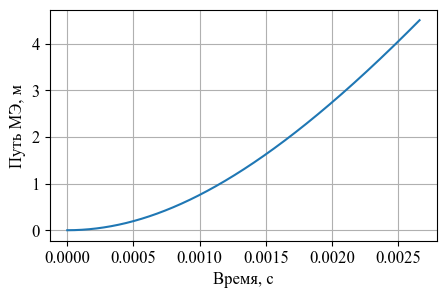

In [18]:
plt.figure(figsize=(5,3))
plt.plot(tau_arr, x_p_arr)
plt.xlabel('Время, с')
plt.ylabel('Путь МЭ, м')
plt.grid()

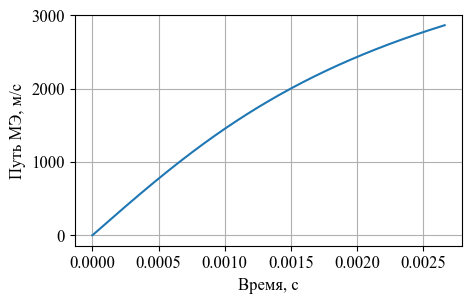

In [19]:
plt.figure(figsize=(5,3))
plt.plot(tau_arr, v_p_arr)
plt.xlabel('Время, с')
plt.ylabel('Путь МЭ, м/с')
plt.grid()

In [20]:
m_H2_arr, m_O2_arr, m_H2O_arr # большие значения массы воды

(array([0.12294507, 0.12294496, 0.12294477, ..., 0.00243388, 0.00243388,
        0.00243388]),
 array([2.45890148e-01, 2.45889274e-01, 2.45887679e-01, ...,
        1.26780281e-09, 1.26780281e-09, 1.26780281e-09]),
 array([0.00000000e+00, 9.83266420e-07, 2.77818204e-06, ...,
        4.09155346e+00, 4.09155346e+00, 4.09155346e+00]))

In [21]:
# p_m зависит от v_p, v_p зависит от dv_p, что зависит от dt

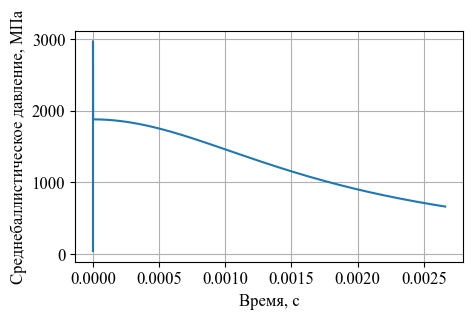

In [22]:
plt.figure(figsize=(5,3))
plt.plot(tau_arr, p_m_arr/10**6)
plt.xlabel('Время, с')
plt.ylabel('Среднебаллистическое давление, МПа')
plt.grid()